### Imports and Setups

In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    roc_curve, 
    f1_score, 
    roc_auc_score, 
    precision_score, 
    recall_score
)
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from os.path import join
import seaborn as sns
import pandas as pd

from build_features import load_moons, load_concentric
from utils import euclidian, plot_plain_separator
from model_selection import run_model_selection, load_model

use_tunned = False

### Load dataframe

Generate a sample dataset with few superposition for test. This dataset is supposed to be the correct one, without error on label acquisition.

In [2]:
x1, x2, y1, y2 = load_moons(noise=0.2, samples=2000)
x_test = np.vstack([x1, x2])
y_test = np.concatenate([y1, y2])
data_test = pd.DataFrame(x_test, columns=['x1', 'x2'])
data_test['class'] = y_test

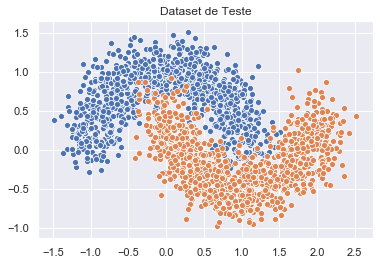

In [3]:
sns.set()
ax_1 = sns.scatterplot(x=x_test[y_test == 0,0], y=x_test[y_test == 0,1])
ax_2 = sns.scatterplot(x=x_test[y_test == 1,0], y=x_test[y_test == 1,1])
plt.title("Dataset de Teste")
plt.show()

Generate a noisy dataset for training. The noise is to simmulate an error on the label acquisition process.

In [4]:
x1, x2, y1, y2 = load_moons(noise=0.35, samples=200)
x_train = np.vstack([x1, x2])
y_train = np.concatenate([y1, y2])

data_train = pd.DataFrame(x_train, columns=['x1', 'x2'])
data_train['class'] = y_train

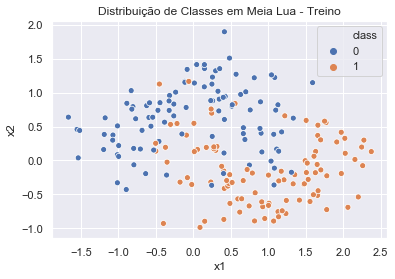

In [5]:
sns.set()
sns.scatterplot(x='x1', y='x2', hue='class', data=data_train)
plt.title('Distribuição de Classes em Meia Lua - Treino')
plt.show()

### (Optional) Run hyperparameter tuning using grid search

In [6]:
if False:
    cls = run_model_selection(x_train, y_train, verbose=True)
    best = cls.best_params_
    use_tunned = True

## Run training on noisy dataset without relabeling

In [7]:
if use_tunned:
    mlp = load_model(params=best)
else:
    mlp = load_model(verbose=True)

mlp.fit(x_train, y_train)


Iteration 1, loss = 0.69247622
Iteration 2, loss = 0.64806396
Iteration 3, loss = 0.59899409
Iteration 4, loss = 0.55075646
Iteration 5, loss = 0.51206416
Iteration 6, loss = 0.47837333
Iteration 7, loss = 0.45486849
Iteration 8, loss = 0.43737348
Iteration 9, loss = 0.42472590
Iteration 10, loss = 0.41120324
Iteration 11, loss = 0.40424298
Iteration 12, loss = 0.39853114
Iteration 13, loss = 0.39291253
Iteration 14, loss = 0.39031854
Iteration 15, loss = 0.38759374
Iteration 16, loss = 0.38563607
Iteration 17, loss = 0.38288177
Iteration 18, loss = 0.38090092
Iteration 19, loss = 0.37846750
Iteration 20, loss = 0.37695940
Iteration 21, loss = 0.37500004
Iteration 22, loss = 0.37411558
Iteration 23, loss = 0.37303139
Iteration 24, loss = 0.37253845
Iteration 25, loss = 0.37137949
Iteration 26, loss = 0.37105776
Iteration 27, loss = 0.37068168
Iteration 28, loss = 0.37004822
Iteration 29, loss = 0.36944399
Iteration 30, loss = 0.36895938
Iteration 31, loss = 0.36914643
Iteration 32, los

Iteration 356, loss = 0.25025588
Iteration 357, loss = 0.25106822
Iteration 358, loss = 0.25036797
Iteration 359, loss = 0.25023476
Iteration 360, loss = 0.25023074
Iteration 361, loss = 0.24983799
Iteration 362, loss = 0.25042700
Iteration 363, loss = 0.24979300
Iteration 364, loss = 0.24979559
Iteration 365, loss = 0.24966780
Iteration 366, loss = 0.25005802
Iteration 367, loss = 0.24961746
Iteration 368, loss = 0.24951583
Iteration 369, loss = 0.24978289
Iteration 370, loss = 0.24933979
Iteration 371, loss = 0.24908025
Iteration 372, loss = 0.24938392
Iteration 373, loss = 0.24891500
Iteration 374, loss = 0.24879997
Iteration 375, loss = 0.24892161
Iteration 376, loss = 0.24889029
Iteration 377, loss = 0.24909442
Iteration 378, loss = 0.24907118
Iteration 379, loss = 0.24883980
Iteration 380, loss = 0.24898334
Iteration 381, loss = 0.24863154
Iteration 382, loss = 0.24894327
Iteration 383, loss = 0.24889686
Iteration 384, loss = 0.24841164
Iteration 385, loss = 0.24819209
Iteration 

Iteration 708, loss = 0.23938662
Iteration 709, loss = 0.23886394
Iteration 710, loss = 0.23883689
Iteration 711, loss = 0.23925777
Iteration 712, loss = 0.23933612
Iteration 713, loss = 0.23940912
Iteration 714, loss = 0.23883390
Iteration 715, loss = 0.23871808
Iteration 716, loss = 0.23853679
Iteration 717, loss = 0.23989273
Iteration 718, loss = 0.23834114
Iteration 719, loss = 0.23849048
Iteration 720, loss = 0.23827342
Iteration 721, loss = 0.23890992
Iteration 722, loss = 0.23873856
Iteration 723, loss = 0.23809415
Iteration 724, loss = 0.23811217
Iteration 725, loss = 0.23909030
Iteration 726, loss = 0.23842680
Iteration 727, loss = 0.23845533
Iteration 728, loss = 0.23829396
Iteration 729, loss = 0.23833828
Iteration 730, loss = 0.23809466
Iteration 731, loss = 0.23790906
Iteration 732, loss = 0.23790137
Iteration 733, loss = 0.24011046
Iteration 734, loss = 0.23862192
Iteration 735, loss = 0.23787344
Iteration 736, loss = 0.23801244
Iteration 737, loss = 0.23836817
Iteration 

Iteration 964, loss = 0.23588529
Iteration 965, loss = 0.23553054
Iteration 966, loss = 0.23558050
Iteration 967, loss = 0.23552019
Iteration 968, loss = 0.23565409
Iteration 969, loss = 0.23546854
Iteration 970, loss = 0.23698413
Iteration 971, loss = 0.23663831
Iteration 972, loss = 0.23538235
Iteration 973, loss = 0.23579491
Iteration 974, loss = 0.23547404
Iteration 975, loss = 0.23551890
Iteration 976, loss = 0.23569521
Iteration 977, loss = 0.23526045
Iteration 978, loss = 0.23527002
Iteration 979, loss = 0.23510444
Iteration 980, loss = 0.23548827
Iteration 981, loss = 0.23730883
Iteration 982, loss = 0.23564055
Iteration 983, loss = 0.23532966
Iteration 984, loss = 0.23517589
Iteration 985, loss = 0.23502346
Iteration 986, loss = 0.23501181
Iteration 987, loss = 0.23508147
Iteration 988, loss = 0.23562803
Iteration 989, loss = 0.23513740
Iteration 990, loss = 0.23541675
Iteration 991, loss = 0.23612975
Iteration 992, loss = 0.23527044
Iteration 993, loss = 0.23499933
Iteration 

Iteration 1219, loss = 0.23357237
Iteration 1220, loss = 0.23300259
Iteration 1221, loss = 0.23303907
Iteration 1222, loss = 0.23413598
Iteration 1223, loss = 0.23293206
Iteration 1224, loss = 0.23324298
Iteration 1225, loss = 0.23356828
Iteration 1226, loss = 0.23405474
Iteration 1227, loss = 0.23307328
Iteration 1228, loss = 0.23368647
Iteration 1229, loss = 0.23339985
Iteration 1230, loss = 0.23281033
Iteration 1231, loss = 0.23273819
Iteration 1232, loss = 0.23287083
Iteration 1233, loss = 0.23315375
Iteration 1234, loss = 0.23409617
Iteration 1235, loss = 0.23476626
Iteration 1236, loss = 0.23368930
Iteration 1237, loss = 0.23402096
Iteration 1238, loss = 0.23354833
Iteration 1239, loss = 0.23305300
Iteration 1240, loss = 0.23270205
Iteration 1241, loss = 0.23344406
Iteration 1242, loss = 0.23358853
Iteration 1243, loss = 0.23292758
Iteration 1244, loss = 0.23493212
Iteration 1245, loss = 0.23266155
Iteration 1246, loss = 0.23264087
Iteration 1247, loss = 0.23293344
Iteration 1248

Iteration 1478, loss = 0.23117281
Iteration 1479, loss = 0.23200570
Iteration 1480, loss = 0.23270870
Iteration 1481, loss = 0.23174632
Iteration 1482, loss = 0.23151209
Iteration 1483, loss = 0.23133688
Iteration 1484, loss = 0.23300156
Iteration 1485, loss = 0.23128067
Iteration 1486, loss = 0.23291350
Iteration 1487, loss = 0.23177977
Iteration 1488, loss = 0.23115471
Iteration 1489, loss = 0.23132856
Iteration 1490, loss = 0.23137547
Iteration 1491, loss = 0.23194978
Iteration 1492, loss = 0.23131916
Iteration 1493, loss = 0.23177289
Iteration 1494, loss = 0.23207779
Iteration 1495, loss = 0.23277107
Iteration 1496, loss = 0.23357570
Iteration 1497, loss = 0.23148624
Iteration 1498, loss = 0.23208629
Iteration 1499, loss = 0.23230705
Iteration 1500, loss = 0.23180741
Iteration 1501, loss = 0.23124082
Iteration 1502, loss = 0.23219046
Iteration 1503, loss = 0.23203582
Iteration 1504, loss = 0.23181530
Iteration 1505, loss = 0.23289342
Iteration 1506, loss = 0.23264006
Iteration 1507

Iteration 1737, loss = 0.23073358
Iteration 1738, loss = 0.23033007
Iteration 1739, loss = 0.23219227
Iteration 1740, loss = 0.23162980
Iteration 1741, loss = 0.23110361
Iteration 1742, loss = 0.22964154
Iteration 1743, loss = 0.23084367
Iteration 1744, loss = 0.23022641
Iteration 1745, loss = 0.22966532
Iteration 1746, loss = 0.22959661
Iteration 1747, loss = 0.23066272
Iteration 1748, loss = 0.23031606
Iteration 1749, loss = 0.23124965
Iteration 1750, loss = 0.23020883
Iteration 1751, loss = 0.22996546
Iteration 1752, loss = 0.22980218
Iteration 1753, loss = 0.22950321
Iteration 1754, loss = 0.22993270
Iteration 1755, loss = 0.22970735
Iteration 1756, loss = 0.22937470
Iteration 1757, loss = 0.23053200
Iteration 1758, loss = 0.23005501
Iteration 1759, loss = 0.23037801
Iteration 1760, loss = 0.22978976
Iteration 1761, loss = 0.22954844
Iteration 1762, loss = 0.23022313
Iteration 1763, loss = 0.22932076
Iteration 1764, loss = 0.23011333
Iteration 1765, loss = 0.23144224
Iteration 1766

Iteration 1988, loss = 0.22781652
Iteration 1989, loss = 0.22773919
Iteration 1990, loss = 0.22786291
Iteration 1991, loss = 0.22771861
Iteration 1992, loss = 0.22781493
Iteration 1993, loss = 0.22804804
Iteration 1994, loss = 0.22755102
Iteration 1995, loss = 0.22812393
Iteration 1996, loss = 0.22801248
Iteration 1997, loss = 0.22800721
Iteration 1998, loss = 0.22807229
Iteration 1999, loss = 0.22757803
Iteration 2000, loss = 0.22990497
Iteration 2001, loss = 0.22762021
Iteration 2002, loss = 0.22804884
Iteration 2003, loss = 0.22760569
Iteration 2004, loss = 0.22872527
Iteration 2005, loss = 0.22903328
Iteration 2006, loss = 0.22898092
Iteration 2007, loss = 0.22899099
Iteration 2008, loss = 0.22772846
Iteration 2009, loss = 0.22868065
Iteration 2010, loss = 0.22779952
Iteration 2011, loss = 0.22717993
Iteration 2012, loss = 0.22711099
Iteration 2013, loss = 0.22880561
Iteration 2014, loss = 0.22752212
Iteration 2015, loss = 0.22743349
Iteration 2016, loss = 0.22796361
Iteration 2017

Iteration 2243, loss = 0.22193024
Iteration 2244, loss = 0.22200345
Iteration 2245, loss = 0.22384567
Iteration 2246, loss = 0.22439448
Iteration 2247, loss = 0.22308749
Iteration 2248, loss = 0.22249608
Iteration 2249, loss = 0.22200441
Iteration 2250, loss = 0.22185776
Iteration 2251, loss = 0.22495667
Iteration 2252, loss = 0.22242811
Iteration 2253, loss = 0.22253801
Iteration 2254, loss = 0.22281979
Iteration 2255, loss = 0.22436486
Iteration 2256, loss = 0.22169378
Iteration 2257, loss = 0.22231374
Iteration 2258, loss = 0.22268225
Iteration 2259, loss = 0.22290927
Iteration 2260, loss = 0.22373634
Iteration 2261, loss = 0.22311471
Iteration 2262, loss = 0.22267848
Iteration 2263, loss = 0.22162808
Iteration 2264, loss = 0.22140734
Iteration 2265, loss = 0.22371234
Iteration 2266, loss = 0.22204016
Iteration 2267, loss = 0.22298442
Iteration 2268, loss = 0.22197303
Iteration 2269, loss = 0.22158462
Iteration 2270, loss = 0.22140627
Iteration 2271, loss = 0.22338362
Iteration 2272

Iteration 2485, loss = 0.21857427
Iteration 2486, loss = 0.21691162
Iteration 2487, loss = 0.21720113
Iteration 2488, loss = 0.21753122
Iteration 2489, loss = 0.21835834
Iteration 2490, loss = 0.22021990
Iteration 2491, loss = 0.21720269
Iteration 2492, loss = 0.21699610
Iteration 2493, loss = 0.21736223
Iteration 2494, loss = 0.21719560
Iteration 2495, loss = 0.21703544
Iteration 2496, loss = 0.21954563
Iteration 2497, loss = 0.21688443
Iteration 2498, loss = 0.21683187
Iteration 2499, loss = 0.21810772
Iteration 2500, loss = 0.21820346
Iteration 2501, loss = 0.21703794
Iteration 2502, loss = 0.21665838
Iteration 2503, loss = 0.21674286
Iteration 2504, loss = 0.21682340
Iteration 2505, loss = 0.22075329
Iteration 2506, loss = 0.21851379
Iteration 2507, loss = 0.21715795
Iteration 2508, loss = 0.21812276
Iteration 2509, loss = 0.21855570
Iteration 2510, loss = 0.21635420
Iteration 2511, loss = 0.21711063
Iteration 2512, loss = 0.21748142
Iteration 2513, loss = 0.21634540
Iteration 2514

Iteration 2846, loss = 0.21034557
Iteration 2847, loss = 0.21057479
Iteration 2848, loss = 0.21116301
Iteration 2849, loss = 0.21003580
Iteration 2850, loss = 0.21065387
Iteration 2851, loss = 0.20995185
Iteration 2852, loss = 0.20940430
Iteration 2853, loss = 0.20966550
Iteration 2854, loss = 0.21585729
Iteration 2855, loss = 0.20994652
Iteration 2856, loss = 0.20949403
Iteration 2857, loss = 0.20953418
Iteration 2858, loss = 0.20932667
Iteration 2859, loss = 0.21290456
Iteration 2860, loss = 0.20916012
Iteration 2861, loss = 0.21029878
Iteration 2862, loss = 0.20961139
Iteration 2863, loss = 0.20929609
Iteration 2864, loss = 0.20994555
Iteration 2865, loss = 0.20995742
Iteration 2866, loss = 0.21059875
Iteration 2867, loss = 0.21137983
Iteration 2868, loss = 0.21050680
Iteration 2869, loss = 0.20912761
Iteration 2870, loss = 0.21023587
Iteration 2871, loss = 0.21015446
Iteration 2872, loss = 0.20904372
Iteration 2873, loss = 0.21015255
Iteration 2874, loss = 0.20939119
Iteration 2875

Iteration 3090, loss = 0.20559704
Iteration 3091, loss = 0.20575025
Iteration 3092, loss = 0.20577079
Iteration 3093, loss = 0.20630247
Iteration 3094, loss = 0.20518487
Iteration 3095, loss = 0.20704173
Iteration 3096, loss = 0.20529745
Iteration 3097, loss = 0.20538073
Iteration 3098, loss = 0.20526446
Iteration 3099, loss = 0.20551400
Iteration 3100, loss = 0.20546130
Iteration 3101, loss = 0.20591129
Iteration 3102, loss = 0.20861036
Iteration 3103, loss = 0.20572006
Iteration 3104, loss = 0.20724706
Iteration 3105, loss = 0.20814700
Iteration 3106, loss = 0.20527142
Iteration 3107, loss = 0.20717256
Iteration 3108, loss = 0.20530873
Iteration 3109, loss = 0.20592277
Iteration 3110, loss = 0.20800320
Iteration 3111, loss = 0.20601222
Iteration 3112, loss = 0.20550286
Iteration 3113, loss = 0.20574549
Iteration 3114, loss = 0.20734889
Iteration 3115, loss = 0.20648816
Iteration 3116, loss = 0.20498385
Iteration 3117, loss = 0.20550706
Iteration 3118, loss = 0.20572607
Iteration 3119

Iteration 3338, loss = 0.20204296
Iteration 3339, loss = 0.20361687
Iteration 3340, loss = 0.20328024
Iteration 3341, loss = 0.20799111
Iteration 3342, loss = 0.20173412
Iteration 3343, loss = 0.20427534
Iteration 3344, loss = 0.20349870
Iteration 3345, loss = 0.20943341
Iteration 3346, loss = 0.20159066
Iteration 3347, loss = 0.20500043
Iteration 3348, loss = 0.20725737
Iteration 3349, loss = 0.20189830
Iteration 3350, loss = 0.20151199
Iteration 3351, loss = 0.20309932
Iteration 3352, loss = 0.20172973
Iteration 3353, loss = 0.20186064
Iteration 3354, loss = 0.20173284
Iteration 3355, loss = 0.20412654
Iteration 3356, loss = 0.20178657
Iteration 3357, loss = 0.20251765
Iteration 3358, loss = 0.20307274
Iteration 3359, loss = 0.20240666
Iteration 3360, loss = 0.20157951
Iteration 3361, loss = 0.20164984
Iteration 3362, loss = 0.20134026
Iteration 3363, loss = 0.20507367
Iteration 3364, loss = 0.20237496
Iteration 3365, loss = 0.20173535
Iteration 3366, loss = 0.20236825
Iteration 3367

Iteration 3581, loss = 0.20015126
Iteration 3582, loss = 0.19779015
Iteration 3583, loss = 0.19944518
Iteration 3584, loss = 0.19817035
Iteration 3585, loss = 0.19828767
Iteration 3586, loss = 0.19801842
Iteration 3587, loss = 0.19945733
Iteration 3588, loss = 0.19783569
Iteration 3589, loss = 0.19801338
Iteration 3590, loss = 0.19967769
Iteration 3591, loss = 0.19838329
Iteration 3592, loss = 0.19899763
Iteration 3593, loss = 0.19836386
Iteration 3594, loss = 0.20011650
Iteration 3595, loss = 0.20049230
Iteration 3596, loss = 0.20116011
Iteration 3597, loss = 0.19833803
Iteration 3598, loss = 0.20038132
Iteration 3599, loss = 0.19824416
Iteration 3600, loss = 0.20338772
Iteration 3601, loss = 0.19846241
Iteration 3602, loss = 0.20304452
Iteration 3603, loss = 0.20331567
Iteration 3604, loss = 0.19821720
Iteration 3605, loss = 0.20134960
Iteration 3606, loss = 0.19862634
Iteration 3607, loss = 0.19907573
Iteration 3608, loss = 0.19801674
Iteration 3609, loss = 0.19789674
Iteration 3610

Iteration 3934, loss = 0.19722659
Iteration 3935, loss = 0.19455428
Iteration 3936, loss = 0.19484223
Iteration 3937, loss = 0.19578901
Iteration 3938, loss = 0.19515502
Iteration 3939, loss = 0.19585014
Iteration 3940, loss = 0.19662469
Iteration 3941, loss = 0.19325638
Iteration 3942, loss = 0.19663778
Iteration 3943, loss = 0.19888247
Iteration 3944, loss = 0.19417584
Iteration 3945, loss = 0.19412823
Iteration 3946, loss = 0.19470275
Iteration 3947, loss = 0.19321292
Iteration 3948, loss = 0.19582877
Iteration 3949, loss = 0.19682688
Iteration 3950, loss = 0.19472866
Iteration 3951, loss = 0.19312984
Iteration 3952, loss = 0.19668607
Iteration 3953, loss = 0.19458268
Iteration 3954, loss = 0.19465164
Iteration 3955, loss = 0.19585858
Iteration 3956, loss = 0.19512416
Iteration 3957, loss = 0.19366318
Iteration 3958, loss = 0.19519993
Iteration 3959, loss = 0.19317339
Iteration 3960, loss = 0.20028731
Iteration 3961, loss = 0.19747783
Iteration 3962, loss = 0.19569971
Iteration 3963

Iteration 4188, loss = 0.19667697
Iteration 4189, loss = 0.19346732
Iteration 4190, loss = 0.19690077
Iteration 4191, loss = 0.19051756
Iteration 4192, loss = 0.19001583
Iteration 4193, loss = 0.19035341
Iteration 4194, loss = 0.19727730
Iteration 4195, loss = 0.19473083
Iteration 4196, loss = 0.19654437
Iteration 4197, loss = 0.19306609
Iteration 4198, loss = 0.19589077
Iteration 4199, loss = 0.19188920
Iteration 4200, loss = 0.19318863
Iteration 4201, loss = 0.19084892
Iteration 4202, loss = 0.19092385
Iteration 4203, loss = 0.19060010
Iteration 4204, loss = 0.19088434
Iteration 4205, loss = 0.19053876
Iteration 4206, loss = 0.18994874
Iteration 4207, loss = 0.19432272
Iteration 4208, loss = 0.19033027
Iteration 4209, loss = 0.19320020
Iteration 4210, loss = 0.19222383
Iteration 4211, loss = 0.19124823
Iteration 4212, loss = 0.19018471
Iteration 4213, loss = 0.19070631
Iteration 4214, loss = 0.18976957
Iteration 4215, loss = 0.19001771
Iteration 4216, loss = 0.19539108
Iteration 4217

Iteration 4434, loss = 0.18714735
Iteration 4435, loss = 0.18844281
Iteration 4436, loss = 0.18721090
Iteration 4437, loss = 0.18706995
Iteration 4438, loss = 0.18933188
Iteration 4439, loss = 0.18740181
Iteration 4440, loss = 0.18740032
Iteration 4441, loss = 0.18671381
Iteration 4442, loss = 0.19082879
Iteration 4443, loss = 0.19739798
Iteration 4444, loss = 0.18662030
Iteration 4445, loss = 0.18875407
Iteration 4446, loss = 0.19482547
Iteration 4447, loss = 0.18933526
Iteration 4448, loss = 0.18621889
Iteration 4449, loss = 0.18626336
Iteration 4450, loss = 0.18629384
Iteration 4451, loss = 0.18644592
Iteration 4452, loss = 0.18811060
Iteration 4453, loss = 0.18712535
Iteration 4454, loss = 0.20067607
Iteration 4455, loss = 0.18659154
Iteration 4456, loss = 0.19130717
Iteration 4457, loss = 0.18612141
Iteration 4458, loss = 0.19010205
Iteration 4459, loss = 0.18920061
Iteration 4460, loss = 0.18839747
Iteration 4461, loss = 0.18802927
Iteration 4462, loss = 0.18864478
Iteration 4463

Iteration 4692, loss = 0.18356195
Iteration 4693, loss = 0.18701732
Iteration 4694, loss = 0.18893509
Iteration 4695, loss = 0.19347413
Iteration 4696, loss = 0.18517312
Iteration 4697, loss = 0.18524076
Iteration 4698, loss = 0.18400117
Iteration 4699, loss = 0.19044273
Iteration 4700, loss = 0.18510141
Iteration 4701, loss = 0.18319433
Iteration 4702, loss = 0.18396745
Iteration 4703, loss = 0.18255458
Iteration 4704, loss = 0.18309995
Iteration 4705, loss = 0.18775259
Iteration 4706, loss = 0.18668315
Iteration 4707, loss = 0.18930374
Iteration 4708, loss = 0.18326498
Iteration 4709, loss = 0.18290953
Iteration 4710, loss = 0.18344605
Iteration 4711, loss = 0.18852722
Iteration 4712, loss = 0.18634737
Iteration 4713, loss = 0.18286638
Iteration 4714, loss = 0.19293675
Iteration 4715, loss = 0.18844798
Iteration 4716, loss = 0.18727531
Iteration 4717, loss = 0.19485408
Iteration 4718, loss = 0.18535074
Iteration 4719, loss = 0.18442031
Iteration 4720, loss = 0.18371024
Iteration 4721

Iteration 4949, loss = 0.18243873
Iteration 4950, loss = 0.18125528
Iteration 4951, loss = 0.18087014
Iteration 4952, loss = 0.18123370
Iteration 4953, loss = 0.18797681
Iteration 4954, loss = 0.18902432
Iteration 4955, loss = 0.18443459
Iteration 4956, loss = 0.18332572
Iteration 4957, loss = 0.18033022
Iteration 4958, loss = 0.18021375
Iteration 4959, loss = 0.18066680
Iteration 4960, loss = 0.18292049
Iteration 4961, loss = 0.18249888
Iteration 4962, loss = 0.18131024
Iteration 4963, loss = 0.18039934
Iteration 4964, loss = 0.18041578
Iteration 4965, loss = 0.18209805
Iteration 4966, loss = 0.18023628
Iteration 4967, loss = 0.18118965
Iteration 4968, loss = 0.17901142
Iteration 4969, loss = 0.18047978
Iteration 4970, loss = 0.18004321
Iteration 4971, loss = 0.17937035
Iteration 4972, loss = 0.18001003
Iteration 4973, loss = 0.18161317
Iteration 4974, loss = 0.17914960
Iteration 4975, loss = 0.18308909
Iteration 4976, loss = 0.17988630
Iteration 4977, loss = 0.18026661
Iteration 4978

Iteration 5208, loss = 0.18397700
Iteration 5209, loss = 0.17848544
Iteration 5210, loss = 0.17853581
Iteration 5211, loss = 0.18085513
Iteration 5212, loss = 0.18415782
Iteration 5213, loss = 0.17647617
Iteration 5214, loss = 0.17727534
Iteration 5215, loss = 0.17896452
Iteration 5216, loss = 0.18035523
Iteration 5217, loss = 0.17656592
Iteration 5218, loss = 0.18348520
Iteration 5219, loss = 0.18231148
Iteration 5220, loss = 0.17718174
Iteration 5221, loss = 0.18449934
Iteration 5222, loss = 0.17760369
Iteration 5223, loss = 0.17683504
Iteration 5224, loss = 0.17783355
Iteration 5225, loss = 0.17793803
Iteration 5226, loss = 0.17863385
Iteration 5227, loss = 0.17648878
Iteration 5228, loss = 0.17708301
Iteration 5229, loss = 0.17680559
Iteration 5230, loss = 0.17669894
Iteration 5231, loss = 0.17842444
Iteration 5232, loss = 0.17646672
Iteration 5233, loss = 0.17585748
Iteration 5234, loss = 0.17909563
Iteration 5235, loss = 0.17806074
Iteration 5236, loss = 0.17888032
Iteration 5237

Iteration 5465, loss = 0.17494100
Iteration 5466, loss = 0.17446834
Iteration 5467, loss = 0.17482010
Iteration 5468, loss = 0.17812594
Iteration 5469, loss = 0.17413824
Iteration 5470, loss = 0.17789603
Iteration 5471, loss = 0.17707838
Iteration 5472, loss = 0.17485971
Iteration 5473, loss = 0.17444151
Iteration 5474, loss = 0.17484637
Iteration 5475, loss = 0.18037104
Iteration 5476, loss = 0.18231426
Iteration 5477, loss = 0.18010613
Iteration 5478, loss = 0.17671871
Iteration 5479, loss = 0.17389281
Iteration 5480, loss = 0.17564534
Iteration 5481, loss = 0.17576520
Iteration 5482, loss = 0.17503958
Iteration 5483, loss = 0.17444552
Iteration 5484, loss = 0.18104567
Iteration 5485, loss = 0.17710489
Iteration 5486, loss = 0.18473975
Iteration 5487, loss = 0.17702287
Iteration 5488, loss = 0.17567264
Iteration 5489, loss = 0.17827597
Iteration 5490, loss = 0.18293944
Iteration 5491, loss = 0.17835241
Iteration 5492, loss = 0.17955155
Iteration 5493, loss = 0.18109390
Iteration 5494

Iteration 5722, loss = 0.17093424
Iteration 5723, loss = 0.17113161
Iteration 5724, loss = 0.17449214
Iteration 5725, loss = 0.17558298
Iteration 5726, loss = 0.17368445
Iteration 5727, loss = 0.17216620
Iteration 5728, loss = 0.17821377
Iteration 5729, loss = 0.17432533
Iteration 5730, loss = 0.17111879
Iteration 5731, loss = 0.17349005
Iteration 5732, loss = 0.17340116
Iteration 5733, loss = 0.17178168
Iteration 5734, loss = 0.17180813
Iteration 5735, loss = 0.17537072
Iteration 5736, loss = 0.17975464
Iteration 5737, loss = 0.17121500
Iteration 5738, loss = 0.17240964
Iteration 5739, loss = 0.17773449
Iteration 5740, loss = 0.18029035
Iteration 5741, loss = 0.17160569
Iteration 5742, loss = 0.17223342
Iteration 5743, loss = 0.17247920
Iteration 5744, loss = 0.17545046
Iteration 5745, loss = 0.18391684
Iteration 5746, loss = 0.17227991
Iteration 5747, loss = 0.18216818
Iteration 5748, loss = 0.20213075
Iteration 5749, loss = 0.17629919
Iteration 5750, loss = 0.18584771
Iteration 5751

Iteration 5981, loss = 0.16926727
Iteration 5982, loss = 0.16959097
Iteration 5983, loss = 0.17005811
Iteration 5984, loss = 0.17703989
Iteration 5985, loss = 0.17152091
Iteration 5986, loss = 0.16985201
Iteration 5987, loss = 0.17122123
Iteration 5988, loss = 0.17141269
Iteration 5989, loss = 0.17618435
Iteration 5990, loss = 0.17649713
Iteration 5991, loss = 0.17098349
Iteration 5992, loss = 0.16984300
Iteration 5993, loss = 0.17044643
Iteration 5994, loss = 0.16851872
Iteration 5995, loss = 0.16837189
Iteration 5996, loss = 0.16887984
Iteration 5997, loss = 0.17176684
Iteration 5998, loss = 0.17009108
Iteration 5999, loss = 0.17038772
Iteration 6000, loss = 0.17062094
Iteration 6001, loss = 0.17783517
Iteration 6002, loss = 0.17090688
Iteration 6003, loss = 0.16991823
Iteration 6004, loss = 0.17167079
Iteration 6005, loss = 0.17970236
Iteration 6006, loss = 0.16853192
Iteration 6007, loss = 0.18170657
Iteration 6008, loss = 0.17631781
Iteration 6009, loss = 0.17339998
Iteration 6010

Iteration 6240, loss = 0.16716755
Iteration 6241, loss = 0.17306373
Iteration 6242, loss = 0.16747440
Iteration 6243, loss = 0.17240666
Iteration 6244, loss = 0.16824235
Iteration 6245, loss = 0.16710318
Iteration 6246, loss = 0.16823810
Iteration 6247, loss = 0.16882933
Iteration 6248, loss = 0.17287963
Iteration 6249, loss = 0.16895707
Iteration 6250, loss = 0.16955685
Iteration 6251, loss = 0.17197913
Iteration 6252, loss = 0.16880915
Iteration 6253, loss = 0.16792722
Iteration 6254, loss = 0.16892464
Iteration 6255, loss = 0.16877850
Iteration 6256, loss = 0.17577441
Iteration 6257, loss = 0.16794863
Iteration 6258, loss = 0.17309015
Iteration 6259, loss = 0.17103810
Iteration 6260, loss = 0.16666962
Iteration 6261, loss = 0.18079926
Iteration 6262, loss = 0.16890396
Iteration 6263, loss = 0.16786277
Iteration 6264, loss = 0.16921026
Iteration 6265, loss = 0.16640787
Iteration 6266, loss = 0.16654604
Iteration 6267, loss = 0.17086448
Iteration 6268, loss = 0.17600294
Iteration 6269

Iteration 6605, loss = 0.16491725
Iteration 6606, loss = 0.16533207
Iteration 6607, loss = 0.19682599
Iteration 6608, loss = 0.17402561
Iteration 6609, loss = 0.17056726
Iteration 6610, loss = 0.17978142
Iteration 6611, loss = 0.17004747
Iteration 6612, loss = 0.16477841
Iteration 6613, loss = 0.16671380
Iteration 6614, loss = 0.16948171
Iteration 6615, loss = 0.16628357
Iteration 6616, loss = 0.16566598
Iteration 6617, loss = 0.17236682
Iteration 6618, loss = 0.16990819
Iteration 6619, loss = 0.17724328
Iteration 6620, loss = 0.17511146
Iteration 6621, loss = 0.16941191
Iteration 6622, loss = 0.16612510
Iteration 6623, loss = 0.16647847
Iteration 6624, loss = 0.17747387
Iteration 6625, loss = 0.16770998
Iteration 6626, loss = 0.16475800
Iteration 6627, loss = 0.16783387
Iteration 6628, loss = 0.17942321
Iteration 6629, loss = 0.17171696
Iteration 6630, loss = 0.17674985
Iteration 6631, loss = 0.16557769
Iteration 6632, loss = 0.16515695
Iteration 6633, loss = 0.17831885
Iteration 6634

Iteration 6852, loss = 0.17184508
Iteration 6853, loss = 0.17419504
Iteration 6854, loss = 0.17252816
Iteration 6855, loss = 0.16841995
Iteration 6856, loss = 0.16644624
Iteration 6857, loss = 0.16771975
Iteration 6858, loss = 0.17046780
Iteration 6859, loss = 0.16910787
Iteration 6860, loss = 0.16924465
Iteration 6861, loss = 0.16519366
Iteration 6862, loss = 0.16533042
Iteration 6863, loss = 0.18513406
Iteration 6864, loss = 0.18128439
Iteration 6865, loss = 0.16495491
Iteration 6866, loss = 0.16492628
Iteration 6867, loss = 0.16669661
Iteration 6868, loss = 0.16557452
Iteration 6869, loss = 0.16463171
Iteration 6870, loss = 0.17201168
Iteration 6871, loss = 0.16574381
Iteration 6872, loss = 0.16969312
Iteration 6873, loss = 0.16929305
Iteration 6874, loss = 0.17027996
Iteration 6875, loss = 0.16498240
Iteration 6876, loss = 0.16732149
Iteration 6877, loss = 0.16795286
Iteration 6878, loss = 0.16423123
Iteration 6879, loss = 0.16397915
Iteration 6880, loss = 0.16732637
Iteration 6881

Iteration 7109, loss = 0.16334454
Iteration 7110, loss = 0.16231086
Iteration 7111, loss = 0.16459764
Iteration 7112, loss = 0.16619058
Iteration 7113, loss = 0.17970349
Iteration 7114, loss = 0.16558212
Iteration 7115, loss = 0.16963892
Iteration 7116, loss = 0.17100361
Iteration 7117, loss = 0.16491482
Iteration 7118, loss = 0.16454837
Iteration 7119, loss = 0.16991590
Iteration 7120, loss = 0.16454330
Iteration 7121, loss = 0.16460923
Iteration 7122, loss = 0.17523955
Iteration 7123, loss = 0.17458691
Iteration 7124, loss = 0.17474272
Iteration 7125, loss = 0.16389519
Iteration 7126, loss = 0.16590437
Iteration 7127, loss = 0.17031194
Iteration 7128, loss = 0.16350964
Iteration 7129, loss = 0.17634708
Iteration 7130, loss = 0.16896923
Iteration 7131, loss = 0.17189891
Iteration 7132, loss = 0.16705242
Iteration 7133, loss = 0.16412066
Iteration 7134, loss = 0.16491057
Iteration 7135, loss = 0.16530186
Iteration 7136, loss = 0.16239411
Iteration 7137, loss = 0.16198757
Iteration 7138

Iteration 7461, loss = 0.16212828
Iteration 7462, loss = 0.16374665
Iteration 7463, loss = 0.16103605
Iteration 7464, loss = 0.17044100
Iteration 7465, loss = 0.16684900
Iteration 7466, loss = 0.16294873
Iteration 7467, loss = 0.16181924
Iteration 7468, loss = 0.16320844
Iteration 7469, loss = 0.16574961
Iteration 7470, loss = 0.17006083
Iteration 7471, loss = 0.16272094
Iteration 7472, loss = 0.19145781
Iteration 7473, loss = 0.16831863
Iteration 7474, loss = 0.16914683
Iteration 7475, loss = 0.17713507
Iteration 7476, loss = 0.16273151
Iteration 7477, loss = 0.17613473
Iteration 7478, loss = 0.16482107
Iteration 7479, loss = 0.16751217
Iteration 7480, loss = 0.16566068
Iteration 7481, loss = 0.16064991
Iteration 7482, loss = 0.16626644
Iteration 7483, loss = 0.16362855
Iteration 7484, loss = 0.17460151
Iteration 7485, loss = 0.16423608
Iteration 7486, loss = 0.17099261
Iteration 7487, loss = 0.16854377
Iteration 7488, loss = 0.16487274
Iteration 7489, loss = 0.17358708
Iteration 7490

Iteration 7822, loss = 0.16162114
Iteration 7823, loss = 0.16812897
Iteration 7824, loss = 0.16993479
Iteration 7825, loss = 0.16289355
Iteration 7826, loss = 0.16671491
Iteration 7827, loss = 0.16910504
Iteration 7828, loss = 0.16295704
Iteration 7829, loss = 0.16188548
Iteration 7830, loss = 0.16137614
Iteration 7831, loss = 0.16305130
Iteration 7832, loss = 0.16796769
Iteration 7833, loss = 0.16212640
Iteration 7834, loss = 0.16185575
Iteration 7835, loss = 0.16089137
Iteration 7836, loss = 0.16363827
Iteration 7837, loss = 0.16148507
Iteration 7838, loss = 0.16106640
Iteration 7839, loss = 0.17307314
Iteration 7840, loss = 0.16247958
Iteration 7841, loss = 0.16410105
Iteration 7842, loss = 0.16565111
Iteration 7843, loss = 0.16275294
Iteration 7844, loss = 0.16020835
Iteration 7845, loss = 0.16185469
Iteration 7846, loss = 0.16477793
Iteration 7847, loss = 0.17607466
Iteration 7848, loss = 0.16952406
Iteration 7849, loss = 0.17540359
Iteration 7850, loss = 0.16811224
Iteration 7851

Iteration 8074, loss = 0.16297865
Iteration 8075, loss = 0.16402989
Iteration 8076, loss = 0.16361088
Iteration 8077, loss = 0.16386467
Iteration 8078, loss = 0.16162487
Iteration 8079, loss = 0.16356264
Iteration 8080, loss = 0.16061632
Iteration 8081, loss = 0.16592981
Iteration 8082, loss = 0.16901403
Iteration 8083, loss = 0.16434912
Iteration 8084, loss = 0.16767576
Iteration 8085, loss = 0.16818194
Iteration 8086, loss = 0.16366793
Iteration 8087, loss = 0.16367157
Iteration 8088, loss = 0.18376878
Iteration 8089, loss = 0.16764139
Iteration 8090, loss = 0.18523343
Iteration 8091, loss = 0.16343872
Iteration 8092, loss = 0.16335061
Iteration 8093, loss = 0.16207959
Iteration 8094, loss = 0.16012241
Iteration 8095, loss = 0.16095753
Iteration 8096, loss = 0.16606750
Iteration 8097, loss = 0.15982394
Iteration 8098, loss = 0.16388187
Iteration 8099, loss = 0.16912259
Iteration 8100, loss = 0.15969664
Iteration 8101, loss = 0.16368286
Iteration 8102, loss = 0.16874177
Iteration 8103

Iteration 8331, loss = 0.16166843
Iteration 8332, loss = 0.15966706
Iteration 8333, loss = 0.16698666
Iteration 8334, loss = 0.15941599
Iteration 8335, loss = 0.16350623
Iteration 8336, loss = 0.16484514
Iteration 8337, loss = 0.16005029
Iteration 8338, loss = 0.15880485
Iteration 8339, loss = 0.15915067
Iteration 8340, loss = 0.16276387
Iteration 8341, loss = 0.16052504
Iteration 8342, loss = 0.15919264
Iteration 8343, loss = 0.16624978
Iteration 8344, loss = 0.18235930
Iteration 8345, loss = 0.17089893
Iteration 8346, loss = 0.16153772
Iteration 8347, loss = 0.15923221
Iteration 8348, loss = 0.17089724
Iteration 8349, loss = 0.16410173
Iteration 8350, loss = 0.16130664
Iteration 8351, loss = 0.16277108
Iteration 8352, loss = 0.16077903
Iteration 8353, loss = 0.16137091
Iteration 8354, loss = 0.16307868
Iteration 8355, loss = 0.16763248
Iteration 8356, loss = 0.16372720
Iteration 8357, loss = 0.16743201
Iteration 8358, loss = 0.16284524
Iteration 8359, loss = 0.16030147
Iteration 8360

Iteration 8581, loss = 0.16783970
Iteration 8582, loss = 0.15896208
Iteration 8583, loss = 0.16475497
Iteration 8584, loss = 0.15939960
Iteration 8585, loss = 0.16509145
Iteration 8586, loss = 0.16694555
Iteration 8587, loss = 0.16087287
Iteration 8588, loss = 0.16300687
Iteration 8589, loss = 0.15958462
Iteration 8590, loss = 0.16426855
Iteration 8591, loss = 0.15986344
Iteration 8592, loss = 0.15784600
Iteration 8593, loss = 0.16553841
Iteration 8594, loss = 0.16348133
Iteration 8595, loss = 0.16307746
Iteration 8596, loss = 0.15789875
Iteration 8597, loss = 0.16269540
Iteration 8598, loss = 0.16147487
Iteration 8599, loss = 0.15809403
Iteration 8600, loss = 0.15772993
Iteration 8601, loss = 0.15796854
Iteration 8602, loss = 0.16381438
Iteration 8603, loss = 0.16416937
Iteration 8604, loss = 0.16818488
Iteration 8605, loss = 0.16332477
Iteration 8606, loss = 0.15722324
Iteration 8607, loss = 0.16032239
Iteration 8608, loss = 0.16663859
Iteration 8609, loss = 0.16358398
Iteration 8610

Iteration 8825, loss = 0.16395780
Iteration 8826, loss = 0.16488164
Iteration 8827, loss = 0.15835227
Iteration 8828, loss = 0.16049230
Iteration 8829, loss = 0.15855471
Iteration 8830, loss = 0.16366610
Iteration 8831, loss = 0.15841789
Iteration 8832, loss = 0.17473933
Iteration 8833, loss = 0.16879546
Iteration 8834, loss = 0.16362371
Iteration 8835, loss = 0.16271110
Iteration 8836, loss = 0.16137413
Iteration 8837, loss = 0.16952761
Iteration 8838, loss = 0.15808586
Iteration 8839, loss = 0.15794766
Iteration 8840, loss = 0.15924679
Iteration 8841, loss = 0.15706313
Iteration 8842, loss = 0.15781703
Iteration 8843, loss = 0.16044183
Iteration 8844, loss = 0.15921808
Iteration 8845, loss = 0.16839682
Iteration 8846, loss = 0.16335455
Iteration 8847, loss = 0.15957858
Iteration 8848, loss = 0.16468423
Iteration 8849, loss = 0.15861254
Iteration 8850, loss = 0.17672195
Iteration 8851, loss = 0.17045424
Iteration 8852, loss = 0.15947776
Iteration 8853, loss = 0.15902519
Iteration 8854

Iteration 9077, loss = 0.15938397
Iteration 9078, loss = 0.15583013
Iteration 9079, loss = 0.15866183
Iteration 9080, loss = 0.15752367
Iteration 9081, loss = 0.16014048
Iteration 9082, loss = 0.15686083
Iteration 9083, loss = 0.15639988
Iteration 9084, loss = 0.16359868
Iteration 9085, loss = 0.16832414
Iteration 9086, loss = 0.16288917
Iteration 9087, loss = 0.16876459
Iteration 9088, loss = 0.17222797
Iteration 9089, loss = 0.17644811
Iteration 9090, loss = 0.15996361
Iteration 9091, loss = 0.17847868
Iteration 9092, loss = 0.16538731
Iteration 9093, loss = 0.16146596
Iteration 9094, loss = 0.16295099
Iteration 9095, loss = 0.15652844
Iteration 9096, loss = 0.16316227
Iteration 9097, loss = 0.16000004
Iteration 9098, loss = 0.17334051
Iteration 9099, loss = 0.16394472
Iteration 9100, loss = 0.16085075
Iteration 9101, loss = 0.16134299
Iteration 9102, loss = 0.16065131
Iteration 9103, loss = 0.15904458
Iteration 9104, loss = 0.15711598
Iteration 9105, loss = 0.15711977
Iteration 9106

Iteration 9327, loss = 0.15959164
Iteration 9328, loss = 0.16199018
Iteration 9329, loss = 0.15862719
Iteration 9330, loss = 0.16253115
Iteration 9331, loss = 0.15959983
Iteration 9332, loss = 0.16232709
Iteration 9333, loss = 0.15799511
Iteration 9334, loss = 0.15914378
Iteration 9335, loss = 0.15721363
Iteration 9336, loss = 0.15755613
Iteration 9337, loss = 0.15933906
Iteration 9338, loss = 0.17784794
Iteration 9339, loss = 0.16570819
Iteration 9340, loss = 0.15712582
Iteration 9341, loss = 0.15641346
Iteration 9342, loss = 0.16188090
Iteration 9343, loss = 0.16283664
Iteration 9344, loss = 0.17304790
Iteration 9345, loss = 0.16203331
Iteration 9346, loss = 0.16093170
Iteration 9347, loss = 0.15703413
Iteration 9348, loss = 0.15520951
Iteration 9349, loss = 0.15636675
Iteration 9350, loss = 0.16045377
Iteration 9351, loss = 0.15658138
Iteration 9352, loss = 0.17350062
Iteration 9353, loss = 0.16541778
Iteration 9354, loss = 0.15812978
Iteration 9355, loss = 0.15925437
Iteration 9356

Iteration 9584, loss = 0.18462661
Iteration 9585, loss = 0.19473980
Iteration 9586, loss = 0.16478527
Iteration 9587, loss = 0.15547797
Iteration 9588, loss = 0.19255630
Iteration 9589, loss = 0.16753880
Iteration 9590, loss = 0.16356000
Iteration 9591, loss = 0.16158209
Iteration 9592, loss = 0.17330706
Iteration 9593, loss = 0.15870449
Iteration 9594, loss = 0.15768508
Iteration 9595, loss = 0.16303764
Iteration 9596, loss = 0.16806248
Iteration 9597, loss = 0.17998392
Iteration 9598, loss = 0.17393065
Iteration 9599, loss = 0.16640626
Iteration 9600, loss = 0.16367719
Iteration 9601, loss = 0.15717559
Iteration 9602, loss = 0.16572761
Iteration 9603, loss = 0.16015688
Iteration 9604, loss = 0.16055503
Iteration 9605, loss = 0.16814202
Iteration 9606, loss = 0.18249773
Iteration 9607, loss = 0.16533998
Iteration 9608, loss = 0.16395605
Iteration 9609, loss = 0.15969986
Iteration 9610, loss = 0.16338529
Iteration 9611, loss = 0.16174134
Iteration 9612, loss = 0.16262747
Iteration 9613

Iteration 9832, loss = 0.16615273
Iteration 9833, loss = 0.15928449
Iteration 9834, loss = 0.15622040
Iteration 9835, loss = 0.15610418
Iteration 9836, loss = 0.15494290
Iteration 9837, loss = 0.15632068
Iteration 9838, loss = 0.16419899
Iteration 9839, loss = 0.15776851
Iteration 9840, loss = 0.16775663
Iteration 9841, loss = 0.16398725
Iteration 9842, loss = 0.16032409
Iteration 9843, loss = 0.15625994
Iteration 9844, loss = 0.16719781
Iteration 9845, loss = 0.15668645
Iteration 9846, loss = 0.16123231
Iteration 9847, loss = 0.15681939
Iteration 9848, loss = 0.15896378
Iteration 9849, loss = 0.15776504
Iteration 9850, loss = 0.15801166
Iteration 9851, loss = 0.15788897
Iteration 9852, loss = 0.15657524
Iteration 9853, loss = 0.16149912
Iteration 9854, loss = 0.18263697
Iteration 9855, loss = 0.17327366
Iteration 9856, loss = 0.16293074
Iteration 9857, loss = 0.16221483
Iteration 9858, loss = 0.18485103
Iteration 9859, loss = 0.17091925
Iteration 9860, loss = 0.15655012
Iteration 9861

Iteration 10080, loss = 0.17991359
Iteration 10081, loss = 0.16779131
Iteration 10082, loss = 0.15632651
Iteration 10083, loss = 0.18987554
Iteration 10084, loss = 0.17677765
Iteration 10085, loss = 0.16487982
Iteration 10086, loss = 0.15868667
Iteration 10087, loss = 0.16479078
Iteration 10088, loss = 0.16475254
Iteration 10089, loss = 0.15906431
Iteration 10090, loss = 0.15720473
Iteration 10091, loss = 0.16405233
Iteration 10092, loss = 0.15440567
Iteration 10093, loss = 0.15504715
Iteration 10094, loss = 0.15987334
Iteration 10095, loss = 0.15985975
Iteration 10096, loss = 0.15458402
Iteration 10097, loss = 0.18711647
Iteration 10098, loss = 0.17051292
Iteration 10099, loss = 0.16128662
Iteration 10100, loss = 0.15968274
Iteration 10101, loss = 0.16202006
Iteration 10102, loss = 0.16024165
Iteration 10103, loss = 0.15976522
Iteration 10104, loss = 0.15422890
Iteration 10105, loss = 0.15811697
Iteration 10106, loss = 0.15962237
Iteration 10107, loss = 0.16019431
Iteration 10108, los

Iteration 10325, loss = 0.15504130
Iteration 10326, loss = 0.15627492
Iteration 10327, loss = 0.15477646
Iteration 10328, loss = 0.15677027
Iteration 10329, loss = 0.16179637
Iteration 10330, loss = 0.16242980
Iteration 10331, loss = 0.15722816
Iteration 10332, loss = 0.18447911
Iteration 10333, loss = 0.17170098
Iteration 10334, loss = 0.16827962
Iteration 10335, loss = 0.16131130
Iteration 10336, loss = 0.15511806
Iteration 10337, loss = 0.17152681
Iteration 10338, loss = 0.16191876
Iteration 10339, loss = 0.15560530
Iteration 10340, loss = 0.15403775
Iteration 10341, loss = 0.16003052
Iteration 10342, loss = 0.16075337
Iteration 10343, loss = 0.15433324
Iteration 10344, loss = 0.15589526
Iteration 10345, loss = 0.17323056
Iteration 10346, loss = 0.16328757
Iteration 10347, loss = 0.15965703
Iteration 10348, loss = 0.15656620
Iteration 10349, loss = 0.16180479
Iteration 10350, loss = 0.18281523
Iteration 10351, loss = 0.17734631
Iteration 10352, loss = 0.16129617
Iteration 10353, los

Iteration 10565, loss = 0.15765995
Iteration 10566, loss = 0.15589219
Iteration 10567, loss = 0.15403470
Iteration 10568, loss = 0.15276968
Iteration 10569, loss = 0.15736125
Iteration 10570, loss = 0.15828465
Iteration 10571, loss = 0.16209925
Iteration 10572, loss = 0.15932965
Iteration 10573, loss = 0.15857508
Iteration 10574, loss = 0.15398104
Iteration 10575, loss = 0.16120199
Iteration 10576, loss = 0.15438164
Iteration 10577, loss = 0.15260664
Iteration 10578, loss = 0.15827048
Iteration 10579, loss = 0.15791247
Iteration 10580, loss = 0.15789257
Iteration 10581, loss = 0.15766603
Iteration 10582, loss = 0.15552466
Iteration 10583, loss = 0.15322129
Iteration 10584, loss = 0.16504170
Iteration 10585, loss = 0.16006262
Iteration 10586, loss = 0.15664362
Iteration 10587, loss = 0.15556845
Iteration 10588, loss = 0.16083675
Iteration 10589, loss = 0.15887760
Iteration 10590, loss = 0.15420881
Iteration 10591, loss = 0.15455826
Iteration 10592, loss = 0.15223282
Iteration 10593, los

Iteration 10813, loss = 0.17187984
Iteration 10814, loss = 0.16629710
Iteration 10815, loss = 0.17060439
Iteration 10816, loss = 0.15402228
Iteration 10817, loss = 0.15338215
Iteration 10818, loss = 0.15742641
Iteration 10819, loss = 0.15580773
Iteration 10820, loss = 0.16391141
Iteration 10821, loss = 0.15596441
Iteration 10822, loss = 0.15170846
Iteration 10823, loss = 0.16591626
Iteration 10824, loss = 0.15641565
Iteration 10825, loss = 0.15766609
Iteration 10826, loss = 0.17602106
Iteration 10827, loss = 0.18922464
Iteration 10828, loss = 0.16606910
Iteration 10829, loss = 0.16260673
Iteration 10830, loss = 0.16560438
Iteration 10831, loss = 0.15655776
Iteration 10832, loss = 0.15842524
Iteration 10833, loss = 0.15534675
Iteration 10834, loss = 0.15563790
Iteration 10835, loss = 0.16755757
Iteration 10836, loss = 0.15553005
Iteration 10837, loss = 0.16221479
Iteration 10838, loss = 0.16921454
Iteration 10839, loss = 0.16500902
Iteration 10840, loss = 0.15242936
Iteration 10841, los

Iteration 11064, loss = 0.15582150
Iteration 11065, loss = 0.15366243
Iteration 11066, loss = 0.15840548
Iteration 11067, loss = 0.15376341
Iteration 11068, loss = 0.15334634
Iteration 11069, loss = 0.18031709
Iteration 11070, loss = 0.17953160
Iteration 11071, loss = 0.15981805
Iteration 11072, loss = 0.15291306
Iteration 11073, loss = 0.15483169
Iteration 11074, loss = 0.15832186
Iteration 11075, loss = 0.15714681
Iteration 11076, loss = 0.15392125
Iteration 11077, loss = 0.15346914
Iteration 11078, loss = 0.15612450
Iteration 11079, loss = 0.15627906
Iteration 11080, loss = 0.15559197
Iteration 11081, loss = 0.15133200
Iteration 11082, loss = 0.15284122
Iteration 11083, loss = 0.15174176
Iteration 11084, loss = 0.15387236
Iteration 11085, loss = 0.15355964
Iteration 11086, loss = 0.15457027
Iteration 11087, loss = 0.15422254
Iteration 11088, loss = 0.17455910
Iteration 11089, loss = 0.16417815
Iteration 11090, loss = 0.16579177
Iteration 11091, loss = 0.16299238
Iteration 11092, los

Iteration 11305, loss = 0.15234007
Iteration 11306, loss = 0.15185103
Iteration 11307, loss = 0.15776069
Iteration 11308, loss = 0.15886111
Iteration 11309, loss = 0.15615803
Iteration 11310, loss = 0.15449973
Iteration 11311, loss = 0.15498509
Iteration 11312, loss = 0.15473610
Iteration 11313, loss = 0.15877907
Iteration 11314, loss = 0.15845799
Iteration 11315, loss = 0.15232402
Iteration 11316, loss = 0.16295237
Iteration 11317, loss = 0.15644839
Iteration 11318, loss = 0.15234896
Iteration 11319, loss = 0.16356081
Iteration 11320, loss = 0.17131709
Iteration 11321, loss = 0.15849947
Iteration 11322, loss = 0.18154809
Iteration 11323, loss = 0.17574733
Iteration 11324, loss = 0.16001406
Iteration 11325, loss = 0.15473820
Iteration 11326, loss = 0.15421683
Iteration 11327, loss = 0.15454335
Iteration 11328, loss = 0.15394028
Iteration 11329, loss = 0.15212707
Iteration 11330, loss = 0.15392575
Iteration 11331, loss = 0.15573770
Iteration 11332, loss = 0.15222638
Iteration 11333, los

Iteration 11543, loss = 0.15101788
Iteration 11544, loss = 0.15492217
Iteration 11545, loss = 0.15383569
Iteration 11546, loss = 0.17884151
Iteration 11547, loss = 0.16170712
Iteration 11548, loss = 0.15206197
Iteration 11549, loss = 0.15262329
Iteration 11550, loss = 0.15544470
Iteration 11551, loss = 0.15863416
Iteration 11552, loss = 0.15284434
Iteration 11553, loss = 0.15485870
Iteration 11554, loss = 0.15167559
Iteration 11555, loss = 0.15251908
Iteration 11556, loss = 0.15228348
Iteration 11557, loss = 0.15172097
Iteration 11558, loss = 0.18278087
Iteration 11559, loss = 0.16675203
Iteration 11560, loss = 0.15735782
Iteration 11561, loss = 0.15234331
Iteration 11562, loss = 0.15371065
Iteration 11563, loss = 0.15188129
Iteration 11564, loss = 0.15733794
Iteration 11565, loss = 0.17159570
Iteration 11566, loss = 0.18137929
Iteration 11567, loss = 0.15991199
Iteration 11568, loss = 0.16878815
Iteration 11569, loss = 0.16177986
Iteration 11570, loss = 0.15716041
Iteration 11571, los

Iteration 11802, loss = 0.15622749
Iteration 11803, loss = 0.15279084
Iteration 11804, loss = 0.15117759
Iteration 11805, loss = 0.16371974
Iteration 11806, loss = 0.16401037
Iteration 11807, loss = 0.15784139
Iteration 11808, loss = 0.15408999
Iteration 11809, loss = 0.15959565
Iteration 11810, loss = 0.16603791
Iteration 11811, loss = 0.16028419
Iteration 11812, loss = 0.15367892
Iteration 11813, loss = 0.15080357
Iteration 11814, loss = 0.15850149
Iteration 11815, loss = 0.15805949
Iteration 11816, loss = 0.15204836
Iteration 11817, loss = 0.15081001
Iteration 11818, loss = 0.15086498
Iteration 11819, loss = 0.16088032
Iteration 11820, loss = 0.15813432
Iteration 11821, loss = 0.15390871
Iteration 11822, loss = 0.15583986
Iteration 11823, loss = 0.15579028
Iteration 11824, loss = 0.15803221
Iteration 11825, loss = 0.15217509
Iteration 11826, loss = 0.15348330
Iteration 11827, loss = 0.15748558
Iteration 11828, loss = 0.15392280
Iteration 11829, loss = 0.15827813
Iteration 11830, los

Iteration 12061, loss = 0.15838006
Iteration 12062, loss = 0.15208982
Iteration 12063, loss = 0.15216674
Iteration 12064, loss = 0.16147736
Iteration 12065, loss = 0.16640463
Iteration 12066, loss = 0.15933739
Iteration 12067, loss = 0.15826063
Iteration 12068, loss = 0.15942936
Iteration 12069, loss = 0.15758896
Iteration 12070, loss = 0.15347798
Iteration 12071, loss = 0.15685608
Iteration 12072, loss = 0.15988991
Iteration 12073, loss = 0.15419693
Iteration 12074, loss = 0.16099749
Iteration 12075, loss = 0.15976828
Iteration 12076, loss = 0.15490162
Iteration 12077, loss = 0.20597547
Iteration 12078, loss = 0.17902930
Iteration 12079, loss = 0.15955193
Iteration 12080, loss = 0.16457233
Iteration 12081, loss = 0.15615015
Iteration 12082, loss = 0.15224393
Iteration 12083, loss = 0.15047814
Iteration 12084, loss = 0.15896408
Iteration 12085, loss = 0.16511885
Iteration 12086, loss = 0.15725023
Iteration 12087, loss = 0.17850045
Iteration 12088, loss = 0.16140479
Iteration 12089, los

Iteration 12317, loss = 0.16063803
Iteration 12318, loss = 0.15893234
Iteration 12319, loss = 0.15936279
Iteration 12320, loss = 0.15534159
Iteration 12321, loss = 0.17246846
Iteration 12322, loss = 0.16468547
Iteration 12323, loss = 0.16710276
Iteration 12324, loss = 0.16478529
Iteration 12325, loss = 0.15540740
Iteration 12326, loss = 0.15273800
Iteration 12327, loss = 0.15138393
Iteration 12328, loss = 0.15179622
Iteration 12329, loss = 0.15388886
Iteration 12330, loss = 0.15431082
Iteration 12331, loss = 0.15208463
Iteration 12332, loss = 0.15014371
Iteration 12333, loss = 0.15051783
Iteration 12334, loss = 0.14988011
Iteration 12335, loss = 0.15131766
Iteration 12336, loss = 0.15701197
Iteration 12337, loss = 0.15622854
Iteration 12338, loss = 0.15671739
Iteration 12339, loss = 0.15089435
Iteration 12340, loss = 0.15868933
Iteration 12341, loss = 0.15267238
Iteration 12342, loss = 0.14966045
Iteration 12343, loss = 0.15313744
Iteration 12344, loss = 0.15309466
Iteration 12345, los

Iteration 12575, loss = 0.15546791
Iteration 12576, loss = 0.15097318
Iteration 12577, loss = 0.14962427
Iteration 12578, loss = 0.15762113
Iteration 12579, loss = 0.16124126
Iteration 12580, loss = 0.15626729
Iteration 12581, loss = 0.14985197
Iteration 12582, loss = 0.16227870
Iteration 12583, loss = 0.16126410
Iteration 12584, loss = 0.15417488
Iteration 12585, loss = 0.15205849
Iteration 12586, loss = 0.16060152
Iteration 12587, loss = 0.16457707
Iteration 12588, loss = 0.17396532
Iteration 12589, loss = 0.15353502
Iteration 12590, loss = 0.15056318
Iteration 12591, loss = 0.15310511
Iteration 12592, loss = 0.14944335
Iteration 12593, loss = 0.15688193
Iteration 12594, loss = 0.15581415
Iteration 12595, loss = 0.15469716
Iteration 12596, loss = 0.15256445
Iteration 12597, loss = 0.15443324
Iteration 12598, loss = 0.16096938
Iteration 12599, loss = 0.15625868
Iteration 12600, loss = 0.16283326
Iteration 12601, loss = 0.15203772
Iteration 12602, loss = 0.15955837
Iteration 12603, los

Iteration 12821, loss = 0.15247237
Iteration 12822, loss = 0.16456158
Iteration 12823, loss = 0.16241541
Iteration 12824, loss = 0.16086074
Iteration 12825, loss = 0.15535253
Iteration 12826, loss = 0.15210348
Iteration 12827, loss = 0.16196725
Iteration 12828, loss = 0.16034067
Iteration 12829, loss = 0.15505700
Iteration 12830, loss = 0.15845403
Iteration 12831, loss = 0.14912497
Iteration 12832, loss = 0.14941863
Iteration 12833, loss = 0.15338336
Iteration 12834, loss = 0.15450176
Iteration 12835, loss = 0.15048881
Iteration 12836, loss = 0.15597259
Iteration 12837, loss = 0.16419359
Iteration 12838, loss = 0.15557540
Iteration 12839, loss = 0.16507815
Iteration 12840, loss = 0.16567330
Iteration 12841, loss = 0.15386543
Iteration 12842, loss = 0.15190254
Iteration 12843, loss = 0.15118943
Iteration 12844, loss = 0.15326362
Iteration 12845, loss = 0.15356417
Iteration 12846, loss = 0.18521398
Iteration 12847, loss = 0.16525115
Iteration 12848, loss = 0.15056542
Iteration 12849, los

Iteration 13073, loss = 0.15474879
Iteration 13074, loss = 0.15760886
Iteration 13075, loss = 0.15265761
Iteration 13076, loss = 0.16049939
Iteration 13077, loss = 0.15515466
Iteration 13078, loss = 0.15915358
Iteration 13079, loss = 0.16048147
Iteration 13080, loss = 0.15352537
Iteration 13081, loss = 0.15100817
Iteration 13082, loss = 0.14904207
Iteration 13083, loss = 0.14961073
Iteration 13084, loss = 0.15291835
Iteration 13085, loss = 0.15112255
Iteration 13086, loss = 0.15138191
Iteration 13087, loss = 0.15242404
Iteration 13088, loss = 0.15459360
Iteration 13089, loss = 0.15095669
Iteration 13090, loss = 0.15109594
Iteration 13091, loss = 0.15392988
Iteration 13092, loss = 0.15093898
Iteration 13093, loss = 0.15358106
Iteration 13094, loss = 0.15483449
Iteration 13095, loss = 0.15562433
Iteration 13096, loss = 0.15381510
Iteration 13097, loss = 0.16207157
Iteration 13098, loss = 0.15989585
Iteration 13099, loss = 0.14968495
Iteration 13100, loss = 0.15346245
Iteration 13101, los

Iteration 13317, loss = 0.15669095
Iteration 13318, loss = 0.15285327
Iteration 13319, loss = 0.14850276
Iteration 13320, loss = 0.14888409
Iteration 13321, loss = 0.15294032
Iteration 13322, loss = 0.15234318
Iteration 13323, loss = 0.15728304
Iteration 13324, loss = 0.16026865
Iteration 13325, loss = 0.15494067
Iteration 13326, loss = 0.15255819
Iteration 13327, loss = 0.16397772
Iteration 13328, loss = 0.15322969
Iteration 13329, loss = 0.15209520
Iteration 13330, loss = 0.17056526
Iteration 13331, loss = 0.16536376
Iteration 13332, loss = 0.15645538
Iteration 13333, loss = 0.14931257
Iteration 13334, loss = 0.15536606
Iteration 13335, loss = 0.15161693
Iteration 13336, loss = 0.20612773
Iteration 13337, loss = 0.17020237
Iteration 13338, loss = 0.15393633
Iteration 13339, loss = 0.15192978
Iteration 13340, loss = 0.15174797
Iteration 13341, loss = 0.15041703
Iteration 13342, loss = 0.15272044
Iteration 13343, loss = 0.15097687
Iteration 13344, loss = 0.14989859
Iteration 13345, los

Iteration 13562, loss = 0.14857484
Iteration 13563, loss = 0.17785978
Iteration 13564, loss = 0.17115982
Iteration 13565, loss = 0.15384528
Iteration 13566, loss = 0.15416540
Iteration 13567, loss = 0.14943357
Iteration 13568, loss = 0.15224031
Iteration 13569, loss = 0.14990383
Iteration 13570, loss = 0.14788836
Iteration 13571, loss = 0.15528710
Iteration 13572, loss = 0.16454584
Iteration 13573, loss = 0.15679120
Iteration 13574, loss = 0.14839897
Iteration 13575, loss = 0.14864838
Iteration 13576, loss = 0.17550859
Iteration 13577, loss = 0.17340824
Iteration 13578, loss = 0.15948457
Iteration 13579, loss = 0.15255633
Iteration 13580, loss = 0.15798176
Iteration 13581, loss = 0.15467157
Iteration 13582, loss = 0.15495988
Iteration 13583, loss = 0.15237783
Iteration 13584, loss = 0.15488870
Iteration 13585, loss = 0.17634540
Iteration 13586, loss = 0.17293348
Iteration 13587, loss = 0.15308766
Iteration 13588, loss = 0.15248159
Iteration 13589, loss = 0.15205791
Iteration 13590, los

Iteration 13807, loss = 0.15331971
Iteration 13808, loss = 0.15619702
Iteration 13809, loss = 0.16750694
Iteration 13810, loss = 0.15674103
Iteration 13811, loss = 0.16394840
Iteration 13812, loss = 0.16541858
Iteration 13813, loss = 0.15565039
Iteration 13814, loss = 0.14826107
Iteration 13815, loss = 0.15161040
Iteration 13816, loss = 0.15068682
Iteration 13817, loss = 0.15452474
Iteration 13818, loss = 0.16630326
Iteration 13819, loss = 0.15527371
Iteration 13820, loss = 0.15062838
Iteration 13821, loss = 0.15040315
Iteration 13822, loss = 0.17365382
Iteration 13823, loss = 0.15461211
Iteration 13824, loss = 0.15604418
Iteration 13825, loss = 0.15844754
Iteration 13826, loss = 0.14888461
Iteration 13827, loss = 0.15282540
Iteration 13828, loss = 0.15643213
Iteration 13829, loss = 0.15439060
Iteration 13830, loss = 0.15046802
Iteration 13831, loss = 0.14851737
Iteration 13832, loss = 0.16545571
Iteration 13833, loss = 0.17135243
Iteration 13834, loss = 0.16445728
Iteration 13835, los

Iteration 14061, loss = 0.15922040
Iteration 14062, loss = 0.16236004
Iteration 14063, loss = 0.15585758
Iteration 14064, loss = 0.16556912
Iteration 14065, loss = 0.15644816
Iteration 14066, loss = 0.15416048
Iteration 14067, loss = 0.15526607
Iteration 14068, loss = 0.15982022
Iteration 14069, loss = 0.15005199
Iteration 14070, loss = 0.15568675
Iteration 14071, loss = 0.16772117
Iteration 14072, loss = 0.16557603
Iteration 14073, loss = 0.15541577
Iteration 14074, loss = 0.15408158
Iteration 14075, loss = 0.15811808
Iteration 14076, loss = 0.15354392
Iteration 14077, loss = 0.15055870
Iteration 14078, loss = 0.15204891
Iteration 14079, loss = 0.14895558
Iteration 14080, loss = 0.14973411
Iteration 14081, loss = 0.14970637
Iteration 14082, loss = 0.15669322
Iteration 14083, loss = 0.15998950
Iteration 14084, loss = 0.15572209
Iteration 14085, loss = 0.15032484
Iteration 14086, loss = 0.15162892
Iteration 14087, loss = 0.14977800
Iteration 14088, loss = 0.17684893
Iteration 14089, los

Iteration 14320, loss = 0.14789084
Iteration 14321, loss = 0.15207673
Iteration 14322, loss = 0.16227488
Iteration 14323, loss = 0.15416880
Iteration 14324, loss = 0.15693260
Iteration 14325, loss = 0.15798604
Iteration 14326, loss = 0.14988351
Iteration 14327, loss = 0.16239089
Iteration 14328, loss = 0.15107902
Iteration 14329, loss = 0.15710585
Iteration 14330, loss = 0.15637236
Iteration 14331, loss = 0.15161961
Iteration 14332, loss = 0.14899205
Iteration 14333, loss = 0.14858748
Iteration 14334, loss = 0.15081614
Iteration 14335, loss = 0.15421504
Iteration 14336, loss = 0.15079918
Iteration 14337, loss = 0.15920033
Iteration 14338, loss = 0.15461540
Iteration 14339, loss = 0.14898476
Iteration 14340, loss = 0.15705528
Iteration 14341, loss = 0.15119484
Iteration 14342, loss = 0.15860237
Iteration 14343, loss = 0.15530488
Iteration 14344, loss = 0.15803482
Iteration 14345, loss = 0.15700845
Iteration 14346, loss = 0.14802827
Iteration 14347, loss = 0.14842326
Iteration 14348, los

Iteration 14571, loss = 0.14905067
Iteration 14572, loss = 0.14920667
Iteration 14573, loss = 0.16324313
Iteration 14574, loss = 0.16028392
Iteration 14575, loss = 0.14996953
Iteration 14576, loss = 0.16704254
Iteration 14577, loss = 0.17124180
Iteration 14578, loss = 0.16809544
Iteration 14579, loss = 0.15152504
Iteration 14580, loss = 0.15123266
Iteration 14581, loss = 0.15542706
Iteration 14582, loss = 0.15079855
Iteration 14583, loss = 0.14907706
Iteration 14584, loss = 0.15076250
Iteration 14585, loss = 0.17217121
Iteration 14586, loss = 0.16545929
Iteration 14587, loss = 0.17734801
Iteration 14588, loss = 0.15333601
Iteration 14589, loss = 0.15092009
Iteration 14590, loss = 0.17189397
Iteration 14591, loss = 0.16139701
Iteration 14592, loss = 0.15384911
Iteration 14593, loss = 0.15838028
Iteration 14594, loss = 0.15130645
Iteration 14595, loss = 0.15036165
Iteration 14596, loss = 0.14880798
Iteration 14597, loss = 0.15246068
Iteration 14598, loss = 0.15710463
Iteration 14599, los

Iteration 14831, loss = 0.15406202
Iteration 14832, loss = 0.17202844
Iteration 14833, loss = 0.15837840
Iteration 14834, loss = 0.15183641
Iteration 14835, loss = 0.16286717
Iteration 14836, loss = 0.15320879
Iteration 14837, loss = 0.15413112
Iteration 14838, loss = 0.15055840
Iteration 14839, loss = 0.14709326
Iteration 14840, loss = 0.14800357
Iteration 14841, loss = 0.16567053
Iteration 14842, loss = 0.15832559
Iteration 14843, loss = 0.15765093
Iteration 14844, loss = 0.15561829
Iteration 14845, loss = 0.15456440
Iteration 14846, loss = 0.16816532
Iteration 14847, loss = 0.15444444
Iteration 14848, loss = 0.15683988
Iteration 14849, loss = 0.15330022
Iteration 14850, loss = 0.15266392
Iteration 14851, loss = 0.14845864
Iteration 14852, loss = 0.15064954
Iteration 14853, loss = 0.14808858
Iteration 14854, loss = 0.14760153
Iteration 14855, loss = 0.14654981
Iteration 14856, loss = 0.15224519
Iteration 14857, loss = 0.15437860
Iteration 14858, loss = 0.15277480
Iteration 14859, los

Iteration 15092, loss = 0.15183124
Iteration 15093, loss = 0.14758412
Iteration 15094, loss = 0.14967506
Iteration 15095, loss = 0.14844547
Iteration 15096, loss = 0.14593225
Iteration 15097, loss = 0.14657956
Iteration 15098, loss = 0.15729981
Iteration 15099, loss = 0.16071199
Iteration 15100, loss = 0.15295057
Iteration 15101, loss = 0.14894757
Iteration 15102, loss = 0.15704435
Iteration 15103, loss = 0.15294769
Iteration 15104, loss = 0.15836037
Iteration 15105, loss = 0.15472152
Iteration 15106, loss = 0.15239386
Iteration 15107, loss = 0.15127968
Iteration 15108, loss = 0.15953589
Iteration 15109, loss = 0.15548822
Iteration 15110, loss = 0.15014064
Iteration 15111, loss = 0.14816153
Iteration 15112, loss = 0.14902701
Iteration 15113, loss = 0.14819288
Iteration 15114, loss = 0.15035834
Iteration 15115, loss = 0.14903980
Iteration 15116, loss = 0.15752918
Iteration 15117, loss = 0.15671664
Iteration 15118, loss = 0.16420143
Iteration 15119, loss = 0.15769462
Iteration 15120, los

Iteration 15351, loss = 0.15385049
Iteration 15352, loss = 0.15211844
Iteration 15353, loss = 0.14984839
Iteration 15354, loss = 0.15937826
Iteration 15355, loss = 0.15045030
Iteration 15356, loss = 0.14629494
Iteration 15357, loss = 0.14665462
Iteration 15358, loss = 0.16554627
Iteration 15359, loss = 0.16105115
Iteration 15360, loss = 0.14918070
Iteration 15361, loss = 0.14900484
Iteration 15362, loss = 0.15359016
Iteration 15363, loss = 0.15362799
Iteration 15364, loss = 0.14956208
Iteration 15365, loss = 0.14805593
Iteration 15366, loss = 0.19407854
Iteration 15367, loss = 0.15580830
Iteration 15368, loss = 0.16527809
Iteration 15369, loss = 0.15655751
Iteration 15370, loss = 0.14929029
Iteration 15371, loss = 0.17001366
Iteration 15372, loss = 0.15313431
Iteration 15373, loss = 0.14673458
Iteration 15374, loss = 0.14804849
Iteration 15375, loss = 0.15698871
Iteration 15376, loss = 0.15701800
Iteration 15377, loss = 0.16438767
Iteration 15378, loss = 0.15637350
Iteration 15379, los

Iteration 15596, loss = 0.14582777
Iteration 15597, loss = 0.15592953
Iteration 15598, loss = 0.15555198
Iteration 15599, loss = 0.15682798
Iteration 15600, loss = 0.14982453
Iteration 15601, loss = 0.15466945
Iteration 15602, loss = 0.15199386
Iteration 15603, loss = 0.15500114
Iteration 15604, loss = 0.15658661
Iteration 15605, loss = 0.15737082
Iteration 15606, loss = 0.15159578
Iteration 15607, loss = 0.15790753
Iteration 15608, loss = 0.15231971
Iteration 15609, loss = 0.15145594
Iteration 15610, loss = 0.14741160
Iteration 15611, loss = 0.14810305
Iteration 15612, loss = 0.15213613
Iteration 15613, loss = 0.15642638
Iteration 15614, loss = 0.15526663
Iteration 15615, loss = 0.15396120
Iteration 15616, loss = 0.14926226
Iteration 15617, loss = 0.14906051
Iteration 15618, loss = 0.14575325
Iteration 15619, loss = 0.14704677
Iteration 15620, loss = 0.15944958
Iteration 15621, loss = 0.15230804
Iteration 15622, loss = 0.15110416
Iteration 15623, loss = 0.15334660
Iteration 15624, los

Iteration 15844, loss = 0.14690964
Iteration 15845, loss = 0.14735822
Iteration 15846, loss = 0.15235839
Iteration 15847, loss = 0.15725728
Iteration 15848, loss = 0.15472983
Iteration 15849, loss = 0.14937315
Iteration 15850, loss = 0.14978333
Iteration 15851, loss = 0.15659901
Iteration 15852, loss = 0.15273044
Iteration 15853, loss = 0.15078887
Iteration 15854, loss = 0.15305709
Iteration 15855, loss = 0.14753610
Iteration 15856, loss = 0.14737066
Iteration 15857, loss = 0.15349004
Iteration 15858, loss = 0.15322387
Iteration 15859, loss = 0.14911679
Iteration 15860, loss = 0.14881760
Iteration 15861, loss = 0.15156204
Iteration 15862, loss = 0.15110775
Iteration 15863, loss = 0.16675577
Iteration 15864, loss = 0.16287600
Iteration 15865, loss = 0.15158226
Iteration 15866, loss = 0.14792467
Iteration 15867, loss = 0.14553127
Iteration 15868, loss = 0.15502123
Iteration 15869, loss = 0.15196086
Iteration 15870, loss = 0.14942516
Iteration 15871, loss = 0.15849825
Iteration 15872, los

Iteration 16088, loss = 0.15260077
Iteration 16089, loss = 0.17584077
Iteration 16090, loss = 0.15409645
Iteration 16091, loss = 0.15309988
Iteration 16092, loss = 0.14942049
Iteration 16093, loss = 0.15110496
Iteration 16094, loss = 0.14762589
Iteration 16095, loss = 0.15600390
Iteration 16096, loss = 0.14753911
Iteration 16097, loss = 0.14784110
Iteration 16098, loss = 0.14655038
Iteration 16099, loss = 0.15097688
Iteration 16100, loss = 0.15384535
Iteration 16101, loss = 0.17064319
Iteration 16102, loss = 0.15896300
Iteration 16103, loss = 0.15013477
Iteration 16104, loss = 0.14899786
Iteration 16105, loss = 0.15570673
Iteration 16106, loss = 0.15447686
Iteration 16107, loss = 0.15406176
Iteration 16108, loss = 0.15635521
Iteration 16109, loss = 0.15946315
Iteration 16110, loss = 0.16037268
Iteration 16111, loss = 0.14783373
Iteration 16112, loss = 0.16309758
Iteration 16113, loss = 0.15209964
Iteration 16114, loss = 0.15043435
Iteration 16115, loss = 0.14842262
Iteration 16116, los

Iteration 16344, loss = 0.15266370
Iteration 16345, loss = 0.15405822
Iteration 16346, loss = 0.16429558
Iteration 16347, loss = 0.16897210
Iteration 16348, loss = 0.16573821
Iteration 16349, loss = 0.15837684
Iteration 16350, loss = 0.15324558
Iteration 16351, loss = 0.15236913
Iteration 16352, loss = 0.14705604
Iteration 16353, loss = 0.15518835
Iteration 16354, loss = 0.14909860
Iteration 16355, loss = 0.14853846
Iteration 16356, loss = 0.15380706
Iteration 16357, loss = 0.16326075
Iteration 16358, loss = 0.15391068
Iteration 16359, loss = 0.15428616
Iteration 16360, loss = 0.14843467
Iteration 16361, loss = 0.14830864
Iteration 16362, loss = 0.14775627
Iteration 16363, loss = 0.14847141
Iteration 16364, loss = 0.16030597
Iteration 16365, loss = 0.15363981
Iteration 16366, loss = 0.16275823
Iteration 16367, loss = 0.15684228
Iteration 16368, loss = 0.15008878
Iteration 16369, loss = 0.17386239
Iteration 16370, loss = 0.15992358
Iteration 16371, loss = 0.15100056
Iteration 16372, los

Iteration 16604, loss = 0.14708202
Iteration 16605, loss = 0.15606621
Iteration 16606, loss = 0.14811549
Iteration 16607, loss = 0.15307437
Iteration 16608, loss = 0.14697806
Iteration 16609, loss = 0.14701834
Iteration 16610, loss = 0.14906705
Iteration 16611, loss = 0.15282656
Iteration 16612, loss = 0.14661904
Iteration 16613, loss = 0.16166995
Iteration 16614, loss = 0.20051125
Iteration 16615, loss = 0.17860079
Iteration 16616, loss = 0.15109399
Iteration 16617, loss = 0.15919085
Iteration 16618, loss = 0.15401991
Iteration 16619, loss = 0.15241172
Iteration 16620, loss = 0.14524653
Iteration 16621, loss = 0.14537980
Iteration 16622, loss = 0.14853988
Iteration 16623, loss = 0.14598361
Iteration 16624, loss = 0.14462335
Iteration 16625, loss = 0.15398984
Iteration 16626, loss = 0.14837250
Iteration 16627, loss = 0.14480267
Iteration 16628, loss = 0.14963903
Iteration 16629, loss = 0.14865627
Iteration 16630, loss = 0.14786013
Iteration 16631, loss = 0.14888995
Iteration 16632, los

Iteration 16860, loss = 0.14652006
Iteration 16861, loss = 0.14859028
Iteration 16862, loss = 0.16188225
Iteration 16863, loss = 0.15279791
Iteration 16864, loss = 0.15668196
Iteration 16865, loss = 0.14851133
Iteration 16866, loss = 0.15065278
Iteration 16867, loss = 0.14760546
Iteration 16868, loss = 0.14976720
Iteration 16869, loss = 0.15942101
Iteration 16870, loss = 0.16272159
Iteration 16871, loss = 0.15585738
Iteration 16872, loss = 0.17674207
Iteration 16873, loss = 0.16335399
Iteration 16874, loss = 0.15183779
Iteration 16875, loss = 0.14884789
Iteration 16876, loss = 0.15006367
Iteration 16877, loss = 0.14809372
Iteration 16878, loss = 0.15100641
Iteration 16879, loss = 0.14905998
Iteration 16880, loss = 0.14572142
Iteration 16881, loss = 0.14481380
Iteration 16882, loss = 0.16891586
Iteration 16883, loss = 0.15917236
Iteration 16884, loss = 0.16928264
Iteration 16885, loss = 0.16469560
Iteration 16886, loss = 0.19540319
Iteration 16887, loss = 0.15088505
Iteration 16888, los

Iteration 17119, loss = 0.14950042
Iteration 17120, loss = 0.15352506
Iteration 17121, loss = 0.15041954
Iteration 17122, loss = 0.15583358
Iteration 17123, loss = 0.15531996
Iteration 17124, loss = 0.16070162
Iteration 17125, loss = 0.15195117
Iteration 17126, loss = 0.14699586
Iteration 17127, loss = 0.15885588
Iteration 17128, loss = 0.15441348
Iteration 17129, loss = 0.14667712
Iteration 17130, loss = 0.15479032
Iteration 17131, loss = 0.15968728
Iteration 17132, loss = 0.16268845
Iteration 17133, loss = 0.15391424
Iteration 17134, loss = 0.16604127
Iteration 17135, loss = 0.15017953
Iteration 17136, loss = 0.14642783
Iteration 17137, loss = 0.14810645
Iteration 17138, loss = 0.14956191
Iteration 17139, loss = 0.15562057
Iteration 17140, loss = 0.14966016
Iteration 17141, loss = 0.15236969
Iteration 17142, loss = 0.15950937
Iteration 17143, loss = 0.15458501
Iteration 17144, loss = 0.16987068
Iteration 17145, loss = 0.16634114
Iteration 17146, loss = 0.16527608
Iteration 17147, los

Iteration 17353, loss = 0.14912986
Iteration 17354, loss = 0.14271746
Iteration 17355, loss = 0.14990276
Iteration 17356, loss = 0.16385327
Iteration 17357, loss = 0.14965980
Iteration 17358, loss = 0.15218433
Iteration 17359, loss = 0.15004484
Iteration 17360, loss = 0.14705413
Iteration 17361, loss = 0.15574431
Iteration 17362, loss = 0.14901626
Iteration 17363, loss = 0.15191879
Iteration 17364, loss = 0.14555170
Iteration 17365, loss = 0.14705526
Iteration 17366, loss = 0.14539244
Iteration 17367, loss = 0.14132435
Iteration 17368, loss = 0.14906001
Iteration 17369, loss = 0.14672364
Iteration 17370, loss = 0.16310732
Iteration 17371, loss = 0.17909784
Iteration 17372, loss = 0.16271824
Iteration 17373, loss = 0.15348318
Iteration 17374, loss = 0.14905554
Iteration 17375, loss = 0.14556818
Iteration 17376, loss = 0.15775132
Iteration 17377, loss = 0.15623747
Iteration 17378, loss = 0.15871443
Iteration 17379, loss = 0.15048998
Iteration 17380, loss = 0.14242516
Iteration 17381, los

Iteration 17609, loss = 0.14744514
Iteration 17610, loss = 0.16271631
Iteration 17611, loss = 0.15020095
Iteration 17612, loss = 0.14454567
Iteration 17613, loss = 0.14372386
Iteration 17614, loss = 0.15439619
Iteration 17615, loss = 0.14878638
Iteration 17616, loss = 0.14942203
Iteration 17617, loss = 0.15499716
Iteration 17618, loss = 0.16413552
Iteration 17619, loss = 0.16937737
Iteration 17620, loss = 0.17878311
Iteration 17621, loss = 0.14312405
Iteration 17622, loss = 0.15965508
Iteration 17623, loss = 0.15157338
Iteration 17624, loss = 0.14944506
Iteration 17625, loss = 0.16055671
Iteration 17626, loss = 0.17345837
Iteration 17627, loss = 0.15005987
Iteration 17628, loss = 0.14189620
Iteration 17629, loss = 0.14556908
Iteration 17630, loss = 0.14192195
Iteration 17631, loss = 0.14245161
Iteration 17632, loss = 0.14377546
Iteration 17633, loss = 0.14731124
Iteration 17634, loss = 0.14949240
Iteration 17635, loss = 0.14934539
Iteration 17636, loss = 0.15173460
Iteration 17637, los

Iteration 17858, loss = 0.14405198
Iteration 17859, loss = 0.14564954
Iteration 17860, loss = 0.14259334
Iteration 17861, loss = 0.14178926
Iteration 17862, loss = 0.14053762
Iteration 17863, loss = 0.16884942
Iteration 17864, loss = 0.15975929
Iteration 17865, loss = 0.15128159
Iteration 17866, loss = 0.15202311
Iteration 17867, loss = 0.15325209
Iteration 17868, loss = 0.15285592
Iteration 17869, loss = 0.14522000
Iteration 17870, loss = 0.14481267
Iteration 17871, loss = 0.14701167
Iteration 17872, loss = 0.14548848
Iteration 17873, loss = 0.14390253
Iteration 17874, loss = 0.14217398
Iteration 17875, loss = 0.14691772
Iteration 17876, loss = 0.14169073
Iteration 17877, loss = 0.14105655
Iteration 17878, loss = 0.14030180
Iteration 17879, loss = 0.13990738
Iteration 17880, loss = 0.14766485
Iteration 17881, loss = 0.15976857
Iteration 17882, loss = 0.16584693
Iteration 17883, loss = 0.14727486
Iteration 17884, loss = 0.14736730
Iteration 17885, loss = 0.15808429
Iteration 17886, los

Iteration 18114, loss = 0.14548528
Iteration 18115, loss = 0.14662611
Iteration 18116, loss = 0.14116757
Iteration 18117, loss = 0.14037059
Iteration 18118, loss = 0.18122735
Iteration 18119, loss = 0.17014379
Iteration 18120, loss = 0.14259405
Iteration 18121, loss = 0.14657174
Iteration 18122, loss = 0.16665558
Iteration 18123, loss = 0.15936079
Iteration 18124, loss = 0.15389003
Iteration 18125, loss = 0.14027766
Iteration 18126, loss = 0.14160029
Iteration 18127, loss = 0.13921032
Iteration 18128, loss = 0.14952933
Iteration 18129, loss = 0.14659856
Iteration 18130, loss = 0.14091018
Iteration 18131, loss = 0.14010341
Iteration 18132, loss = 0.15929000
Iteration 18133, loss = 0.14949778
Iteration 18134, loss = 0.14684130
Iteration 18135, loss = 0.13995593
Iteration 18136, loss = 0.14077654
Iteration 18137, loss = 0.14561926
Iteration 18138, loss = 0.15175632
Iteration 18139, loss = 0.15475408
Iteration 18140, loss = 0.14805405
Iteration 18141, loss = 0.14896848
Iteration 18142, los

Iteration 18373, loss = 0.14694396
Iteration 18374, loss = 0.13981857
Iteration 18375, loss = 0.14043908
Iteration 18376, loss = 0.14878282
Iteration 18377, loss = 0.15670763
Iteration 18378, loss = 0.14568765
Iteration 18379, loss = 0.14091868
Iteration 18380, loss = 0.14198178
Iteration 18381, loss = 0.13797987
Iteration 18382, loss = 0.14078059
Iteration 18383, loss = 0.14429562
Iteration 18384, loss = 0.14605962
Iteration 18385, loss = 0.14166019
Iteration 18386, loss = 0.14716930
Iteration 18387, loss = 0.16490473
Iteration 18388, loss = 0.14180356
Iteration 18389, loss = 0.13844210
Iteration 18390, loss = 0.13790096
Iteration 18391, loss = 0.14924955
Iteration 18392, loss = 0.17073592
Iteration 18393, loss = 0.14429887
Iteration 18394, loss = 0.14235835
Iteration 18395, loss = 0.14905349
Iteration 18396, loss = 0.14683496
Iteration 18397, loss = 0.13849588
Iteration 18398, loss = 0.14065408
Iteration 18399, loss = 0.14667459
Iteration 18400, loss = 0.15570654
Iteration 18401, los

Iteration 18632, loss = 0.14450523
Iteration 18633, loss = 0.13655811
Iteration 18634, loss = 0.15818447
Iteration 18635, loss = 0.16278159
Iteration 18636, loss = 0.14064255
Iteration 18637, loss = 0.13572429
Iteration 18638, loss = 0.13677964
Iteration 18639, loss = 0.14052654
Iteration 18640, loss = 0.13883040
Iteration 18641, loss = 0.13904193
Iteration 18642, loss = 0.13834512
Iteration 18643, loss = 0.15507964
Iteration 18644, loss = 0.15353255
Iteration 18645, loss = 0.13724644
Iteration 18646, loss = 0.13459908
Iteration 18647, loss = 0.14190363
Iteration 18648, loss = 0.15874355
Iteration 18649, loss = 0.15059831
Iteration 18650, loss = 0.14091850
Iteration 18651, loss = 0.13506374
Iteration 18652, loss = 0.13702833
Iteration 18653, loss = 0.14274754
Iteration 18654, loss = 0.13525625
Iteration 18655, loss = 0.14146301
Iteration 18656, loss = 0.13932796
Iteration 18657, loss = 0.14437940
Iteration 18658, loss = 0.14243290
Iteration 18659, loss = 0.13879975
Iteration 18660, los

Iteration 18883, loss = 0.14564127
Iteration 18884, loss = 0.13856942
Iteration 18885, loss = 0.14026351
Iteration 18886, loss = 0.13373721
Iteration 18887, loss = 0.13967606
Iteration 18888, loss = 0.13860741
Iteration 18889, loss = 0.15094243
Iteration 18890, loss = 0.14401239
Iteration 18891, loss = 0.13897940
Iteration 18892, loss = 0.14033052
Iteration 18893, loss = 0.14577528
Iteration 18894, loss = 0.14501681
Iteration 18895, loss = 0.13725629
Iteration 18896, loss = 0.14953341
Iteration 18897, loss = 0.14453268
Iteration 18898, loss = 0.14742195
Iteration 18899, loss = 0.14422971
Iteration 18900, loss = 0.14980705
Iteration 18901, loss = 0.14209403
Iteration 18902, loss = 0.14025547
Iteration 18903, loss = 0.13475202
Iteration 18904, loss = 0.14238992
Iteration 18905, loss = 0.13681908
Iteration 18906, loss = 0.13618692
Iteration 18907, loss = 0.13405866
Iteration 18908, loss = 0.16265547
Iteration 18909, loss = 0.15072376
Iteration 18910, loss = 0.14025344
Iteration 18911, los

Iteration 19142, loss = 0.14256036
Iteration 19143, loss = 0.13713112
Iteration 19144, loss = 0.13803303
Iteration 19145, loss = 0.14945973
Iteration 19146, loss = 0.13904395
Iteration 19147, loss = 0.14056495
Iteration 19148, loss = 0.14526982
Iteration 19149, loss = 0.14179512
Iteration 19150, loss = 0.13373800
Iteration 19151, loss = 0.14484991
Iteration 19152, loss = 0.14614428
Iteration 19153, loss = 0.13772540
Iteration 19154, loss = 0.13870007
Iteration 19155, loss = 0.13774355
Iteration 19156, loss = 0.13165933
Iteration 19157, loss = 0.13565003
Iteration 19158, loss = 0.13562661
Iteration 19159, loss = 0.15500441
Iteration 19160, loss = 0.15549153
Iteration 19161, loss = 0.14180282
Iteration 19162, loss = 0.14173562
Iteration 19163, loss = 0.13754037
Iteration 19164, loss = 0.13476236
Iteration 19165, loss = 0.15619075
Iteration 19166, loss = 0.14444697
Iteration 19167, loss = 0.13324133
Iteration 19168, loss = 0.13572927
Iteration 19169, loss = 0.13823344
Iteration 19170, los

Iteration 19399, loss = 0.16370025
Iteration 19400, loss = 0.14213210
Iteration 19401, loss = 0.14095054
Iteration 19402, loss = 0.13542682
Iteration 19403, loss = 0.15434388
Iteration 19404, loss = 0.15290014
Iteration 19405, loss = 0.13745527
Iteration 19406, loss = 0.13262932
Iteration 19407, loss = 0.13839145
Iteration 19408, loss = 0.13565080
Iteration 19409, loss = 0.13190153
Iteration 19410, loss = 0.12962443
Iteration 19411, loss = 0.15651849
Iteration 19412, loss = 0.15568706
Iteration 19413, loss = 0.13355393
Iteration 19414, loss = 0.13303961
Iteration 19415, loss = 0.13401527
Iteration 19416, loss = 0.13428217
Iteration 19417, loss = 0.13525343
Iteration 19418, loss = 0.13996653
Iteration 19419, loss = 0.13552003
Iteration 19420, loss = 0.13469205
Iteration 19421, loss = 0.13245323
Iteration 19422, loss = 0.13147714
Iteration 19423, loss = 0.13294697
Iteration 19424, loss = 0.13513111
Iteration 19425, loss = 0.14218704
Iteration 19426, loss = 0.15344464
Iteration 19427, los

Iteration 19658, loss = 0.13798599
Iteration 19659, loss = 0.13757903
Iteration 19660, loss = 0.13630743
Iteration 19661, loss = 0.12985540
Iteration 19662, loss = 0.13733859
Iteration 19663, loss = 0.13523516
Iteration 19664, loss = 0.12827005
Iteration 19665, loss = 0.13432860
Iteration 19666, loss = 0.14238996
Iteration 19667, loss = 0.14469989
Iteration 19668, loss = 0.13032826
Iteration 19669, loss = 0.13171682
Iteration 19670, loss = 0.13294216
Iteration 19671, loss = 0.13313016
Iteration 19672, loss = 0.13230195
Iteration 19673, loss = 0.13076615
Iteration 19674, loss = 0.13975326
Iteration 19675, loss = 0.13743566
Iteration 19676, loss = 0.13412125
Iteration 19677, loss = 0.13354059
Iteration 19678, loss = 0.13679479
Iteration 19679, loss = 0.16288783
Iteration 19680, loss = 0.13881932
Iteration 19681, loss = 0.14667975
Iteration 19682, loss = 0.14250608
Iteration 19683, loss = 0.13404087
Iteration 19684, loss = 0.13488698
Iteration 19685, loss = 0.14540815
Iteration 19686, los

Iteration 19915, loss = 0.13740023
Iteration 19916, loss = 0.13753220
Iteration 19917, loss = 0.13072709
Iteration 19918, loss = 0.13865211
Iteration 19919, loss = 0.13687633
Iteration 19920, loss = 0.13353227
Iteration 19921, loss = 0.14766837
Iteration 19922, loss = 0.13412711
Iteration 19923, loss = 0.13144552
Iteration 19924, loss = 0.14967828
Iteration 19925, loss = 0.14294862
Iteration 19926, loss = 0.13798583
Iteration 19927, loss = 0.13030115
Iteration 19928, loss = 0.14132523
Iteration 19929, loss = 0.13855836
Iteration 19930, loss = 0.12728903
Iteration 19931, loss = 0.13079905
Iteration 19932, loss = 0.12852015
Iteration 19933, loss = 0.13075885
Iteration 19934, loss = 0.13191768
Iteration 19935, loss = 0.15165045
Iteration 19936, loss = 0.13450775
Iteration 19937, loss = 0.13188430
Iteration 19938, loss = 0.13619517
Iteration 19939, loss = 0.14657601
Iteration 19940, loss = 0.13500409
Iteration 19941, loss = 0.13211375
Iteration 19942, loss = 0.13061793
Iteration 19943, los

Iteration 20173, loss = 0.14629777
Iteration 20174, loss = 0.13625173
Iteration 20175, loss = 0.12932474
Iteration 20176, loss = 0.13012165
Iteration 20177, loss = 0.13061067
Iteration 20178, loss = 0.14074946
Iteration 20179, loss = 0.13890042
Iteration 20180, loss = 0.13053115
Iteration 20181, loss = 0.12823564
Iteration 20182, loss = 0.13495337
Iteration 20183, loss = 0.13511983
Iteration 20184, loss = 0.15852711
Iteration 20185, loss = 0.15262056
Iteration 20186, loss = 0.14176588
Iteration 20187, loss = 0.12994563
Iteration 20188, loss = 0.12597735
Iteration 20189, loss = 0.13396142
Iteration 20190, loss = 0.13176879
Iteration 20191, loss = 0.12814998
Iteration 20192, loss = 0.12571007
Iteration 20193, loss = 0.12955953
Iteration 20194, loss = 0.13043038
Iteration 20195, loss = 0.13055048
Iteration 20196, loss = 0.14137601
Iteration 20197, loss = 0.13159629
Iteration 20198, loss = 0.13077380
Iteration 20199, loss = 0.13475063
Iteration 20200, loss = 0.14329233
Iteration 20201, los

Iteration 20421, loss = 0.17489187
Iteration 20422, loss = 0.13564212
Iteration 20423, loss = 0.12834700
Iteration 20424, loss = 0.13205964
Iteration 20425, loss = 0.12547064
Iteration 20426, loss = 0.12420431
Iteration 20427, loss = 0.13133039
Iteration 20428, loss = 0.13283745
Iteration 20429, loss = 0.12810536
Iteration 20430, loss = 0.12644917
Iteration 20431, loss = 0.13284580
Iteration 20432, loss = 0.14264526
Iteration 20433, loss = 0.13292286
Iteration 20434, loss = 0.14533334
Iteration 20435, loss = 0.14617548
Iteration 20436, loss = 0.13038716
Iteration 20437, loss = 0.13199831
Iteration 20438, loss = 0.14603178
Iteration 20439, loss = 0.14853286
Iteration 20440, loss = 0.14401930
Iteration 20441, loss = 0.13917151
Iteration 20442, loss = 0.13285436
Iteration 20443, loss = 0.13011229
Iteration 20444, loss = 0.13038893
Iteration 20445, loss = 0.12924699
Iteration 20446, loss = 0.14497322
Iteration 20447, loss = 0.13089230
Iteration 20448, loss = 0.12726962
Iteration 20449, los

Iteration 20658, loss = 0.12421843
Iteration 20659, loss = 0.12593393
Iteration 20660, loss = 0.12884560
Iteration 20661, loss = 0.12599726
Iteration 20662, loss = 0.12949070
Iteration 20663, loss = 0.12610715
Iteration 20664, loss = 0.14193031
Iteration 20665, loss = 0.14458370
Iteration 20666, loss = 0.12620813
Iteration 20667, loss = 0.14971206
Iteration 20668, loss = 0.13392515
Iteration 20669, loss = 0.17913494
Iteration 20670, loss = 0.17597259
Iteration 20671, loss = 0.12704912
Iteration 20672, loss = 0.12772486
Iteration 20673, loss = 0.12843606
Iteration 20674, loss = 0.13078542
Iteration 20675, loss = 0.13975002
Iteration 20676, loss = 0.13525121
Iteration 20677, loss = 0.13268784
Iteration 20678, loss = 0.13485957
Iteration 20679, loss = 0.13002027
Iteration 20680, loss = 0.13399904
Iteration 20681, loss = 0.13555091
Iteration 20682, loss = 0.14826847
Iteration 20683, loss = 0.13491314
Iteration 20684, loss = 0.14314933
Iteration 20685, loss = 0.13876932
Iteration 20686, los

Iteration 20914, loss = 0.12217615
Iteration 20915, loss = 0.13749374
Iteration 20916, loss = 0.12828091
Iteration 20917, loss = 0.15871423
Iteration 20918, loss = 0.16014858
Iteration 20919, loss = 0.13279469
Iteration 20920, loss = 0.14083437
Iteration 20921, loss = 0.12322297
Iteration 20922, loss = 0.12614536
Iteration 20923, loss = 0.12639317
Iteration 20924, loss = 0.12847968
Iteration 20925, loss = 0.12910569
Iteration 20926, loss = 0.14064308
Iteration 20927, loss = 0.15035155
Iteration 20928, loss = 0.12431724
Iteration 20929, loss = 0.12803464
Iteration 20930, loss = 0.12205094
Iteration 20931, loss = 0.12974765
Iteration 20932, loss = 0.12869246
Iteration 20933, loss = 0.12747125
Iteration 20934, loss = 0.12194605
Iteration 20935, loss = 0.13121471
Iteration 20936, loss = 0.12822801
Iteration 20937, loss = 0.12706432
Iteration 20938, loss = 0.13491819
Iteration 20939, loss = 0.12722668
Iteration 20940, loss = 0.13586133
Iteration 20941, loss = 0.12724875
Iteration 20942, los

Iteration 21171, loss = 0.15086530
Iteration 21172, loss = 0.12094468
Iteration 21173, loss = 0.12885191
Iteration 21174, loss = 0.13970323
Iteration 21175, loss = 0.13890015
Iteration 21176, loss = 0.14618628
Iteration 21177, loss = 0.12481120
Iteration 21178, loss = 0.12348384
Iteration 21179, loss = 0.13705400
Iteration 21180, loss = 0.13931518
Iteration 21181, loss = 0.12470782
Iteration 21182, loss = 0.13097354
Iteration 21183, loss = 0.12977950
Iteration 21184, loss = 0.12650203
Iteration 21185, loss = 0.12239515
Iteration 21186, loss = 0.13148181
Iteration 21187, loss = 0.12400919
Iteration 21188, loss = 0.12240777
Iteration 21189, loss = 0.12972985
Iteration 21190, loss = 0.13333965
Iteration 21191, loss = 0.13764095
Iteration 21192, loss = 0.13997900
Iteration 21193, loss = 0.14124713
Iteration 21194, loss = 0.12791815
Iteration 21195, loss = 0.14134979
Iteration 21196, loss = 0.13324714
Iteration 21197, loss = 0.12425877
Iteration 21198, loss = 0.12651216
Iteration 21199, los

Iteration 21415, loss = 0.12016682
Iteration 21416, loss = 0.12498848
Iteration 21417, loss = 0.13362828
Iteration 21418, loss = 0.14167792
Iteration 21419, loss = 0.12313432
Iteration 21420, loss = 0.14676972
Iteration 21421, loss = 0.13788525
Iteration 21422, loss = 0.12673665
Iteration 21423, loss = 0.13065869
Iteration 21424, loss = 0.15033101
Iteration 21425, loss = 0.12884351
Iteration 21426, loss = 0.13100433
Iteration 21427, loss = 0.12238701
Iteration 21428, loss = 0.12530474
Iteration 21429, loss = 0.12389835
Iteration 21430, loss = 0.12419463
Iteration 21431, loss = 0.14474065
Iteration 21432, loss = 0.15452561
Iteration 21433, loss = 0.17248261
Iteration 21434, loss = 0.17320878
Iteration 21435, loss = 0.14746462
Iteration 21436, loss = 0.12279632
Iteration 21437, loss = 0.14797162
Iteration 21438, loss = 0.13663752
Iteration 21439, loss = 0.14040964
Iteration 21440, loss = 0.12185912
Iteration 21441, loss = 0.12215142
Iteration 21442, loss = 0.12065027
Iteration 21443, los

Iteration 21657, loss = 0.12954694
Iteration 21658, loss = 0.13392577
Iteration 21659, loss = 0.12088806
Iteration 21660, loss = 0.12774344
Iteration 21661, loss = 0.11949004
Iteration 21662, loss = 0.12347419
Iteration 21663, loss = 0.11951701
Iteration 21664, loss = 0.11904048
Iteration 21665, loss = 0.11803248
Iteration 21666, loss = 0.11716338
Iteration 21667, loss = 0.12695535
Iteration 21668, loss = 0.12002521
Iteration 21669, loss = 0.11931321
Iteration 21670, loss = 0.11861984
Iteration 21671, loss = 0.12161628
Iteration 21672, loss = 0.11952936
Iteration 21673, loss = 0.12225934
Iteration 21674, loss = 0.12839074
Iteration 21675, loss = 0.12928735
Iteration 21676, loss = 0.13934772
Iteration 21677, loss = 0.14625510
Iteration 21678, loss = 0.12338165
Iteration 21679, loss = 0.12404882
Iteration 21680, loss = 0.12079138
Iteration 21681, loss = 0.11884685
Iteration 21682, loss = 0.12170644
Iteration 21683, loss = 0.12134982
Iteration 21684, loss = 0.11737875
Iteration 21685, los

Iteration 21898, loss = 0.12514942
Iteration 21899, loss = 0.12463389
Iteration 21900, loss = 0.12021289
Iteration 21901, loss = 0.12834703
Iteration 21902, loss = 0.12428901
Iteration 21903, loss = 0.12607922
Iteration 21904, loss = 0.13856849
Iteration 21905, loss = 0.12949648
Iteration 21906, loss = 0.12486981
Iteration 21907, loss = 0.12325733
Iteration 21908, loss = 0.11857780
Iteration 21909, loss = 0.12533095
Iteration 21910, loss = 0.12835299
Iteration 21911, loss = 0.11703559
Iteration 21912, loss = 0.12092842
Iteration 21913, loss = 0.12330917
Iteration 21914, loss = 0.12310644
Iteration 21915, loss = 0.11749252
Iteration 21916, loss = 0.12822741
Iteration 21917, loss = 0.13108366
Iteration 21918, loss = 0.12992910
Iteration 21919, loss = 0.12500081
Iteration 21920, loss = 0.14327493
Iteration 21921, loss = 0.13966415
Iteration 21922, loss = 0.12658455
Iteration 21923, loss = 0.15212058
Iteration 21924, loss = 0.15267792
Iteration 21925, loss = 0.13375564
Iteration 21926, los

Iteration 22145, loss = 0.12476891
Iteration 22146, loss = 0.12626833
Iteration 22147, loss = 0.13241288
Iteration 22148, loss = 0.14247636
Iteration 22149, loss = 0.14988187
Iteration 22150, loss = 0.12654812
Iteration 22151, loss = 0.12054078
Iteration 22152, loss = 0.13018934
Iteration 22153, loss = 0.11970345
Iteration 22154, loss = 0.12658177
Iteration 22155, loss = 0.11819909
Iteration 22156, loss = 0.13349407
Iteration 22157, loss = 0.14192176
Iteration 22158, loss = 0.11592347
Iteration 22159, loss = 0.11761029
Iteration 22160, loss = 0.12025457
Iteration 22161, loss = 0.11521334
Iteration 22162, loss = 0.12663670
Iteration 22163, loss = 0.12701472
Iteration 22164, loss = 0.12081296
Iteration 22165, loss = 0.14216801
Iteration 22166, loss = 0.12180173
Iteration 22167, loss = 0.12881692
Iteration 22168, loss = 0.14022325
Iteration 22169, loss = 0.14786709
Iteration 22170, loss = 0.14208107
Iteration 22171, loss = 0.13047162
Iteration 22172, loss = 0.13383338
Iteration 22173, los

Iteration 22382, loss = 0.11849248
Iteration 22383, loss = 0.12518534
Iteration 22384, loss = 0.11942754
Iteration 22385, loss = 0.12697920
Iteration 22386, loss = 0.11844350
Iteration 22387, loss = 0.11495190
Iteration 22388, loss = 0.14132469
Iteration 22389, loss = 0.13178198
Iteration 22390, loss = 0.12610107
Iteration 22391, loss = 0.13179078
Iteration 22392, loss = 0.12326746
Iteration 22393, loss = 0.12238976
Iteration 22394, loss = 0.13470917
Iteration 22395, loss = 0.13523728
Iteration 22396, loss = 0.11844744
Iteration 22397, loss = 0.11653182
Iteration 22398, loss = 0.12505145
Iteration 22399, loss = 0.14575507
Iteration 22400, loss = 0.14700686
Iteration 22401, loss = 0.11847885
Iteration 22402, loss = 0.11680399
Iteration 22403, loss = 0.12001926
Iteration 22404, loss = 0.11604044
Iteration 22405, loss = 0.12685778
Iteration 22406, loss = 0.12836773
Iteration 22407, loss = 0.11445340
Iteration 22408, loss = 0.13642891
Iteration 22409, loss = 0.12546604
Iteration 22410, los

Iteration 22630, loss = 0.12595164
Iteration 22631, loss = 0.11954255
Iteration 22632, loss = 0.12833178
Iteration 22633, loss = 0.15067206
Iteration 22634, loss = 0.13101574
Iteration 22635, loss = 0.12313550
Iteration 22636, loss = 0.11723780
Iteration 22637, loss = 0.11946056
Iteration 22638, loss = 0.11509872
Iteration 22639, loss = 0.11472322
Iteration 22640, loss = 0.12504978
Iteration 22641, loss = 0.12052932
Iteration 22642, loss = 0.11984758
Iteration 22643, loss = 0.12377441
Iteration 22644, loss = 0.12028828
Iteration 22645, loss = 0.11532705
Iteration 22646, loss = 0.12398309
Iteration 22647, loss = 0.11896014
Iteration 22648, loss = 0.13230490
Iteration 22649, loss = 0.14608309
Iteration 22650, loss = 0.14757593
Iteration 22651, loss = 0.12065731
Iteration 22652, loss = 0.13078790
Iteration 22653, loss = 0.12834107
Iteration 22654, loss = 0.11450026
Iteration 22655, loss = 0.11204358
Iteration 22656, loss = 0.11744168
Iteration 22657, loss = 0.12133434
Iteration 22658, los

Iteration 22879, loss = 0.12213856
Iteration 22880, loss = 0.11940217
Iteration 22881, loss = 0.12223802
Iteration 22882, loss = 0.12680951
Iteration 22883, loss = 0.12455847
Iteration 22884, loss = 0.12793854
Iteration 22885, loss = 0.12683365
Iteration 22886, loss = 0.13894696
Iteration 22887, loss = 0.12034427
Iteration 22888, loss = 0.11768338
Iteration 22889, loss = 0.11459598
Iteration 22890, loss = 0.11876452
Iteration 22891, loss = 0.12102099
Iteration 22892, loss = 0.13131084
Iteration 22893, loss = 0.11620729
Iteration 22894, loss = 0.11317631
Iteration 22895, loss = 0.12671654
Iteration 22896, loss = 0.11990717
Iteration 22897, loss = 0.11940472
Iteration 22898, loss = 0.11438766
Iteration 22899, loss = 0.12995603
Iteration 22900, loss = 0.11920780
Iteration 22901, loss = 0.11177396
Iteration 22902, loss = 0.11345604
Iteration 22903, loss = 0.11883903
Iteration 22904, loss = 0.11896342
Iteration 22905, loss = 0.12511997
Iteration 22906, loss = 0.11272528
Iteration 22907, los

Iteration 23127, loss = 0.12301023
Iteration 23128, loss = 0.11854537
Iteration 23129, loss = 0.12834772
Iteration 23130, loss = 0.13355740
Iteration 23131, loss = 0.12055577
Iteration 23132, loss = 0.11690111
Iteration 23133, loss = 0.11868733
Iteration 23134, loss = 0.13319062
Iteration 23135, loss = 0.11978068
Iteration 23136, loss = 0.11354182
Iteration 23137, loss = 0.11655246
Iteration 23138, loss = 0.11797387
Iteration 23139, loss = 0.11347094
Iteration 23140, loss = 0.11150264
Iteration 23141, loss = 0.13555604
Iteration 23142, loss = 0.13093227
Iteration 23143, loss = 0.11041448
Iteration 23144, loss = 0.11578135
Iteration 23145, loss = 0.11411335
Iteration 23146, loss = 0.12717144
Iteration 23147, loss = 0.13696853
Iteration 23148, loss = 0.12471607
Iteration 23149, loss = 0.11463985
Iteration 23150, loss = 0.11104997
Iteration 23151, loss = 0.11619006
Iteration 23152, loss = 0.11736909
Iteration 23153, loss = 0.15008892
Iteration 23154, loss = 0.16301799
Iteration 23155, los

Iteration 23378, loss = 0.11394496
Iteration 23379, loss = 0.13063467
Iteration 23380, loss = 0.11512210
Iteration 23381, loss = 0.11981052
Iteration 23382, loss = 0.11931581
Iteration 23383, loss = 0.11861143
Iteration 23384, loss = 0.12280208
Iteration 23385, loss = 0.12811705
Iteration 23386, loss = 0.12939803
Iteration 23387, loss = 0.11087483
Iteration 23388, loss = 0.11448167
Iteration 23389, loss = 0.11782521
Iteration 23390, loss = 0.12313058
Iteration 23391, loss = 0.12642410
Iteration 23392, loss = 0.12215486
Iteration 23393, loss = 0.12131661
Iteration 23394, loss = 0.13217903
Iteration 23395, loss = 0.12113477
Iteration 23396, loss = 0.11114781
Iteration 23397, loss = 0.11220577
Iteration 23398, loss = 0.11519482
Iteration 23399, loss = 0.11727956
Iteration 23400, loss = 0.11242825
Iteration 23401, loss = 0.11397535
Iteration 23402, loss = 0.10967455
Iteration 23403, loss = 0.10880797
Iteration 23404, loss = 0.10955441
Iteration 23405, loss = 0.11581492
Iteration 23406, los

Iteration 23623, loss = 0.12776559
Iteration 23624, loss = 0.14639062
Iteration 23625, loss = 0.11320252
Iteration 23626, loss = 0.11775845
Iteration 23627, loss = 0.11281409
Iteration 23628, loss = 0.11908945
Iteration 23629, loss = 0.11759569
Iteration 23630, loss = 0.11664621
Iteration 23631, loss = 0.11781019
Iteration 23632, loss = 0.10921069
Iteration 23633, loss = 0.11043911
Iteration 23634, loss = 0.11550693
Iteration 23635, loss = 0.12999936
Iteration 23636, loss = 0.15016345
Iteration 23637, loss = 0.13880205
Iteration 23638, loss = 0.12614602
Iteration 23639, loss = 0.13613690
Iteration 23640, loss = 0.12871034
Iteration 23641, loss = 0.13607039
Iteration 23642, loss = 0.11359510
Iteration 23643, loss = 0.11613607
Iteration 23644, loss = 0.11145434
Iteration 23645, loss = 0.12066763
Iteration 23646, loss = 0.12556074
Iteration 23647, loss = 0.11418224
Iteration 23648, loss = 0.12515447
Iteration 23649, loss = 0.12230492
Iteration 23650, loss = 0.16483036
Iteration 23651, los

Iteration 23869, loss = 0.11124143
Iteration 23870, loss = 0.12183493
Iteration 23871, loss = 0.11823796
Iteration 23872, loss = 0.11621596
Iteration 23873, loss = 0.10924079
Iteration 23874, loss = 0.10964583
Iteration 23875, loss = 0.10761902
Iteration 23876, loss = 0.11076676
Iteration 23877, loss = 0.11150679
Iteration 23878, loss = 0.11187997
Iteration 23879, loss = 0.11688052
Iteration 23880, loss = 0.11577441
Iteration 23881, loss = 0.11100273
Iteration 23882, loss = 0.11315853
Iteration 23883, loss = 0.11438651
Iteration 23884, loss = 0.10909876
Iteration 23885, loss = 0.10905517
Iteration 23886, loss = 0.11018729
Iteration 23887, loss = 0.14891222
Iteration 23888, loss = 0.13118852
Iteration 23889, loss = 0.11024470
Iteration 23890, loss = 0.11387739
Iteration 23891, loss = 0.11394834
Iteration 23892, loss = 0.11144712
Iteration 23893, loss = 0.10912662
Iteration 23894, loss = 0.10936057
Iteration 23895, loss = 0.11045002
Iteration 23896, loss = 0.11485350
Iteration 23897, los

Iteration 24122, loss = 0.11380233
Iteration 24123, loss = 0.10965498
Iteration 24124, loss = 0.11277193
Iteration 24125, loss = 0.11253786
Iteration 24126, loss = 0.11738108
Iteration 24127, loss = 0.11174816
Iteration 24128, loss = 0.12528485
Iteration 24129, loss = 0.11314748
Iteration 24130, loss = 0.12635439
Iteration 24131, loss = 0.12276589
Iteration 24132, loss = 0.11086751
Iteration 24133, loss = 0.11198393
Iteration 24134, loss = 0.11622875
Iteration 24135, loss = 0.11201482
Iteration 24136, loss = 0.11212024
Iteration 24137, loss = 0.10733892
Iteration 24138, loss = 0.14581515
Iteration 24139, loss = 0.18520512
Iteration 24140, loss = 0.11685528
Iteration 24141, loss = 0.12129424
Iteration 24142, loss = 0.11838160
Iteration 24143, loss = 0.12314616
Iteration 24144, loss = 0.11780267
Iteration 24145, loss = 0.12581217
Iteration 24146, loss = 0.11921165
Iteration 24147, loss = 0.13575084
Iteration 24148, loss = 0.13075554
Iteration 24149, loss = 0.10914668
Iteration 24150, los

Iteration 24372, loss = 0.10914947
Iteration 24373, loss = 0.10607595
Iteration 24374, loss = 0.11599762
Iteration 24375, loss = 0.11292839
Iteration 24376, loss = 0.12118009
Iteration 24377, loss = 0.12117998
Iteration 24378, loss = 0.12451154
Iteration 24379, loss = 0.11148294
Iteration 24380, loss = 0.11386993
Iteration 24381, loss = 0.10732117
Iteration 24382, loss = 0.11308788
Iteration 24383, loss = 0.11403360
Iteration 24384, loss = 0.11652638
Iteration 24385, loss = 0.11542635
Iteration 24386, loss = 0.11677837
Iteration 24387, loss = 0.12508070
Iteration 24388, loss = 0.11678444
Iteration 24389, loss = 0.11443441
Iteration 24390, loss = 0.11319129
Iteration 24391, loss = 0.11410575
Iteration 24392, loss = 0.11394241
Iteration 24393, loss = 0.12486786
Iteration 24394, loss = 0.10629004
Iteration 24395, loss = 0.11433402
Iteration 24396, loss = 0.11585140
Iteration 24397, loss = 0.10998387
Iteration 24398, loss = 0.10819361
Iteration 24399, loss = 0.11786257
Iteration 24400, los

Iteration 24627, loss = 0.14133622
Iteration 24628, loss = 0.11746912
Iteration 24629, loss = 0.12978967
Iteration 24630, loss = 0.11398871
Iteration 24631, loss = 0.12188027
Iteration 24632, loss = 0.11060294
Iteration 24633, loss = 0.13053406
Iteration 24634, loss = 0.15551369
Iteration 24635, loss = 0.13196631
Iteration 24636, loss = 0.12874230
Iteration 24637, loss = 0.12147256
Iteration 24638, loss = 0.11419538
Iteration 24639, loss = 0.11461111
Iteration 24640, loss = 0.11283440
Iteration 24641, loss = 0.10888681
Iteration 24642, loss = 0.10509773
Iteration 24643, loss = 0.10699966
Iteration 24644, loss = 0.10864578
Iteration 24645, loss = 0.11115958
Iteration 24646, loss = 0.11951220
Iteration 24647, loss = 0.13603847
Iteration 24648, loss = 0.14938119
Iteration 24649, loss = 0.11904009
Iteration 24650, loss = 0.11821156
Iteration 24651, loss = 0.11013639
Iteration 24652, loss = 0.11126928
Iteration 24653, loss = 0.11112295
Iteration 24654, loss = 0.12603422
Iteration 24655, los

Iteration 24884, loss = 0.10603552
Iteration 24885, loss = 0.12615590
Iteration 24886, loss = 0.11850419
Iteration 24887, loss = 0.12211663
Iteration 24888, loss = 0.12913174
Iteration 24889, loss = 0.11202783
Iteration 24890, loss = 0.10386736
Iteration 24891, loss = 0.10734553
Iteration 24892, loss = 0.10535038
Iteration 24893, loss = 0.10924520
Iteration 24894, loss = 0.10642050
Iteration 24895, loss = 0.10677764
Iteration 24896, loss = 0.11025089
Iteration 24897, loss = 0.11297947
Iteration 24898, loss = 0.10703931
Iteration 24899, loss = 0.11208656
Iteration 24900, loss = 0.10941727
Iteration 24901, loss = 0.10784151
Iteration 24902, loss = 0.10988043
Iteration 24903, loss = 0.10923639
Iteration 24904, loss = 0.14545960
Iteration 24905, loss = 0.11645895
Iteration 24906, loss = 0.12557839
Iteration 24907, loss = 0.12981116
Iteration 24908, loss = 0.14852830
Iteration 24909, loss = 0.15397415
Iteration 24910, loss = 0.10777051
Iteration 24911, loss = 0.10582918
Iteration 24912, los

Iteration 25139, loss = 0.12125009
Iteration 25140, loss = 0.11964482
Iteration 25141, loss = 0.12206868
Iteration 25142, loss = 0.13355447
Iteration 25143, loss = 0.15473955
Iteration 25144, loss = 0.13641420
Iteration 25145, loss = 0.10419189
Iteration 25146, loss = 0.10607554
Iteration 25147, loss = 0.10959079
Iteration 25148, loss = 0.11255798
Iteration 25149, loss = 0.10480109
Iteration 25150, loss = 0.10452896
Iteration 25151, loss = 0.10882860
Iteration 25152, loss = 0.12763591
Iteration 25153, loss = 0.14304092
Iteration 25154, loss = 0.10541962
Iteration 25155, loss = 0.10616477
Iteration 25156, loss = 0.10946201
Iteration 25157, loss = 0.11274769
Iteration 25158, loss = 0.10936901
Iteration 25159, loss = 0.11034690
Iteration 25160, loss = 0.13837611
Iteration 25161, loss = 0.11964939
Iteration 25162, loss = 0.11463231
Iteration 25163, loss = 0.11235941
Iteration 25164, loss = 0.13637408
Iteration 25165, loss = 0.12395331
Iteration 25166, loss = 0.11308973
Iteration 25167, los

Iteration 25383, loss = 0.10678497
Iteration 25384, loss = 0.11569440
Iteration 25385, loss = 0.10623911
Iteration 25386, loss = 0.11291468
Iteration 25387, loss = 0.10791587
Iteration 25388, loss = 0.11062492
Iteration 25389, loss = 0.11544082
Iteration 25390, loss = 0.11980674
Iteration 25391, loss = 0.11766958
Iteration 25392, loss = 0.11166884
Iteration 25393, loss = 0.11193421
Iteration 25394, loss = 0.11533716
Iteration 25395, loss = 0.12801933
Iteration 25396, loss = 0.11700132
Iteration 25397, loss = 0.11434193
Iteration 25398, loss = 0.10768505
Iteration 25399, loss = 0.10677410
Iteration 25400, loss = 0.10454065
Iteration 25401, loss = 0.12459251
Iteration 25402, loss = 0.15365104
Iteration 25403, loss = 0.13630008
Iteration 25404, loss = 0.12553922
Iteration 25405, loss = 0.11379285
Iteration 25406, loss = 0.11191646
Iteration 25407, loss = 0.10311122
Iteration 25408, loss = 0.10608729
Iteration 25409, loss = 0.11446198
Iteration 25410, loss = 0.11193287
Iteration 25411, los

Iteration 25630, loss = 0.11147620
Iteration 25631, loss = 0.10806373
Iteration 25632, loss = 0.13014865
Iteration 25633, loss = 0.11468222
Iteration 25634, loss = 0.11371822
Iteration 25635, loss = 0.11228688
Iteration 25636, loss = 0.10760522
Iteration 25637, loss = 0.10597316
Iteration 25638, loss = 0.12430625
Iteration 25639, loss = 0.11520811
Iteration 25640, loss = 0.10936066
Iteration 25641, loss = 0.12163424
Iteration 25642, loss = 0.11946527
Iteration 25643, loss = 0.12306335
Iteration 25644, loss = 0.10459538
Iteration 25645, loss = 0.14234159
Iteration 25646, loss = 0.18495758
Iteration 25647, loss = 0.11948732
Iteration 25648, loss = 0.14265263
Iteration 25649, loss = 0.13237381
Iteration 25650, loss = 0.14647298
Iteration 25651, loss = 0.12519659
Iteration 25652, loss = 0.10822927
Iteration 25653, loss = 0.11692427
Iteration 25654, loss = 0.14899087
Iteration 25655, loss = 0.11504377
Iteration 25656, loss = 0.11006304
Iteration 25657, loss = 0.12252363
Iteration 25658, los

Iteration 25888, loss = 0.10173468
Iteration 25889, loss = 0.10313742
Iteration 25890, loss = 0.11308985
Iteration 25891, loss = 0.12268122
Iteration 25892, loss = 0.11861630
Iteration 25893, loss = 0.10997144
Iteration 25894, loss = 0.10443070
Iteration 25895, loss = 0.10436275
Iteration 25896, loss = 0.10288941
Iteration 25897, loss = 0.10646328
Iteration 25898, loss = 0.10279573
Iteration 25899, loss = 0.12187843
Iteration 25900, loss = 0.17028570
Iteration 25901, loss = 0.11417057
Iteration 25902, loss = 0.10622476
Iteration 25903, loss = 0.10408090
Iteration 25904, loss = 0.11965091
Iteration 25905, loss = 0.12845031
Iteration 25906, loss = 0.11143558
Iteration 25907, loss = 0.11323690
Iteration 25908, loss = 0.10389683
Iteration 25909, loss = 0.10643441
Iteration 25910, loss = 0.10689951
Iteration 25911, loss = 0.10538892
Iteration 25912, loss = 0.11991315
Iteration 25913, loss = 0.11414996
Iteration 25914, loss = 0.10157658
Iteration 25915, loss = 0.11569394
Iteration 25916, los

Iteration 26139, loss = 0.10998643
Iteration 26140, loss = 0.10246707
Iteration 26141, loss = 0.10303182
Iteration 26142, loss = 0.11781372
Iteration 26143, loss = 0.11254040
Iteration 26144, loss = 0.10452712
Iteration 26145, loss = 0.10198263
Iteration 26146, loss = 0.10790044
Iteration 26147, loss = 0.09920742
Iteration 26148, loss = 0.10327072
Iteration 26149, loss = 0.11570554
Iteration 26150, loss = 0.13259429
Iteration 26151, loss = 0.12465584
Iteration 26152, loss = 0.10844556
Iteration 26153, loss = 0.11766091
Iteration 26154, loss = 0.10506129
Iteration 26155, loss = 0.10453587
Iteration 26156, loss = 0.11512278
Iteration 26157, loss = 0.10473263
Iteration 26158, loss = 0.10501447
Iteration 26159, loss = 0.10311164
Iteration 26160, loss = 0.10553776
Iteration 26161, loss = 0.13485939
Iteration 26162, loss = 0.10602277
Iteration 26163, loss = 0.10194322
Iteration 26164, loss = 0.11233861
Iteration 26165, loss = 0.12871015
Iteration 26166, loss = 0.12946327
Iteration 26167, los

Iteration 26396, loss = 0.10523445
Iteration 26397, loss = 0.10926880
Iteration 26398, loss = 0.10598170
Iteration 26399, loss = 0.10264218
Iteration 26400, loss = 0.10575418
Iteration 26401, loss = 0.12159991
Iteration 26402, loss = 0.11600265
Iteration 26403, loss = 0.10410582
Iteration 26404, loss = 0.14287203
Iteration 26405, loss = 0.12970121
Iteration 26406, loss = 0.11285849
Iteration 26407, loss = 0.10231166
Iteration 26408, loss = 0.10614358
Iteration 26409, loss = 0.10365196
Iteration 26410, loss = 0.11281732
Iteration 26411, loss = 0.13571395
Iteration 26412, loss = 0.12407224
Iteration 26413, loss = 0.10797041
Iteration 26414, loss = 0.11530545
Iteration 26415, loss = 0.10949052
Iteration 26416, loss = 0.11809855
Iteration 26417, loss = 0.11205116
Iteration 26418, loss = 0.11957352
Iteration 26419, loss = 0.16048404
Iteration 26420, loss = 0.20043614
Iteration 26421, loss = 0.11089819
Iteration 26422, loss = 0.11722701
Iteration 26423, loss = 0.13201912
Iteration 26424, los

Iteration 26643, loss = 0.11817105
Iteration 26644, loss = 0.15495966
Iteration 26645, loss = 0.10949586
Iteration 26646, loss = 0.10000646
Iteration 26647, loss = 0.11484882
Iteration 26648, loss = 0.10630150
Iteration 26649, loss = 0.10826759
Iteration 26650, loss = 0.11467483
Iteration 26651, loss = 0.10292053
Iteration 26652, loss = 0.10971345
Iteration 26653, loss = 0.10197465
Iteration 26654, loss = 0.11154715
Iteration 26655, loss = 0.10770567
Iteration 26656, loss = 0.10015072
Iteration 26657, loss = 0.10676885
Iteration 26658, loss = 0.10906126
Iteration 26659, loss = 0.10509745
Iteration 26660, loss = 0.10382764
Iteration 26661, loss = 0.10502815
Iteration 26662, loss = 0.10673945
Iteration 26663, loss = 0.10546878
Iteration 26664, loss = 0.10240357
Iteration 26665, loss = 0.10368076
Iteration 26666, loss = 0.11352575
Iteration 26667, loss = 0.12504572
Iteration 26668, loss = 0.10332980
Iteration 26669, loss = 0.10121839
Iteration 26670, loss = 0.10545783
Iteration 26671, los

Iteration 26898, loss = 0.10635816
Iteration 26899, loss = 0.10167769
Iteration 26900, loss = 0.10621041
Iteration 26901, loss = 0.10632574
Iteration 26902, loss = 0.10177289
Iteration 26903, loss = 0.10370370
Iteration 26904, loss = 0.10239635
Iteration 26905, loss = 0.10327646
Iteration 26906, loss = 0.10553689
Iteration 26907, loss = 0.09955551
Iteration 26908, loss = 0.11818005
Iteration 26909, loss = 0.11094597
Iteration 26910, loss = 0.17288416
Iteration 26911, loss = 0.12636810
Iteration 26912, loss = 0.11361873
Iteration 26913, loss = 0.12023202
Iteration 26914, loss = 0.12228507
Iteration 26915, loss = 0.12787878
Iteration 26916, loss = 0.09885098
Iteration 26917, loss = 0.09912522
Iteration 26918, loss = 0.10163091
Iteration 26919, loss = 0.10526275
Iteration 26920, loss = 0.10885877
Iteration 26921, loss = 0.12829724
Iteration 26922, loss = 0.10233350
Iteration 26923, loss = 0.10975799
Iteration 26924, loss = 0.10127497
Iteration 26925, loss = 0.10422951
Iteration 26926, los

Iteration 27150, loss = 0.10093645
Iteration 27151, loss = 0.10346484
Iteration 27152, loss = 0.09978335
Iteration 27153, loss = 0.10185852
Iteration 27154, loss = 0.10215496
Iteration 27155, loss = 0.10443071
Iteration 27156, loss = 0.11884144
Iteration 27157, loss = 0.11640098
Iteration 27158, loss = 0.10764262
Iteration 27159, loss = 0.10902163
Iteration 27160, loss = 0.12068105
Iteration 27161, loss = 0.11972665
Iteration 27162, loss = 0.11091247
Iteration 27163, loss = 0.11264386
Iteration 27164, loss = 0.09841808
Iteration 27165, loss = 0.10700422
Iteration 27166, loss = 0.10670668
Iteration 27167, loss = 0.09957898
Iteration 27168, loss = 0.09731806
Iteration 27169, loss = 0.09716448
Iteration 27170, loss = 0.09980317
Iteration 27171, loss = 0.10709008
Iteration 27172, loss = 0.12136078
Iteration 27173, loss = 0.15503416
Iteration 27174, loss = 0.10163677
Iteration 27175, loss = 0.10872496
Iteration 27176, loss = 0.13324247
Iteration 27177, loss = 0.11269360
Iteration 27178, los

Iteration 27502, loss = 0.09810926
Iteration 27503, loss = 0.09865910
Iteration 27504, loss = 0.09758490
Iteration 27505, loss = 0.10062566
Iteration 27506, loss = 0.10205750
Iteration 27507, loss = 0.09897177
Iteration 27508, loss = 0.09897964
Iteration 27509, loss = 0.10492018
Iteration 27510, loss = 0.10675218
Iteration 27511, loss = 0.09707332
Iteration 27512, loss = 0.11653833
Iteration 27513, loss = 0.13322749
Iteration 27514, loss = 0.10518680
Iteration 27515, loss = 0.10430164
Iteration 27516, loss = 0.10406269
Iteration 27517, loss = 0.12659732
Iteration 27518, loss = 0.10683228
Iteration 27519, loss = 0.11015177
Iteration 27520, loss = 0.10855813
Iteration 27521, loss = 0.09890588
Iteration 27522, loss = 0.09825662
Iteration 27523, loss = 0.10745671
Iteration 27524, loss = 0.10297540
Iteration 27525, loss = 0.14465823
Iteration 27526, loss = 0.13024080
Iteration 27527, loss = 0.11762697
Iteration 27528, loss = 0.11308623
Iteration 27529, loss = 0.10301063
Iteration 27530, los

Iteration 27758, loss = 0.10605347
Iteration 27759, loss = 0.13439912
Iteration 27760, loss = 0.12998159
Iteration 27761, loss = 0.10847207
Iteration 27762, loss = 0.11008934
Iteration 27763, loss = 0.10845992
Iteration 27764, loss = 0.10697560
Iteration 27765, loss = 0.12960762
Iteration 27766, loss = 0.12900655
Iteration 27767, loss = 0.12866295
Iteration 27768, loss = 0.13368527
Iteration 27769, loss = 0.10895671
Iteration 27770, loss = 0.10775297
Iteration 27771, loss = 0.12167380
Iteration 27772, loss = 0.11451190
Iteration 27773, loss = 0.11425771
Iteration 27774, loss = 0.10381147
Iteration 27775, loss = 0.10856471
Iteration 27776, loss = 0.13056823
Iteration 27777, loss = 0.10763804
Iteration 27778, loss = 0.10208325
Iteration 27779, loss = 0.10172674
Iteration 27780, loss = 0.09808964
Iteration 27781, loss = 0.10828608
Iteration 27782, loss = 0.09835036
Iteration 27783, loss = 0.10812954
Iteration 27784, loss = 0.10167550
Iteration 27785, loss = 0.09915861
Iteration 27786, los

Iteration 28010, loss = 0.09732502
Iteration 28011, loss = 0.09873740
Iteration 28012, loss = 0.11865816
Iteration 28013, loss = 0.11757751
Iteration 28014, loss = 0.11191812
Iteration 28015, loss = 0.13750858
Iteration 28016, loss = 0.11663096
Iteration 28017, loss = 0.10252461
Iteration 28018, loss = 0.10347145
Iteration 28019, loss = 0.11167696
Iteration 28020, loss = 0.12807671
Iteration 28021, loss = 0.09958375
Iteration 28022, loss = 0.10283742
Iteration 28023, loss = 0.10070295
Iteration 28024, loss = 0.10566237
Iteration 28025, loss = 0.10349341
Iteration 28026, loss = 0.10895214
Iteration 28027, loss = 0.11712996
Iteration 28028, loss = 0.10545979
Iteration 28029, loss = 0.10177061
Iteration 28030, loss = 0.10153670
Iteration 28031, loss = 0.09743650
Iteration 28032, loss = 0.09722822
Iteration 28033, loss = 0.10107377
Iteration 28034, loss = 0.10175035
Iteration 28035, loss = 0.10870597
Iteration 28036, loss = 0.11348650
Iteration 28037, loss = 0.09677937
Iteration 28038, los

Iteration 28254, loss = 0.09640387
Iteration 28255, loss = 0.09532997
Iteration 28256, loss = 0.13298836
Iteration 28257, loss = 0.14533415
Iteration 28258, loss = 0.11523650
Iteration 28259, loss = 0.09990340
Iteration 28260, loss = 0.09807610
Iteration 28261, loss = 0.10507198
Iteration 28262, loss = 0.10279630
Iteration 28263, loss = 0.09641515
Iteration 28264, loss = 0.09617493
Iteration 28265, loss = 0.09490309
Iteration 28266, loss = 0.10066648
Iteration 28267, loss = 0.10029135
Iteration 28268, loss = 0.10467256
Iteration 28269, loss = 0.10733887
Iteration 28270, loss = 0.10051833
Iteration 28271, loss = 0.10166362
Iteration 28272, loss = 0.10537182
Iteration 28273, loss = 0.10814807
Iteration 28274, loss = 0.11550878
Iteration 28275, loss = 0.10848772
Iteration 28276, loss = 0.14569316
Iteration 28277, loss = 0.10082149
Iteration 28278, loss = 0.09713589
Iteration 28279, loss = 0.12628513
Iteration 28280, loss = 0.10894586
Iteration 28281, loss = 0.12408226
Iteration 28282, los

Iteration 28511, loss = 0.10610055
Iteration 28512, loss = 0.09769091
Iteration 28513, loss = 0.10222856
Iteration 28514, loss = 0.10517774
Iteration 28515, loss = 0.10475233
Iteration 28516, loss = 0.11349995
Iteration 28517, loss = 0.09649791
Iteration 28518, loss = 0.10096956
Iteration 28519, loss = 0.10712635
Iteration 28520, loss = 0.09746448
Iteration 28521, loss = 0.09669854
Iteration 28522, loss = 0.09256769
Iteration 28523, loss = 0.09599326
Iteration 28524, loss = 0.10269836
Iteration 28525, loss = 0.10109023
Iteration 28526, loss = 0.09421009
Iteration 28527, loss = 0.09354789
Iteration 28528, loss = 0.10235781
Iteration 28529, loss = 0.09840086
Iteration 28530, loss = 0.10088787
Iteration 28531, loss = 0.10250594
Iteration 28532, loss = 0.10014858
Iteration 28533, loss = 0.09530568
Iteration 28534, loss = 0.10858831
Iteration 28535, loss = 0.18848291
Iteration 28536, loss = 0.09898821
Iteration 28537, loss = 0.10565578
Iteration 28538, loss = 0.09865935
Iteration 28539, los

Iteration 28755, loss = 0.09814594
Iteration 28756, loss = 0.11053733
Iteration 28757, loss = 0.09675018
Iteration 28758, loss = 0.10067634
Iteration 28759, loss = 0.09774643
Iteration 28760, loss = 0.09646271
Iteration 28761, loss = 0.09526952
Iteration 28762, loss = 0.10981255
Iteration 28763, loss = 0.11965902
Iteration 28764, loss = 0.09963639
Iteration 28765, loss = 0.10389458
Iteration 28766, loss = 0.09612687
Iteration 28767, loss = 0.09506700
Iteration 28768, loss = 0.09635021
Iteration 28769, loss = 0.09659624
Iteration 28770, loss = 0.11220564
Iteration 28771, loss = 0.10695896
Iteration 28772, loss = 0.10501252
Iteration 28773, loss = 0.10650842
Iteration 28774, loss = 0.09433560
Iteration 28775, loss = 0.09309005
Iteration 28776, loss = 0.09939906
Iteration 28777, loss = 0.10400792
Iteration 28778, loss = 0.09442216
Iteration 28779, loss = 0.09735044
Iteration 28780, loss = 0.09435180
Iteration 28781, loss = 0.10786131
Iteration 28782, loss = 0.17719880
Iteration 28783, los

Iteration 29007, loss = 0.10389186
Iteration 29008, loss = 0.11105218
Iteration 29009, loss = 0.09919879
Iteration 29010, loss = 0.10773904
Iteration 29011, loss = 0.11658230
Iteration 29012, loss = 0.16159096
Iteration 29013, loss = 0.15781148
Iteration 29014, loss = 0.12131778
Iteration 29015, loss = 0.13424677
Iteration 29016, loss = 0.15482536
Iteration 29017, loss = 0.13719472
Iteration 29018, loss = 0.11611612
Iteration 29019, loss = 0.09932607
Iteration 29020, loss = 0.10415021
Iteration 29021, loss = 0.11596674
Iteration 29022, loss = 0.11786927
Iteration 29023, loss = 0.12140918
Iteration 29024, loss = 0.10970226
Iteration 29025, loss = 0.12431211
Iteration 29026, loss = 0.09674190
Iteration 29027, loss = 0.09966751
Iteration 29028, loss = 0.10613653
Iteration 29029, loss = 0.14063950
Iteration 29030, loss = 0.11395304
Iteration 29031, loss = 0.09476260
Iteration 29032, loss = 0.10117095
Iteration 29033, loss = 0.14503372
Iteration 29034, loss = 0.11433794
Iteration 29035, los

Iteration 29259, loss = 0.09860891
Iteration 29260, loss = 0.10022494
Iteration 29261, loss = 0.09803595
Iteration 29262, loss = 0.11526068
Iteration 29263, loss = 0.11117134
Iteration 29264, loss = 0.10462420
Iteration 29265, loss = 0.13477076
Iteration 29266, loss = 0.12704003
Iteration 29267, loss = 0.12274922
Iteration 29268, loss = 0.09434892
Iteration 29269, loss = 0.09905034
Iteration 29270, loss = 0.10792555
Iteration 29271, loss = 0.09782837
Iteration 29272, loss = 0.12510139
Iteration 29273, loss = 0.10575886
Iteration 29274, loss = 0.09933569
Iteration 29275, loss = 0.09745745
Iteration 29276, loss = 0.10534793
Iteration 29277, loss = 0.12518394
Iteration 29278, loss = 0.09524999
Iteration 29279, loss = 0.10500338
Iteration 29280, loss = 0.10416814
Iteration 29281, loss = 0.09897462
Iteration 29282, loss = 0.12086788
Iteration 29283, loss = 0.14993113
Iteration 29284, loss = 0.09887696
Iteration 29285, loss = 0.11471188
Iteration 29286, loss = 0.10459821
Iteration 29287, los

Iteration 29519, loss = 0.12155576
Iteration 29520, loss = 0.15097385
Iteration 29521, loss = 0.12892139
Iteration 29522, loss = 0.13111630
Iteration 29523, loss = 0.11294663
Iteration 29524, loss = 0.09710063
Iteration 29525, loss = 0.10748593
Iteration 29526, loss = 0.10558880
Iteration 29527, loss = 0.10229057
Iteration 29528, loss = 0.09251893
Iteration 29529, loss = 0.10861099
Iteration 29530, loss = 0.10040176
Iteration 29531, loss = 0.09595823
Iteration 29532, loss = 0.09819063
Iteration 29533, loss = 0.10759360
Iteration 29534, loss = 0.09663093
Iteration 29535, loss = 0.11677057
Iteration 29536, loss = 0.09668927
Iteration 29537, loss = 0.13764059
Iteration 29538, loss = 0.11092902
Iteration 29539, loss = 0.10728089
Iteration 29540, loss = 0.10905148
Iteration 29541, loss = 0.12734038
Iteration 29542, loss = 0.09880190
Iteration 29543, loss = 0.10114008
Iteration 29544, loss = 0.12226814
Iteration 29545, loss = 0.09622857
Iteration 29546, loss = 0.09277880
Iteration 29547, los

Iteration 29762, loss = 0.10156220
Iteration 29763, loss = 0.09312115
Iteration 29764, loss = 0.09797880
Iteration 29765, loss = 0.12377073
Iteration 29766, loss = 0.09619871
Iteration 29767, loss = 0.10011568
Iteration 29768, loss = 0.11299267
Iteration 29769, loss = 0.16127188
Iteration 29770, loss = 0.09470483
Iteration 29771, loss = 0.09291242
Iteration 29772, loss = 0.09129351
Iteration 29773, loss = 0.09868956
Iteration 29774, loss = 0.09226664
Iteration 29775, loss = 0.09984494
Iteration 29776, loss = 0.09427334
Iteration 29777, loss = 0.09707474
Iteration 29778, loss = 0.09772837
Iteration 29779, loss = 0.10979585
Iteration 29780, loss = 0.13762098
Iteration 29781, loss = 0.09795251
Iteration 29782, loss = 0.10434251
Iteration 29783, loss = 0.09490262
Iteration 29784, loss = 0.09034360
Iteration 29785, loss = 0.12558580
Iteration 29786, loss = 0.15440191
Iteration 29787, loss = 0.11132373
Iteration 29788, loss = 0.10555958
Iteration 29789, loss = 0.15754213
Iteration 29790, los

Iteration 30021, loss = 0.10527014
Iteration 30022, loss = 0.09076104
Iteration 30023, loss = 0.09543594
Iteration 30024, loss = 0.09804593
Iteration 30025, loss = 0.11928205
Iteration 30026, loss = 0.09702953
Iteration 30027, loss = 0.09462981
Iteration 30028, loss = 0.09112605
Iteration 30029, loss = 0.10135834
Iteration 30030, loss = 0.10783137
Iteration 30031, loss = 0.12743965
Iteration 30032, loss = 0.10471628
Iteration 30033, loss = 0.10036260
Iteration 30034, loss = 0.09623289
Iteration 30035, loss = 0.13464778
Iteration 30036, loss = 0.09553013
Iteration 30037, loss = 0.11947387
Iteration 30038, loss = 0.10256121
Iteration 30039, loss = 0.09008446
Iteration 30040, loss = 0.09398987
Iteration 30041, loss = 0.10892753
Iteration 30042, loss = 0.09738542
Iteration 30043, loss = 0.09872831
Iteration 30044, loss = 0.10194922
Iteration 30045, loss = 0.09007324
Iteration 30046, loss = 0.09226101
Iteration 30047, loss = 0.09180701
Iteration 30048, loss = 0.09039440
Iteration 30049, los

Iteration 30275, loss = 0.10344094
Iteration 30276, loss = 0.09527729
Iteration 30277, loss = 0.09990299
Iteration 30278, loss = 0.11113190
Iteration 30279, loss = 0.09709049
Iteration 30280, loss = 0.13291478
Iteration 30281, loss = 0.10402587
Iteration 30282, loss = 0.09430998
Iteration 30283, loss = 0.09106510
Iteration 30284, loss = 0.09005276
Iteration 30285, loss = 0.09260698
Iteration 30286, loss = 0.09327020
Iteration 30287, loss = 0.08806713
Iteration 30288, loss = 0.10967852
Iteration 30289, loss = 0.10117170
Iteration 30290, loss = 0.09893844
Iteration 30291, loss = 0.10345340
Iteration 30292, loss = 0.09121431
Iteration 30293, loss = 0.09319436
Iteration 30294, loss = 0.09639880
Iteration 30295, loss = 0.09196274
Iteration 30296, loss = 0.09557236
Iteration 30297, loss = 0.10956915
Iteration 30298, loss = 0.09167632
Iteration 30299, loss = 0.09693337
Iteration 30300, loss = 0.09350957
Iteration 30301, loss = 0.10859172
Iteration 30302, loss = 0.09768048
Iteration 30303, los

Iteration 30530, loss = 0.09205860
Iteration 30531, loss = 0.09475284
Iteration 30532, loss = 0.09669196
Iteration 30533, loss = 0.10403768
Iteration 30534, loss = 0.09225775
Iteration 30535, loss = 0.09923871
Iteration 30536, loss = 0.09430394
Iteration 30537, loss = 0.09149350
Iteration 30538, loss = 0.08881272
Iteration 30539, loss = 0.09307064
Iteration 30540, loss = 0.10183212
Iteration 30541, loss = 0.11915205
Iteration 30542, loss = 0.09310000
Iteration 30543, loss = 0.13377888
Iteration 30544, loss = 0.11625044
Iteration 30545, loss = 0.09226076
Iteration 30546, loss = 0.10102571
Iteration 30547, loss = 0.10004058
Iteration 30548, loss = 0.14635238
Iteration 30549, loss = 0.11346896
Iteration 30550, loss = 0.12820727
Iteration 30551, loss = 0.09807982
Iteration 30552, loss = 0.11965849
Iteration 30553, loss = 0.09150777
Iteration 30554, loss = 0.09072052
Iteration 30555, loss = 0.09650195
Iteration 30556, loss = 0.10183043
Iteration 30557, loss = 0.09386256
Iteration 30558, los

Iteration 30774, loss = 0.12199032
Iteration 30775, loss = 0.11794565
Iteration 30776, loss = 0.12586735
Iteration 30777, loss = 0.12432054
Iteration 30778, loss = 0.11130700
Iteration 30779, loss = 0.10105127
Iteration 30780, loss = 0.27969869
Iteration 30781, loss = 0.17188440
Iteration 30782, loss = 0.09653972
Iteration 30783, loss = 0.09073059
Iteration 30784, loss = 0.09529027
Iteration 30785, loss = 0.09484598
Iteration 30786, loss = 0.11255801
Iteration 30787, loss = 0.09266031
Iteration 30788, loss = 0.09824125
Iteration 30789, loss = 0.10626512
Iteration 30790, loss = 0.11215701
Iteration 30791, loss = 0.10074075
Iteration 30792, loss = 0.11839324
Iteration 30793, loss = 0.13667137
Iteration 30794, loss = 0.10540032
Iteration 30795, loss = 0.11512870
Iteration 30796, loss = 0.09094227
Iteration 30797, loss = 0.09695198
Iteration 30798, loss = 0.09118812
Iteration 30799, loss = 0.11815717
Iteration 30800, loss = 0.13243453
Iteration 30801, loss = 0.15312297
Iteration 30802, los

Iteration 31030, loss = 0.15747457
Iteration 31031, loss = 0.09393891
Iteration 31032, loss = 0.10211062
Iteration 31033, loss = 0.11353664
Iteration 31034, loss = 0.16524154
Iteration 31035, loss = 0.09403772
Iteration 31036, loss = 0.09658562
Iteration 31037, loss = 0.10351011
Iteration 31038, loss = 0.12421266
Iteration 31039, loss = 0.10232889
Iteration 31040, loss = 0.08796493
Iteration 31041, loss = 0.08966113
Iteration 31042, loss = 0.10721448
Iteration 31043, loss = 0.10070640
Iteration 31044, loss = 0.09783514
Iteration 31045, loss = 0.09082445
Iteration 31046, loss = 0.09316503
Iteration 31047, loss = 0.08949341
Iteration 31048, loss = 0.11341505
Iteration 31049, loss = 0.09947167
Iteration 31050, loss = 0.14397314
Iteration 31051, loss = 0.09774994
Iteration 31052, loss = 0.09539889
Iteration 31053, loss = 0.13707094
Iteration 31054, loss = 0.09927517
Iteration 31055, loss = 0.10660035
Iteration 31056, loss = 0.10631606
Iteration 31057, loss = 0.17998738
Iteration 31058, los

Iteration 31283, loss = 0.09985838
Iteration 31284, loss = 0.09144275
Iteration 31285, loss = 0.10155675
Iteration 31286, loss = 0.14685152
Iteration 31287, loss = 0.11319680
Iteration 31288, loss = 0.12745939
Iteration 31289, loss = 0.10201413
Iteration 31290, loss = 0.08976136
Iteration 31291, loss = 0.09568894
Iteration 31292, loss = 0.11925265
Iteration 31293, loss = 0.10683395
Iteration 31294, loss = 0.11449780
Iteration 31295, loss = 0.11920274
Iteration 31296, loss = 0.10397700
Iteration 31297, loss = 0.09431575
Iteration 31298, loss = 0.10383025
Iteration 31299, loss = 0.14710691
Iteration 31300, loss = 0.10842221
Iteration 31301, loss = 0.11111424
Iteration 31302, loss = 0.11298313
Iteration 31303, loss = 0.08940633
Iteration 31304, loss = 0.09006341
Iteration 31305, loss = 0.09717433
Iteration 31306, loss = 0.15343974
Iteration 31307, loss = 0.09981621
Iteration 31308, loss = 0.10989609
Iteration 31309, loss = 0.10195517
Iteration 31310, loss = 0.09394065
Iteration 31311, los

Iteration 31537, loss = 0.10072989
Iteration 31538, loss = 0.11358902
Iteration 31539, loss = 0.09515230
Iteration 31540, loss = 0.09344200
Iteration 31541, loss = 0.09470110
Iteration 31542, loss = 0.10040998
Iteration 31543, loss = 0.10205584
Iteration 31544, loss = 0.09057385
Iteration 31545, loss = 0.10373596
Iteration 31546, loss = 0.09867019
Iteration 31547, loss = 0.10788777
Iteration 31548, loss = 0.10820597
Iteration 31549, loss = 0.09631009
Iteration 31550, loss = 0.09356061
Iteration 31551, loss = 0.09725575
Iteration 31552, loss = 0.09679808
Iteration 31553, loss = 0.09465540
Iteration 31554, loss = 0.18154762
Iteration 31555, loss = 0.10926325
Iteration 31556, loss = 0.09012232
Iteration 31557, loss = 0.11848067
Iteration 31558, loss = 0.10157683
Iteration 31559, loss = 0.11300952
Iteration 31560, loss = 0.09287492
Iteration 31561, loss = 0.08631341
Iteration 31562, loss = 0.08582862
Iteration 31563, loss = 0.09616528
Iteration 31564, loss = 0.10493931
Iteration 31565, los

Iteration 31786, loss = 0.09009636
Iteration 31787, loss = 0.12482094
Iteration 31788, loss = 0.09673967
Iteration 31789, loss = 0.09536967
Iteration 31790, loss = 0.08830920
Iteration 31791, loss = 0.09769971
Iteration 31792, loss = 0.09799407
Iteration 31793, loss = 0.08720509
Iteration 31794, loss = 0.09997087
Iteration 31795, loss = 0.10821676
Iteration 31796, loss = 0.08786567
Iteration 31797, loss = 0.09184759
Iteration 31798, loss = 0.08722072
Iteration 31799, loss = 0.08915682
Iteration 31800, loss = 0.11637597
Iteration 31801, loss = 0.16379648
Iteration 31802, loss = 0.13603726
Iteration 31803, loss = 0.10137497
Iteration 31804, loss = 0.09909391
Iteration 31805, loss = 0.11131133
Iteration 31806, loss = 0.12989747
Iteration 31807, loss = 0.10699381
Iteration 31808, loss = 0.10818443
Iteration 31809, loss = 0.09553481
Iteration 31810, loss = 0.09444013
Iteration 31811, loss = 0.08789114
Iteration 31812, loss = 0.09718820
Iteration 31813, loss = 0.10510908
Iteration 31814, los

Iteration 32045, loss = 0.08892870
Iteration 32046, loss = 0.09544065
Iteration 32047, loss = 0.09269186
Iteration 32048, loss = 0.10668092
Iteration 32049, loss = 0.10703592
Iteration 32050, loss = 0.08853322
Iteration 32051, loss = 0.08583410
Iteration 32052, loss = 0.08645958
Iteration 32053, loss = 0.10904881
Iteration 32054, loss = 0.10759006
Iteration 32055, loss = 0.11597662
Iteration 32056, loss = 0.11972498
Iteration 32057, loss = 0.09170062
Iteration 32058, loss = 0.10124791
Iteration 32059, loss = 0.10760387
Iteration 32060, loss = 0.09953530
Iteration 32061, loss = 0.09430191
Iteration 32062, loss = 0.12476410
Iteration 32063, loss = 0.10497099
Iteration 32064, loss = 0.08719647
Iteration 32065, loss = 0.09450144
Iteration 32066, loss = 0.09544196
Iteration 32067, loss = 0.11336142
Iteration 32068, loss = 0.11290233
Iteration 32069, loss = 0.08848551
Iteration 32070, loss = 0.10420063
Iteration 32071, loss = 0.09585978
Iteration 32072, loss = 0.08523307
Iteration 32073, los

Iteration 32304, loss = 0.10829739
Iteration 32305, loss = 0.13787790
Iteration 32306, loss = 0.16193973
Iteration 32307, loss = 0.12019670
Iteration 32308, loss = 0.10603238
Iteration 32309, loss = 0.19323880
Iteration 32310, loss = 0.10658100
Iteration 32311, loss = 0.09713077
Iteration 32312, loss = 0.12761180
Iteration 32313, loss = 0.11162905
Iteration 32314, loss = 0.09649561
Iteration 32315, loss = 0.08781680
Iteration 32316, loss = 0.08816615
Iteration 32317, loss = 0.08352332
Iteration 32318, loss = 0.08677996
Iteration 32319, loss = 0.08791970
Iteration 32320, loss = 0.09072201
Iteration 32321, loss = 0.09078482
Iteration 32322, loss = 0.09519819
Iteration 32323, loss = 0.09414281
Iteration 32324, loss = 0.10273250
Iteration 32325, loss = 0.09402862
Iteration 32326, loss = 0.10762980
Iteration 32327, loss = 0.08768870
Iteration 32328, loss = 0.09259686
Iteration 32329, loss = 0.09991030
Iteration 32330, loss = 0.10307044
Iteration 32331, loss = 0.10031267
Iteration 32332, los

Iteration 32554, loss = 0.09672396
Iteration 32555, loss = 0.08969751
Iteration 32556, loss = 0.08488674
Iteration 32557, loss = 0.10590870
Iteration 32558, loss = 0.08862896
Iteration 32559, loss = 0.09261340
Iteration 32560, loss = 0.09811136
Iteration 32561, loss = 0.08692894
Iteration 32562, loss = 0.09396515
Iteration 32563, loss = 0.08368411
Iteration 32564, loss = 0.08521017
Iteration 32565, loss = 0.09074550
Iteration 32566, loss = 0.08631907
Iteration 32567, loss = 0.08623948
Iteration 32568, loss = 0.09349162
Iteration 32569, loss = 0.08711672
Iteration 32570, loss = 0.09310025
Iteration 32571, loss = 0.10004406
Iteration 32572, loss = 0.09201867
Iteration 32573, loss = 0.09893854
Iteration 32574, loss = 0.10568841
Iteration 32575, loss = 0.14868172
Iteration 32576, loss = 0.09764486
Iteration 32577, loss = 0.08703080
Iteration 32578, loss = 0.09092849
Iteration 32579, loss = 0.09719493
Iteration 32580, loss = 0.08541909
Iteration 32581, loss = 0.09190193
Iteration 32582, los

Iteration 32806, loss = 0.08515523
Iteration 32807, loss = 0.08335788
Iteration 32808, loss = 0.08143725
Iteration 32809, loss = 0.08625862
Iteration 32810, loss = 0.08416149
Iteration 32811, loss = 0.09340953
Iteration 32812, loss = 0.09567487
Iteration 32813, loss = 0.09946036
Iteration 32814, loss = 0.09018192
Iteration 32815, loss = 0.09077551
Iteration 32816, loss = 0.10350733
Iteration 32817, loss = 0.09311397
Iteration 32818, loss = 0.15960991
Iteration 32819, loss = 0.12746970
Iteration 32820, loss = 0.08542341
Iteration 32821, loss = 0.08836616
Iteration 32822, loss = 0.10410928
Iteration 32823, loss = 0.12094098
Iteration 32824, loss = 0.14121275
Iteration 32825, loss = 0.11032284
Iteration 32826, loss = 0.09720051
Iteration 32827, loss = 0.12814098
Iteration 32828, loss = 0.09994185
Iteration 32829, loss = 0.11122057
Iteration 32830, loss = 0.14666983
Iteration 32831, loss = 0.10089893
Iteration 32832, loss = 0.12344371
Iteration 32833, loss = 0.15341440
Iteration 32834, los

Iteration 33060, loss = 0.08861518
Iteration 33061, loss = 0.08716929
Iteration 33062, loss = 0.08944257
Iteration 33063, loss = 0.12443662
Iteration 33064, loss = 0.08234898
Iteration 33065, loss = 0.08432819
Iteration 33066, loss = 0.09386565
Iteration 33067, loss = 0.09751881
Iteration 33068, loss = 0.08586079
Iteration 33069, loss = 0.10516551
Iteration 33070, loss = 0.10567624
Iteration 33071, loss = 0.10664382
Iteration 33072, loss = 0.09320957
Iteration 33073, loss = 0.09387718
Iteration 33074, loss = 0.10552675
Iteration 33075, loss = 0.09782789
Iteration 33076, loss = 0.10513331
Iteration 33077, loss = 0.10446591
Iteration 33078, loss = 0.09282567
Iteration 33079, loss = 0.09303142
Iteration 33080, loss = 0.08428653
Iteration 33081, loss = 0.11869958
Iteration 33082, loss = 0.10394177
Iteration 33083, loss = 0.09841019
Iteration 33084, loss = 0.08523898
Iteration 33085, loss = 0.08459292
Iteration 33086, loss = 0.11455994
Iteration 33087, loss = 0.10114030
Iteration 33088, los

Iteration 33308, loss = 0.09046070
Iteration 33309, loss = 0.08875196
Iteration 33310, loss = 0.09543825
Iteration 33311, loss = 0.09053296
Iteration 33312, loss = 0.12735116
Iteration 33313, loss = 0.09097288
Iteration 33314, loss = 0.08402988
Iteration 33315, loss = 0.08516841
Iteration 33316, loss = 0.08129134
Iteration 33317, loss = 0.09121544
Iteration 33318, loss = 0.12953886
Iteration 33319, loss = 0.08172880
Iteration 33320, loss = 0.08676246
Iteration 33321, loss = 0.09668842
Iteration 33322, loss = 0.09144284
Iteration 33323, loss = 0.08507773
Iteration 33324, loss = 0.08868018
Iteration 33325, loss = 0.08329886
Iteration 33326, loss = 0.09845554
Iteration 33327, loss = 0.14774466
Iteration 33328, loss = 0.09991873
Iteration 33329, loss = 0.10088794
Iteration 33330, loss = 0.17924822
Iteration 33331, loss = 0.09219192
Iteration 33332, loss = 0.09137614
Iteration 33333, loss = 0.08517835
Iteration 33334, loss = 0.08278823
Iteration 33335, loss = 0.09121195
Iteration 33336, los

Iteration 33561, loss = 0.10128118
Iteration 33562, loss = 0.08454719
Iteration 33563, loss = 0.09162896
Iteration 33564, loss = 0.08941313
Iteration 33565, loss = 0.10163109
Iteration 33566, loss = 0.08690049
Iteration 33567, loss = 0.12568603
Iteration 33568, loss = 0.09034136
Iteration 33569, loss = 0.11324079
Iteration 33570, loss = 0.12506463
Iteration 33571, loss = 0.09357728
Iteration 33572, loss = 0.10638332
Iteration 33573, loss = 0.10208520
Iteration 33574, loss = 0.08483232
Iteration 33575, loss = 0.08636220
Iteration 33576, loss = 0.09131875
Iteration 33577, loss = 0.08411927
Iteration 33578, loss = 0.09024919
Iteration 33579, loss = 0.09600338
Iteration 33580, loss = 0.10159642
Iteration 33581, loss = 0.11001272
Iteration 33582, loss = 0.12086502
Iteration 33583, loss = 0.08618037
Iteration 33584, loss = 0.08240533
Iteration 33585, loss = 0.08702199
Iteration 33586, loss = 0.08712770
Iteration 33587, loss = 0.09029433
Iteration 33588, loss = 0.08500643
Iteration 33589, los

Iteration 33811, loss = 0.09128757
Iteration 33812, loss = 0.09497628
Iteration 33813, loss = 0.08683721
Iteration 33814, loss = 0.09645043
Iteration 33815, loss = 0.10558538
Iteration 33816, loss = 0.09720914
Iteration 33817, loss = 0.09195929
Iteration 33818, loss = 0.08873506
Iteration 33819, loss = 0.08634788
Iteration 33820, loss = 0.09027104
Iteration 33821, loss = 0.08904795
Iteration 33822, loss = 0.08501299
Iteration 33823, loss = 0.09023401
Iteration 33824, loss = 0.09231189
Iteration 33825, loss = 0.08756553
Iteration 33826, loss = 0.07969764
Iteration 33827, loss = 0.08164063
Iteration 33828, loss = 0.08456735
Iteration 33829, loss = 0.08542922
Iteration 33830, loss = 0.08194024
Iteration 33831, loss = 0.08085969
Iteration 33832, loss = 0.08163824
Iteration 33833, loss = 0.09934341
Iteration 33834, loss = 0.11083102
Iteration 33835, loss = 0.10977456
Iteration 33836, loss = 0.12819118
Iteration 33837, loss = 0.10340924
Iteration 33838, loss = 0.08987778
Iteration 33839, los

Iteration 34048, loss = 0.10548935
Iteration 34049, loss = 0.08299626
Iteration 34050, loss = 0.08758365
Iteration 34051, loss = 0.12339949
Iteration 34052, loss = 0.09695920
Iteration 34053, loss = 0.09682738
Iteration 34054, loss = 0.10353196
Iteration 34055, loss = 0.08499004
Iteration 34056, loss = 0.08224417
Iteration 34057, loss = 0.07993235
Iteration 34058, loss = 0.08311517
Iteration 34059, loss = 0.10645526
Iteration 34060, loss = 0.12966698
Iteration 34061, loss = 0.08250894
Iteration 34062, loss = 0.09881961
Iteration 34063, loss = 0.11643259
Iteration 34064, loss = 0.09223735
Iteration 34065, loss = 0.08623052
Iteration 34066, loss = 0.11840129
Iteration 34067, loss = 0.10554792
Iteration 34068, loss = 0.08646355
Iteration 34069, loss = 0.07880040
Iteration 34070, loss = 0.08452770
Iteration 34071, loss = 0.10631338
Iteration 34072, loss = 0.12101658
Iteration 34073, loss = 0.11185403
Iteration 34074, loss = 0.08951870
Iteration 34075, loss = 0.08035720
Iteration 34076, los

Iteration 34292, loss = 0.12802355
Iteration 34293, loss = 0.09402769
Iteration 34294, loss = 0.09588270
Iteration 34295, loss = 0.09187333
Iteration 34296, loss = 0.11914837
Iteration 34297, loss = 0.09751834
Iteration 34298, loss = 0.09108161
Iteration 34299, loss = 0.10810441
Iteration 34300, loss = 0.08044445
Iteration 34301, loss = 0.08085177
Iteration 34302, loss = 0.08621921
Iteration 34303, loss = 0.08599617
Iteration 34304, loss = 0.09035835
Iteration 34305, loss = 0.11383946
Iteration 34306, loss = 0.08433164
Iteration 34307, loss = 0.09190392
Iteration 34308, loss = 0.08844157
Iteration 34309, loss = 0.11062146
Iteration 34310, loss = 0.18986221
Iteration 34311, loss = 0.09109034
Iteration 34312, loss = 0.08257824
Iteration 34313, loss = 0.08395072
Iteration 34314, loss = 0.09147143
Iteration 34315, loss = 0.13176089
Iteration 34316, loss = 0.08420119
Iteration 34317, loss = 0.08631521
Iteration 34318, loss = 0.08579663
Iteration 34319, loss = 0.09523314
Iteration 34320, los

Iteration 34543, loss = 0.08242466
Iteration 34544, loss = 0.08232908
Iteration 34545, loss = 0.08325328
Iteration 34546, loss = 0.08738224
Iteration 34547, loss = 0.08622815
Iteration 34548, loss = 0.09301160
Iteration 34549, loss = 0.10466022
Iteration 34550, loss = 0.08655684
Iteration 34551, loss = 0.08667923
Iteration 34552, loss = 0.08708988
Iteration 34553, loss = 0.09276799
Iteration 34554, loss = 0.08989009
Iteration 34555, loss = 0.12164171
Iteration 34556, loss = 0.10545769
Iteration 34557, loss = 0.08808454
Iteration 34558, loss = 0.11938811
Iteration 34559, loss = 0.08893266
Iteration 34560, loss = 0.07938402
Iteration 34561, loss = 0.08025674
Iteration 34562, loss = 0.11254361
Iteration 34563, loss = 0.09517949
Iteration 34564, loss = 0.08621602
Iteration 34565, loss = 0.08178739
Iteration 34566, loss = 0.08314310
Iteration 34567, loss = 0.08512924
Iteration 34568, loss = 0.09675999
Iteration 34569, loss = 0.08153922
Iteration 34570, loss = 0.08167733
Iteration 34571, los

Iteration 34792, loss = 0.09971055
Iteration 34793, loss = 0.08375904
Iteration 34794, loss = 0.08187163
Iteration 34795, loss = 0.08150387
Iteration 34796, loss = 0.10221528
Iteration 34797, loss = 0.08244289
Iteration 34798, loss = 0.10153682
Iteration 34799, loss = 0.08993524
Iteration 34800, loss = 0.14690940
Iteration 34801, loss = 0.14248161
Iteration 34802, loss = 0.12359430
Iteration 34803, loss = 0.08906247
Iteration 34804, loss = 0.08867026
Iteration 34805, loss = 0.09545455
Iteration 34806, loss = 0.09908516
Iteration 34807, loss = 0.08515412
Iteration 34808, loss = 0.09355083
Iteration 34809, loss = 0.08427353
Iteration 34810, loss = 0.15374049
Iteration 34811, loss = 0.12782837
Iteration 34812, loss = 0.09106688
Iteration 34813, loss = 0.10851610
Iteration 34814, loss = 0.11312519
Iteration 34815, loss = 0.16132412
Iteration 34816, loss = 0.08655356
Iteration 34817, loss = 0.15298626
Iteration 34818, loss = 0.10754653
Iteration 34819, loss = 0.09132338
Iteration 34820, los

Iteration 35036, loss = 0.09578588
Iteration 35037, loss = 0.13565074
Iteration 35038, loss = 0.11669130
Iteration 35039, loss = 0.07932343
Iteration 35040, loss = 0.08181909
Iteration 35041, loss = 0.08576562
Iteration 35042, loss = 0.10243129
Iteration 35043, loss = 0.08772334
Iteration 35044, loss = 0.10380283
Iteration 35045, loss = 0.08885386
Iteration 35046, loss = 0.10416453
Iteration 35047, loss = 0.08408608
Iteration 35048, loss = 0.09044021
Iteration 35049, loss = 0.08137820
Iteration 35050, loss = 0.08131518
Iteration 35051, loss = 0.08430672
Iteration 35052, loss = 0.08213330
Iteration 35053, loss = 0.09101402
Iteration 35054, loss = 0.12801146
Iteration 35055, loss = 0.12239564
Iteration 35056, loss = 0.10438293
Iteration 35057, loss = 0.09229178
Iteration 35058, loss = 0.08085625
Iteration 35059, loss = 0.08373686
Iteration 35060, loss = 0.07992563
Iteration 35061, loss = 0.09596911
Iteration 35062, loss = 0.10555377
Iteration 35063, loss = 0.12782980
Iteration 35064, los

Iteration 35284, loss = 0.08554187
Iteration 35285, loss = 0.09687690
Iteration 35286, loss = 0.09117591
Iteration 35287, loss = 0.07920720
Iteration 35288, loss = 0.09206397
Iteration 35289, loss = 0.08927379
Iteration 35290, loss = 0.08151605
Iteration 35291, loss = 0.08581640
Iteration 35292, loss = 0.09545788
Iteration 35293, loss = 0.08003254
Iteration 35294, loss = 0.08608598
Iteration 35295, loss = 0.09715556
Iteration 35296, loss = 0.09394270
Iteration 35297, loss = 0.08833605
Iteration 35298, loss = 0.08009699
Iteration 35299, loss = 0.08043618
Iteration 35300, loss = 0.08256833
Iteration 35301, loss = 0.08581990
Iteration 35302, loss = 0.08207972
Iteration 35303, loss = 0.08081958
Iteration 35304, loss = 0.07962762
Iteration 35305, loss = 0.08443839
Iteration 35306, loss = 0.09131738
Iteration 35307, loss = 0.10711974
Iteration 35308, loss = 0.09550362
Iteration 35309, loss = 0.08412307
Iteration 35310, loss = 0.08108086
Iteration 35311, loss = 0.08639417
Iteration 35312, los

Iteration 35538, loss = 0.09962533
Iteration 35539, loss = 0.09394840
Iteration 35540, loss = 0.08509308
Iteration 35541, loss = 0.08824511
Iteration 35542, loss = 0.08616005
Iteration 35543, loss = 0.07868277
Iteration 35544, loss = 0.07761480
Iteration 35545, loss = 0.07898635
Iteration 35546, loss = 0.09189255
Iteration 35547, loss = 0.11138355
Iteration 35548, loss = 0.07706727
Iteration 35549, loss = 0.08069560
Iteration 35550, loss = 0.08180216
Iteration 35551, loss = 0.07802569
Iteration 35552, loss = 0.08337326
Iteration 35553, loss = 0.13659022
Iteration 35554, loss = 0.14940791
Iteration 35555, loss = 0.08728971
Iteration 35556, loss = 0.08307350
Iteration 35557, loss = 0.07677366
Iteration 35558, loss = 0.08901819
Iteration 35559, loss = 0.09464960
Iteration 35560, loss = 0.10914976
Iteration 35561, loss = 0.11645079
Iteration 35562, loss = 0.07875819
Iteration 35563, loss = 0.07893439
Iteration 35564, loss = 0.07877430
Iteration 35565, loss = 0.07817653
Iteration 35566, los

Iteration 35796, loss = 0.14349541
Iteration 35797, loss = 0.15604274
Iteration 35798, loss = 0.13077528
Iteration 35799, loss = 0.10409590
Iteration 35800, loss = 0.08626646
Iteration 35801, loss = 0.08056997
Iteration 35802, loss = 0.08272757
Iteration 35803, loss = 0.08785312
Iteration 35804, loss = 0.11768941
Iteration 35805, loss = 0.08500397
Iteration 35806, loss = 0.07647117
Iteration 35807, loss = 0.07742648
Iteration 35808, loss = 0.08059527
Iteration 35809, loss = 0.08070574
Iteration 35810, loss = 0.08269461
Iteration 35811, loss = 0.10517117
Iteration 35812, loss = 0.11823964
Iteration 35813, loss = 0.09741841
Iteration 35814, loss = 0.15423861
Iteration 35815, loss = 0.09350500
Iteration 35816, loss = 0.09075633
Iteration 35817, loss = 0.07698119
Iteration 35818, loss = 0.10678293
Iteration 35819, loss = 0.12238919
Iteration 35820, loss = 0.08113034
Iteration 35821, loss = 0.08004094
Iteration 35822, loss = 0.09644757
Iteration 35823, loss = 0.11814971
Iteration 35824, los

Iteration 36038, loss = 0.08930354
Iteration 36039, loss = 0.08118296
Iteration 36040, loss = 0.08691266
Iteration 36041, loss = 0.07993408
Iteration 36042, loss = 0.07597435
Iteration 36043, loss = 0.07765252
Iteration 36044, loss = 0.08240453
Iteration 36045, loss = 0.09197419
Iteration 36046, loss = 0.09755129
Iteration 36047, loss = 0.08076237
Iteration 36048, loss = 0.08400048
Iteration 36049, loss = 0.07863464
Iteration 36050, loss = 0.08437467
Iteration 36051, loss = 0.11394536
Iteration 36052, loss = 0.11018083
Iteration 36053, loss = 0.10567296
Iteration 36054, loss = 0.11346555
Iteration 36055, loss = 0.08197178
Iteration 36056, loss = 0.08325069
Iteration 36057, loss = 0.10270695
Iteration 36058, loss = 0.14091946
Iteration 36059, loss = 0.07945203
Iteration 36060, loss = 0.08097047
Iteration 36061, loss = 0.07714824
Iteration 36062, loss = 0.08122169
Iteration 36063, loss = 0.07750088
Iteration 36064, loss = 0.07807330
Iteration 36065, loss = 0.08712289
Iteration 36066, los

Iteration 36289, loss = 0.08882716
Iteration 36290, loss = 0.07800074
Iteration 36291, loss = 0.09580821
Iteration 36292, loss = 0.08896058
Iteration 36293, loss = 0.07942510
Iteration 36294, loss = 0.10479595
Iteration 36295, loss = 0.08229266
Iteration 36296, loss = 0.07927862
Iteration 36297, loss = 0.07898608
Iteration 36298, loss = 0.08249503
Iteration 36299, loss = 0.09369406
Iteration 36300, loss = 0.11416471
Iteration 36301, loss = 0.08328026
Iteration 36302, loss = 0.07655979
Iteration 36303, loss = 0.08520940
Iteration 36304, loss = 0.08109695
Iteration 36305, loss = 0.08476550
Iteration 36306, loss = 0.07661681
Iteration 36307, loss = 0.07584041
Iteration 36308, loss = 0.08069610
Iteration 36309, loss = 0.08635543
Iteration 36310, loss = 0.12143055
Iteration 36311, loss = 0.07515339
Iteration 36312, loss = 0.08885249
Iteration 36313, loss = 0.09213763
Iteration 36314, loss = 0.08659223
Iteration 36315, loss = 0.07971595
Iteration 36316, loss = 0.08150099
Iteration 36317, los

Iteration 36547, loss = 0.07757781
Iteration 36548, loss = 0.10281183
Iteration 36549, loss = 0.10803526
Iteration 36550, loss = 0.09667048
Iteration 36551, loss = 0.10167946
Iteration 36552, loss = 0.11226384
Iteration 36553, loss = 0.08970810
Iteration 36554, loss = 0.09573533
Iteration 36555, loss = 0.09861936
Iteration 36556, loss = 0.11281693
Iteration 36557, loss = 0.08789484
Iteration 36558, loss = 0.07524341
Iteration 36559, loss = 0.09099458
Iteration 36560, loss = 0.09815925
Iteration 36561, loss = 0.08719799
Iteration 36562, loss = 0.08534934
Iteration 36563, loss = 0.13299816
Iteration 36564, loss = 0.10588912
Iteration 36565, loss = 0.09887992
Iteration 36566, loss = 0.07785621
Iteration 36567, loss = 0.08473995
Iteration 36568, loss = 0.09879883
Iteration 36569, loss = 0.08109983
Iteration 36570, loss = 0.07712662
Iteration 36571, loss = 0.10600157
Iteration 36572, loss = 0.10696053
Iteration 36573, loss = 0.07767073
Iteration 36574, loss = 0.08516589
Iteration 36575, los

Iteration 36790, loss = 0.09846058
Iteration 36791, loss = 0.07979348
Iteration 36792, loss = 0.07740013
Iteration 36793, loss = 0.11958768
Iteration 36794, loss = 0.09555310
Iteration 36795, loss = 0.07593469
Iteration 36796, loss = 0.08661449
Iteration 36797, loss = 0.08223673
Iteration 36798, loss = 0.07572847
Iteration 36799, loss = 0.08108103
Iteration 36800, loss = 0.07770642
Iteration 36801, loss = 0.08229392
Iteration 36802, loss = 0.07592208
Iteration 36803, loss = 0.07808079
Iteration 36804, loss = 0.07699373
Iteration 36805, loss = 0.08386042
Iteration 36806, loss = 0.08120891
Iteration 36807, loss = 0.09073515
Iteration 36808, loss = 0.10940911
Iteration 36809, loss = 0.08643001
Iteration 36810, loss = 0.07551548
Iteration 36811, loss = 0.07852438
Iteration 36812, loss = 0.13521973
Iteration 36813, loss = 0.13730151
Iteration 36814, loss = 0.09405025
Iteration 36815, loss = 0.07729592
Iteration 36816, loss = 0.07899276
Iteration 36817, loss = 0.08122104
Iteration 36818, los

Iteration 37039, loss = 0.09956465
Iteration 37040, loss = 0.09718364
Iteration 37041, loss = 0.09181014
Iteration 37042, loss = 0.10540841
Iteration 37043, loss = 0.09074683
Iteration 37044, loss = 0.08002523
Iteration 37045, loss = 0.08729603
Iteration 37046, loss = 0.07590341
Iteration 37047, loss = 0.12333372
Iteration 37048, loss = 0.09666295
Iteration 37049, loss = 0.10686625
Iteration 37050, loss = 0.07672355
Iteration 37051, loss = 0.08910991
Iteration 37052, loss = 0.07873157
Iteration 37053, loss = 0.08095487
Iteration 37054, loss = 0.07763732
Iteration 37055, loss = 0.07545022
Iteration 37056, loss = 0.07631262
Iteration 37057, loss = 0.07702512
Iteration 37058, loss = 0.08812850
Iteration 37059, loss = 0.07987288
Iteration 37060, loss = 0.09497909
Iteration 37061, loss = 0.08294960
Iteration 37062, loss = 0.07896865
Iteration 37063, loss = 0.11227906
Iteration 37064, loss = 0.09770582
Iteration 37065, loss = 0.08206100
Iteration 37066, loss = 0.08352841
Iteration 37067, los

Iteration 37277, loss = 0.08971039
Iteration 37278, loss = 0.08154020
Iteration 37279, loss = 0.07583405
Iteration 37280, loss = 0.09861099
Iteration 37281, loss = 0.07649810
Iteration 37282, loss = 0.10985052
Iteration 37283, loss = 0.13194262
Iteration 37284, loss = 0.07888803
Iteration 37285, loss = 0.07915906
Iteration 37286, loss = 0.07691183
Iteration 37287, loss = 0.08170710
Iteration 37288, loss = 0.13747380
Iteration 37289, loss = 0.09932207
Iteration 37290, loss = 0.12534566
Iteration 37291, loss = 0.09576111
Iteration 37292, loss = 0.07811509
Iteration 37293, loss = 0.11001050
Iteration 37294, loss = 0.09439531
Iteration 37295, loss = 0.07876000
Iteration 37296, loss = 0.07687674
Iteration 37297, loss = 0.08160432
Iteration 37298, loss = 0.08243024
Iteration 37299, loss = 0.07823167
Iteration 37300, loss = 0.07891048
Iteration 37301, loss = 0.10903562
Iteration 37302, loss = 0.09698500
Iteration 37303, loss = 0.09163501
Iteration 37304, loss = 0.08681968
Iteration 37305, los

Iteration 37519, loss = 0.08369019
Iteration 37520, loss = 0.07693525
Iteration 37521, loss = 0.07882212
Iteration 37522, loss = 0.07600440
Iteration 37523, loss = 0.08893878
Iteration 37524, loss = 0.07916018
Iteration 37525, loss = 0.08627929
Iteration 37526, loss = 0.07840409
Iteration 37527, loss = 0.07515272
Iteration 37528, loss = 0.08440543
Iteration 37529, loss = 0.07635392
Iteration 37530, loss = 0.07638779
Iteration 37531, loss = 0.07813947
Iteration 37532, loss = 0.07504803
Iteration 37533, loss = 0.08190924
Iteration 37534, loss = 0.07266842
Iteration 37535, loss = 0.09283179
Iteration 37536, loss = 0.08889632
Iteration 37537, loss = 0.07520351
Iteration 37538, loss = 0.07873985
Iteration 37539, loss = 0.07558060
Iteration 37540, loss = 0.07973339
Iteration 37541, loss = 0.08175960
Iteration 37542, loss = 0.07625708
Iteration 37543, loss = 0.07861000
Iteration 37544, loss = 0.08498835
Iteration 37545, loss = 0.07716472
Iteration 37546, loss = 0.07342455
Iteration 37547, los

Iteration 37775, loss = 0.08880831
Iteration 37776, loss = 0.09772629
Iteration 37777, loss = 0.09083580
Iteration 37778, loss = 0.08233003
Iteration 37779, loss = 0.07715913
Iteration 37780, loss = 0.08982688
Iteration 37781, loss = 0.09146622
Iteration 37782, loss = 0.14050109
Iteration 37783, loss = 0.09917380
Iteration 37784, loss = 0.07972436
Iteration 37785, loss = 0.09304806
Iteration 37786, loss = 0.09037268
Iteration 37787, loss = 0.21796894
Iteration 37788, loss = 0.20472151
Iteration 37789, loss = 0.08001123
Iteration 37790, loss = 0.07978183
Iteration 37791, loss = 0.07861644
Iteration 37792, loss = 0.08504407
Iteration 37793, loss = 0.08683461
Iteration 37794, loss = 0.07283500
Iteration 37795, loss = 0.09756841
Iteration 37796, loss = 0.14495522
Iteration 37797, loss = 0.30291961
Iteration 37798, loss = 0.11385614
Iteration 37799, loss = 0.15537342
Iteration 37800, loss = 0.08303215
Iteration 37801, loss = 0.08281409
Iteration 37802, loss = 0.07423368
Iteration 37803, los

Iteration 38028, loss = 0.07536859
Iteration 38029, loss = 0.09531697
Iteration 38030, loss = 0.07623387
Iteration 38031, loss = 0.07972677
Iteration 38032, loss = 0.08050077
Iteration 38033, loss = 0.10907784
Iteration 38034, loss = 0.12357256
Iteration 38035, loss = 0.08546236
Iteration 38036, loss = 0.07782029
Iteration 38037, loss = 0.07544518
Iteration 38038, loss = 0.09725740
Iteration 38039, loss = 0.15005083
Iteration 38040, loss = 0.23684390
Iteration 38041, loss = 0.08672401
Iteration 38042, loss = 0.07879537
Iteration 38043, loss = 0.07298598
Iteration 38044, loss = 0.07847030
Iteration 38045, loss = 0.07385373
Iteration 38046, loss = 0.07824421
Iteration 38047, loss = 0.08465605
Iteration 38048, loss = 0.07580495
Iteration 38049, loss = 0.07944839
Iteration 38050, loss = 0.13253944
Iteration 38051, loss = 0.07841042
Iteration 38052, loss = 0.07633285
Iteration 38053, loss = 0.08236581
Iteration 38054, loss = 0.11812533
Iteration 38055, loss = 0.09823795
Iteration 38056, los

Iteration 38279, loss = 0.08358687
Iteration 38280, loss = 0.07609834
Iteration 38281, loss = 0.08124072
Iteration 38282, loss = 0.07402290
Iteration 38283, loss = 0.07757063
Iteration 38284, loss = 0.10052361
Iteration 38285, loss = 0.15058044
Iteration 38286, loss = 0.10768426
Iteration 38287, loss = 0.09534252
Iteration 38288, loss = 0.07468171
Iteration 38289, loss = 0.07981681
Iteration 38290, loss = 0.08599578
Iteration 38291, loss = 0.12486025
Iteration 38292, loss = 0.08682772
Iteration 38293, loss = 0.09163515
Iteration 38294, loss = 0.08394646
Iteration 38295, loss = 0.07644983
Iteration 38296, loss = 0.08132937
Iteration 38297, loss = 0.07921689
Iteration 38298, loss = 0.07717135
Iteration 38299, loss = 0.10970952
Iteration 38300, loss = 0.11755443
Iteration 38301, loss = 0.07586347
Iteration 38302, loss = 0.07631424
Iteration 38303, loss = 0.07894089
Iteration 38304, loss = 0.07770872
Iteration 38305, loss = 0.07316557
Iteration 38306, loss = 0.07920832
Iteration 38307, los

Iteration 38533, loss = 0.08423223
Iteration 38534, loss = 0.08077111
Iteration 38535, loss = 0.08738380
Iteration 38536, loss = 0.08299382
Iteration 38537, loss = 0.08479683
Iteration 38538, loss = 0.07898201
Iteration 38539, loss = 0.10927177
Iteration 38540, loss = 0.07608112
Iteration 38541, loss = 0.07708262
Iteration 38542, loss = 0.07135567
Iteration 38543, loss = 0.09537782
Iteration 38544, loss = 0.13903504
Iteration 38545, loss = 0.14351455
Iteration 38546, loss = 0.11431693
Iteration 38547, loss = 0.07905546
Iteration 38548, loss = 0.07306323
Iteration 38549, loss = 0.08836113
Iteration 38550, loss = 0.08120629
Iteration 38551, loss = 0.07875549
Iteration 38552, loss = 0.08819549
Iteration 38553, loss = 0.08364102
Iteration 38554, loss = 0.11737517
Iteration 38555, loss = 0.25365810
Iteration 38556, loss = 0.21496181
Iteration 38557, loss = 0.07837885
Iteration 38558, loss = 0.07881076
Iteration 38559, loss = 0.13621472
Iteration 38560, loss = 0.11963907
Iteration 38561, los

Iteration 38787, loss = 0.07832309
Iteration 38788, loss = 0.13902079
Iteration 38789, loss = 0.10875418
Iteration 38790, loss = 0.07667784
Iteration 38791, loss = 0.10520033
Iteration 38792, loss = 0.11647225
Iteration 38793, loss = 0.09572756
Iteration 38794, loss = 0.08144215
Iteration 38795, loss = 0.09230672
Iteration 38796, loss = 0.07379641
Iteration 38797, loss = 0.07343083
Iteration 38798, loss = 0.07178976
Iteration 38799, loss = 0.08559939
Iteration 38800, loss = 0.07741784
Iteration 38801, loss = 0.07336983
Iteration 38802, loss = 0.08564977
Iteration 38803, loss = 0.08299323
Iteration 38804, loss = 0.11276334
Iteration 38805, loss = 0.10580437
Iteration 38806, loss = 0.10039974
Iteration 38807, loss = 0.08226692
Iteration 38808, loss = 0.07732612
Iteration 38809, loss = 0.08993247
Iteration 38810, loss = 0.09021652
Iteration 38811, loss = 0.07397167
Iteration 38812, loss = 0.08315843
Iteration 38813, loss = 0.07715696
Iteration 38814, loss = 0.07637745
Iteration 38815, los

Iteration 39037, loss = 0.07791876
Iteration 39038, loss = 0.07887636
Iteration 39039, loss = 0.08263381
Iteration 39040, loss = 0.09202789
Iteration 39041, loss = 0.07688803
Iteration 39042, loss = 0.10492270
Iteration 39043, loss = 0.08314592
Iteration 39044, loss = 0.07939552
Iteration 39045, loss = 0.08273739
Iteration 39046, loss = 0.09152590
Iteration 39047, loss = 0.08330373
Iteration 39048, loss = 0.16998303
Iteration 39049, loss = 0.11796942
Iteration 39050, loss = 0.09967231
Iteration 39051, loss = 0.11147710
Iteration 39052, loss = 0.08555348
Iteration 39053, loss = 0.08830547
Iteration 39054, loss = 0.07238066
Iteration 39055, loss = 0.08156499
Iteration 39056, loss = 0.08488380
Iteration 39057, loss = 0.07890328
Iteration 39058, loss = 0.08556552
Iteration 39059, loss = 0.09537905
Iteration 39060, loss = 0.16001638
Iteration 39061, loss = 0.10891678
Iteration 39062, loss = 0.07581940
Iteration 39063, loss = 0.07995564
Iteration 39064, loss = 0.07868705
Iteration 39065, los

Iteration 39289, loss = 0.07301771
Iteration 39290, loss = 0.08442911
Iteration 39291, loss = 0.07569328
Iteration 39292, loss = 0.07708784
Iteration 39293, loss = 0.07894417
Iteration 39294, loss = 0.08642125
Iteration 39295, loss = 0.10794803
Iteration 39296, loss = 0.07324448
Iteration 39297, loss = 0.07160218
Iteration 39298, loss = 0.07803090
Iteration 39299, loss = 0.07423103
Iteration 39300, loss = 0.08863719
Iteration 39301, loss = 0.08362136
Iteration 39302, loss = 0.10314477
Iteration 39303, loss = 0.07591375
Iteration 39304, loss = 0.08241422
Iteration 39305, loss = 0.08341694
Iteration 39306, loss = 0.07922119
Iteration 39307, loss = 0.07649409
Iteration 39308, loss = 0.08451582
Iteration 39309, loss = 0.07378936
Iteration 39310, loss = 0.07874939
Iteration 39311, loss = 0.07607175
Iteration 39312, loss = 0.08479047
Iteration 39313, loss = 0.08162999
Iteration 39314, loss = 0.07216557
Iteration 39315, loss = 0.08246530
Iteration 39316, loss = 0.16644164
Iteration 39317, los

Iteration 39540, loss = 0.07558168
Iteration 39541, loss = 0.10604626
Iteration 39542, loss = 0.07298791
Iteration 39543, loss = 0.08494987
Iteration 39544, loss = 0.08125045
Iteration 39545, loss = 0.07564722
Iteration 39546, loss = 0.06930500
Iteration 39547, loss = 0.08801093
Iteration 39548, loss = 0.10417849
Iteration 39549, loss = 0.07549504
Iteration 39550, loss = 0.07210647
Iteration 39551, loss = 0.07677305
Iteration 39552, loss = 0.08709144
Iteration 39553, loss = 0.13023531
Iteration 39554, loss = 0.08438827
Iteration 39555, loss = 0.08340763
Iteration 39556, loss = 0.07636780
Iteration 39557, loss = 0.07420137
Iteration 39558, loss = 0.08861345
Iteration 39559, loss = 0.08257946
Iteration 39560, loss = 0.07846811
Iteration 39561, loss = 0.08062454
Iteration 39562, loss = 0.11589525
Iteration 39563, loss = 0.09025529
Iteration 39564, loss = 0.09059212
Iteration 39565, loss = 0.07927182
Iteration 39566, loss = 0.07515618
Iteration 39567, loss = 0.10222763
Iteration 39568, los

Iteration 39795, loss = 0.09099797
Iteration 39796, loss = 0.08624791
Iteration 39797, loss = 0.07588809
Iteration 39798, loss = 0.11282566
Iteration 39799, loss = 0.12088957
Iteration 39800, loss = 0.07317892
Iteration 39801, loss = 0.09537688
Iteration 39802, loss = 0.12515553
Iteration 39803, loss = 0.08926045
Iteration 39804, loss = 0.07177713
Iteration 39805, loss = 0.07719395
Iteration 39806, loss = 0.08279724
Iteration 39807, loss = 0.10699196
Iteration 39808, loss = 0.08310380
Iteration 39809, loss = 0.08150802
Iteration 39810, loss = 0.08476508
Iteration 39811, loss = 0.07503259
Iteration 39812, loss = 0.07100759
Iteration 39813, loss = 0.07792148
Iteration 39814, loss = 0.09827461
Iteration 39815, loss = 0.08661173
Iteration 39816, loss = 0.20310375
Iteration 39817, loss = 0.08039683
Iteration 39818, loss = 0.07128895
Iteration 39819, loss = 0.08237504
Iteration 39820, loss = 0.09602314
Iteration 39821, loss = 0.14242282
Iteration 39822, loss = 0.09105607
Iteration 39823, los

Iteration 40046, loss = 0.11462168
Iteration 40047, loss = 0.08155176
Iteration 40048, loss = 0.07442342
Iteration 40049, loss = 0.07510573
Iteration 40050, loss = 0.07829060
Iteration 40051, loss = 0.07791698
Iteration 40052, loss = 0.09337602
Iteration 40053, loss = 0.10674619
Iteration 40054, loss = 0.07278557
Iteration 40055, loss = 0.07541271
Iteration 40056, loss = 0.11306040
Iteration 40057, loss = 0.10853873
Iteration 40058, loss = 0.11683045
Iteration 40059, loss = 0.13539331
Iteration 40060, loss = 0.22239259
Iteration 40061, loss = 0.12519004
Iteration 40062, loss = 0.07423423
Iteration 40063, loss = 0.10602357
Iteration 40064, loss = 0.08551155
Iteration 40065, loss = 0.07705323
Iteration 40066, loss = 0.07298198
Iteration 40067, loss = 0.06870487
Iteration 40068, loss = 0.07732857
Iteration 40069, loss = 0.07533198
Iteration 40070, loss = 0.07397990
Iteration 40071, loss = 0.07413992
Iteration 40072, loss = 0.07587332
Iteration 40073, loss = 0.08982461
Iteration 40074, los

Iteration 40288, loss = 0.08785102
Iteration 40289, loss = 0.09071911
Iteration 40290, loss = 0.09402935
Iteration 40291, loss = 0.11793855
Iteration 40292, loss = 0.07245858
Iteration 40293, loss = 0.07581426
Iteration 40294, loss = 0.08728917
Iteration 40295, loss = 0.08801573
Iteration 40296, loss = 0.07564248
Iteration 40297, loss = 0.07046362
Iteration 40298, loss = 0.08306309
Iteration 40299, loss = 0.13225525
Iteration 40300, loss = 0.09803694
Iteration 40301, loss = 0.08607381
Iteration 40302, loss = 0.07236851
Iteration 40303, loss = 0.07926388
Iteration 40304, loss = 0.07613890
Iteration 40305, loss = 0.07517782
Iteration 40306, loss = 0.07651406
Iteration 40307, loss = 0.07479401
Iteration 40308, loss = 0.09502639
Iteration 40309, loss = 0.08744497
Iteration 40310, loss = 0.07740983
Iteration 40311, loss = 0.08291545
Iteration 40312, loss = 0.06806851
Iteration 40313, loss = 0.07592751
Iteration 40314, loss = 0.07047612
Iteration 40315, loss = 0.07052710
Iteration 40316, los

Iteration 40531, loss = 0.07807364
Iteration 40532, loss = 0.08774583
Iteration 40533, loss = 0.07645778
Iteration 40534, loss = 0.07194554
Iteration 40535, loss = 0.07016485
Iteration 40536, loss = 0.08568433
Iteration 40537, loss = 0.07136220
Iteration 40538, loss = 0.07415107
Iteration 40539, loss = 0.07331582
Iteration 40540, loss = 0.09777481
Iteration 40541, loss = 0.07767091
Iteration 40542, loss = 0.08963074
Iteration 40543, loss = 0.06953526
Iteration 40544, loss = 0.08807341
Iteration 40545, loss = 0.08358960
Iteration 40546, loss = 0.08045693
Iteration 40547, loss = 0.08085359
Iteration 40548, loss = 0.07934515
Iteration 40549, loss = 0.06989186
Iteration 40550, loss = 0.07122643
Iteration 40551, loss = 0.09598916
Iteration 40552, loss = 0.17332229
Iteration 40553, loss = 0.11012133
Iteration 40554, loss = 0.07260903
Iteration 40555, loss = 0.08403382
Iteration 40556, loss = 0.07132610
Iteration 40557, loss = 0.07810718
Iteration 40558, loss = 0.07501491
Iteration 40559, los

Iteration 40769, loss = 0.08587087
Iteration 40770, loss = 0.08934623
Iteration 40771, loss = 0.08137385
Iteration 40772, loss = 0.07632046
Iteration 40773, loss = 0.07867149
Iteration 40774, loss = 0.08077700
Iteration 40775, loss = 0.08108800
Iteration 40776, loss = 0.10612144
Iteration 40777, loss = 0.07543598
Iteration 40778, loss = 0.06933019
Iteration 40779, loss = 0.06711910
Iteration 40780, loss = 0.07393201
Iteration 40781, loss = 0.14156419
Iteration 40782, loss = 0.09655112
Iteration 40783, loss = 0.07337590
Iteration 40784, loss = 0.07362426
Iteration 40785, loss = 0.08534690
Iteration 40786, loss = 0.07332223
Iteration 40787, loss = 0.07656298
Iteration 40788, loss = 0.08359307
Iteration 40789, loss = 0.06925560
Iteration 40790, loss = 0.07332837
Iteration 40791, loss = 0.06775752
Iteration 40792, loss = 0.09864109
Iteration 40793, loss = 0.09919040
Iteration 40794, loss = 0.12712257
Iteration 40795, loss = 0.08497010
Iteration 40796, loss = 0.08687422
Iteration 40797, los

Iteration 41022, loss = 0.11472208
Iteration 41023, loss = 0.09751284
Iteration 41024, loss = 0.07425575
Iteration 41025, loss = 0.08766444
Iteration 41026, loss = 0.13077486
Iteration 41027, loss = 0.06927300
Iteration 41028, loss = 0.06911372
Iteration 41029, loss = 0.07633653
Iteration 41030, loss = 0.08635380
Iteration 41031, loss = 0.09866958
Iteration 41032, loss = 0.15394296
Iteration 41033, loss = 0.18330593
Iteration 41034, loss = 0.08403199
Iteration 41035, loss = 0.08215658
Iteration 41036, loss = 0.07319639
Iteration 41037, loss = 0.08476957
Iteration 41038, loss = 0.07783189
Iteration 41039, loss = 0.07005021
Iteration 41040, loss = 0.07318135
Iteration 41041, loss = 0.06755652
Iteration 41042, loss = 0.06961908
Iteration 41043, loss = 0.08756598
Iteration 41044, loss = 0.11333129
Iteration 41045, loss = 0.08485465
Iteration 41046, loss = 0.07561501
Iteration 41047, loss = 0.08000292
Iteration 41048, loss = 0.10296889
Iteration 41049, loss = 0.07192984
Iteration 41050, los

Iteration 41274, loss = 0.06784302
Iteration 41275, loss = 0.06831533
Iteration 41276, loss = 0.07067603
Iteration 41277, loss = 0.06857564
Iteration 41278, loss = 0.06762436
Iteration 41279, loss = 0.07134282
Iteration 41280, loss = 0.07013751
Iteration 41281, loss = 0.08466793
Iteration 41282, loss = 0.08529785
Iteration 41283, loss = 0.09051115
Iteration 41284, loss = 0.10725427
Iteration 41285, loss = 0.08618006
Iteration 41286, loss = 0.08528226
Iteration 41287, loss = 0.09351507
Iteration 41288, loss = 0.09480060
Iteration 41289, loss = 0.06827900
Iteration 41290, loss = 0.09383932
Iteration 41291, loss = 0.09010349
Iteration 41292, loss = 0.11817852
Iteration 41293, loss = 0.08435457
Iteration 41294, loss = 0.07089048
Iteration 41295, loss = 0.08261875
Iteration 41296, loss = 0.23259152
Iteration 41297, loss = 0.13560052
Iteration 41298, loss = 0.09370949
Iteration 41299, loss = 0.08125995
Iteration 41300, loss = 0.07590660
Iteration 41301, loss = 0.08734201
Iteration 41302, los

Iteration 41530, loss = 0.08591783
Iteration 41531, loss = 0.09569778
Iteration 41532, loss = 0.07583490
Iteration 41533, loss = 0.08379472
Iteration 41534, loss = 0.14346040
Iteration 41535, loss = 0.17206893
Iteration 41536, loss = 0.10284714
Iteration 41537, loss = 0.10558320
Iteration 41538, loss = 0.19912464
Iteration 41539, loss = 0.07692759
Iteration 41540, loss = 0.07247425
Iteration 41541, loss = 0.07276368
Iteration 41542, loss = 0.07464840
Iteration 41543, loss = 0.07603303
Iteration 41544, loss = 0.06815590
Iteration 41545, loss = 0.08200258
Iteration 41546, loss = 0.07685882
Iteration 41547, loss = 0.08382139
Iteration 41548, loss = 0.07540558
Iteration 41549, loss = 0.07105232
Iteration 41550, loss = 0.07514168
Iteration 41551, loss = 0.06943597
Iteration 41552, loss = 0.08091937
Iteration 41553, loss = 0.07728302
Iteration 41554, loss = 0.07206880
Iteration 41555, loss = 0.08168675
Iteration 41556, loss = 0.07529321
Iteration 41557, loss = 0.07294019
Iteration 41558, los

Iteration 41780, loss = 0.07425355
Iteration 41781, loss = 0.06832927
Iteration 41782, loss = 0.07156069
Iteration 41783, loss = 0.07899046
Iteration 41784, loss = 0.07940502
Iteration 41785, loss = 0.07661997
Iteration 41786, loss = 0.07904332
Iteration 41787, loss = 0.07379580
Iteration 41788, loss = 0.07742839
Iteration 41789, loss = 0.06893416
Iteration 41790, loss = 0.06949774
Iteration 41791, loss = 0.07214776
Iteration 41792, loss = 0.07199022
Iteration 41793, loss = 0.07337423
Iteration 41794, loss = 0.08049817
Iteration 41795, loss = 0.08016517
Iteration 41796, loss = 0.09446211
Iteration 41797, loss = 0.07544886
Iteration 41798, loss = 0.07351732
Iteration 41799, loss = 0.08881935
Iteration 41800, loss = 0.09519492
Iteration 41801, loss = 0.07541208
Iteration 41802, loss = 0.07064279
Iteration 41803, loss = 0.07277723
Iteration 41804, loss = 0.07608274
Iteration 41805, loss = 0.07166782
Iteration 41806, loss = 0.08250094
Iteration 41807, loss = 0.07448768
Iteration 41808, los

Iteration 42039, loss = 0.07328091
Iteration 42040, loss = 0.06697468
Iteration 42041, loss = 0.06704564
Iteration 42042, loss = 0.07014768
Iteration 42043, loss = 0.06750306
Iteration 42044, loss = 0.08612026
Iteration 42045, loss = 0.08452393
Iteration 42046, loss = 0.12621931
Iteration 42047, loss = 0.13886136
Iteration 42048, loss = 0.09008132
Iteration 42049, loss = 0.08395029
Iteration 42050, loss = 0.07271108
Iteration 42051, loss = 0.07098264
Iteration 42052, loss = 0.07987915
Iteration 42053, loss = 0.07907014
Iteration 42054, loss = 0.06870255
Iteration 42055, loss = 0.07290978
Iteration 42056, loss = 0.07485687
Iteration 42057, loss = 0.07752731
Iteration 42058, loss = 0.07014433
Iteration 42059, loss = 0.07266306
Iteration 42060, loss = 0.06782258
Iteration 42061, loss = 0.07317640
Iteration 42062, loss = 0.08161069
Iteration 42063, loss = 0.07007987
Iteration 42064, loss = 0.08630162
Iteration 42065, loss = 0.08015408
Iteration 42066, loss = 0.07510541
Iteration 42067, los

Iteration 42298, loss = 0.08323667
Iteration 42299, loss = 0.08599193
Iteration 42300, loss = 0.09460229
Iteration 42301, loss = 0.06975237
Iteration 42302, loss = 0.09634087
Iteration 42303, loss = 0.07326443
Iteration 42304, loss = 0.07682955
Iteration 42305, loss = 0.07642438
Iteration 42306, loss = 0.06840779
Iteration 42307, loss = 0.07414700
Iteration 42308, loss = 0.07615280
Iteration 42309, loss = 0.06819343
Iteration 42310, loss = 0.07593819
Iteration 42311, loss = 0.07116978
Iteration 42312, loss = 0.10789445
Iteration 42313, loss = 0.12930525
Iteration 42314, loss = 0.07358519
Iteration 42315, loss = 0.07091013
Iteration 42316, loss = 0.07688797
Iteration 42317, loss = 0.07381322
Iteration 42318, loss = 0.06665371
Iteration 42319, loss = 0.09929051
Iteration 42320, loss = 0.13391699
Iteration 42321, loss = 0.12079229
Iteration 42322, loss = 0.07857755
Iteration 42323, loss = 0.07080529
Iteration 42324, loss = 0.07689608
Iteration 42325, loss = 0.06943050
Iteration 42326, los

Iteration 42553, loss = 0.07420474
Iteration 42554, loss = 0.07027154
Iteration 42555, loss = 0.11344679
Iteration 42556, loss = 0.11242390
Iteration 42557, loss = 0.07975982
Iteration 42558, loss = 0.08205239
Iteration 42559, loss = 0.06940536
Iteration 42560, loss = 0.07036734
Iteration 42561, loss = 0.07024954
Iteration 42562, loss = 0.06966946
Iteration 42563, loss = 0.07636892
Iteration 42564, loss = 0.06627113
Iteration 42565, loss = 0.06733605
Iteration 42566, loss = 0.06785965
Iteration 42567, loss = 0.07099747
Iteration 42568, loss = 0.07190813
Iteration 42569, loss = 0.08258875
Iteration 42570, loss = 0.08208474
Iteration 42571, loss = 0.11563298
Iteration 42572, loss = 0.10740433
Iteration 42573, loss = 0.07122521
Iteration 42574, loss = 0.07027623
Iteration 42575, loss = 0.07309554
Iteration 42576, loss = 0.07358387
Iteration 42577, loss = 0.07143483
Iteration 42578, loss = 0.07107976
Iteration 42579, loss = 0.07031423
Iteration 42580, loss = 0.07948765
Iteration 42581, los

Iteration 42813, loss = 0.07048236
Iteration 42814, loss = 0.07698461
Iteration 42815, loss = 0.09532147
Iteration 42816, loss = 0.08223310
Iteration 42817, loss = 0.08977604
Iteration 42818, loss = 0.14469974
Iteration 42819, loss = 0.06991678
Iteration 42820, loss = 0.06691064
Iteration 42821, loss = 0.06644332
Iteration 42822, loss = 0.06810138
Iteration 42823, loss = 0.06815627
Iteration 42824, loss = 0.10189580
Iteration 42825, loss = 0.07878116
Iteration 42826, loss = 0.07310305
Iteration 42827, loss = 0.07515375
Iteration 42828, loss = 0.08228533
Iteration 42829, loss = 0.10251403
Iteration 42830, loss = 0.07436300
Iteration 42831, loss = 0.07819160
Iteration 42832, loss = 0.07688808
Iteration 42833, loss = 0.08875552
Iteration 42834, loss = 0.08100570
Iteration 42835, loss = 0.10352748
Iteration 42836, loss = 0.07389005
Iteration 42837, loss = 0.06618079
Iteration 42838, loss = 0.06723118
Iteration 42839, loss = 0.06691637
Iteration 42840, loss = 0.07287918
Iteration 42841, los

Iteration 43066, loss = 0.08221722
Iteration 43067, loss = 0.07315706
Iteration 43068, loss = 0.06799497
Iteration 43069, loss = 0.06843725
Iteration 43070, loss = 0.08367130
Iteration 43071, loss = 0.07780865
Iteration 43072, loss = 0.09541357
Iteration 43073, loss = 0.08617557
Iteration 43074, loss = 0.09622821
Iteration 43075, loss = 0.07673428
Iteration 43076, loss = 0.10564753
Iteration 43077, loss = 0.15500336
Iteration 43078, loss = 0.09894590
Iteration 43079, loss = 0.08011239
Iteration 43080, loss = 0.07429326
Iteration 43081, loss = 0.10383288
Iteration 43082, loss = 0.11647782
Iteration 43083, loss = 0.07612145
Iteration 43084, loss = 0.12351024
Iteration 43085, loss = 0.24159307
Iteration 43086, loss = 0.09893438
Iteration 43087, loss = 0.10541370
Iteration 43088, loss = 0.07864148
Iteration 43089, loss = 0.08761555
Iteration 43090, loss = 0.08663032
Iteration 43091, loss = 0.06939718
Iteration 43092, loss = 0.07323721
Iteration 43093, loss = 0.08068907
Iteration 43094, los

Iteration 43324, loss = 0.08718818
Iteration 43325, loss = 0.07392406
Iteration 43326, loss = 0.06618720
Iteration 43327, loss = 0.06479763
Iteration 43328, loss = 0.06671855
Iteration 43329, loss = 0.07093992
Iteration 43330, loss = 0.06968480
Iteration 43331, loss = 0.07317899
Iteration 43332, loss = 0.06937746
Iteration 43333, loss = 0.09209074
Iteration 43334, loss = 0.07154818
Iteration 43335, loss = 0.07897442
Iteration 43336, loss = 0.06881195
Iteration 43337, loss = 0.06852350
Iteration 43338, loss = 0.07402403
Iteration 43339, loss = 0.09931048
Iteration 43340, loss = 0.07275559
Iteration 43341, loss = 0.06924078
Iteration 43342, loss = 0.07783205
Iteration 43343, loss = 0.11038756
Iteration 43344, loss = 0.09327258
Iteration 43345, loss = 0.07202413
Iteration 43346, loss = 0.11760108
Iteration 43347, loss = 0.09759349
Iteration 43348, loss = 0.07027139
Iteration 43349, loss = 0.06878766
Iteration 43350, loss = 0.06889129
Iteration 43351, loss = 0.07411464
Iteration 43352, los

Iteration 43581, loss = 0.06909378
Iteration 43582, loss = 0.06778722
Iteration 43583, loss = 0.07168518
Iteration 43584, loss = 0.07349193
Iteration 43585, loss = 0.07966159
Iteration 43586, loss = 0.08503846
Iteration 43587, loss = 0.06883217
Iteration 43588, loss = 0.09121627
Iteration 43589, loss = 0.08356637
Iteration 43590, loss = 0.12123337
Iteration 43591, loss = 0.19624209
Iteration 43592, loss = 0.08757303
Iteration 43593, loss = 0.10699318
Iteration 43594, loss = 0.07770773
Iteration 43595, loss = 0.07964049
Iteration 43596, loss = 0.07589172
Iteration 43597, loss = 0.06579150
Iteration 43598, loss = 0.06540675
Iteration 43599, loss = 0.06609640
Iteration 43600, loss = 0.07298064
Iteration 43601, loss = 0.06996199
Iteration 43602, loss = 0.06782002
Iteration 43603, loss = 0.07217966
Iteration 43604, loss = 0.06667814
Iteration 43605, loss = 0.06644185
Iteration 43606, loss = 0.06534459
Iteration 43607, loss = 0.06789088
Iteration 43608, loss = 0.06959521
Iteration 43609, los

Iteration 43838, loss = 0.08524966
Iteration 43839, loss = 0.07506526
Iteration 43840, loss = 0.07565210
Iteration 43841, loss = 0.07879035
Iteration 43842, loss = 0.07147335
Iteration 43843, loss = 0.06639624
Iteration 43844, loss = 0.06933705
Iteration 43845, loss = 0.08298710
Iteration 43846, loss = 0.07241411
Iteration 43847, loss = 0.07172108
Iteration 43848, loss = 0.08731645
Iteration 43849, loss = 0.06517967
Iteration 43850, loss = 0.06741922
Iteration 43851, loss = 0.11024562
Iteration 43852, loss = 0.08124596
Iteration 43853, loss = 0.10128805
Iteration 43854, loss = 0.11320151
Iteration 43855, loss = 0.09352288
Iteration 43856, loss = 0.06614141
Iteration 43857, loss = 0.06898813
Iteration 43858, loss = 0.06776116
Iteration 43859, loss = 0.06808105
Iteration 43860, loss = 0.07192645
Iteration 43861, loss = 0.07613736
Iteration 43862, loss = 0.06708566
Iteration 43863, loss = 0.07628484
Iteration 43864, loss = 0.07049762
Iteration 43865, loss = 0.06913982
Iteration 43866, los

Iteration 44077, loss = 0.07031147
Iteration 44078, loss = 0.07535723
Iteration 44079, loss = 0.07018965
Iteration 44080, loss = 0.07090794
Iteration 44081, loss = 0.06439240
Iteration 44082, loss = 0.08630325
Iteration 44083, loss = 0.09339486
Iteration 44084, loss = 0.16727115
Iteration 44085, loss = 0.10799893
Iteration 44086, loss = 0.10805447
Iteration 44087, loss = 0.11130857
Iteration 44088, loss = 0.11215253
Iteration 44089, loss = 0.07230419
Iteration 44090, loss = 0.06651966
Iteration 44091, loss = 0.07081317
Iteration 44092, loss = 0.08641229
Iteration 44093, loss = 0.06862223
Iteration 44094, loss = 0.06883755
Iteration 44095, loss = 0.07178014
Iteration 44096, loss = 0.06967983
Iteration 44097, loss = 0.06848745
Iteration 44098, loss = 0.06869643
Iteration 44099, loss = 0.08106682
Iteration 44100, loss = 0.09645343
Iteration 44101, loss = 0.10631311
Iteration 44102, loss = 0.10427983
Iteration 44103, loss = 0.07637435
Iteration 44104, loss = 0.07167731
Iteration 44105, los

Iteration 44338, loss = 0.07168555
Iteration 44339, loss = 0.07540000
Iteration 44340, loss = 0.10048595
Iteration 44341, loss = 0.08112313
Iteration 44342, loss = 0.07030280
Iteration 44343, loss = 0.06618715
Iteration 44344, loss = 0.12023372
Iteration 44345, loss = 0.08101116
Iteration 44346, loss = 0.07166879
Iteration 44347, loss = 0.06632516
Iteration 44348, loss = 0.06614343
Iteration 44349, loss = 0.06928732
Iteration 44350, loss = 0.07773320
Iteration 44351, loss = 0.07173040
Iteration 44352, loss = 0.07239546
Iteration 44353, loss = 0.06754802
Iteration 44354, loss = 0.07199302
Iteration 44355, loss = 0.06766415
Iteration 44356, loss = 0.06904781
Iteration 44357, loss = 0.08036529
Iteration 44358, loss = 0.08441745
Iteration 44359, loss = 0.07824710
Iteration 44360, loss = 0.06686987
Iteration 44361, loss = 0.07856242
Iteration 44362, loss = 0.07349132
Iteration 44363, loss = 0.07714372
Iteration 44364, loss = 0.09302054
Iteration 44365, loss = 0.06655147
Iteration 44366, los

Iteration 44593, loss = 0.07606479
Iteration 44594, loss = 0.09012260
Iteration 44595, loss = 0.06793282
Iteration 44596, loss = 0.08293797
Iteration 44597, loss = 0.09877094
Iteration 44598, loss = 0.12394777
Iteration 44599, loss = 0.08871953
Iteration 44600, loss = 0.09542997
Iteration 44601, loss = 0.06815734
Iteration 44602, loss = 0.07154584
Iteration 44603, loss = 0.06653114
Iteration 44604, loss = 0.08170438
Iteration 44605, loss = 0.10188874
Iteration 44606, loss = 0.08313816
Iteration 44607, loss = 0.07101670
Iteration 44608, loss = 0.06785672
Iteration 44609, loss = 0.07271548
Iteration 44610, loss = 0.06826754
Iteration 44611, loss = 0.07489856
Iteration 44612, loss = 0.07841299
Iteration 44613, loss = 0.07346329
Iteration 44614, loss = 0.06362255
Iteration 44615, loss = 0.06513168
Iteration 44616, loss = 0.06440858
Iteration 44617, loss = 0.07225572
Iteration 44618, loss = 0.07555805
Iteration 44619, loss = 0.09680809
Iteration 44620, loss = 0.09137488
Iteration 44621, los

Iteration 44834, loss = 0.06651341
Iteration 44835, loss = 0.06343551
Iteration 44836, loss = 0.07578711
Iteration 44837, loss = 0.07485798
Iteration 44838, loss = 0.07915722
Iteration 44839, loss = 0.08220334
Iteration 44840, loss = 0.06950611
Iteration 44841, loss = 0.07648737
Iteration 44842, loss = 0.07840263
Iteration 44843, loss = 0.13454211
Iteration 44844, loss = 0.09196059
Iteration 44845, loss = 0.08270174
Iteration 44846, loss = 0.08751777
Iteration 44847, loss = 0.08100119
Iteration 44848, loss = 0.12456008
Iteration 44849, loss = 0.07248348
Iteration 44850, loss = 0.07715775
Iteration 44851, loss = 0.07079412
Iteration 44852, loss = 0.07915747
Iteration 44853, loss = 0.12691545
Iteration 44854, loss = 0.07017303
Iteration 44855, loss = 0.06787758
Iteration 44856, loss = 0.10089348
Iteration 44857, loss = 0.23773747
Iteration 44858, loss = 0.14121844
Iteration 44859, loss = 0.09501379
Iteration 44860, loss = 0.10928218
Iteration 44861, loss = 0.08530783
Iteration 44862, los

Iteration 45083, loss = 0.07174110
Iteration 45084, loss = 0.06498082
Iteration 45085, loss = 0.07980502
Iteration 45086, loss = 0.18731296
Iteration 45087, loss = 0.09666549
Iteration 45088, loss = 0.08085455
Iteration 45089, loss = 0.07043297
Iteration 45090, loss = 0.06798906
Iteration 45091, loss = 0.07278487
Iteration 45092, loss = 0.07778249
Iteration 45093, loss = 0.06724969
Iteration 45094, loss = 0.08222994
Iteration 45095, loss = 0.09982889
Iteration 45096, loss = 0.07613060
Iteration 45097, loss = 0.06730173
Iteration 45098, loss = 0.06544470
Iteration 45099, loss = 0.08409434
Iteration 45100, loss = 0.07470245
Iteration 45101, loss = 0.06642930
Iteration 45102, loss = 0.06891760
Iteration 45103, loss = 0.08871786
Iteration 45104, loss = 0.09786671
Iteration 45105, loss = 0.06687680
Iteration 45106, loss = 0.07566903
Iteration 45107, loss = 0.07274386
Iteration 45108, loss = 0.07341974
Iteration 45109, loss = 0.07121027
Iteration 45110, loss = 0.07349557
Iteration 45111, los

Iteration 45344, loss = 0.07717171
Iteration 45345, loss = 0.07372219
Iteration 45346, loss = 0.06830704
Iteration 45347, loss = 0.06545157
Iteration 45348, loss = 0.06425794
Iteration 45349, loss = 0.09682068
Iteration 45350, loss = 0.07822384
Iteration 45351, loss = 0.06633392
Iteration 45352, loss = 0.06941440
Iteration 45353, loss = 0.07392291
Iteration 45354, loss = 0.06772010
Iteration 45355, loss = 0.06655844
Iteration 45356, loss = 0.06558151
Iteration 45357, loss = 0.06658695
Iteration 45358, loss = 0.06624040
Iteration 45359, loss = 0.06268260
Iteration 45360, loss = 0.07193607
Iteration 45361, loss = 0.09073433
Iteration 45362, loss = 0.07583683
Iteration 45363, loss = 0.07061063
Iteration 45364, loss = 0.09771463
Iteration 45365, loss = 0.10353418
Iteration 45366, loss = 0.14160692
Iteration 45367, loss = 0.08041148
Iteration 45368, loss = 0.06912090
Iteration 45369, loss = 0.12007646
Iteration 45370, loss = 0.07579132
Iteration 45371, loss = 0.07234007
Iteration 45372, los

Iteration 45598, loss = 0.09708135
Iteration 45599, loss = 0.18692011
Iteration 45600, loss = 0.12037322
Iteration 45601, loss = 0.08820632
Iteration 45602, loss = 0.09692440
Iteration 45603, loss = 0.13798693
Iteration 45604, loss = 0.09241452
Iteration 45605, loss = 0.06925241
Iteration 45606, loss = 0.07317377
Iteration 45607, loss = 0.07287273
Iteration 45608, loss = 0.06850906
Iteration 45609, loss = 0.06815548
Iteration 45610, loss = 0.06572524
Iteration 45611, loss = 0.06311274
Iteration 45612, loss = 0.06814581
Iteration 45613, loss = 0.06606378
Iteration 45614, loss = 0.10104714
Iteration 45615, loss = 0.07352868
Iteration 45616, loss = 0.10509763
Iteration 45617, loss = 0.09937448
Iteration 45618, loss = 0.08333089
Iteration 45619, loss = 0.10612948
Iteration 45620, loss = 0.16451462
Iteration 45621, loss = 0.06767963
Iteration 45622, loss = 0.06920592
Iteration 45623, loss = 0.09629268
Iteration 45624, loss = 0.07145954
Iteration 45625, loss = 0.06750750
Iteration 45626, los

Iteration 45855, loss = 0.10442268
Iteration 45856, loss = 0.09779963
Iteration 45857, loss = 0.07376303
Iteration 45858, loss = 0.06518483
Iteration 45859, loss = 0.06691714
Iteration 45860, loss = 0.08131256
Iteration 45861, loss = 0.08404027
Iteration 45862, loss = 0.08946801
Iteration 45863, loss = 0.10979651
Iteration 45864, loss = 0.06548328
Iteration 45865, loss = 0.06489044
Iteration 45866, loss = 0.06521105
Iteration 45867, loss = 0.06590582
Iteration 45868, loss = 0.06340635
Iteration 45869, loss = 0.07257237
Iteration 45870, loss = 0.06535008
Iteration 45871, loss = 0.07320027
Iteration 45872, loss = 0.12402050
Iteration 45873, loss = 0.07046618
Iteration 45874, loss = 0.07354601
Iteration 45875, loss = 0.08165975
Iteration 45876, loss = 0.07446234
Iteration 45877, loss = 0.07007232
Iteration 45878, loss = 0.06844376
Iteration 45879, loss = 0.06771741
Iteration 45880, loss = 0.07478229
Iteration 45881, loss = 0.06691040
Iteration 45882, loss = 0.07062110
Iteration 45883, los

Iteration 46112, loss = 0.09589532
Iteration 46113, loss = 0.06516119
Iteration 46114, loss = 0.08002249
Iteration 46115, loss = 0.10237895
Iteration 46116, loss = 0.07005454
Iteration 46117, loss = 0.06439709
Iteration 46118, loss = 0.06938278
Iteration 46119, loss = 0.09064312
Iteration 46120, loss = 0.09464457
Iteration 46121, loss = 0.10102710
Iteration 46122, loss = 0.06950836
Iteration 46123, loss = 0.07445460
Iteration 46124, loss = 0.07147870
Iteration 46125, loss = 0.07821298
Iteration 46126, loss = 0.06891093
Iteration 46127, loss = 0.07221676
Iteration 46128, loss = 0.09306977
Iteration 46129, loss = 0.08120199
Iteration 46130, loss = 0.07930081
Iteration 46131, loss = 0.06895275
Iteration 46132, loss = 0.07133401
Iteration 46133, loss = 0.06495791
Iteration 46134, loss = 0.06872242
Iteration 46135, loss = 0.06796906
Iteration 46136, loss = 0.08304682
Iteration 46137, loss = 0.10950830
Iteration 46138, loss = 0.06797022
Iteration 46139, loss = 0.07032308
Iteration 46140, los

Iteration 46367, loss = 0.06601384
Iteration 46368, loss = 0.06656802
Iteration 46369, loss = 0.06730638
Iteration 46370, loss = 0.09212500
Iteration 46371, loss = 0.07316508
Iteration 46372, loss = 0.06435873
Iteration 46373, loss = 0.06641473
Iteration 46374, loss = 0.06586806
Iteration 46375, loss = 0.06791316
Iteration 46376, loss = 0.06968649
Iteration 46377, loss = 0.06454901
Iteration 46378, loss = 0.06926564
Iteration 46379, loss = 0.06446325
Iteration 46380, loss = 0.06430147
Iteration 46381, loss = 0.06480807
Iteration 46382, loss = 0.09524623
Iteration 46383, loss = 0.10799595
Iteration 46384, loss = 0.07640190
Iteration 46385, loss = 0.09503309
Iteration 46386, loss = 0.06802265
Iteration 46387, loss = 0.06587578
Iteration 46388, loss = 0.07065961
Iteration 46389, loss = 0.07401810
Iteration 46390, loss = 0.06989698
Iteration 46391, loss = 0.06894410
Iteration 46392, loss = 0.07293464
Iteration 46393, loss = 0.07238006
Iteration 46394, loss = 0.06521020
Iteration 46395, los

Iteration 46616, loss = 0.08430651
Iteration 46617, loss = 0.06549662
Iteration 46618, loss = 0.08066284
Iteration 46619, loss = 0.07930859
Iteration 46620, loss = 0.06965940
Iteration 46621, loss = 0.07659671
Iteration 46622, loss = 0.06564964
Iteration 46623, loss = 0.09793398
Iteration 46624, loss = 0.10711940
Iteration 46625, loss = 0.07812533
Iteration 46626, loss = 0.08169791
Iteration 46627, loss = 0.07266324
Iteration 46628, loss = 0.06866951
Iteration 46629, loss = 0.06754489
Iteration 46630, loss = 0.07358159
Iteration 46631, loss = 0.06779500
Iteration 46632, loss = 0.07015440
Iteration 46633, loss = 0.08862291
Iteration 46634, loss = 0.06748134
Iteration 46635, loss = 0.06609473
Iteration 46636, loss = 0.08447649
Iteration 46637, loss = 0.07656909
Iteration 46638, loss = 0.06344976
Iteration 46639, loss = 0.08219559
Iteration 46640, loss = 0.08693962
Iteration 46641, loss = 0.06557811
Iteration 46642, loss = 0.06425002
Iteration 46643, loss = 0.06428803
Iteration 46644, los

Iteration 46868, loss = 0.07147935
Iteration 46869, loss = 0.13734276
Iteration 46870, loss = 0.08679649
Iteration 46871, loss = 0.07123992
Iteration 46872, loss = 0.07285318
Iteration 46873, loss = 0.06384913
Iteration 46874, loss = 0.06514963
Iteration 46875, loss = 0.07115266
Iteration 46876, loss = 0.08632301
Iteration 46877, loss = 0.07407217
Iteration 46878, loss = 0.09055961
Iteration 46879, loss = 0.06639219
Iteration 46880, loss = 0.07835669
Iteration 46881, loss = 0.09356424
Iteration 46882, loss = 0.07681019
Iteration 46883, loss = 0.06625914
Iteration 46884, loss = 0.06706786
Iteration 46885, loss = 0.07056179
Iteration 46886, loss = 0.06423189
Iteration 46887, loss = 0.08295320
Iteration 46888, loss = 0.08831442
Iteration 46889, loss = 0.06976622
Iteration 46890, loss = 0.07947845
Iteration 46891, loss = 0.06228542
Iteration 46892, loss = 0.07106359
Iteration 46893, loss = 0.06508059
Iteration 46894, loss = 0.07193256
Iteration 46895, loss = 0.07192454
Iteration 46896, los

Iteration 47113, loss = 0.10476507
Iteration 47114, loss = 0.07323138
Iteration 47115, loss = 0.09995409
Iteration 47116, loss = 0.08463561
Iteration 47117, loss = 0.07028914
Iteration 47118, loss = 0.06205499
Iteration 47119, loss = 0.06337355
Iteration 47120, loss = 0.09338591
Iteration 47121, loss = 0.08332298
Iteration 47122, loss = 0.07329358
Iteration 47123, loss = 0.07012823
Iteration 47124, loss = 0.06314874
Iteration 47125, loss = 0.06341333
Iteration 47126, loss = 0.08020463
Iteration 47127, loss = 0.08378436
Iteration 47128, loss = 0.06933683
Iteration 47129, loss = 0.07225614
Iteration 47130, loss = 0.11657620
Iteration 47131, loss = 0.13366258
Iteration 47132, loss = 0.06492689
Iteration 47133, loss = 0.06340788
Iteration 47134, loss = 0.07399836
Iteration 47135, loss = 0.07052521
Iteration 47136, loss = 0.08415436
Iteration 47137, loss = 0.07786529
Iteration 47138, loss = 0.06831015
Iteration 47139, loss = 0.07019927
Iteration 47140, loss = 0.07749551
Iteration 47141, los

Iteration 47354, loss = 0.06648853
Iteration 47355, loss = 0.08845840
Iteration 47356, loss = 0.08594229
Iteration 47357, loss = 0.06385631
Iteration 47358, loss = 0.08068374
Iteration 47359, loss = 0.07569342
Iteration 47360, loss = 0.08334700
Iteration 47361, loss = 0.11326905
Iteration 47362, loss = 0.06982695
Iteration 47363, loss = 0.07193035
Iteration 47364, loss = 0.07703061
Iteration 47365, loss = 0.07638806
Iteration 47366, loss = 0.09163678
Iteration 47367, loss = 0.07036579
Iteration 47368, loss = 0.06505805
Iteration 47369, loss = 0.06873313
Iteration 47370, loss = 0.07861621
Iteration 47371, loss = 0.06107561
Iteration 47372, loss = 0.06312215
Iteration 47373, loss = 0.06812312
Iteration 47374, loss = 0.07600041
Iteration 47375, loss = 0.09736881
Iteration 47376, loss = 0.07181287
Iteration 47377, loss = 0.07420340
Iteration 47378, loss = 0.07044733
Iteration 47379, loss = 0.06265544
Iteration 47380, loss = 0.07308826
Iteration 47381, loss = 0.08377754
Iteration 47382, los

Iteration 47602, loss = 0.06938424
Iteration 47603, loss = 0.07943936
Iteration 47604, loss = 0.07522824
Iteration 47605, loss = 0.06719093
Iteration 47606, loss = 0.06932993
Iteration 47607, loss = 0.06979731
Iteration 47608, loss = 0.08478437
Iteration 47609, loss = 0.06249121
Iteration 47610, loss = 0.06909661
Iteration 47611, loss = 0.06423009
Iteration 47612, loss = 0.07424452
Iteration 47613, loss = 0.07545766
Iteration 47614, loss = 0.06609371
Iteration 47615, loss = 0.06762203
Iteration 47616, loss = 0.06302734
Iteration 47617, loss = 0.07156168
Iteration 47618, loss = 0.08185471
Iteration 47619, loss = 0.06654043
Iteration 47620, loss = 0.07081878
Iteration 47621, loss = 0.07174692
Iteration 47622, loss = 0.12047723
Iteration 47623, loss = 0.07603148
Iteration 47624, loss = 0.08357124
Iteration 47625, loss = 0.21937303
Iteration 47626, loss = 0.08141652
Iteration 47627, loss = 0.07397557
Iteration 47628, loss = 0.07232659
Iteration 47629, loss = 0.10002557
Iteration 47630, los

Iteration 47858, loss = 0.07305497
Iteration 47859, loss = 0.09990843
Iteration 47860, loss = 0.14378539
Iteration 47861, loss = 0.06996056
Iteration 47862, loss = 0.07857195
Iteration 47863, loss = 0.07215187
Iteration 47864, loss = 0.06851319
Iteration 47865, loss = 0.09547948
Iteration 47866, loss = 0.07725515
Iteration 47867, loss = 0.06726283
Iteration 47868, loss = 0.06268144
Iteration 47869, loss = 0.06358358
Iteration 47870, loss = 0.06369810
Iteration 47871, loss = 0.06771756
Iteration 47872, loss = 0.06509754
Iteration 47873, loss = 0.09277877
Iteration 47874, loss = 0.09077387
Iteration 47875, loss = 0.07148270
Iteration 47876, loss = 0.06189410
Iteration 47877, loss = 0.06348387
Iteration 47878, loss = 0.06856025
Iteration 47879, loss = 0.07994286
Iteration 47880, loss = 0.06464155
Iteration 47881, loss = 0.05962818
Iteration 47882, loss = 0.05980148
Iteration 47883, loss = 0.05970018
Iteration 47884, loss = 0.07383876
Iteration 47885, loss = 0.06881635
Iteration 47886, los

Iteration 48109, loss = 0.08755118
Iteration 48110, loss = 0.08773908
Iteration 48111, loss = 0.06207072
Iteration 48112, loss = 0.06582020
Iteration 48113, loss = 0.07306730
Iteration 48114, loss = 0.07440768
Iteration 48115, loss = 0.06985845
Iteration 48116, loss = 0.07955840
Iteration 48117, loss = 0.09261602
Iteration 48118, loss = 0.06646205
Iteration 48119, loss = 0.06393681
Iteration 48120, loss = 0.06076771
Iteration 48121, loss = 0.07051629
Iteration 48122, loss = 0.06067057
Iteration 48123, loss = 0.07025888
Iteration 48124, loss = 0.08442063
Iteration 48125, loss = 0.07053725
Iteration 48126, loss = 0.06953998
Iteration 48127, loss = 0.08448809
Iteration 48128, loss = 0.07556261
Iteration 48129, loss = 0.21872059
Iteration 48130, loss = 0.24966090
Iteration 48131, loss = 0.07229218
Iteration 48132, loss = 0.07402015
Iteration 48133, loss = 0.09383225
Iteration 48134, loss = 0.07344673
Iteration 48135, loss = 0.06360513
Iteration 48136, loss = 0.06264261
Iteration 48137, los

Iteration 48366, loss = 0.06636084
Iteration 48367, loss = 0.06710395
Iteration 48368, loss = 0.06420837
Iteration 48369, loss = 0.06031843
Iteration 48370, loss = 0.06394239
Iteration 48371, loss = 0.06656435
Iteration 48372, loss = 0.07623605
Iteration 48373, loss = 0.05865151
Iteration 48374, loss = 0.07924340
Iteration 48375, loss = 0.08804518
Iteration 48376, loss = 0.05990377
Iteration 48377, loss = 0.07579693
Iteration 48378, loss = 0.07298439
Iteration 48379, loss = 0.06361277
Iteration 48380, loss = 0.06529884
Iteration 48381, loss = 0.06773339
Iteration 48382, loss = 0.06054018
Iteration 48383, loss = 0.05824710
Iteration 48384, loss = 0.06221691
Iteration 48385, loss = 0.06731383
Iteration 48386, loss = 0.07195729
Iteration 48387, loss = 0.06728864
Iteration 48388, loss = 0.06278381
Iteration 48389, loss = 0.07418610
Iteration 48390, loss = 0.06621235
Iteration 48391, loss = 0.07712170
Iteration 48392, loss = 0.10753122
Iteration 48393, loss = 0.06238734
Iteration 48394, los

Iteration 48623, loss = 0.07179606
Iteration 48624, loss = 0.06815894
Iteration 48625, loss = 0.06812151
Iteration 48626, loss = 0.06200951
Iteration 48627, loss = 0.06152911
Iteration 48628, loss = 0.06104471
Iteration 48629, loss = 0.06277285
Iteration 48630, loss = 0.08570288
Iteration 48631, loss = 0.10079089
Iteration 48632, loss = 0.08350389
Iteration 48633, loss = 0.06618247
Iteration 48634, loss = 0.06420781
Iteration 48635, loss = 0.12357705
Iteration 48636, loss = 0.14368798
Iteration 48637, loss = 0.07050749
Iteration 48638, loss = 0.07223709
Iteration 48639, loss = 0.06656146
Iteration 48640, loss = 0.06860186
Iteration 48641, loss = 0.06691701
Iteration 48642, loss = 0.08064461
Iteration 48643, loss = 0.06412318
Iteration 48644, loss = 0.05988690
Iteration 48645, loss = 0.06536046
Iteration 48646, loss = 0.06396305
Iteration 48647, loss = 0.08763296
Iteration 48648, loss = 0.17321791
Iteration 48649, loss = 0.07307872
Iteration 48650, loss = 0.06763810
Iteration 48651, los

Iteration 48877, loss = 0.06386153
Iteration 48878, loss = 0.08111550
Iteration 48879, loss = 0.06796819
Iteration 48880, loss = 0.06166300
Iteration 48881, loss = 0.07616378
Iteration 48882, loss = 0.06981186
Iteration 48883, loss = 0.08718234
Iteration 48884, loss = 0.06766541
Iteration 48885, loss = 0.08380865
Iteration 48886, loss = 0.06461132
Iteration 48887, loss = 0.07253814
Iteration 48888, loss = 0.07912805
Iteration 48889, loss = 0.07561152
Iteration 48890, loss = 0.08467325
Iteration 48891, loss = 0.06454351
Iteration 48892, loss = 0.06472863
Iteration 48893, loss = 0.06875334
Iteration 48894, loss = 0.06842217
Iteration 48895, loss = 0.05879020
Iteration 48896, loss = 0.05925795
Iteration 48897, loss = 0.06646022
Iteration 48898, loss = 0.05954264
Iteration 48899, loss = 0.06827196
Iteration 48900, loss = 0.10220527
Iteration 48901, loss = 0.06382779
Iteration 48902, loss = 0.06099330
Iteration 48903, loss = 0.05765568
Iteration 48904, loss = 0.05769629
Iteration 48905, los

Iteration 49134, loss = 0.10911461
Iteration 49135, loss = 0.08164959
Iteration 49136, loss = 0.05855584
Iteration 49137, loss = 0.05539245
Iteration 49138, loss = 0.06560815
Iteration 49139, loss = 0.09995258
Iteration 49140, loss = 0.07758592
Iteration 49141, loss = 0.05904636
Iteration 49142, loss = 0.06157537
Iteration 49143, loss = 0.06512173
Iteration 49144, loss = 0.06693122
Iteration 49145, loss = 0.09466759
Iteration 49146, loss = 0.12278287
Iteration 49147, loss = 0.05948348
Iteration 49148, loss = 0.05867136
Iteration 49149, loss = 0.06558161
Iteration 49150, loss = 0.10311293
Iteration 49151, loss = 0.06349859
Iteration 49152, loss = 0.05812241
Iteration 49153, loss = 0.06113670
Iteration 49154, loss = 0.09894271
Iteration 49155, loss = 0.09333824
Iteration 49156, loss = 0.09958136
Iteration 49157, loss = 0.09003733
Iteration 49158, loss = 0.12758420
Iteration 49159, loss = 0.07900827
Iteration 49160, loss = 0.06794791
Iteration 49161, loss = 0.06230360
Iteration 49162, los

Iteration 49385, loss = 0.07729711
Iteration 49386, loss = 0.12472754
Iteration 49387, loss = 0.05980168
Iteration 49388, loss = 0.09144461
Iteration 49389, loss = 0.08600626
Iteration 49390, loss = 0.06072316
Iteration 49391, loss = 0.06011462
Iteration 49392, loss = 0.05981633
Iteration 49393, loss = 0.06146895
Iteration 49394, loss = 0.06203436
Iteration 49395, loss = 0.05766307
Iteration 49396, loss = 0.07591580
Iteration 49397, loss = 0.08375144
Iteration 49398, loss = 0.08016220
Iteration 49399, loss = 0.06522293
Iteration 49400, loss = 0.05523853
Iteration 49401, loss = 0.06768286
Iteration 49402, loss = 0.06654768
Iteration 49403, loss = 0.06044409
Iteration 49404, loss = 0.06147383
Iteration 49405, loss = 0.06486505
Iteration 49406, loss = 0.07082848
Iteration 49407, loss = 0.06696423
Iteration 49408, loss = 0.06482092
Iteration 49409, loss = 0.06451200
Iteration 49410, loss = 0.06030260
Iteration 49411, loss = 0.05672138
Iteration 49412, loss = 0.08092248
Iteration 49413, los

Iteration 49636, loss = 0.05562872
Iteration 49637, loss = 0.05549801
Iteration 49638, loss = 0.05528511
Iteration 49639, loss = 0.06290364
Iteration 49640, loss = 0.10593028
Iteration 49641, loss = 0.07017239
Iteration 49642, loss = 0.06398617
Iteration 49643, loss = 0.05878300
Iteration 49644, loss = 0.07816579
Iteration 49645, loss = 0.08029425
Iteration 49646, loss = 0.06409805
Iteration 49647, loss = 0.06766259
Iteration 49648, loss = 0.08160041
Iteration 49649, loss = 0.06585526
Iteration 49650, loss = 0.07676535
Iteration 49651, loss = 0.10575190
Iteration 49652, loss = 0.08073560
Iteration 49653, loss = 0.06316592
Iteration 49654, loss = 0.07289096
Iteration 49655, loss = 0.07527264
Iteration 49656, loss = 0.05787572
Iteration 49657, loss = 0.06348780
Iteration 49658, loss = 0.12600867
Iteration 49659, loss = 0.07017997
Iteration 49660, loss = 0.07535977
Iteration 49661, loss = 0.06567601
Iteration 49662, loss = 0.06768138
Iteration 49663, loss = 0.06348050
Iteration 49664, los

Iteration 49884, loss = 0.06757234
Iteration 49885, loss = 0.06473970
Iteration 49886, loss = 0.08092655
Iteration 49887, loss = 0.08863529
Iteration 49888, loss = 0.06061922
Iteration 49889, loss = 0.05844363
Iteration 49890, loss = 0.05967219
Iteration 49891, loss = 0.05905251
Iteration 49892, loss = 0.06983615
Iteration 49893, loss = 0.06642465
Iteration 49894, loss = 0.08360540
Iteration 49895, loss = 0.05914990
Iteration 49896, loss = 0.05997425
Iteration 49897, loss = 0.05912350
Iteration 49898, loss = 0.13873488
Iteration 49899, loss = 0.09796519
Iteration 49900, loss = 0.08926913
Iteration 49901, loss = 0.10502560
Iteration 49902, loss = 0.13916097
Iteration 49903, loss = 0.09994620
Iteration 49904, loss = 0.06418752
Iteration 49905, loss = 0.07414112
Iteration 49906, loss = 0.06171476
Iteration 49907, loss = 0.07974571
Iteration 49908, loss = 0.06420016
Iteration 49909, loss = 0.09869044
Iteration 49910, loss = 0.06591775
Iteration 49911, loss = 0.05570803
Iteration 49912, los

c:\users\victo\.virtualenv\base\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0, batch_size=100, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.05, max_iter=50000, momentum=0.9,
              n_iter_no_change=50000, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='sgd', tol=1e-12,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [8]:
print(f'Accuracy = {mlp.score(x_train, y_train)}')
predicted = mlp.predict(x_train)
print(classification_report(y_train, predicted))

Accuracy = 0.98
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       100
           1       0.97      0.99      0.98       100

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



In [9]:
print(mlp.score(x_test, y_test))
predicted = mlp.predict(x_test)
print(classification_report(y_test, predicted))

0.9205
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1000
           1       0.93      0.92      0.92      1000

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



In [10]:
f1 = f1_score(y_pred=predicted, y_true=y_test)
print(f1)

0.9200603318250377


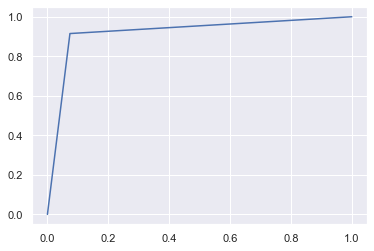

In [11]:
fpr, tpr, thresholds = roc_curve(y_test, predicted)
sns.set()
sns.lineplot(x=fpr, y=tpr)

In [12]:
print(np.linalg.norm(mlp.coefs_[0]), np.linalg.norm(mlp.coefs_[1]))

43.04631303474426 40.007825374594724


## Generate hyperplane with noisy dataset

C:\Users\victo\Google Drive\Mestrado\Redes Neurais\Trabalhos\Artigo_03\code\notebooks\utils.py:45: UserWarning: No contour levels were found within the data range.
  plt.contour(x1, x2, z, levels=[0], colors=('cyan',), linewidths=(2.5,))


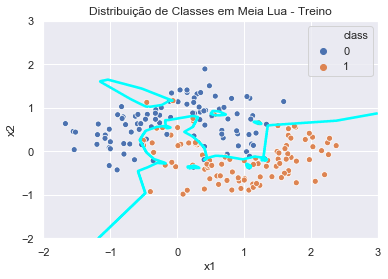

In [13]:
sns.set()
sns.scatterplot(x='x1', y='x2', hue='class', data=data_train)
plt.title('Distribuição de Classes em Meia Lua - Treino')    
plot_plain_separator(mlp, x_train, save=False, grid_range=(-2, 3))

plt.show()

C:\Users\victo\Google Drive\Mestrado\Redes Neurais\Trabalhos\Artigo_03\code\notebooks\utils.py:45: UserWarning: No contour levels were found within the data range.
  plt.contour(x1, x2, z, levels=[0], colors=('cyan',), linewidths=(2.5,))


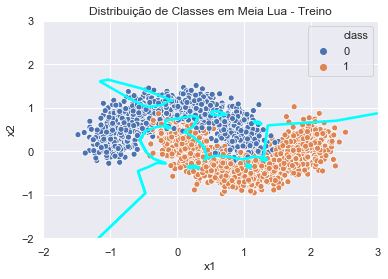

In [14]:
sns.set()
sns.scatterplot(x='x1', y='x2', hue='class', data=data_test)
plt.title('Distribuição de Classes em Meia Lua - Treino')    
plot_plain_separator(mlp, x_train, save=False, grid_range=(-2, 3))

plt.show()

## Run relabeling

In [15]:
def norm_distance(dist):
    return 1 - normalize(dist).ravel()

In [16]:
knn = KNeighborsClassifier(n_neighbors=5, weights=norm_distance)

In [17]:
y_classes = []
for index in range(x_train.shape[0]):
    x_t = np.delete(x_train, index, 0)
    y_t = np.delete(y_train, index, 0)
    knn.fit(x_t, y_t)
    y_classes.append(knn.predict([x_train[index]])[0])

errors = y_train - y_classes

wrong_classes = np.where(errors != 0)[0]

print('Fixing training samples with adjustment')
y_train_2 = y_train.copy()

for i in wrong_classes:
    y_train_2[i] = 0 if y_train[i] == 1 else 1

Fixing training samples with adjustment


## Run training on relabeled dataset

In [18]:
if use_tunned:
    mlp = clf
else:
    mlp = load_model(verbose = True)

mlp.fit(x_train, y_train_2)


Iteration 1, loss = 0.76160093
Iteration 2, loss = 0.71415077
Iteration 3, loss = 0.65057932
Iteration 4, loss = 0.58426909
Iteration 5, loss = 0.52514167
Iteration 6, loss = 0.47012937
Iteration 7, loss = 0.42423910
Iteration 8, loss = 0.38812074
Iteration 9, loss = 0.35894201
Iteration 10, loss = 0.33518284
Iteration 11, loss = 0.31938668
Iteration 12, loss = 0.30601906
Iteration 13, loss = 0.29478071
Iteration 14, loss = 0.28474576
Iteration 15, loss = 0.27792395
Iteration 16, loss = 0.27097811
Iteration 17, loss = 0.26482341
Iteration 18, loss = 0.25928312
Iteration 19, loss = 0.25438331
Iteration 20, loss = 0.25035018
Iteration 21, loss = 0.24647604
Iteration 22, loss = 0.24345995
Iteration 23, loss = 0.24106154
Iteration 24, loss = 0.23847833
Iteration 25, loss = 0.23726125
Iteration 26, loss = 0.23611761
Iteration 27, loss = 0.23502458
Iteration 28, loss = 0.23502498
Iteration 29, loss = 0.23322585
Iteration 30, loss = 0.23268687
Iteration 31, loss = 0.23247321
Iteration 32, los

Iteration 352, loss = 0.08627850
Iteration 353, loss = 0.08601122
Iteration 354, loss = 0.08589420
Iteration 355, loss = 0.08539188
Iteration 356, loss = 0.08516200
Iteration 357, loss = 0.08507961
Iteration 358, loss = 0.08451214
Iteration 359, loss = 0.08453302
Iteration 360, loss = 0.08407179
Iteration 361, loss = 0.08386718
Iteration 362, loss = 0.08361076
Iteration 363, loss = 0.08341419
Iteration 364, loss = 0.08291411
Iteration 365, loss = 0.08315593
Iteration 366, loss = 0.08265175
Iteration 367, loss = 0.08219237
Iteration 368, loss = 0.08196450
Iteration 369, loss = 0.08164636
Iteration 370, loss = 0.08148411
Iteration 371, loss = 0.08189846
Iteration 372, loss = 0.08147567
Iteration 373, loss = 0.08077417
Iteration 374, loss = 0.08052216
Iteration 375, loss = 0.08024876
Iteration 376, loss = 0.08021756
Iteration 377, loss = 0.07978975
Iteration 378, loss = 0.08009777
Iteration 379, loss = 0.07927413
Iteration 380, loss = 0.07918301
Iteration 381, loss = 0.07899014
Iteration 

Iteration 603, loss = 0.05017213
Iteration 604, loss = 0.05022389
Iteration 605, loss = 0.05006006
Iteration 606, loss = 0.04985625
Iteration 607, loss = 0.04975619
Iteration 608, loss = 0.04979436
Iteration 609, loss = 0.04974765
Iteration 610, loss = 0.04971995
Iteration 611, loss = 0.04959174
Iteration 612, loss = 0.04946133
Iteration 613, loss = 0.04943215
Iteration 614, loss = 0.04931144
Iteration 615, loss = 0.04952240
Iteration 616, loss = 0.04957281
Iteration 617, loss = 0.04928323
Iteration 618, loss = 0.04904094
Iteration 619, loss = 0.04915367
Iteration 620, loss = 0.04897917
Iteration 621, loss = 0.04939388
Iteration 622, loss = 0.04889795
Iteration 623, loss = 0.04875372
Iteration 624, loss = 0.04893608
Iteration 625, loss = 0.04861160
Iteration 626, loss = 0.04850375
Iteration 627, loss = 0.04871963
Iteration 628, loss = 0.04857663
Iteration 629, loss = 0.04864419
Iteration 630, loss = 0.04841347
Iteration 631, loss = 0.04826069
Iteration 632, loss = 0.04846848
Iteration 

Iteration 938, loss = 0.03697510
Iteration 939, loss = 0.03664387
Iteration 940, loss = 0.03698519
Iteration 941, loss = 0.03676602
Iteration 942, loss = 0.03657245
Iteration 943, loss = 0.03676210
Iteration 944, loss = 0.03637265
Iteration 945, loss = 0.03658461
Iteration 946, loss = 0.03634035
Iteration 947, loss = 0.03635955
Iteration 948, loss = 0.03650311
Iteration 949, loss = 0.03672594
Iteration 950, loss = 0.03633548
Iteration 951, loss = 0.03632460
Iteration 952, loss = 0.03621399
Iteration 953, loss = 0.03642061
Iteration 954, loss = 0.03649931
Iteration 955, loss = 0.03626810
Iteration 956, loss = 0.03607733
Iteration 957, loss = 0.03611888
Iteration 958, loss = 0.03602985
Iteration 959, loss = 0.03643822
Iteration 960, loss = 0.03600234
Iteration 961, loss = 0.03618734
Iteration 962, loss = 0.03609672
Iteration 963, loss = 0.03602184
Iteration 964, loss = 0.03593937
Iteration 965, loss = 0.03592742
Iteration 966, loss = 0.03601480
Iteration 967, loss = 0.03584665
Iteration 

Iteration 1180, loss = 0.03208281
Iteration 1181, loss = 0.03211294
Iteration 1182, loss = 0.03264310
Iteration 1183, loss = 0.03235233
Iteration 1184, loss = 0.03216608
Iteration 1185, loss = 0.03302046
Iteration 1186, loss = 0.03224272
Iteration 1187, loss = 0.03202014
Iteration 1188, loss = 0.03221736
Iteration 1189, loss = 0.03233249
Iteration 1190, loss = 0.03228430
Iteration 1191, loss = 0.03192580
Iteration 1192, loss = 0.03233312
Iteration 1193, loss = 0.03192400
Iteration 1194, loss = 0.03241750
Iteration 1195, loss = 0.03179476
Iteration 1196, loss = 0.03238487
Iteration 1197, loss = 0.03177982
Iteration 1198, loss = 0.03185222
Iteration 1199, loss = 0.03189625
Iteration 1200, loss = 0.03193231
Iteration 1201, loss = 0.03207459
Iteration 1202, loss = 0.03187524
Iteration 1203, loss = 0.03247962
Iteration 1204, loss = 0.03193877
Iteration 1205, loss = 0.03171578
Iteration 1206, loss = 0.03178688
Iteration 1207, loss = 0.03165557
Iteration 1208, loss = 0.03182561
Iteration 1209

Iteration 1424, loss = 0.02934388
Iteration 1425, loss = 0.02928967
Iteration 1426, loss = 0.02943843
Iteration 1427, loss = 0.02957577
Iteration 1428, loss = 0.02918889
Iteration 1429, loss = 0.02912634
Iteration 1430, loss = 0.02921401
Iteration 1431, loss = 0.02912710
Iteration 1432, loss = 0.02927778
Iteration 1433, loss = 0.02910667
Iteration 1434, loss = 0.02922225
Iteration 1435, loss = 0.02905660
Iteration 1436, loss = 0.02916129
Iteration 1437, loss = 0.02923160
Iteration 1438, loss = 0.02947235
Iteration 1439, loss = 0.02917710
Iteration 1440, loss = 0.02929847
Iteration 1441, loss = 0.02913737
Iteration 1442, loss = 0.02900211
Iteration 1443, loss = 0.02898835
Iteration 1444, loss = 0.02906024
Iteration 1445, loss = 0.02902580
Iteration 1446, loss = 0.02900361
Iteration 1447, loss = 0.02939057
Iteration 1448, loss = 0.02898479
Iteration 1449, loss = 0.02909017
Iteration 1450, loss = 0.02906119
Iteration 1451, loss = 0.02909063
Iteration 1452, loss = 0.02904551
Iteration 1453

Iteration 1666, loss = 0.02760492
Iteration 1667, loss = 0.02724330
Iteration 1668, loss = 0.02724174
Iteration 1669, loss = 0.02723289
Iteration 1670, loss = 0.02739182
Iteration 1671, loss = 0.02761095
Iteration 1672, loss = 0.02728288
Iteration 1673, loss = 0.02743774
Iteration 1674, loss = 0.02721407
Iteration 1675, loss = 0.02719083
Iteration 1676, loss = 0.02738072
Iteration 1677, loss = 0.02768279
Iteration 1678, loss = 0.02721264
Iteration 1679, loss = 0.02735399
Iteration 1680, loss = 0.02760258
Iteration 1681, loss = 0.02749623
Iteration 1682, loss = 0.02729230
Iteration 1683, loss = 0.02756072
Iteration 1684, loss = 0.02762450
Iteration 1685, loss = 0.02716020
Iteration 1686, loss = 0.02733283
Iteration 1687, loss = 0.02729101
Iteration 1688, loss = 0.02710987
Iteration 1689, loss = 0.02713687
Iteration 1690, loss = 0.02718270
Iteration 1691, loss = 0.02722551
Iteration 1692, loss = 0.02715349
Iteration 1693, loss = 0.02710887
Iteration 1694, loss = 0.02716539
Iteration 1695

Iteration 1913, loss = 0.02598410
Iteration 1914, loss = 0.02589440
Iteration 1915, loss = 0.02580240
Iteration 1916, loss = 0.02590267
Iteration 1917, loss = 0.02587850
Iteration 1918, loss = 0.02632366
Iteration 1919, loss = 0.02575175
Iteration 1920, loss = 0.02585734
Iteration 1921, loss = 0.02602755
Iteration 1922, loss = 0.02586438
Iteration 1923, loss = 0.02619025
Iteration 1924, loss = 0.02587078
Iteration 1925, loss = 0.02595473
Iteration 1926, loss = 0.02602857
Iteration 1927, loss = 0.02578226
Iteration 1928, loss = 0.02594714
Iteration 1929, loss = 0.02590611
Iteration 1930, loss = 0.02609681
Iteration 1931, loss = 0.02584966
Iteration 1932, loss = 0.02582741
Iteration 1933, loss = 0.02575589
Iteration 1934, loss = 0.02571741
Iteration 1935, loss = 0.02659310
Iteration 1936, loss = 0.02596436
Iteration 1937, loss = 0.02608932
Iteration 1938, loss = 0.02593393
Iteration 1939, loss = 0.02577172
Iteration 1940, loss = 0.02580309
Iteration 1941, loss = 0.02579171
Iteration 1942

Iteration 2153, loss = 0.02514905
Iteration 2154, loss = 0.02532200
Iteration 2155, loss = 0.02503601
Iteration 2156, loss = 0.02487264
Iteration 2157, loss = 0.02488047
Iteration 2158, loss = 0.02475040
Iteration 2159, loss = 0.02490972
Iteration 2160, loss = 0.02472554
Iteration 2161, loss = 0.02478422
Iteration 2162, loss = 0.02490166
Iteration 2163, loss = 0.02474560
Iteration 2164, loss = 0.02488903
Iteration 2165, loss = 0.02479438
Iteration 2166, loss = 0.02475885
Iteration 2167, loss = 0.02470609
Iteration 2168, loss = 0.02480805
Iteration 2169, loss = 0.02472248
Iteration 2170, loss = 0.02484551
Iteration 2171, loss = 0.02514735
Iteration 2172, loss = 0.02497857
Iteration 2173, loss = 0.02479494
Iteration 2174, loss = 0.02486394
Iteration 2175, loss = 0.02504171
Iteration 2176, loss = 0.02510427
Iteration 2177, loss = 0.02482636
Iteration 2178, loss = 0.02471006
Iteration 2179, loss = 0.02466070
Iteration 2180, loss = 0.02512383
Iteration 2181, loss = 0.02501206
Iteration 2182

Iteration 2404, loss = 0.02397329
Iteration 2405, loss = 0.02396301
Iteration 2406, loss = 0.02388092
Iteration 2407, loss = 0.02399137
Iteration 2408, loss = 0.02391688
Iteration 2409, loss = 0.02390427
Iteration 2410, loss = 0.02392613
Iteration 2411, loss = 0.02448836
Iteration 2412, loss = 0.02420338
Iteration 2413, loss = 0.02409932
Iteration 2414, loss = 0.02384307
Iteration 2415, loss = 0.02397405
Iteration 2416, loss = 0.02400153
Iteration 2417, loss = 0.02392528
Iteration 2418, loss = 0.02384021
Iteration 2419, loss = 0.02401628
Iteration 2420, loss = 0.02411972
Iteration 2421, loss = 0.02402873
Iteration 2422, loss = 0.02398106
Iteration 2423, loss = 0.02409139
Iteration 2424, loss = 0.02416389
Iteration 2425, loss = 0.02388033
Iteration 2426, loss = 0.02420694
Iteration 2427, loss = 0.02385254
Iteration 2428, loss = 0.02409575
Iteration 2429, loss = 0.02409187
Iteration 2430, loss = 0.02388088
Iteration 2431, loss = 0.02391878
Iteration 2432, loss = 0.02451810
Iteration 2433

Iteration 2653, loss = 0.02339545
Iteration 2654, loss = 0.02334315
Iteration 2655, loss = 0.02321071
Iteration 2656, loss = 0.02327187
Iteration 2657, loss = 0.02354500
Iteration 2658, loss = 0.02323185
Iteration 2659, loss = 0.02325492
Iteration 2660, loss = 0.02328643
Iteration 2661, loss = 0.02343412
Iteration 2662, loss = 0.02323170
Iteration 2663, loss = 0.02334105
Iteration 2664, loss = 0.02389014
Iteration 2665, loss = 0.02318363
Iteration 2666, loss = 0.02358362
Iteration 2667, loss = 0.02352183
Iteration 2668, loss = 0.02316184
Iteration 2669, loss = 0.02334747
Iteration 2670, loss = 0.02336061
Iteration 2671, loss = 0.02318935
Iteration 2672, loss = 0.02375269
Iteration 2673, loss = 0.02379827
Iteration 2674, loss = 0.02319725
Iteration 2675, loss = 0.02314224
Iteration 2676, loss = 0.02313436
Iteration 2677, loss = 0.02336125
Iteration 2678, loss = 0.02339857
Iteration 2679, loss = 0.02329821
Iteration 2680, loss = 0.02360682
Iteration 2681, loss = 0.02381024
Iteration 2682

Iteration 2900, loss = 0.02282873
Iteration 2901, loss = 0.02275315
Iteration 2902, loss = 0.02280074
Iteration 2903, loss = 0.02290604
Iteration 2904, loss = 0.02267174
Iteration 2905, loss = 0.02261318
Iteration 2906, loss = 0.02297534
Iteration 2907, loss = 0.02283137
Iteration 2908, loss = 0.02310150
Iteration 2909, loss = 0.02317108
Iteration 2910, loss = 0.02268965
Iteration 2911, loss = 0.02271032
Iteration 2912, loss = 0.02271548
Iteration 2913, loss = 0.02269973
Iteration 2914, loss = 0.02278024
Iteration 2915, loss = 0.02286281
Iteration 2916, loss = 0.02260129
Iteration 2917, loss = 0.02292917
Iteration 2918, loss = 0.02291461
Iteration 2919, loss = 0.02267904
Iteration 2920, loss = 0.02275727
Iteration 2921, loss = 0.02263756
Iteration 2922, loss = 0.02264724
Iteration 2923, loss = 0.02290490
Iteration 2924, loss = 0.02307172
Iteration 2925, loss = 0.02280749
Iteration 2926, loss = 0.02264587
Iteration 2927, loss = 0.02276534
Iteration 2928, loss = 0.02274575
Iteration 2929

Iteration 3143, loss = 0.02220904
Iteration 3144, loss = 0.02228562
Iteration 3145, loss = 0.02221500
Iteration 3146, loss = 0.02219326
Iteration 3147, loss = 0.02239897
Iteration 3148, loss = 0.02277712
Iteration 3149, loss = 0.02217162
Iteration 3150, loss = 0.02222431
Iteration 3151, loss = 0.02235273
Iteration 3152, loss = 0.02231122
Iteration 3153, loss = 0.02218261
Iteration 3154, loss = 0.02225941
Iteration 3155, loss = 0.02239946
Iteration 3156, loss = 0.02218478
Iteration 3157, loss = 0.02249469
Iteration 3158, loss = 0.02224067
Iteration 3159, loss = 0.02226274
Iteration 3160, loss = 0.02241499
Iteration 3161, loss = 0.02214817
Iteration 3162, loss = 0.02246113
Iteration 3163, loss = 0.02227464
Iteration 3164, loss = 0.02242076
Iteration 3165, loss = 0.02300739
Iteration 3166, loss = 0.02224037
Iteration 3167, loss = 0.02232540
Iteration 3168, loss = 0.02227955
Iteration 3169, loss = 0.02263449
Iteration 3170, loss = 0.02220765
Iteration 3171, loss = 0.02233344
Iteration 3172

Iteration 3389, loss = 0.02204583
Iteration 3390, loss = 0.02222984
Iteration 3391, loss = 0.02174319
Iteration 3392, loss = 0.02180545
Iteration 3393, loss = 0.02206793
Iteration 3394, loss = 0.02184894
Iteration 3395, loss = 0.02202602
Iteration 3396, loss = 0.02199466
Iteration 3397, loss = 0.02208612
Iteration 3398, loss = 0.02215951
Iteration 3399, loss = 0.02189783
Iteration 3400, loss = 0.02175728
Iteration 3401, loss = 0.02198924
Iteration 3402, loss = 0.02194074
Iteration 3403, loss = 0.02198708
Iteration 3404, loss = 0.02194730
Iteration 3405, loss = 0.02199760
Iteration 3406, loss = 0.02200359
Iteration 3407, loss = 0.02203396
Iteration 3408, loss = 0.02224932
Iteration 3409, loss = 0.02242853
Iteration 3410, loss = 0.02179855
Iteration 3411, loss = 0.02195191
Iteration 3412, loss = 0.02190168
Iteration 3413, loss = 0.02190179
Iteration 3414, loss = 0.02227361
Iteration 3415, loss = 0.02176470
Iteration 3416, loss = 0.02175134
Iteration 3417, loss = 0.02235263
Iteration 3418

Iteration 3739, loss = 0.02147378
Iteration 3740, loss = 0.02127311
Iteration 3741, loss = 0.02208990
Iteration 3742, loss = 0.02144404
Iteration 3743, loss = 0.02150218
Iteration 3744, loss = 0.02130860
Iteration 3745, loss = 0.02141433
Iteration 3746, loss = 0.02129827
Iteration 3747, loss = 0.02132987
Iteration 3748, loss = 0.02175595
Iteration 3749, loss = 0.02160286
Iteration 3750, loss = 0.02166300
Iteration 3751, loss = 0.02197227
Iteration 3752, loss = 0.02138861
Iteration 3753, loss = 0.02152286
Iteration 3754, loss = 0.02150153
Iteration 3755, loss = 0.02152664
Iteration 3756, loss = 0.02170942
Iteration 3757, loss = 0.02189939
Iteration 3758, loss = 0.02173162
Iteration 3759, loss = 0.02153360
Iteration 3760, loss = 0.02133115
Iteration 3761, loss = 0.02169280
Iteration 3762, loss = 0.02160421
Iteration 3763, loss = 0.02155645
Iteration 3764, loss = 0.02161828
Iteration 3765, loss = 0.02143301
Iteration 3766, loss = 0.02154554
Iteration 3767, loss = 0.02146071
Iteration 3768

Iteration 4087, loss = 0.02109032
Iteration 4088, loss = 0.02086800
Iteration 4089, loss = 0.02105042
Iteration 4090, loss = 0.02119410
Iteration 4091, loss = 0.02112463
Iteration 4092, loss = 0.02094066
Iteration 4093, loss = 0.02105648
Iteration 4094, loss = 0.02092386
Iteration 4095, loss = 0.02111188
Iteration 4096, loss = 0.02120157
Iteration 4097, loss = 0.02113399
Iteration 4098, loss = 0.02098185
Iteration 4099, loss = 0.02117883
Iteration 4100, loss = 0.02138360
Iteration 4101, loss = 0.02094059
Iteration 4102, loss = 0.02095756
Iteration 4103, loss = 0.02087851
Iteration 4104, loss = 0.02091040
Iteration 4105, loss = 0.02088379
Iteration 4106, loss = 0.02149981
Iteration 4107, loss = 0.02112706
Iteration 4108, loss = 0.02090548
Iteration 4109, loss = 0.02092493
Iteration 4110, loss = 0.02085587
Iteration 4111, loss = 0.02105888
Iteration 4112, loss = 0.02112428
Iteration 4113, loss = 0.02093641
Iteration 4114, loss = 0.02100396
Iteration 4115, loss = 0.02094599
Iteration 4116

Iteration 4335, loss = 0.02083118
Iteration 4336, loss = 0.02077693
Iteration 4337, loss = 0.02097520
Iteration 4338, loss = 0.02062475
Iteration 4339, loss = 0.02088600
Iteration 4340, loss = 0.02089830
Iteration 4341, loss = 0.02115229
Iteration 4342, loss = 0.02062429
Iteration 4343, loss = 0.02078247
Iteration 4344, loss = 0.02088143
Iteration 4345, loss = 0.02080719
Iteration 4346, loss = 0.02087652
Iteration 4347, loss = 0.02115482
Iteration 4348, loss = 0.02076883
Iteration 4349, loss = 0.02070393
Iteration 4350, loss = 0.02066041
Iteration 4351, loss = 0.02081271
Iteration 4352, loss = 0.02083434
Iteration 4353, loss = 0.02125937
Iteration 4354, loss = 0.02122561
Iteration 4355, loss = 0.02078010
Iteration 4356, loss = 0.02113658
Iteration 4357, loss = 0.02073525
Iteration 4358, loss = 0.02073303
Iteration 4359, loss = 0.02059747
Iteration 4360, loss = 0.02077573
Iteration 4361, loss = 0.02134856
Iteration 4362, loss = 0.02095704
Iteration 4363, loss = 0.02060973
Iteration 4364

Iteration 4680, loss = 0.02038110
Iteration 4681, loss = 0.02041039
Iteration 4682, loss = 0.02068379
Iteration 4683, loss = 0.02046793
Iteration 4684, loss = 0.02042964
Iteration 4685, loss = 0.02055362
Iteration 4686, loss = 0.02110618
Iteration 4687, loss = 0.02040090
Iteration 4688, loss = 0.02123557
Iteration 4689, loss = 0.02060416
Iteration 4690, loss = 0.02036585
Iteration 4691, loss = 0.02031668
Iteration 4692, loss = 0.02054322
Iteration 4693, loss = 0.02053810
Iteration 4694, loss = 0.02048056
Iteration 4695, loss = 0.02028814
Iteration 4696, loss = 0.02043449
Iteration 4697, loss = 0.02027281
Iteration 4698, loss = 0.02035809
Iteration 4699, loss = 0.02084389
Iteration 4700, loss = 0.02049091
Iteration 4701, loss = 0.02026380
Iteration 4702, loss = 0.02036276
Iteration 4703, loss = 0.02091547
Iteration 4704, loss = 0.02051811
Iteration 4705, loss = 0.02046310
Iteration 4706, loss = 0.02071443
Iteration 4707, loss = 0.02063180
Iteration 4708, loss = 0.02031012
Iteration 4709

Iteration 4925, loss = 0.02065764
Iteration 4926, loss = 0.02016073
Iteration 4927, loss = 0.02070857
Iteration 4928, loss = 0.02026996
Iteration 4929, loss = 0.02012305
Iteration 4930, loss = 0.02017781
Iteration 4931, loss = 0.02029880
Iteration 4932, loss = 0.02019330
Iteration 4933, loss = 0.02035221
Iteration 4934, loss = 0.02025945
Iteration 4935, loss = 0.02013878
Iteration 4936, loss = 0.02012509
Iteration 4937, loss = 0.02090437
Iteration 4938, loss = 0.02072866
Iteration 4939, loss = 0.02013270
Iteration 4940, loss = 0.02032622
Iteration 4941, loss = 0.02032023
Iteration 4942, loss = 0.02070608
Iteration 4943, loss = 0.02009247
Iteration 4944, loss = 0.02051484
Iteration 4945, loss = 0.02036935
Iteration 4946, loss = 0.02011772
Iteration 4947, loss = 0.02018876
Iteration 4948, loss = 0.02026138
Iteration 4949, loss = 0.02032849
Iteration 4950, loss = 0.02035346
Iteration 4951, loss = 0.02015253
Iteration 4952, loss = 0.02028982
Iteration 4953, loss = 0.02020314
Iteration 4954

Iteration 5272, loss = 0.01988155
Iteration 5273, loss = 0.01984073
Iteration 5274, loss = 0.02002878
Iteration 5275, loss = 0.01981687
Iteration 5276, loss = 0.01990625
Iteration 5277, loss = 0.01997302
Iteration 5278, loss = 0.02017913
Iteration 5279, loss = 0.01990406
Iteration 5280, loss = 0.01981181
Iteration 5281, loss = 0.02038979
Iteration 5282, loss = 0.02039516
Iteration 5283, loss = 0.02033933
Iteration 5284, loss = 0.01988244
Iteration 5285, loss = 0.02044906
Iteration 5286, loss = 0.01991963
Iteration 5287, loss = 0.01990048
Iteration 5288, loss = 0.02021893
Iteration 5289, loss = 0.01981906
Iteration 5290, loss = 0.01989152
Iteration 5291, loss = 0.01988175
Iteration 5292, loss = 0.01996238
Iteration 5293, loss = 0.01999827
Iteration 5294, loss = 0.01989782
Iteration 5295, loss = 0.02017757
Iteration 5296, loss = 0.02034148
Iteration 5297, loss = 0.02047201
Iteration 5298, loss = 0.02015956
Iteration 5299, loss = 0.01994376
Iteration 5300, loss = 0.01980764
Iteration 5301

Iteration 5512, loss = 0.01966783
Iteration 5513, loss = 0.01978277
Iteration 5514, loss = 0.01969123
Iteration 5515, loss = 0.01966127
Iteration 5516, loss = 0.01996295
Iteration 5517, loss = 0.02004930
Iteration 5518, loss = 0.01991670
Iteration 5519, loss = 0.01981688
Iteration 5520, loss = 0.01976396
Iteration 5521, loss = 0.01998908
Iteration 5522, loss = 0.01976963
Iteration 5523, loss = 0.01995167
Iteration 5524, loss = 0.01981480
Iteration 5525, loss = 0.01994167
Iteration 5526, loss = 0.01973502
Iteration 5527, loss = 0.02029787
Iteration 5528, loss = 0.02040772
Iteration 5529, loss = 0.01973985
Iteration 5530, loss = 0.02001878
Iteration 5531, loss = 0.01966720
Iteration 5532, loss = 0.02024707
Iteration 5533, loss = 0.01975816
Iteration 5534, loss = 0.01991953
Iteration 5535, loss = 0.01978340
Iteration 5536, loss = 0.02016612
Iteration 5537, loss = 0.02003926
Iteration 5538, loss = 0.01963932
Iteration 5539, loss = 0.01966054
Iteration 5540, loss = 0.01966260
Iteration 5541

Iteration 5755, loss = 0.01983464
Iteration 5756, loss = 0.02005663
Iteration 5757, loss = 0.02026168
Iteration 5758, loss = 0.01969161
Iteration 5759, loss = 0.02014244
Iteration 5760, loss = 0.01955354
Iteration 5761, loss = 0.01963304
Iteration 5762, loss = 0.01980135
Iteration 5763, loss = 0.01963351
Iteration 5764, loss = 0.01975176
Iteration 5765, loss = 0.01949301
Iteration 5766, loss = 0.01999022
Iteration 5767, loss = 0.02008073
Iteration 5768, loss = 0.01966019
Iteration 5769, loss = 0.01947335
Iteration 5770, loss = 0.01979232
Iteration 5771, loss = 0.01960198
Iteration 5772, loss = 0.01963292
Iteration 5773, loss = 0.01964849
Iteration 5774, loss = 0.01979582
Iteration 5775, loss = 0.01967997
Iteration 5776, loss = 0.01967562
Iteration 5777, loss = 0.01948163
Iteration 5778, loss = 0.01964439
Iteration 5779, loss = 0.01962076
Iteration 5780, loss = 0.01979327
Iteration 5781, loss = 0.02030261
Iteration 5782, loss = 0.01963120
Iteration 5783, loss = 0.01997504
Iteration 5784

Iteration 6003, loss = 0.01952252
Iteration 6004, loss = 0.01942551
Iteration 6005, loss = 0.01984013
Iteration 6006, loss = 0.01948862
Iteration 6007, loss = 0.01981848
Iteration 6008, loss = 0.01998550
Iteration 6009, loss = 0.01942235
Iteration 6010, loss = 0.01968777
Iteration 6011, loss = 0.01959641
Iteration 6012, loss = 0.01945663
Iteration 6013, loss = 0.01934985
Iteration 6014, loss = 0.01940235
Iteration 6015, loss = 0.01996041
Iteration 6016, loss = 0.01932961
Iteration 6017, loss = 0.01942141
Iteration 6018, loss = 0.01995063
Iteration 6019, loss = 0.01965238
Iteration 6020, loss = 0.01940198
Iteration 6021, loss = 0.01944075
Iteration 6022, loss = 0.01993609
Iteration 6023, loss = 0.01941013
Iteration 6024, loss = 0.01947645
Iteration 6025, loss = 0.01951585
Iteration 6026, loss = 0.01935258
Iteration 6027, loss = 0.01951444
Iteration 6028, loss = 0.01933663
Iteration 6029, loss = 0.01950046
Iteration 6030, loss = 0.01939173
Iteration 6031, loss = 0.01996077
Iteration 6032

Iteration 6246, loss = 0.01933801
Iteration 6247, loss = 0.01945796
Iteration 6248, loss = 0.01946765
Iteration 6249, loss = 0.01937394
Iteration 6250, loss = 0.01947783
Iteration 6251, loss = 0.01944383
Iteration 6252, loss = 0.01956986
Iteration 6253, loss = 0.01955508
Iteration 6254, loss = 0.01923257
Iteration 6255, loss = 0.01927980
Iteration 6256, loss = 0.01943448
Iteration 6257, loss = 0.01948857
Iteration 6258, loss = 0.01928658
Iteration 6259, loss = 0.01956711
Iteration 6260, loss = 0.01928255
Iteration 6261, loss = 0.01924873
Iteration 6262, loss = 0.01927734
Iteration 6263, loss = 0.01945222
Iteration 6264, loss = 0.01963171
Iteration 6265, loss = 0.01927979
Iteration 6266, loss = 0.01980554
Iteration 6267, loss = 0.01956946
Iteration 6268, loss = 0.01951631
Iteration 6269, loss = 0.01936732
Iteration 6270, loss = 0.01980782
Iteration 6271, loss = 0.01949358
Iteration 6272, loss = 0.01923575
Iteration 6273, loss = 0.01942860
Iteration 6274, loss = 0.01928606
Iteration 6275

Iteration 6486, loss = 0.01914304
Iteration 6487, loss = 0.01980979
Iteration 6488, loss = 0.01920533
Iteration 6489, loss = 0.01940952
Iteration 6490, loss = 0.01915724
Iteration 6491, loss = 0.01939165
Iteration 6492, loss = 0.01976201
Iteration 6493, loss = 0.01936626
Iteration 6494, loss = 0.01907163
Iteration 6495, loss = 0.01912586
Iteration 6496, loss = 0.01926230
Iteration 6497, loss = 0.01946390
Iteration 6498, loss = 0.01909829
Iteration 6499, loss = 0.01914643
Iteration 6500, loss = 0.01913606
Iteration 6501, loss = 0.01915292
Iteration 6502, loss = 0.01924357
Iteration 6503, loss = 0.01923787
Iteration 6504, loss = 0.01977644
Iteration 6505, loss = 0.01965213
Iteration 6506, loss = 0.01936589
Iteration 6507, loss = 0.01937436
Iteration 6508, loss = 0.01969240
Iteration 6509, loss = 0.01917376
Iteration 6510, loss = 0.01914911
Iteration 6511, loss = 0.01973787
Iteration 6512, loss = 0.01908629
Iteration 6513, loss = 0.01914707
Iteration 6514, loss = 0.01928512
Iteration 6515

Iteration 6837, loss = 0.01911854
Iteration 6838, loss = 0.01890915
Iteration 6839, loss = 0.01898133
Iteration 6840, loss = 0.01889406
Iteration 6841, loss = 0.01888890
Iteration 6842, loss = 0.01904772
Iteration 6843, loss = 0.01910627
Iteration 6844, loss = 0.01913516
Iteration 6845, loss = 0.01905195
Iteration 6846, loss = 0.01902516
Iteration 6847, loss = 0.01908960
Iteration 6848, loss = 0.01897404
Iteration 6849, loss = 0.01888595
Iteration 6850, loss = 0.01954821
Iteration 6851, loss = 0.01937957
Iteration 6852, loss = 0.01946975
Iteration 6853, loss = 0.01913124
Iteration 6854, loss = 0.01923793
Iteration 6855, loss = 0.01916692
Iteration 6856, loss = 0.01893289
Iteration 6857, loss = 0.01907723
Iteration 6858, loss = 0.01906896
Iteration 6859, loss = 0.01901974
Iteration 6860, loss = 0.01911772
Iteration 6861, loss = 0.01974391
Iteration 6862, loss = 0.01904604
Iteration 6863, loss = 0.01900597
Iteration 6864, loss = 0.01901459
Iteration 6865, loss = 0.01927113
Iteration 6866

Iteration 7080, loss = 0.01903084
Iteration 7081, loss = 0.01885283
Iteration 7082, loss = 0.01892764
Iteration 7083, loss = 0.01883521
Iteration 7084, loss = 0.01878039
Iteration 7085, loss = 0.01888278
Iteration 7086, loss = 0.01952302
Iteration 7087, loss = 0.01881979
Iteration 7088, loss = 0.01880327
Iteration 7089, loss = 0.01886453
Iteration 7090, loss = 0.01897384
Iteration 7091, loss = 0.01877893
Iteration 7092, loss = 0.01915474
Iteration 7093, loss = 0.01914660
Iteration 7094, loss = 0.01898568
Iteration 7095, loss = 0.01885200
Iteration 7096, loss = 0.01910602
Iteration 7097, loss = 0.01947510
Iteration 7098, loss = 0.01923386
Iteration 7099, loss = 0.01874962
Iteration 7100, loss = 0.01893244
Iteration 7101, loss = 0.01881879
Iteration 7102, loss = 0.01889755
Iteration 7103, loss = 0.01907893
Iteration 7104, loss = 0.01875563
Iteration 7105, loss = 0.01890291
Iteration 7106, loss = 0.01903050
Iteration 7107, loss = 0.01910681
Iteration 7108, loss = 0.01910317
Iteration 7109

Iteration 7328, loss = 0.01932895
Iteration 7329, loss = 0.01894485
Iteration 7330, loss = 0.01868336
Iteration 7331, loss = 0.01873145
Iteration 7332, loss = 0.01882762
Iteration 7333, loss = 0.01905918
Iteration 7334, loss = 0.01901698
Iteration 7335, loss = 0.01907522
Iteration 7336, loss = 0.01884059
Iteration 7337, loss = 0.01900314
Iteration 7338, loss = 0.01894850
Iteration 7339, loss = 0.01893308
Iteration 7340, loss = 0.01893909
Iteration 7341, loss = 0.01892106
Iteration 7342, loss = 0.01863079
Iteration 7343, loss = 0.01882455
Iteration 7344, loss = 0.01877352
Iteration 7345, loss = 0.01870689
Iteration 7346, loss = 0.01915761
Iteration 7347, loss = 0.01880076
Iteration 7348, loss = 0.01896039
Iteration 7349, loss = 0.01896277
Iteration 7350, loss = 0.01872686
Iteration 7351, loss = 0.01928017
Iteration 7352, loss = 0.01874405
Iteration 7353, loss = 0.01896663
Iteration 7354, loss = 0.01862686
Iteration 7355, loss = 0.01929268
Iteration 7356, loss = 0.01867293
Iteration 7357

Iteration 7678, loss = 0.01883292
Iteration 7679, loss = 0.01881860
Iteration 7680, loss = 0.01850391
Iteration 7681, loss = 0.01847543
Iteration 7682, loss = 0.01854105
Iteration 7683, loss = 0.01849574
Iteration 7684, loss = 0.01867438
Iteration 7685, loss = 0.01928393
Iteration 7686, loss = 0.01857720
Iteration 7687, loss = 0.01874800
Iteration 7688, loss = 0.01861790
Iteration 7689, loss = 0.01856906
Iteration 7690, loss = 0.01882153
Iteration 7691, loss = 0.01887020
Iteration 7692, loss = 0.01864091
Iteration 7693, loss = 0.01878392
Iteration 7694, loss = 0.01867046
Iteration 7695, loss = 0.01859003
Iteration 7696, loss = 0.01909050
Iteration 7697, loss = 0.01863786
Iteration 7698, loss = 0.01868038
Iteration 7699, loss = 0.01859145
Iteration 7700, loss = 0.01853812
Iteration 7701, loss = 0.01866278
Iteration 7702, loss = 0.01871398
Iteration 7703, loss = 0.01876381
Iteration 7704, loss = 0.01849978
Iteration 7705, loss = 0.01852453
Iteration 7706, loss = 0.01849073
Iteration 7707

Iteration 7925, loss = 0.01866249
Iteration 7926, loss = 0.01848560
Iteration 7927, loss = 0.01854835
Iteration 7928, loss = 0.01838676
Iteration 7929, loss = 0.01917320
Iteration 7930, loss = 0.01877813
Iteration 7931, loss = 0.01844257
Iteration 7932, loss = 0.01842920
Iteration 7933, loss = 0.01845881
Iteration 7934, loss = 0.01846115
Iteration 7935, loss = 0.01852735
Iteration 7936, loss = 0.01859015
Iteration 7937, loss = 0.01917034
Iteration 7938, loss = 0.01850900
Iteration 7939, loss = 0.01866560
Iteration 7940, loss = 0.01836298
Iteration 7941, loss = 0.01859817
Iteration 7942, loss = 0.01916945
Iteration 7943, loss = 0.01840603
Iteration 7944, loss = 0.01869758
Iteration 7945, loss = 0.01927784
Iteration 7946, loss = 0.01853295
Iteration 7947, loss = 0.01845866
Iteration 7948, loss = 0.01878207
Iteration 7949, loss = 0.01901236
Iteration 7950, loss = 0.01846271
Iteration 7951, loss = 0.01863718
Iteration 7952, loss = 0.01874338
Iteration 7953, loss = 0.01856010
Iteration 7954

Iteration 8168, loss = 0.01906855
Iteration 8169, loss = 0.01846364
Iteration 8170, loss = 0.01916481
Iteration 8171, loss = 0.01841771
Iteration 8172, loss = 0.01900195
Iteration 8173, loss = 0.01827666
Iteration 8174, loss = 0.01843379
Iteration 8175, loss = 0.01832812
Iteration 8176, loss = 0.01862605
Iteration 8177, loss = 0.01838844
Iteration 8178, loss = 0.01865179
Iteration 8179, loss = 0.01827812
Iteration 8180, loss = 0.01899004
Iteration 8181, loss = 0.01838555
Iteration 8182, loss = 0.01872100
Iteration 8183, loss = 0.01839515
Iteration 8184, loss = 0.01905449
Iteration 8185, loss = 0.01860464
Iteration 8186, loss = 0.01837207
Iteration 8187, loss = 0.01832959
Iteration 8188, loss = 0.01872802
Iteration 8189, loss = 0.01840012
Iteration 8190, loss = 0.01848961
Iteration 8191, loss = 0.01874068
Iteration 8192, loss = 0.01897728
Iteration 8193, loss = 0.01847696
Iteration 8194, loss = 0.01834505
Iteration 8195, loss = 0.01827271
Iteration 8196, loss = 0.01900519
Iteration 8197

Iteration 8513, loss = 0.01821650
Iteration 8514, loss = 0.01897926
Iteration 8515, loss = 0.01828740
Iteration 8516, loss = 0.01822612
Iteration 8517, loss = 0.01835103
Iteration 8518, loss = 0.01813167
Iteration 8519, loss = 0.01882576
Iteration 8520, loss = 0.01850575
Iteration 8521, loss = 0.01848504
Iteration 8522, loss = 0.01822422
Iteration 8523, loss = 0.01890032
Iteration 8524, loss = 0.01824025
Iteration 8525, loss = 0.01830726
Iteration 8526, loss = 0.01828205
Iteration 8527, loss = 0.01820685
Iteration 8528, loss = 0.01851482
Iteration 8529, loss = 0.01820850
Iteration 8530, loss = 0.01841852
Iteration 8531, loss = 0.01821371
Iteration 8532, loss = 0.01891586
Iteration 8533, loss = 0.01856848
Iteration 8534, loss = 0.01815274
Iteration 8535, loss = 0.01824977
Iteration 8536, loss = 0.01845329
Iteration 8537, loss = 0.01829720
Iteration 8538, loss = 0.01880874
Iteration 8539, loss = 0.01856319
Iteration 8540, loss = 0.01838538
Iteration 8541, loss = 0.01824443
Iteration 8542

Iteration 8756, loss = 0.01808643
Iteration 8757, loss = 0.01814375
Iteration 8758, loss = 0.01825785
Iteration 8759, loss = 0.01836950
Iteration 8760, loss = 0.01805971
Iteration 8761, loss = 0.01826255
Iteration 8762, loss = 0.01807631
Iteration 8763, loss = 0.01805993
Iteration 8764, loss = 0.01815102
Iteration 8765, loss = 0.01878227
Iteration 8766, loss = 0.01874120
Iteration 8767, loss = 0.01873792
Iteration 8768, loss = 0.01827229
Iteration 8769, loss = 0.01857058
Iteration 8770, loss = 0.01862480
Iteration 8771, loss = 0.01895792
Iteration 8772, loss = 0.01818069
Iteration 8773, loss = 0.01820886
Iteration 8774, loss = 0.01821711
Iteration 8775, loss = 0.01831022
Iteration 8776, loss = 0.01817290
Iteration 8777, loss = 0.01881458
Iteration 8778, loss = 0.01826621
Iteration 8779, loss = 0.01833779
Iteration 8780, loss = 0.01888311
Iteration 8781, loss = 0.01856625
Iteration 8782, loss = 0.01837758
Iteration 8783, loss = 0.01814692
Iteration 8784, loss = 0.01809500
Iteration 8785

Iteration 9005, loss = 0.01800804
Iteration 9006, loss = 0.01815520
Iteration 9007, loss = 0.01803364
Iteration 9008, loss = 0.01870536
Iteration 9009, loss = 0.01804406
Iteration 9010, loss = 0.01796005
Iteration 9011, loss = 0.01797383
Iteration 9012, loss = 0.01796873
Iteration 9013, loss = 0.01806438
Iteration 9014, loss = 0.01832566
Iteration 9015, loss = 0.01810198
Iteration 9016, loss = 0.01796521
Iteration 9017, loss = 0.01806449
Iteration 9018, loss = 0.01808205
Iteration 9019, loss = 0.01795316
Iteration 9020, loss = 0.01813866
Iteration 9021, loss = 0.01808521
Iteration 9022, loss = 0.01806973
Iteration 9023, loss = 0.01807233
Iteration 9024, loss = 0.01802611
Iteration 9025, loss = 0.01811912
Iteration 9026, loss = 0.01816175
Iteration 9027, loss = 0.01805828
Iteration 9028, loss = 0.01809104
Iteration 9029, loss = 0.01803456
Iteration 9030, loss = 0.01815784
Iteration 9031, loss = 0.01826307
Iteration 9032, loss = 0.01839137
Iteration 9033, loss = 0.01804603
Iteration 9034

Iteration 9249, loss = 0.01789215
Iteration 9250, loss = 0.01866042
Iteration 9251, loss = 0.01796733
Iteration 9252, loss = 0.01829728
Iteration 9253, loss = 0.01792830
Iteration 9254, loss = 0.01809921
Iteration 9255, loss = 0.01806807
Iteration 9256, loss = 0.01799271
Iteration 9257, loss = 0.01797755
Iteration 9258, loss = 0.01821961
Iteration 9259, loss = 0.01844640
Iteration 9260, loss = 0.01824334
Iteration 9261, loss = 0.01800672
Iteration 9262, loss = 0.01791921
Iteration 9263, loss = 0.01789263
Iteration 9264, loss = 0.01831612
Iteration 9265, loss = 0.01824764
Iteration 9266, loss = 0.01808116
Iteration 9267, loss = 0.01828930
Iteration 9268, loss = 0.01813306
Iteration 9269, loss = 0.01796466
Iteration 9270, loss = 0.01794696
Iteration 9271, loss = 0.01798607
Iteration 9272, loss = 0.01803224
Iteration 9273, loss = 0.01793666
Iteration 9274, loss = 0.01793107
Iteration 9275, loss = 0.01796088
Iteration 9276, loss = 0.01799570
Iteration 9277, loss = 0.01792931
Iteration 9278

Iteration 9489, loss = 0.01788887
Iteration 9490, loss = 0.01849730
Iteration 9491, loss = 0.01823771
Iteration 9492, loss = 0.01786845
Iteration 9493, loss = 0.01784761
Iteration 9494, loss = 0.01798562
Iteration 9495, loss = 0.01780214
Iteration 9496, loss = 0.01789404
Iteration 9497, loss = 0.01778634
Iteration 9498, loss = 0.01853229
Iteration 9499, loss = 0.01815375
Iteration 9500, loss = 0.01854976
Iteration 9501, loss = 0.01851965
Iteration 9502, loss = 0.01855156
Iteration 9503, loss = 0.01782095
Iteration 9504, loss = 0.01781968
Iteration 9505, loss = 0.01788441
Iteration 9506, loss = 0.01839451
Iteration 9507, loss = 0.01829109
Iteration 9508, loss = 0.01858285
Iteration 9509, loss = 0.01809545
Iteration 9510, loss = 0.01800019
Iteration 9511, loss = 0.01798121
Iteration 9512, loss = 0.01810213
Iteration 9513, loss = 0.01823590
Iteration 9514, loss = 0.01791006
Iteration 9515, loss = 0.01778952
Iteration 9516, loss = 0.01789042
Iteration 9517, loss = 0.01789883
Iteration 9518

Iteration 9836, loss = 0.01768310
Iteration 9837, loss = 0.01812376
Iteration 9838, loss = 0.01836165
Iteration 9839, loss = 0.01797894
Iteration 9840, loss = 0.01784502
Iteration 9841, loss = 0.01778538
Iteration 9842, loss = 0.01769216
Iteration 9843, loss = 0.01781863
Iteration 9844, loss = 0.01788288
Iteration 9845, loss = 0.01780278
Iteration 9846, loss = 0.01843878
Iteration 9847, loss = 0.01777708
Iteration 9848, loss = 0.01830757
Iteration 9849, loss = 0.01786583
Iteration 9850, loss = 0.01775011
Iteration 9851, loss = 0.01777447
Iteration 9852, loss = 0.01837105
Iteration 9853, loss = 0.01769490
Iteration 9854, loss = 0.01818561
Iteration 9855, loss = 0.01812421
Iteration 9856, loss = 0.01771911
Iteration 9857, loss = 0.01781340
Iteration 9858, loss = 0.01850290
Iteration 9859, loss = 0.01770322
Iteration 9860, loss = 0.01804161
Iteration 9861, loss = 0.01798578
Iteration 9862, loss = 0.01850878
Iteration 9863, loss = 0.01767777
Iteration 9864, loss = 0.01767880
Iteration 9865

Iteration 10083, loss = 0.01772333
Iteration 10084, loss = 0.01772153
Iteration 10085, loss = 0.01848724
Iteration 10086, loss = 0.01760437
Iteration 10087, loss = 0.01768531
Iteration 10088, loss = 0.01792153
Iteration 10089, loss = 0.01796375
Iteration 10090, loss = 0.01846933
Iteration 10091, loss = 0.01784407
Iteration 10092, loss = 0.01764745
Iteration 10093, loss = 0.01778376
Iteration 10094, loss = 0.01786863
Iteration 10095, loss = 0.01760911
Iteration 10096, loss = 0.01832833
Iteration 10097, loss = 0.01765465
Iteration 10098, loss = 0.01779202
Iteration 10099, loss = 0.01846835
Iteration 10100, loss = 0.01771557
Iteration 10101, loss = 0.01839709
Iteration 10102, loss = 0.01802195
Iteration 10103, loss = 0.01768461
Iteration 10104, loss = 0.01791006
Iteration 10105, loss = 0.01797261
Iteration 10106, loss = 0.01769533
Iteration 10107, loss = 0.01772642
Iteration 10108, loss = 0.01799913
Iteration 10109, loss = 0.01770927
Iteration 10110, loss = 0.01773016
Iteration 10111, los

Iteration 10324, loss = 0.01760891
Iteration 10325, loss = 0.01795873
Iteration 10326, loss = 0.01762846
Iteration 10327, loss = 0.01781616
Iteration 10328, loss = 0.01776612
Iteration 10329, loss = 0.01771085
Iteration 10330, loss = 0.01757744
Iteration 10331, loss = 0.01799005
Iteration 10332, loss = 0.01755516
Iteration 10333, loss = 0.01818335
Iteration 10334, loss = 0.01763788
Iteration 10335, loss = 0.01763026
Iteration 10336, loss = 0.01764870
Iteration 10337, loss = 0.01767603
Iteration 10338, loss = 0.01762068
Iteration 10339, loss = 0.01788802
Iteration 10340, loss = 0.01836645
Iteration 10341, loss = 0.01770902
Iteration 10342, loss = 0.01769210
Iteration 10343, loss = 0.01762247
Iteration 10344, loss = 0.01763536
Iteration 10345, loss = 0.01790632
Iteration 10346, loss = 0.01758850
Iteration 10347, loss = 0.01760671
Iteration 10348, loss = 0.01775418
Iteration 10349, loss = 0.01764940
Iteration 10350, loss = 0.01755559
Iteration 10351, loss = 0.01779260
Iteration 10352, los

Iteration 10568, loss = 0.01746530
Iteration 10569, loss = 0.01752611
Iteration 10570, loss = 0.01788922
Iteration 10571, loss = 0.01759868
Iteration 10572, loss = 0.01786969
Iteration 10573, loss = 0.01764928
Iteration 10574, loss = 0.01788067
Iteration 10575, loss = 0.01754072
Iteration 10576, loss = 0.01753800
Iteration 10577, loss = 0.01745641
Iteration 10578, loss = 0.01764147
Iteration 10579, loss = 0.01774818
Iteration 10580, loss = 0.01823826
Iteration 10581, loss = 0.01821083
Iteration 10582, loss = 0.01777682
Iteration 10583, loss = 0.01745596
Iteration 10584, loss = 0.01827137
Iteration 10585, loss = 0.01752086
Iteration 10586, loss = 0.01780048
Iteration 10587, loss = 0.01746006
Iteration 10588, loss = 0.01756046
Iteration 10589, loss = 0.01823026
Iteration 10590, loss = 0.01776077
Iteration 10591, loss = 0.01746869
Iteration 10592, loss = 0.01767314
Iteration 10593, loss = 0.01758210
Iteration 10594, loss = 0.01774816
Iteration 10595, loss = 0.01773853
Iteration 10596, los

Iteration 10807, loss = 0.01740327
Iteration 10808, loss = 0.01749853
Iteration 10809, loss = 0.01835704
Iteration 10810, loss = 0.01739932
Iteration 10811, loss = 0.01744352
Iteration 10812, loss = 0.01813765
Iteration 10813, loss = 0.01745190
Iteration 10814, loss = 0.01748485
Iteration 10815, loss = 0.01746976
Iteration 10816, loss = 0.01819092
Iteration 10817, loss = 0.01780466
Iteration 10818, loss = 0.01774483
Iteration 10819, loss = 0.01746838
Iteration 10820, loss = 0.01771532
Iteration 10821, loss = 0.01815520
Iteration 10822, loss = 0.01787191
Iteration 10823, loss = 0.01749454
Iteration 10824, loss = 0.01751305
Iteration 10825, loss = 0.01808568
Iteration 10826, loss = 0.01738963
Iteration 10827, loss = 0.01737526
Iteration 10828, loss = 0.01772576
Iteration 10829, loss = 0.01745371
Iteration 10830, loss = 0.01770690
Iteration 10831, loss = 0.01740113
Iteration 10832, loss = 0.01745314
Iteration 10833, loss = 0.01738693
Iteration 10834, loss = 0.01757040
Iteration 10835, los

Iteration 11049, loss = 0.01748105
Iteration 11050, loss = 0.01737574
Iteration 11051, loss = 0.01819417
Iteration 11052, loss = 0.01745330
Iteration 11053, loss = 0.01813646
Iteration 11054, loss = 0.01767862
Iteration 11055, loss = 0.01764284
Iteration 11056, loss = 0.01760641
Iteration 11057, loss = 0.01772928
Iteration 11058, loss = 0.01748554
Iteration 11059, loss = 0.01743026
Iteration 11060, loss = 0.01762035
Iteration 11061, loss = 0.01746171
Iteration 11062, loss = 0.01730578
Iteration 11063, loss = 0.01740501
Iteration 11064, loss = 0.01731189
Iteration 11065, loss = 0.01738367
Iteration 11066, loss = 0.01740811
Iteration 11067, loss = 0.01731845
Iteration 11068, loss = 0.01743582
Iteration 11069, loss = 0.01809754
Iteration 11070, loss = 0.01745181
Iteration 11071, loss = 0.01775366
Iteration 11072, loss = 0.01808270
Iteration 11073, loss = 0.01738466
Iteration 11074, loss = 0.01734623
Iteration 11075, loss = 0.01745135
Iteration 11076, loss = 0.01786532
Iteration 11077, los

Iteration 11289, loss = 0.01733490
Iteration 11290, loss = 0.01764897
Iteration 11291, loss = 0.01734923
Iteration 11292, loss = 0.01734414
Iteration 11293, loss = 0.01765198
Iteration 11294, loss = 0.01790346
Iteration 11295, loss = 0.01726833
Iteration 11296, loss = 0.01729796
Iteration 11297, loss = 0.01732981
Iteration 11298, loss = 0.01725342
Iteration 11299, loss = 0.01789027
Iteration 11300, loss = 0.01758697
Iteration 11301, loss = 0.01733409
Iteration 11302, loss = 0.01795191
Iteration 11303, loss = 0.01730604
Iteration 11304, loss = 0.01757633
Iteration 11305, loss = 0.01762736
Iteration 11306, loss = 0.01764372
Iteration 11307, loss = 0.01798219
Iteration 11308, loss = 0.01729476
Iteration 11309, loss = 0.01759222
Iteration 11310, loss = 0.01728423
Iteration 11311, loss = 0.01762533
Iteration 11312, loss = 0.01769089
Iteration 11313, loss = 0.01725175
Iteration 11314, loss = 0.01729074
Iteration 11315, loss = 0.01736607
Iteration 11316, loss = 0.01763357
Iteration 11317, los

Iteration 11528, loss = 0.01798395
Iteration 11529, loss = 0.01732650
Iteration 11530, loss = 0.01793607
Iteration 11531, loss = 0.01730930
Iteration 11532, loss = 0.01728384
Iteration 11533, loss = 0.01782686
Iteration 11534, loss = 0.01743888
Iteration 11535, loss = 0.01741144
Iteration 11536, loss = 0.01749984
Iteration 11537, loss = 0.01748006
Iteration 11538, loss = 0.01740519
Iteration 11539, loss = 0.01730163
Iteration 11540, loss = 0.01732154
Iteration 11541, loss = 0.01727704
Iteration 11542, loss = 0.01728830
Iteration 11543, loss = 0.01750475
Iteration 11544, loss = 0.01734543
Iteration 11545, loss = 0.01725491
Iteration 11546, loss = 0.01752144
Iteration 11547, loss = 0.01752340
Iteration 11548, loss = 0.01747088
Iteration 11549, loss = 0.01733586
Iteration 11550, loss = 0.01730732
Iteration 11551, loss = 0.01756160
Iteration 11552, loss = 0.01759533
Iteration 11553, loss = 0.01732159
Iteration 11554, loss = 0.01727906
Iteration 11555, loss = 0.01733413
Iteration 11556, los

Iteration 11771, loss = 0.01727918
Iteration 11772, loss = 0.01789137
Iteration 11773, loss = 0.01749676
Iteration 11774, loss = 0.01747298
Iteration 11775, loss = 0.01756740
Iteration 11776, loss = 0.01719564
Iteration 11777, loss = 0.01714291
Iteration 11778, loss = 0.01711148
Iteration 11779, loss = 0.01710633
Iteration 11780, loss = 0.01782577
Iteration 11781, loss = 0.01778629
Iteration 11782, loss = 0.01736681
Iteration 11783, loss = 0.01709889
Iteration 11784, loss = 0.01718902
Iteration 11785, loss = 0.01730367
Iteration 11786, loss = 0.01720559
Iteration 11787, loss = 0.01745305
Iteration 11788, loss = 0.01717495
Iteration 11789, loss = 0.01789719
Iteration 11790, loss = 0.01750965
Iteration 11791, loss = 0.01719095
Iteration 11792, loss = 0.01741076
Iteration 11793, loss = 0.01756719
Iteration 11794, loss = 0.01716693
Iteration 11795, loss = 0.01730439
Iteration 11796, loss = 0.01721907
Iteration 11797, loss = 0.01710233
Iteration 11798, loss = 0.01726642
Iteration 11799, los

Iteration 12012, loss = 0.01720669
Iteration 12013, loss = 0.01734184
Iteration 12014, loss = 0.01774415
Iteration 12015, loss = 0.01710436
Iteration 12016, loss = 0.01708571
Iteration 12017, loss = 0.01730991
Iteration 12018, loss = 0.01720428
Iteration 12019, loss = 0.01708998
Iteration 12020, loss = 0.01735695
Iteration 12021, loss = 0.01721782
Iteration 12022, loss = 0.01723197
Iteration 12023, loss = 0.01714635
Iteration 12024, loss = 0.01713142
Iteration 12025, loss = 0.01745961
Iteration 12026, loss = 0.01714212
Iteration 12027, loss = 0.01746599
Iteration 12028, loss = 0.01718158
Iteration 12029, loss = 0.01744293
Iteration 12030, loss = 0.01723215
Iteration 12031, loss = 0.01715394
Iteration 12032, loss = 0.01768537
Iteration 12033, loss = 0.01734563
Iteration 12034, loss = 0.01724562
Iteration 12035, loss = 0.01725213
Iteration 12036, loss = 0.01725896
Iteration 12037, loss = 0.01724832
Iteration 12038, loss = 0.01720848
Iteration 12039, loss = 0.01714826
Iteration 12040, los

Iteration 12249, loss = 0.01709223
Iteration 12250, loss = 0.01705251
Iteration 12251, loss = 0.01697290
Iteration 12252, loss = 0.01696860
Iteration 12253, loss = 0.01739937
Iteration 12254, loss = 0.01705090
Iteration 12255, loss = 0.01715770
Iteration 12256, loss = 0.01736166
Iteration 12257, loss = 0.01710403
Iteration 12258, loss = 0.01709114
Iteration 12259, loss = 0.01713232
Iteration 12260, loss = 0.01707935
Iteration 12261, loss = 0.01707600
Iteration 12262, loss = 0.01705211
Iteration 12263, loss = 0.01737233
Iteration 12264, loss = 0.01695920
Iteration 12265, loss = 0.01712799
Iteration 12266, loss = 0.01776722
Iteration 12267, loss = 0.01770947
Iteration 12268, loss = 0.01700376
Iteration 12269, loss = 0.01735508
Iteration 12270, loss = 0.01734093
Iteration 12271, loss = 0.01708930
Iteration 12272, loss = 0.01725148
Iteration 12273, loss = 0.01700281
Iteration 12274, loss = 0.01696692
Iteration 12275, loss = 0.01724583
Iteration 12276, loss = 0.01699885
Iteration 12277, los

Iteration 12487, loss = 0.01699883
Iteration 12488, loss = 0.01699525
Iteration 12489, loss = 0.01732110
Iteration 12490, loss = 0.01687507
Iteration 12491, loss = 0.01698442
Iteration 12492, loss = 0.01695613
Iteration 12493, loss = 0.01722694
Iteration 12494, loss = 0.01778144
Iteration 12495, loss = 0.01766358
Iteration 12496, loss = 0.01694222
Iteration 12497, loss = 0.01723820
Iteration 12498, loss = 0.01727392
Iteration 12499, loss = 0.01700332
Iteration 12500, loss = 0.01719715
Iteration 12501, loss = 0.01734068
Iteration 12502, loss = 0.01687568
Iteration 12503, loss = 0.01693775
Iteration 12504, loss = 0.01696874
Iteration 12505, loss = 0.01728189
Iteration 12506, loss = 0.01689860
Iteration 12507, loss = 0.01758026
Iteration 12508, loss = 0.01698665
Iteration 12509, loss = 0.01764735
Iteration 12510, loss = 0.01694061
Iteration 12511, loss = 0.01716684
Iteration 12512, loss = 0.01716942
Iteration 12513, loss = 0.01749558
Iteration 12514, loss = 0.01732892
Iteration 12515, los

Iteration 12721, loss = 0.01689455
Iteration 12722, loss = 0.01714667
Iteration 12723, loss = 0.01685027
Iteration 12724, loss = 0.01678641
Iteration 12725, loss = 0.01716484
Iteration 12726, loss = 0.01688154
Iteration 12727, loss = 0.01721205
Iteration 12728, loss = 0.01711324
Iteration 12729, loss = 0.01748927
Iteration 12730, loss = 0.01688683
Iteration 12731, loss = 0.01681189
Iteration 12732, loss = 0.01687980
Iteration 12733, loss = 0.01709818
Iteration 12734, loss = 0.01764608
Iteration 12735, loss = 0.01684644
Iteration 12736, loss = 0.01685551
Iteration 12737, loss = 0.01718517
Iteration 12738, loss = 0.01683802
Iteration 12739, loss = 0.01688190
Iteration 12740, loss = 0.01705577
Iteration 12741, loss = 0.01738923
Iteration 12742, loss = 0.01680384
Iteration 12743, loss = 0.01743864
Iteration 12744, loss = 0.01678459
Iteration 12745, loss = 0.01691816
Iteration 12746, loss = 0.01679122
Iteration 12747, loss = 0.01724229
Iteration 12748, loss = 0.01693140
Iteration 12749, los

Iteration 12958, loss = 0.01680762
Iteration 12959, loss = 0.01692380
Iteration 12960, loss = 0.01706429
Iteration 12961, loss = 0.01682988
Iteration 12962, loss = 0.01749681
Iteration 12963, loss = 0.01707764
Iteration 12964, loss = 0.01673829
Iteration 12965, loss = 0.01678014
Iteration 12966, loss = 0.01685292
Iteration 12967, loss = 0.01766628
Iteration 12968, loss = 0.01687017
Iteration 12969, loss = 0.01686750
Iteration 12970, loss = 0.01682780
Iteration 12971, loss = 0.01696326
Iteration 12972, loss = 0.01710881
Iteration 12973, loss = 0.01687788
Iteration 12974, loss = 0.01706388
Iteration 12975, loss = 0.01749884
Iteration 12976, loss = 0.01717926
Iteration 12977, loss = 0.01672129
Iteration 12978, loss = 0.01679492
Iteration 12979, loss = 0.01691609
Iteration 12980, loss = 0.01705849
Iteration 12981, loss = 0.01710373
Iteration 12982, loss = 0.01746501
Iteration 12983, loss = 0.01692527
Iteration 12984, loss = 0.01703799
Iteration 12985, loss = 0.01682593
Iteration 12986, los

Iteration 13208, loss = 0.01706269
Iteration 13209, loss = 0.01751092
Iteration 13210, loss = 0.01674124
Iteration 13211, loss = 0.01704798
Iteration 13212, loss = 0.01702738
Iteration 13213, loss = 0.01684831
Iteration 13214, loss = 0.01672450
Iteration 13215, loss = 0.01743575
Iteration 13216, loss = 0.01694640
Iteration 13217, loss = 0.01712904
Iteration 13218, loss = 0.01752350
Iteration 13219, loss = 0.01678402
Iteration 13220, loss = 0.01716065
Iteration 13221, loss = 0.01675839
Iteration 13222, loss = 0.01709807
Iteration 13223, loss = 0.01678090
Iteration 13224, loss = 0.01748075
Iteration 13225, loss = 0.01682010
Iteration 13226, loss = 0.01679302
Iteration 13227, loss = 0.01667498
Iteration 13228, loss = 0.01666676
Iteration 13229, loss = 0.01701605
Iteration 13230, loss = 0.01680092
Iteration 13231, loss = 0.01677785
Iteration 13232, loss = 0.01675963
Iteration 13233, loss = 0.01702522
Iteration 13234, loss = 0.01741473
Iteration 13235, loss = 0.01668953
Iteration 13236, los

Iteration 13447, loss = 0.01746736
Iteration 13448, loss = 0.01689855
Iteration 13449, loss = 0.01670137
Iteration 13450, loss = 0.01674957
Iteration 13451, loss = 0.01660990
Iteration 13452, loss = 0.01670283
Iteration 13453, loss = 0.01678554
Iteration 13454, loss = 0.01693700
Iteration 13455, loss = 0.01669582
Iteration 13456, loss = 0.01665996
Iteration 13457, loss = 0.01678505
Iteration 13458, loss = 0.01701833
Iteration 13459, loss = 0.01669563
Iteration 13460, loss = 0.01668024
Iteration 13461, loss = 0.01668253
Iteration 13462, loss = 0.01675206
Iteration 13463, loss = 0.01668724
Iteration 13464, loss = 0.01694300
Iteration 13465, loss = 0.01664667
Iteration 13466, loss = 0.01661684
Iteration 13467, loss = 0.01672437
Iteration 13468, loss = 0.01693155
Iteration 13469, loss = 0.01693377
Iteration 13470, loss = 0.01694313
Iteration 13471, loss = 0.01678539
Iteration 13472, loss = 0.01669040
Iteration 13473, loss = 0.01668223
Iteration 13474, loss = 0.01672569
Iteration 13475, los

Iteration 13685, loss = 0.01668769
Iteration 13686, loss = 0.01659168
Iteration 13687, loss = 0.01660756
Iteration 13688, loss = 0.01698288
Iteration 13689, loss = 0.01670477
Iteration 13690, loss = 0.01656414
Iteration 13691, loss = 0.01677594
Iteration 13692, loss = 0.01673021
Iteration 13693, loss = 0.01660400
Iteration 13694, loss = 0.01658740
Iteration 13695, loss = 0.01658019
Iteration 13696, loss = 0.01738863
Iteration 13697, loss = 0.01739555
Iteration 13698, loss = 0.01669033
Iteration 13699, loss = 0.01669929
Iteration 13700, loss = 0.01697265
Iteration 13701, loss = 0.01667622
Iteration 13702, loss = 0.01683646
Iteration 13703, loss = 0.01709353
Iteration 13704, loss = 0.01727454
Iteration 13705, loss = 0.01673235
Iteration 13706, loss = 0.01699277
Iteration 13707, loss = 0.01662069
Iteration 13708, loss = 0.01702334
Iteration 13709, loss = 0.01668624
Iteration 13710, loss = 0.01669582
Iteration 13711, loss = 0.01739277
Iteration 13712, loss = 0.01701520
Iteration 13713, los

Iteration 13920, loss = 0.01688951
Iteration 13921, loss = 0.01728482
Iteration 13922, loss = 0.01725573
Iteration 13923, loss = 0.01670543
Iteration 13924, loss = 0.01658927
Iteration 13925, loss = 0.01656776
Iteration 13926, loss = 0.01667873
Iteration 13927, loss = 0.01686609
Iteration 13928, loss = 0.01653063
Iteration 13929, loss = 0.01720854
Iteration 13930, loss = 0.01738258
Iteration 13931, loss = 0.01700175
Iteration 13932, loss = 0.01674603
Iteration 13933, loss = 0.01727065
Iteration 13934, loss = 0.01662659
Iteration 13935, loss = 0.01654620
Iteration 13936, loss = 0.01676861
Iteration 13937, loss = 0.01695651
Iteration 13938, loss = 0.01652952
Iteration 13939, loss = 0.01736712
Iteration 13940, loss = 0.01657563
Iteration 13941, loss = 0.01691939
Iteration 13942, loss = 0.01703658
Iteration 13943, loss = 0.01653559
Iteration 13944, loss = 0.01653991
Iteration 13945, loss = 0.01689844
Iteration 13946, loss = 0.01656889
Iteration 13947, loss = 0.01664341
Iteration 13948, los

Iteration 14263, loss = 0.01653405
Iteration 14264, loss = 0.01644457
Iteration 14265, loss = 0.01685292
Iteration 14266, loss = 0.01650661
Iteration 14267, loss = 0.01654700
Iteration 14268, loss = 0.01681106
Iteration 14269, loss = 0.01678031
Iteration 14270, loss = 0.01662023
Iteration 14271, loss = 0.01660772
Iteration 14272, loss = 0.01656310
Iteration 14273, loss = 0.01648609
Iteration 14274, loss = 0.01647580
Iteration 14275, loss = 0.01713915
Iteration 14276, loss = 0.01717632
Iteration 14277, loss = 0.01650295
Iteration 14278, loss = 0.01704161
Iteration 14279, loss = 0.01647249
Iteration 14280, loss = 0.01734176
Iteration 14281, loss = 0.01684631
Iteration 14282, loss = 0.01682694
Iteration 14283, loss = 0.01681223
Iteration 14284, loss = 0.01714150
Iteration 14285, loss = 0.01648889
Iteration 14286, loss = 0.01649720
Iteration 14287, loss = 0.01677646
Iteration 14288, loss = 0.01703072
Iteration 14289, loss = 0.01650570
Iteration 14290, loss = 0.01725302
Iteration 14291, los

Iteration 14501, loss = 0.01732609
Iteration 14502, loss = 0.01643695
Iteration 14503, loss = 0.01650038
Iteration 14504, loss = 0.01655862
Iteration 14505, loss = 0.01722987
Iteration 14506, loss = 0.01676281
Iteration 14507, loss = 0.01640489
Iteration 14508, loss = 0.01643696
Iteration 14509, loss = 0.01718597
Iteration 14510, loss = 0.01649684
Iteration 14511, loss = 0.01649030
Iteration 14512, loss = 0.01728583
Iteration 14513, loss = 0.01648400
Iteration 14514, loss = 0.01640630
Iteration 14515, loss = 0.01648571
Iteration 14516, loss = 0.01651798
Iteration 14517, loss = 0.01650483
Iteration 14518, loss = 0.01641028
Iteration 14519, loss = 0.01648988
Iteration 14520, loss = 0.01651351
Iteration 14521, loss = 0.01640356
Iteration 14522, loss = 0.01679060
Iteration 14523, loss = 0.01646407
Iteration 14524, loss = 0.01665521
Iteration 14525, loss = 0.01655120
Iteration 14526, loss = 0.01640638
Iteration 14527, loss = 0.01644224
Iteration 14528, loss = 0.01641699
Iteration 14529, los

Iteration 14737, loss = 0.01647408
Iteration 14738, loss = 0.01644917
Iteration 14739, loss = 0.01713168
Iteration 14740, loss = 0.01674302
Iteration 14741, loss = 0.01699600
Iteration 14742, loss = 0.01737024
Iteration 14743, loss = 0.01667125
Iteration 14744, loss = 0.01642491
Iteration 14745, loss = 0.01636557
Iteration 14746, loss = 0.01649288
Iteration 14747, loss = 0.01642519
Iteration 14748, loss = 0.01647145
Iteration 14749, loss = 0.01646617
Iteration 14750, loss = 0.01639513
Iteration 14751, loss = 0.01647770
Iteration 14752, loss = 0.01673090
Iteration 14753, loss = 0.01650859
Iteration 14754, loss = 0.01717155
Iteration 14755, loss = 0.01711559
Iteration 14756, loss = 0.01655769
Iteration 14757, loss = 0.01649121
Iteration 14758, loss = 0.01674338
Iteration 14759, loss = 0.01731710
Iteration 14760, loss = 0.01640315
Iteration 14761, loss = 0.01648780
Iteration 14762, loss = 0.01652619
Iteration 14763, loss = 0.01672382
Iteration 14764, loss = 0.01675426
Iteration 14765, los

Iteration 14977, loss = 0.01642783
Iteration 14978, loss = 0.01675441
Iteration 14979, loss = 0.01644713
Iteration 14980, loss = 0.01643258
Iteration 14981, loss = 0.01641946
Iteration 14982, loss = 0.01638529
Iteration 14983, loss = 0.01644397
Iteration 14984, loss = 0.01642512
Iteration 14985, loss = 0.01636873
Iteration 14986, loss = 0.01642904
Iteration 14987, loss = 0.01634711
Iteration 14988, loss = 0.01642378
Iteration 14989, loss = 0.01635984
Iteration 14990, loss = 0.01712084
Iteration 14991, loss = 0.01667309
Iteration 14992, loss = 0.01674797
Iteration 14993, loss = 0.01659204
Iteration 14994, loss = 0.01701008
Iteration 14995, loss = 0.01694948
Iteration 14996, loss = 0.01674543
Iteration 14997, loss = 0.01718438
Iteration 14998, loss = 0.01639583
Iteration 14999, loss = 0.01638170
Iteration 15000, loss = 0.01713386
Iteration 15001, loss = 0.01648483
Iteration 15002, loss = 0.01638345
Iteration 15003, loss = 0.01673713
Iteration 15004, loss = 0.01646110
Iteration 15005, los

Iteration 15300, loss = 0.01654271
Iteration 15301, loss = 0.01638711
Iteration 15302, loss = 0.01629871
Iteration 15303, loss = 0.01671848
Iteration 15304, loss = 0.01670623
Iteration 15305, loss = 0.01662500
Iteration 15306, loss = 0.01669826
Iteration 15307, loss = 0.01627999
Iteration 15308, loss = 0.01705971
Iteration 15309, loss = 0.01636594
Iteration 15310, loss = 0.01634420
Iteration 15311, loss = 0.01630399
Iteration 15312, loss = 0.01707768
Iteration 15313, loss = 0.01631889
Iteration 15314, loss = 0.01635985
Iteration 15315, loss = 0.01694503
Iteration 15316, loss = 0.01670906
Iteration 15317, loss = 0.01627156
Iteration 15318, loss = 0.01661884
Iteration 15319, loss = 0.01705095
Iteration 15320, loss = 0.01635226
Iteration 15321, loss = 0.01638863
Iteration 15322, loss = 0.01667882
Iteration 15323, loss = 0.01631765
Iteration 15324, loss = 0.01626714
Iteration 15325, loss = 0.01633562
Iteration 15326, loss = 0.01635242
Iteration 15327, loss = 0.01645653
Iteration 15328, los

Iteration 15638, loss = 0.01624893
Iteration 15639, loss = 0.01623626
Iteration 15640, loss = 0.01620341
Iteration 15641, loss = 0.01691296
Iteration 15642, loss = 0.01649408
Iteration 15643, loss = 0.01669726
Iteration 15644, loss = 0.01622228
Iteration 15645, loss = 0.01621218
Iteration 15646, loss = 0.01658514
Iteration 15647, loss = 0.01635280
Iteration 15648, loss = 0.01626793
Iteration 15649, loss = 0.01624223
Iteration 15650, loss = 0.01629877
Iteration 15651, loss = 0.01630945
Iteration 15652, loss = 0.01700231
Iteration 15653, loss = 0.01627088
Iteration 15654, loss = 0.01625738
Iteration 15655, loss = 0.01629717
Iteration 15656, loss = 0.01623985
Iteration 15657, loss = 0.01652496
Iteration 15658, loss = 0.01624468
Iteration 15659, loss = 0.01632813
Iteration 15660, loss = 0.01704017
Iteration 15661, loss = 0.01674400
Iteration 15662, loss = 0.01629862
Iteration 15663, loss = 0.01632690
Iteration 15664, loss = 0.01634174
Iteration 15665, loss = 0.01660493
Iteration 15666, los

Iteration 15975, loss = 0.01628260
Iteration 15976, loss = 0.01619972
Iteration 15977, loss = 0.01619502
Iteration 15978, loss = 0.01694943
Iteration 15979, loss = 0.01627226
Iteration 15980, loss = 0.01622796
Iteration 15981, loss = 0.01627031
Iteration 15982, loss = 0.01691308
Iteration 15983, loss = 0.01622370
Iteration 15984, loss = 0.01630957
Iteration 15985, loss = 0.01618082
Iteration 15986, loss = 0.01625571
Iteration 15987, loss = 0.01617635
Iteration 15988, loss = 0.01663240
Iteration 15989, loss = 0.01626887
Iteration 15990, loss = 0.01645584
Iteration 15991, loss = 0.01634645
Iteration 15992, loss = 0.01683988
Iteration 15993, loss = 0.01707756
Iteration 15994, loss = 0.01655735
Iteration 15995, loss = 0.01626827
Iteration 15996, loss = 0.01625454
Iteration 15997, loss = 0.01628804
Iteration 15998, loss = 0.01652074
Iteration 15999, loss = 0.01629108
Iteration 16000, loss = 0.01704962
Iteration 16001, loss = 0.01617880
Iteration 16002, loss = 0.01661342
Iteration 16003, los

Iteration 16218, loss = 0.01616863
Iteration 16219, loss = 0.01611808
Iteration 16220, loss = 0.01622713
Iteration 16221, loss = 0.01621765
Iteration 16222, loss = 0.01657075
Iteration 16223, loss = 0.01706131
Iteration 16224, loss = 0.01610763
Iteration 16225, loss = 0.01626642
Iteration 16226, loss = 0.01625642
Iteration 16227, loss = 0.01626786
Iteration 16228, loss = 0.01615753
Iteration 16229, loss = 0.01655691
Iteration 16230, loss = 0.01611391
Iteration 16231, loss = 0.01653043
Iteration 16232, loss = 0.01627187
Iteration 16233, loss = 0.01619895
Iteration 16234, loss = 0.01647121
Iteration 16235, loss = 0.01657324
Iteration 16236, loss = 0.01615643
Iteration 16237, loss = 0.01624334
Iteration 16238, loss = 0.01624114
Iteration 16239, loss = 0.01643473
Iteration 16240, loss = 0.01622530
Iteration 16241, loss = 0.01615857
Iteration 16242, loss = 0.01647378
Iteration 16243, loss = 0.01683679
Iteration 16244, loss = 0.01619914
Iteration 16245, loss = 0.01641969
Iteration 16246, los

Iteration 16458, loss = 0.01641576
Iteration 16459, loss = 0.01611457
Iteration 16460, loss = 0.01636304
Iteration 16461, loss = 0.01638593
Iteration 16462, loss = 0.01680785
Iteration 16463, loss = 0.01625961
Iteration 16464, loss = 0.01610054
Iteration 16465, loss = 0.01620307
Iteration 16466, loss = 0.01608959
Iteration 16467, loss = 0.01619850
Iteration 16468, loss = 0.01608404
Iteration 16469, loss = 0.01611503
Iteration 16470, loss = 0.01617077
Iteration 16471, loss = 0.01623761
Iteration 16472, loss = 0.01617322
Iteration 16473, loss = 0.01619978
Iteration 16474, loss = 0.01610619
Iteration 16475, loss = 0.01621071
Iteration 16476, loss = 0.01682015
Iteration 16477, loss = 0.01620216
Iteration 16478, loss = 0.01653415
Iteration 16479, loss = 0.01616577
Iteration 16480, loss = 0.01621041
Iteration 16481, loss = 0.01608343
Iteration 16482, loss = 0.01621448
Iteration 16483, loss = 0.01649088
Iteration 16484, loss = 0.01618711
Iteration 16485, loss = 0.01618370
Iteration 16486, los

Iteration 16692, loss = 0.01617581
Iteration 16693, loss = 0.01618934
Iteration 16694, loss = 0.01605281
Iteration 16695, loss = 0.01643379
Iteration 16696, loss = 0.01619351
Iteration 16697, loss = 0.01686366
Iteration 16698, loss = 0.01618289
Iteration 16699, loss = 0.01608082
Iteration 16700, loss = 0.01607547
Iteration 16701, loss = 0.01623030
Iteration 16702, loss = 0.01604797
Iteration 16703, loss = 0.01616837
Iteration 16704, loss = 0.01609960
Iteration 16705, loss = 0.01644332
Iteration 16706, loss = 0.01678532
Iteration 16707, loss = 0.01612134
Iteration 16708, loss = 0.01626413
Iteration 16709, loss = 0.01605910
Iteration 16710, loss = 0.01605355
Iteration 16711, loss = 0.01616354
Iteration 16712, loss = 0.01605695
Iteration 16713, loss = 0.01645021
Iteration 16714, loss = 0.01608492
Iteration 16715, loss = 0.01604524
Iteration 16716, loss = 0.01611674
Iteration 16717, loss = 0.01639512
Iteration 16718, loss = 0.01618019
Iteration 16719, loss = 0.01620048
Iteration 16720, los

Iteration 16930, loss = 0.01679136
Iteration 16931, loss = 0.01602441
Iteration 16932, loss = 0.01610569
Iteration 16933, loss = 0.01641529
Iteration 16934, loss = 0.01606419
Iteration 16935, loss = 0.01612512
Iteration 16936, loss = 0.01612719
Iteration 16937, loss = 0.01641208
Iteration 16938, loss = 0.01614060
Iteration 16939, loss = 0.01604303
Iteration 16940, loss = 0.01613596
Iteration 16941, loss = 0.01614535
Iteration 16942, loss = 0.01604583
Iteration 16943, loss = 0.01608687
Iteration 16944, loss = 0.01613080
Iteration 16945, loss = 0.01616519
Iteration 16946, loss = 0.01601106
Iteration 16947, loss = 0.01611736
Iteration 16948, loss = 0.01611816
Iteration 16949, loss = 0.01642180
Iteration 16950, loss = 0.01613338
Iteration 16951, loss = 0.01685088
Iteration 16952, loss = 0.01603480
Iteration 16953, loss = 0.01690326
Iteration 16954, loss = 0.01605944
Iteration 16955, loss = 0.01615135
Iteration 16956, loss = 0.01601060
Iteration 16957, loss = 0.01614848
Iteration 16958, los

Iteration 17168, loss = 0.01613666
Iteration 17169, loss = 0.01599091
Iteration 17170, loss = 0.01603553
Iteration 17171, loss = 0.01598112
Iteration 17172, loss = 0.01637860
Iteration 17173, loss = 0.01640426
Iteration 17174, loss = 0.01599621
Iteration 17175, loss = 0.01597126
Iteration 17176, loss = 0.01610425
Iteration 17177, loss = 0.01608138
Iteration 17178, loss = 0.01681878
Iteration 17179, loss = 0.01674810
Iteration 17180, loss = 0.01619087
Iteration 17181, loss = 0.01598016
Iteration 17182, loss = 0.01644141
Iteration 17183, loss = 0.01652688
Iteration 17184, loss = 0.01609522
Iteration 17185, loss = 0.01599239
Iteration 17186, loss = 0.01614330
Iteration 17187, loss = 0.01609766
Iteration 17188, loss = 0.01606026
Iteration 17189, loss = 0.01610079
Iteration 17190, loss = 0.01597897
Iteration 17191, loss = 0.01597626
Iteration 17192, loss = 0.01610221
Iteration 17193, loss = 0.01607216
Iteration 17194, loss = 0.01597107
Iteration 17195, loss = 0.01607878
Iteration 17196, los

Iteration 17409, loss = 0.01608498
Iteration 17410, loss = 0.01595423
Iteration 17411, loss = 0.01606981
Iteration 17412, loss = 0.01596053
Iteration 17413, loss = 0.01594908
Iteration 17414, loss = 0.01594814
Iteration 17415, loss = 0.01597895
Iteration 17416, loss = 0.01605858
Iteration 17417, loss = 0.01608700
Iteration 17418, loss = 0.01596253
Iteration 17419, loss = 0.01597532
Iteration 17420, loss = 0.01631403
Iteration 17421, loss = 0.01664492
Iteration 17422, loss = 0.01596283
Iteration 17423, loss = 0.01628862
Iteration 17424, loss = 0.01607585
Iteration 17425, loss = 0.01612352
Iteration 17426, loss = 0.01613968
Iteration 17427, loss = 0.01607951
Iteration 17428, loss = 0.01674509
Iteration 17429, loss = 0.01612697
Iteration 17430, loss = 0.01644417
Iteration 17431, loss = 0.01595846
Iteration 17432, loss = 0.01603931
Iteration 17433, loss = 0.01598388
Iteration 17434, loss = 0.01677217
Iteration 17435, loss = 0.01594106
Iteration 17436, loss = 0.01596877
Iteration 17437, los

Iteration 17646, loss = 0.01602397
Iteration 17647, loss = 0.01606321
Iteration 17648, loss = 0.01634462
Iteration 17649, loss = 0.01601283
Iteration 17650, loss = 0.01665589
Iteration 17651, loss = 0.01591295
Iteration 17652, loss = 0.01594152
Iteration 17653, loss = 0.01601614
Iteration 17654, loss = 0.01633490
Iteration 17655, loss = 0.01632742
Iteration 17656, loss = 0.01603139
Iteration 17657, loss = 0.01595874
Iteration 17658, loss = 0.01597792
Iteration 17659, loss = 0.01593445
Iteration 17660, loss = 0.01669772
Iteration 17661, loss = 0.01661489
Iteration 17662, loss = 0.01637988
Iteration 17663, loss = 0.01602732
Iteration 17664, loss = 0.01602350
Iteration 17665, loss = 0.01591840
Iteration 17666, loss = 0.01604657
Iteration 17667, loss = 0.01590541
Iteration 17668, loss = 0.01602971
Iteration 17669, loss = 0.01602587
Iteration 17670, loss = 0.01604639
Iteration 17671, loss = 0.01604745
Iteration 17672, loss = 0.01671040
Iteration 17673, loss = 0.01604862
Iteration 17674, los

Iteration 17884, loss = 0.01669666
Iteration 17885, loss = 0.01680942
Iteration 17886, loss = 0.01601214
Iteration 17887, loss = 0.01591969
Iteration 17888, loss = 0.01596328
Iteration 17889, loss = 0.01587957
Iteration 17890, loss = 0.01596563
Iteration 17891, loss = 0.01596369
Iteration 17892, loss = 0.01625358
Iteration 17893, loss = 0.01591849
Iteration 17894, loss = 0.01603559
Iteration 17895, loss = 0.01588417
Iteration 17896, loss = 0.01629943
Iteration 17897, loss = 0.01591575
Iteration 17898, loss = 0.01628786
Iteration 17899, loss = 0.01630138
Iteration 17900, loss = 0.01624548
Iteration 17901, loss = 0.01621628
Iteration 17902, loss = 0.01595763
Iteration 17903, loss = 0.01591076
Iteration 17904, loss = 0.01600119
Iteration 17905, loss = 0.01668849
Iteration 17906, loss = 0.01592392
Iteration 17907, loss = 0.01604368
Iteration 17908, loss = 0.01628118
Iteration 17909, loss = 0.01621405
Iteration 17910, loss = 0.01596948
Iteration 17911, loss = 0.01593643
Iteration 17912, los

Iteration 18123, loss = 0.01585257
Iteration 18124, loss = 0.01585244
Iteration 18125, loss = 0.01621712
Iteration 18126, loss = 0.01624372
Iteration 18127, loss = 0.01590394
Iteration 18128, loss = 0.01593179
Iteration 18129, loss = 0.01584970
Iteration 18130, loss = 0.01625102
Iteration 18131, loss = 0.01585933
Iteration 18132, loss = 0.01661740
Iteration 18133, loss = 0.01596158
Iteration 18134, loss = 0.01585994
Iteration 18135, loss = 0.01586304
Iteration 18136, loss = 0.01622639
Iteration 18137, loss = 0.01590483
Iteration 18138, loss = 0.01624182
Iteration 18139, loss = 0.01680569
Iteration 18140, loss = 0.01597439
Iteration 18141, loss = 0.01598231
Iteration 18142, loss = 0.01594949
Iteration 18143, loss = 0.01598051
Iteration 18144, loss = 0.01592361
Iteration 18145, loss = 0.01629000
Iteration 18146, loss = 0.01622920
Iteration 18147, loss = 0.01631286
Iteration 18148, loss = 0.01680753
Iteration 18149, loss = 0.01603306
Iteration 18150, loss = 0.01593529
Iteration 18151, los

Iteration 18363, loss = 0.01663360
Iteration 18364, loss = 0.01668969
Iteration 18365, loss = 0.01672501
Iteration 18366, loss = 0.01620647
Iteration 18367, loss = 0.01591624
Iteration 18368, loss = 0.01590286
Iteration 18369, loss = 0.01586922
Iteration 18370, loss = 0.01637724
Iteration 18371, loss = 0.01599441
Iteration 18372, loss = 0.01593781
Iteration 18373, loss = 0.01599121
Iteration 18374, loss = 0.01657578
Iteration 18375, loss = 0.01586132
Iteration 18376, loss = 0.01586855
Iteration 18377, loss = 0.01615181
Iteration 18378, loss = 0.01587133
Iteration 18379, loss = 0.01592921
Iteration 18380, loss = 0.01616913
Iteration 18381, loss = 0.01592934
Iteration 18382, loss = 0.01658071
Iteration 18383, loss = 0.01582050
Iteration 18384, loss = 0.01585311
Iteration 18385, loss = 0.01625624
Iteration 18386, loss = 0.01596355
Iteration 18387, loss = 0.01629763
Iteration 18388, loss = 0.01591683
Iteration 18389, loss = 0.01664465
Iteration 18390, loss = 0.01594322
Iteration 18391, los

Iteration 18610, loss = 0.01579740
Iteration 18611, loss = 0.01659124
Iteration 18612, loss = 0.01580520
Iteration 18613, loss = 0.01614427
Iteration 18614, loss = 0.01610854
Iteration 18615, loss = 0.01579536
Iteration 18616, loss = 0.01597372
Iteration 18617, loss = 0.01590401
Iteration 18618, loss = 0.01580032
Iteration 18619, loss = 0.01590628
Iteration 18620, loss = 0.01592732
Iteration 18621, loss = 0.01582573
Iteration 18622, loss = 0.01590960
Iteration 18623, loss = 0.01579064
Iteration 18624, loss = 0.01599678
Iteration 18625, loss = 0.01583519
Iteration 18626, loss = 0.01659891
Iteration 18627, loss = 0.01579115
Iteration 18628, loss = 0.01585716
Iteration 18629, loss = 0.01655346
Iteration 18630, loss = 0.01589242
Iteration 18631, loss = 0.01610560
Iteration 18632, loss = 0.01657066
Iteration 18633, loss = 0.01608859
Iteration 18634, loss = 0.01626277
Iteration 18635, loss = 0.01588350
Iteration 18636, loss = 0.01668047
Iteration 18637, loss = 0.01586599
Iteration 18638, los

Iteration 18849, loss = 0.01595516
Iteration 18850, loss = 0.01585780
Iteration 18851, loss = 0.01624280
Iteration 18852, loss = 0.01615370
Iteration 18853, loss = 0.01587926
Iteration 18854, loss = 0.01580293
Iteration 18855, loss = 0.01578833
Iteration 18856, loss = 0.01619286
Iteration 18857, loss = 0.01652885
Iteration 18858, loss = 0.01579397
Iteration 18859, loss = 0.01624844
Iteration 18860, loss = 0.01619886
Iteration 18861, loss = 0.01581414
Iteration 18862, loss = 0.01589669
Iteration 18863, loss = 0.01611596
Iteration 18864, loss = 0.01587512
Iteration 18865, loss = 0.01576509
Iteration 18866, loss = 0.01662217
Iteration 18867, loss = 0.01586944
Iteration 18868, loss = 0.01579303
Iteration 18869, loss = 0.01578264
Iteration 18870, loss = 0.01579255
Iteration 18871, loss = 0.01654696
Iteration 18872, loss = 0.01578165
Iteration 18873, loss = 0.01577517
Iteration 18874, loss = 0.01608479
Iteration 18875, loss = 0.01612093
Iteration 18876, loss = 0.01586366
Iteration 18877, los

Iteration 19090, loss = 0.01660666
Iteration 19091, loss = 0.01611360
Iteration 19092, loss = 0.01575024
Iteration 19093, loss = 0.01613067
Iteration 19094, loss = 0.01667145
Iteration 19095, loss = 0.01573851
Iteration 19096, loss = 0.01583164
Iteration 19097, loss = 0.01577926
Iteration 19098, loss = 0.01658886
Iteration 19099, loss = 0.01575807
Iteration 19100, loss = 0.01587126
Iteration 19101, loss = 0.01585664
Iteration 19102, loss = 0.01585676
Iteration 19103, loss = 0.01651539
Iteration 19104, loss = 0.01576871
Iteration 19105, loss = 0.01576378
Iteration 19106, loss = 0.01662076
Iteration 19107, loss = 0.01609853
Iteration 19108, loss = 0.01591552
Iteration 19109, loss = 0.01574100
Iteration 19110, loss = 0.01575253
Iteration 19111, loss = 0.01573451
Iteration 19112, loss = 0.01589974
Iteration 19113, loss = 0.01614259
Iteration 19114, loss = 0.01574821
Iteration 19115, loss = 0.01575737
Iteration 19116, loss = 0.01577555
Iteration 19117, loss = 0.01580056
Iteration 19118, los

Iteration 19327, loss = 0.01580315
Iteration 19328, loss = 0.01582911
Iteration 19329, loss = 0.01569977
Iteration 19330, loss = 0.01615596
Iteration 19331, loss = 0.01588029
Iteration 19332, loss = 0.01570470
Iteration 19333, loss = 0.01613134
Iteration 19334, loss = 0.01649306
Iteration 19335, loss = 0.01571880
Iteration 19336, loss = 0.01581191
Iteration 19337, loss = 0.01647335
Iteration 19338, loss = 0.01581053
Iteration 19339, loss = 0.01582825
Iteration 19340, loss = 0.01579137
Iteration 19341, loss = 0.01572210
Iteration 19342, loss = 0.01584105
Iteration 19343, loss = 0.01569431
Iteration 19344, loss = 0.01573358
Iteration 19345, loss = 0.01581046
Iteration 19346, loss = 0.01607263
Iteration 19347, loss = 0.01582658
Iteration 19348, loss = 0.01578176
Iteration 19349, loss = 0.01571924
Iteration 19350, loss = 0.01570027
Iteration 19351, loss = 0.01571576
Iteration 19352, loss = 0.01606167
Iteration 19353, loss = 0.01578484
Iteration 19354, loss = 0.01571239
Iteration 19355, los

Iteration 19574, loss = 0.01574498
Iteration 19575, loss = 0.01609026
Iteration 19576, loss = 0.01574046
Iteration 19577, loss = 0.01569102
Iteration 19578, loss = 0.01565179
Iteration 19579, loss = 0.01610155
Iteration 19580, loss = 0.01609195
Iteration 19581, loss = 0.01568725
Iteration 19582, loss = 0.01572572
Iteration 19583, loss = 0.01648429
Iteration 19584, loss = 0.01573367
Iteration 19585, loss = 0.01606619
Iteration 19586, loss = 0.01570121
Iteration 19587, loss = 0.01595105
Iteration 19588, loss = 0.01580214
Iteration 19589, loss = 0.01575717
Iteration 19590, loss = 0.01606837
Iteration 19591, loss = 0.01578784
Iteration 19592, loss = 0.01567026
Iteration 19593, loss = 0.01574769
Iteration 19594, loss = 0.01575509
Iteration 19595, loss = 0.01611698
Iteration 19596, loss = 0.01574865
Iteration 19597, loss = 0.01568189
Iteration 19598, loss = 0.01579957
Iteration 19599, loss = 0.01572628
Iteration 19600, loss = 0.01564877
Iteration 19601, loss = 0.01566600
Iteration 19602, los

Iteration 19811, loss = 0.01563029
Iteration 19812, loss = 0.01565449
Iteration 19813, loss = 0.01642482
Iteration 19814, loss = 0.01566912
Iteration 19815, loss = 0.01577381
Iteration 19816, loss = 0.01609042
Iteration 19817, loss = 0.01568968
Iteration 19818, loss = 0.01564128
Iteration 19819, loss = 0.01569414
Iteration 19820, loss = 0.01574609
Iteration 19821, loss = 0.01561350
Iteration 19822, loss = 0.01564255
Iteration 19823, loss = 0.01575751
Iteration 19824, loss = 0.01605210
Iteration 19825, loss = 0.01562957
Iteration 19826, loss = 0.01601001
Iteration 19827, loss = 0.01571842
Iteration 19828, loss = 0.01611747
Iteration 19829, loss = 0.01598710
Iteration 19830, loss = 0.01608358
Iteration 19831, loss = 0.01567051
Iteration 19832, loss = 0.01562474
Iteration 19833, loss = 0.01563586
Iteration 19834, loss = 0.01600328
Iteration 19835, loss = 0.01580329
Iteration 19836, loss = 0.01561336
Iteration 19837, loss = 0.01598238
Iteration 19838, loss = 0.01647916
Iteration 19839, los

Iteration 20048, loss = 0.01589897
Iteration 20049, loss = 0.01572223
Iteration 20050, loss = 0.01593223
Iteration 20051, loss = 0.01573195
Iteration 20052, loss = 0.01558705
Iteration 20053, loss = 0.01575036
Iteration 20054, loss = 0.01597218
Iteration 20055, loss = 0.01558368
Iteration 20056, loss = 0.01564949
Iteration 20057, loss = 0.01571860
Iteration 20058, loss = 0.01640750
Iteration 20059, loss = 0.01569002
Iteration 20060, loss = 0.01557881
Iteration 20061, loss = 0.01644113
Iteration 20062, loss = 0.01574821
Iteration 20063, loss = 0.01557998
Iteration 20064, loss = 0.01569378
Iteration 20065, loss = 0.01596898
Iteration 20066, loss = 0.01571590
Iteration 20067, loss = 0.01575007
Iteration 20068, loss = 0.01596166
Iteration 20069, loss = 0.01560979
Iteration 20070, loss = 0.01637799
Iteration 20071, loss = 0.01564368
Iteration 20072, loss = 0.01561933
Iteration 20073, loss = 0.01591090
Iteration 20074, loss = 0.01575139
Iteration 20075, loss = 0.01628432
Iteration 20076, los

Iteration 20284, loss = 0.01641271
Iteration 20285, loss = 0.01553444
Iteration 20286, loss = 0.01565153
Iteration 20287, loss = 0.01590616
Iteration 20288, loss = 0.01603828
Iteration 20289, loss = 0.01592208
Iteration 20290, loss = 0.01567290
Iteration 20291, loss = 0.01565843
Iteration 20292, loss = 0.01641692
Iteration 20293, loss = 0.01631327
Iteration 20294, loss = 0.01569584
Iteration 20295, loss = 0.01605142
Iteration 20296, loss = 0.01588470
Iteration 20297, loss = 0.01587120
Iteration 20298, loss = 0.01565324
Iteration 20299, loss = 0.01564724
Iteration 20300, loss = 0.01569122
Iteration 20301, loss = 0.01561666
Iteration 20302, loss = 0.01569177
Iteration 20303, loss = 0.01553641
Iteration 20304, loss = 0.01563699
Iteration 20305, loss = 0.01553517
Iteration 20306, loss = 0.01592028
Iteration 20307, loss = 0.01565484
Iteration 20308, loss = 0.01634556
Iteration 20309, loss = 0.01598002
Iteration 20310, loss = 0.01563705
Iteration 20311, loss = 0.01562003
Iteration 20312, los

Iteration 20522, loss = 0.01587462
Iteration 20523, loss = 0.01593423
Iteration 20524, loss = 0.01632373
Iteration 20525, loss = 0.01549556
Iteration 20526, loss = 0.01552514
Iteration 20527, loss = 0.01561667
Iteration 20528, loss = 0.01634749
Iteration 20529, loss = 0.01562333
Iteration 20530, loss = 0.01601746
Iteration 20531, loss = 0.01594641
Iteration 20532, loss = 0.01564146
Iteration 20533, loss = 0.01551470
Iteration 20534, loss = 0.01557219
Iteration 20535, loss = 0.01549981
Iteration 20536, loss = 0.01593390
Iteration 20537, loss = 0.01636836
Iteration 20538, loss = 0.01563882
Iteration 20539, loss = 0.01582164
Iteration 20540, loss = 0.01571884
Iteration 20541, loss = 0.01560675
Iteration 20542, loss = 0.01561413
Iteration 20543, loss = 0.01552753
Iteration 20544, loss = 0.01551882
Iteration 20545, loss = 0.01564614
Iteration 20546, loss = 0.01635431
Iteration 20547, loss = 0.01563392
Iteration 20548, loss = 0.01562657
Iteration 20549, loss = 0.01593565
Iteration 20550, los

Iteration 20762, loss = 0.01579137
Iteration 20763, loss = 0.01596751
Iteration 20764, loss = 0.01584918
Iteration 20765, loss = 0.01557266
Iteration 20766, loss = 0.01555337
Iteration 20767, loss = 0.01555660
Iteration 20768, loss = 0.01589669
Iteration 20769, loss = 0.01581739
Iteration 20770, loss = 0.01561349
Iteration 20771, loss = 0.01558662
Iteration 20772, loss = 0.01589838
Iteration 20773, loss = 0.01552304
Iteration 20774, loss = 0.01582810
Iteration 20775, loss = 0.01582370
Iteration 20776, loss = 0.01551606
Iteration 20777, loss = 0.01546896
Iteration 20778, loss = 0.01560040
Iteration 20779, loss = 0.01588434
Iteration 20780, loss = 0.01551631
Iteration 20781, loss = 0.01584577
Iteration 20782, loss = 0.01557549
Iteration 20783, loss = 0.01553859
Iteration 20784, loss = 0.01587597
Iteration 20785, loss = 0.01636047
Iteration 20786, loss = 0.01547077
Iteration 20787, loss = 0.01546515
Iteration 20788, loss = 0.01559976
Iteration 20789, loss = 0.01562499
Iteration 20790, los

Iteration 21001, loss = 0.01559197
Iteration 21002, loss = 0.01551279
Iteration 21003, loss = 0.01581841
Iteration 21004, loss = 0.01548831
Iteration 21005, loss = 0.01590531
Iteration 21006, loss = 0.01550603
Iteration 21007, loss = 0.01579016
Iteration 21008, loss = 0.01585206
Iteration 21009, loss = 0.01583926
Iteration 21010, loss = 0.01542715
Iteration 21011, loss = 0.01574377
Iteration 21012, loss = 0.01547148
Iteration 21013, loss = 0.01573341
Iteration 21014, loss = 0.01574000
Iteration 21015, loss = 0.01639229
Iteration 21016, loss = 0.01556307
Iteration 21017, loss = 0.01552703
Iteration 21018, loss = 0.01550259
Iteration 21019, loss = 0.01551934
Iteration 21020, loss = 0.01616095
Iteration 21021, loss = 0.01645522
Iteration 21022, loss = 0.01617706
Iteration 21023, loss = 0.01544288
Iteration 21024, loss = 0.01552366
Iteration 21025, loss = 0.01551254
Iteration 21026, loss = 0.01631481
Iteration 21027, loss = 0.01550480
Iteration 21028, loss = 0.01578702
Iteration 21029, los

Iteration 21243, loss = 0.01575373
Iteration 21244, loss = 0.01625163
Iteration 21245, loss = 0.01624405
Iteration 21246, loss = 0.01577122
Iteration 21247, loss = 0.01549310
Iteration 21248, loss = 0.01571320
Iteration 21249, loss = 0.01571838
Iteration 21250, loss = 0.01540181
Iteration 21251, loss = 0.01581870
Iteration 21252, loss = 0.01551253
Iteration 21253, loss = 0.01587951
Iteration 21254, loss = 0.01549231
Iteration 21255, loss = 0.01622832
Iteration 21256, loss = 0.01549126
Iteration 21257, loss = 0.01576121
Iteration 21258, loss = 0.01539006
Iteration 21259, loss = 0.01548137
Iteration 21260, loss = 0.01618208
Iteration 21261, loss = 0.01629034
Iteration 21262, loss = 0.01549264
Iteration 21263, loss = 0.01552898
Iteration 21264, loss = 0.01577028
Iteration 21265, loss = 0.01573832
Iteration 21266, loss = 0.01591902
Iteration 21267, loss = 0.01538557
Iteration 21268, loss = 0.01538651
Iteration 21269, loss = 0.01538383
Iteration 21270, loss = 0.01616707
Iteration 21271, los

Iteration 21577, loss = 0.01543213
Iteration 21578, loss = 0.01548346
Iteration 21579, loss = 0.01535484
Iteration 21580, loss = 0.01542620
Iteration 21581, loss = 0.01579273
Iteration 21582, loss = 0.01541017
Iteration 21583, loss = 0.01548707
Iteration 21584, loss = 0.01547907
Iteration 21585, loss = 0.01543732
Iteration 21586, loss = 0.01572489
Iteration 21587, loss = 0.01556477
Iteration 21588, loss = 0.01540376
Iteration 21589, loss = 0.01541742
Iteration 21590, loss = 0.01535956
Iteration 21591, loss = 0.01573895
Iteration 21592, loss = 0.01553672
Iteration 21593, loss = 0.01548930
Iteration 21594, loss = 0.01537294
Iteration 21595, loss = 0.01612110
Iteration 21596, loss = 0.01546948
Iteration 21597, loss = 0.01542684
Iteration 21598, loss = 0.01626321
Iteration 21599, loss = 0.01535611
Iteration 21600, loss = 0.01551435
Iteration 21601, loss = 0.01534414
Iteration 21602, loss = 0.01572270
Iteration 21603, loss = 0.01543881
Iteration 21604, loss = 0.01537469
Iteration 21605, los

Iteration 21830, loss = 0.01568343
Iteration 21831, loss = 0.01531784
Iteration 21832, loss = 0.01547459
Iteration 21833, loss = 0.01536057
Iteration 21834, loss = 0.01606217
Iteration 21835, loss = 0.01619273
Iteration 21836, loss = 0.01612187
Iteration 21837, loss = 0.01614475
Iteration 21838, loss = 0.01544423
Iteration 21839, loss = 0.01531668
Iteration 21840, loss = 0.01549216
Iteration 21841, loss = 0.01536370
Iteration 21842, loss = 0.01567937
Iteration 21843, loss = 0.01532490
Iteration 21844, loss = 0.01573090
Iteration 21845, loss = 0.01572468
Iteration 21846, loss = 0.01545657
Iteration 21847, loss = 0.01567322
Iteration 21848, loss = 0.01571979
Iteration 21849, loss = 0.01538977
Iteration 21850, loss = 0.01543028
Iteration 21851, loss = 0.01568732
Iteration 21852, loss = 0.01542710
Iteration 21853, loss = 0.01581720
Iteration 21854, loss = 0.01539488
Iteration 21855, loss = 0.01546768
Iteration 21856, loss = 0.01569641
Iteration 21857, loss = 0.01607654
Iteration 21858, los

Iteration 22069, loss = 0.01539115
Iteration 22070, loss = 0.01537036
Iteration 22071, loss = 0.01564206
Iteration 22072, loss = 0.01608510
Iteration 22073, loss = 0.01540215
Iteration 22074, loss = 0.01615544
Iteration 22075, loss = 0.01604915
Iteration 22076, loss = 0.01545007
Iteration 22077, loss = 0.01558075
Iteration 22078, loss = 0.01531396
Iteration 22079, loss = 0.01530539
Iteration 22080, loss = 0.01621564
Iteration 22081, loss = 0.01537449
Iteration 22082, loss = 0.01530355
Iteration 22083, loss = 0.01570915
Iteration 22084, loss = 0.01539572
Iteration 22085, loss = 0.01534415
Iteration 22086, loss = 0.01570227
Iteration 22087, loss = 0.01529932
Iteration 22088, loss = 0.01570724
Iteration 22089, loss = 0.01536263
Iteration 22090, loss = 0.01544530
Iteration 22091, loss = 0.01561753
Iteration 22092, loss = 0.01561820
Iteration 22093, loss = 0.01528858
Iteration 22094, loss = 0.01578849
Iteration 22095, loss = 0.01529866
Iteration 22096, loss = 0.01561368
Iteration 22097, los

Iteration 22308, loss = 0.01523827
Iteration 22309, loss = 0.01536338
Iteration 22310, loss = 0.01533702
Iteration 22311, loss = 0.01538571
Iteration 22312, loss = 0.01559489
Iteration 22313, loss = 0.01524627
Iteration 22314, loss = 0.01558884
Iteration 22315, loss = 0.01526952
Iteration 22316, loss = 0.01565078
Iteration 22317, loss = 0.01558996
Iteration 22318, loss = 0.01527352
Iteration 22319, loss = 0.01524240
Iteration 22320, loss = 0.01560205
Iteration 22321, loss = 0.01525187
Iteration 22322, loss = 0.01558098
Iteration 22323, loss = 0.01533560
Iteration 22324, loss = 0.01532518
Iteration 22325, loss = 0.01526650
Iteration 22326, loss = 0.01525990
Iteration 22327, loss = 0.01600392
Iteration 22328, loss = 0.01542152
Iteration 22329, loss = 0.01533243
Iteration 22330, loss = 0.01611913
Iteration 22331, loss = 0.01541530
Iteration 22332, loss = 0.01524205
Iteration 22333, loss = 0.01537897
Iteration 22334, loss = 0.01525255
Iteration 22335, loss = 0.01524585
Iteration 22336, los

Iteration 22551, loss = 0.01527539
Iteration 22552, loss = 0.01522887
Iteration 22553, loss = 0.01529726
Iteration 22554, loss = 0.01607127
Iteration 22555, loss = 0.01523029
Iteration 22556, loss = 0.01522664
Iteration 22557, loss = 0.01530567
Iteration 22558, loss = 0.01599659
Iteration 22559, loss = 0.01555615
Iteration 22560, loss = 0.01521080
Iteration 22561, loss = 0.01553466
Iteration 22562, loss = 0.01522166
Iteration 22563, loss = 0.01522281
Iteration 22564, loss = 0.01553616
Iteration 22565, loss = 0.01552489
Iteration 22566, loss = 0.01560853
Iteration 22567, loss = 0.01532356
Iteration 22568, loss = 0.01602368
Iteration 22569, loss = 0.01560900
Iteration 22570, loss = 0.01546093
Iteration 22571, loss = 0.01542014
Iteration 22572, loss = 0.01613208
Iteration 22573, loss = 0.01528489
Iteration 22574, loss = 0.01533020
Iteration 22575, loss = 0.01564061
Iteration 22576, loss = 0.01606454
Iteration 22577, loss = 0.01533758
Iteration 22578, loss = 0.01535038
Iteration 22579, los

Iteration 22804, loss = 0.01517676
Iteration 22805, loss = 0.01553231
Iteration 22806, loss = 0.01551762
Iteration 22807, loss = 0.01588737
Iteration 22808, loss = 0.01524458
Iteration 22809, loss = 0.01565700
Iteration 22810, loss = 0.01535791
Iteration 22811, loss = 0.01535023
Iteration 22812, loss = 0.01558370
Iteration 22813, loss = 0.01518612
Iteration 22814, loss = 0.01518816
Iteration 22815, loss = 0.01518026
Iteration 22816, loss = 0.01556714
Iteration 22817, loss = 0.01558554
Iteration 22818, loss = 0.01599791
Iteration 22819, loss = 0.01556941
Iteration 22820, loss = 0.01528809
Iteration 22821, loss = 0.01529743
Iteration 22822, loss = 0.01518075
Iteration 22823, loss = 0.01519302
Iteration 22824, loss = 0.01525829
Iteration 22825, loss = 0.01599924
Iteration 22826, loss = 0.01595227
Iteration 22827, loss = 0.01518854
Iteration 22828, loss = 0.01531211
Iteration 22829, loss = 0.01518496
Iteration 22830, loss = 0.01531258
Iteration 22831, loss = 0.01517233
Iteration 22832, los

Iteration 23052, loss = 0.01526879
Iteration 23053, loss = 0.01553876
Iteration 23054, loss = 0.01514988
Iteration 23055, loss = 0.01526389
Iteration 23056, loss = 0.01515167
Iteration 23057, loss = 0.01599998
Iteration 23058, loss = 0.01547237
Iteration 23059, loss = 0.01527599
Iteration 23060, loss = 0.01514695
Iteration 23061, loss = 0.01527679
Iteration 23062, loss = 0.01559354
Iteration 23063, loss = 0.01530061
Iteration 23064, loss = 0.01521639
Iteration 23065, loss = 0.01548803
Iteration 23066, loss = 0.01515001
Iteration 23067, loss = 0.01524467
Iteration 23068, loss = 0.01524311
Iteration 23069, loss = 0.01563611
Iteration 23070, loss = 0.01516945
Iteration 23071, loss = 0.01514928
Iteration 23072, loss = 0.01605438
Iteration 23073, loss = 0.01555845
Iteration 23074, loss = 0.01524926
Iteration 23075, loss = 0.01512975
Iteration 23076, loss = 0.01591320
Iteration 23077, loss = 0.01518761
Iteration 23078, loss = 0.01587210
Iteration 23079, loss = 0.01531860
Iteration 23080, los

Iteration 23305, loss = 0.01520407
Iteration 23306, loss = 0.01554564
Iteration 23307, loss = 0.01557928
Iteration 23308, loss = 0.01516479
Iteration 23309, loss = 0.01546476
Iteration 23310, loss = 0.01517298
Iteration 23311, loss = 0.01520529
Iteration 23312, loss = 0.01513050
Iteration 23313, loss = 0.01553367
Iteration 23314, loss = 0.01547950
Iteration 23315, loss = 0.01513519
Iteration 23316, loss = 0.01509834
Iteration 23317, loss = 0.01578082
Iteration 23318, loss = 0.01524188
Iteration 23319, loss = 0.01563642
Iteration 23320, loss = 0.01512458
Iteration 23321, loss = 0.01549476
Iteration 23322, loss = 0.01522844
Iteration 23323, loss = 0.01515111
Iteration 23324, loss = 0.01549851
Iteration 23325, loss = 0.01512397
Iteration 23326, loss = 0.01518852
Iteration 23327, loss = 0.01509842
Iteration 23328, loss = 0.01586413
Iteration 23329, loss = 0.01518662
Iteration 23330, loss = 0.01509677
Iteration 23331, loss = 0.01517410
Iteration 23332, loss = 0.01554949
Iteration 23333, los

Iteration 23552, loss = 0.01508409
Iteration 23553, loss = 0.01552504
Iteration 23554, loss = 0.01520850
Iteration 23555, loss = 0.01507413
Iteration 23556, loss = 0.01507100
Iteration 23557, loss = 0.01586533
Iteration 23558, loss = 0.01545498
Iteration 23559, loss = 0.01522081
Iteration 23560, loss = 0.01547871
Iteration 23561, loss = 0.01543977
Iteration 23562, loss = 0.01551107
Iteration 23563, loss = 0.01543616
Iteration 23564, loss = 0.01508126
Iteration 23565, loss = 0.01507014
Iteration 23566, loss = 0.01512829
Iteration 23567, loss = 0.01517924
Iteration 23568, loss = 0.01543434
Iteration 23569, loss = 0.01506743
Iteration 23570, loss = 0.01507954
Iteration 23571, loss = 0.01509013
Iteration 23572, loss = 0.01551829
Iteration 23573, loss = 0.01517223
Iteration 23574, loss = 0.01519628
Iteration 23575, loss = 0.01541983
Iteration 23576, loss = 0.01507853
Iteration 23577, loss = 0.01512611
Iteration 23578, loss = 0.01507362
Iteration 23579, loss = 0.01518923
Iteration 23580, los

Iteration 23794, loss = 0.01514754
Iteration 23795, loss = 0.01545751
Iteration 23796, loss = 0.01522372
Iteration 23797, loss = 0.01504155
Iteration 23798, loss = 0.01517219
Iteration 23799, loss = 0.01505512
Iteration 23800, loss = 0.01578869
Iteration 23801, loss = 0.01536524
Iteration 23802, loss = 0.01509034
Iteration 23803, loss = 0.01577387
Iteration 23804, loss = 0.01517782
Iteration 23805, loss = 0.01508363
Iteration 23806, loss = 0.01507137
Iteration 23807, loss = 0.01516427
Iteration 23808, loss = 0.01505248
Iteration 23809, loss = 0.01519608
Iteration 23810, loss = 0.01585843
Iteration 23811, loss = 0.01548466
Iteration 23812, loss = 0.01583258
Iteration 23813, loss = 0.01536237
Iteration 23814, loss = 0.01516672
Iteration 23815, loss = 0.01520674
Iteration 23816, loss = 0.01515375
Iteration 23817, loss = 0.01584634
Iteration 23818, loss = 0.01514524
Iteration 23819, loss = 0.01550710
Iteration 23820, loss = 0.01514477
Iteration 23821, loss = 0.01538331
Iteration 23822, los

Iteration 24032, loss = 0.01501869
Iteration 24033, loss = 0.01515120
Iteration 24034, loss = 0.01517179
Iteration 24035, loss = 0.01501908
Iteration 24036, loss = 0.01541733
Iteration 24037, loss = 0.01507656
Iteration 24038, loss = 0.01518793
Iteration 24039, loss = 0.01501408
Iteration 24040, loss = 0.01503183
Iteration 24041, loss = 0.01509202
Iteration 24042, loss = 0.01546099
Iteration 24043, loss = 0.01515659
Iteration 24044, loss = 0.01572539
Iteration 24045, loss = 0.01551469
Iteration 24046, loss = 0.01502740
Iteration 24047, loss = 0.01503400
Iteration 24048, loss = 0.01510218
Iteration 24049, loss = 0.01517209
Iteration 24050, loss = 0.01537066
Iteration 24051, loss = 0.01503041
Iteration 24052, loss = 0.01534794
Iteration 24053, loss = 0.01501863
Iteration 24054, loss = 0.01506136
Iteration 24055, loss = 0.01504020
Iteration 24056, loss = 0.01579633
Iteration 24057, loss = 0.01589988
Iteration 24058, loss = 0.01503600
Iteration 24059, loss = 0.01541277
Iteration 24060, los

Iteration 24272, loss = 0.01508638
Iteration 24273, loss = 0.01498876
Iteration 24274, loss = 0.01498780
Iteration 24275, loss = 0.01500131
Iteration 24276, loss = 0.01542622
Iteration 24277, loss = 0.01499167
Iteration 24278, loss = 0.01530507
Iteration 24279, loss = 0.01500495
Iteration 24280, loss = 0.01508746
Iteration 24281, loss = 0.01576184
Iteration 24282, loss = 0.01498584
Iteration 24283, loss = 0.01508925
Iteration 24284, loss = 0.01516599
Iteration 24285, loss = 0.01500785
Iteration 24286, loss = 0.01500447
Iteration 24287, loss = 0.01539389
Iteration 24288, loss = 0.01509094
Iteration 24289, loss = 0.01499180
Iteration 24290, loss = 0.01500728
Iteration 24291, loss = 0.01577087
Iteration 24292, loss = 0.01507528
Iteration 24293, loss = 0.01499911
Iteration 24294, loss = 0.01498689
Iteration 24295, loss = 0.01498606
Iteration 24296, loss = 0.01508975
Iteration 24297, loss = 0.01512827
Iteration 24298, loss = 0.01587816
Iteration 24299, loss = 0.01538003
Iteration 24300, los

Iteration 24511, loss = 0.01510034
Iteration 24512, loss = 0.01496812
Iteration 24513, loss = 0.01496794
Iteration 24514, loss = 0.01531400
Iteration 24515, loss = 0.01534153
Iteration 24516, loss = 0.01505867
Iteration 24517, loss = 0.01496210
Iteration 24518, loss = 0.01497038
Iteration 24519, loss = 0.01586069
Iteration 24520, loss = 0.01499838
Iteration 24521, loss = 0.01499306
Iteration 24522, loss = 0.01529205
Iteration 24523, loss = 0.01497368
Iteration 24524, loss = 0.01545893
Iteration 24525, loss = 0.01498534
Iteration 24526, loss = 0.01533256
Iteration 24527, loss = 0.01505357
Iteration 24528, loss = 0.01503522
Iteration 24529, loss = 0.01496601
Iteration 24530, loss = 0.01507127
Iteration 24531, loss = 0.01497666
Iteration 24532, loss = 0.01539641
Iteration 24533, loss = 0.01510430
Iteration 24534, loss = 0.01507435
Iteration 24535, loss = 0.01496967
Iteration 24536, loss = 0.01507751
Iteration 24537, loss = 0.01497942
Iteration 24538, loss = 0.01548353
Iteration 24539, los

Iteration 24748, loss = 0.01533230
Iteration 24749, loss = 0.01542861
Iteration 24750, loss = 0.01511029
Iteration 24751, loss = 0.01508236
Iteration 24752, loss = 0.01536853
Iteration 24753, loss = 0.01501160
Iteration 24754, loss = 0.01511044
Iteration 24755, loss = 0.01504738
Iteration 24756, loss = 0.01535962
Iteration 24757, loss = 0.01495513
Iteration 24758, loss = 0.01495546
Iteration 24759, loss = 0.01502161
Iteration 24760, loss = 0.01502195
Iteration 24761, loss = 0.01530959
Iteration 24762, loss = 0.01533010
Iteration 24763, loss = 0.01495548
Iteration 24764, loss = 0.01515360
Iteration 24765, loss = 0.01503821
Iteration 24766, loss = 0.01503990
Iteration 24767, loss = 0.01503276
Iteration 24768, loss = 0.01494470
Iteration 24769, loss = 0.01499690
Iteration 24770, loss = 0.01494564
Iteration 24771, loss = 0.01570256
Iteration 24772, loss = 0.01494486
Iteration 24773, loss = 0.01512406
Iteration 24774, loss = 0.01572207
Iteration 24775, loss = 0.01535083
Iteration 24776, los

Iteration 24989, loss = 0.01534994
Iteration 24990, loss = 0.01493974
Iteration 24991, loss = 0.01571132
Iteration 24992, loss = 0.01492630
Iteration 24993, loss = 0.01491893
Iteration 24994, loss = 0.01538754
Iteration 24995, loss = 0.01570550
Iteration 24996, loss = 0.01493636
Iteration 24997, loss = 0.01507491
Iteration 24998, loss = 0.01571285
Iteration 24999, loss = 0.01505386
Iteration 25000, loss = 0.01566082
Iteration 25001, loss = 0.01555764
Iteration 25002, loss = 0.01593156
Iteration 25003, loss = 0.01498000
Iteration 25004, loss = 0.01507111
Iteration 25005, loss = 0.01508008
Iteration 25006, loss = 0.01493471
Iteration 25007, loss = 0.01583394
Iteration 25008, loss = 0.01504655
Iteration 25009, loss = 0.01536334
Iteration 25010, loss = 0.01498828
Iteration 25011, loss = 0.01507695
Iteration 25012, loss = 0.01493988
Iteration 25013, loss = 0.01493854
Iteration 25014, loss = 0.01532455
Iteration 25015, loss = 0.01536820
Iteration 25016, loss = 0.01503485
Iteration 25017, los

Iteration 25226, loss = 0.01491637
Iteration 25227, loss = 0.01491038
Iteration 25228, loss = 0.01534349
Iteration 25229, loss = 0.01491880
Iteration 25230, loss = 0.01527461
Iteration 25231, loss = 0.01493814
Iteration 25232, loss = 0.01494502
Iteration 25233, loss = 0.01540956
Iteration 25234, loss = 0.01571284
Iteration 25235, loss = 0.01567892
Iteration 25236, loss = 0.01490399
Iteration 25237, loss = 0.01533074
Iteration 25238, loss = 0.01577578
Iteration 25239, loss = 0.01490638
Iteration 25240, loss = 0.01577687
Iteration 25241, loss = 0.01536292
Iteration 25242, loss = 0.01497502
Iteration 25243, loss = 0.01500540
Iteration 25244, loss = 0.01505195
Iteration 25245, loss = 0.01534903
Iteration 25246, loss = 0.01498611
Iteration 25247, loss = 0.01489688
Iteration 25248, loss = 0.01489431
Iteration 25249, loss = 0.01533717
Iteration 25250, loss = 0.01497578
Iteration 25251, loss = 0.01489771
Iteration 25252, loss = 0.01528757
Iteration 25253, loss = 0.01535266
Iteration 25254, los

Iteration 25563, loss = 0.01492979
Iteration 25564, loss = 0.01529446
Iteration 25565, loss = 0.01574183
Iteration 25566, loss = 0.01523678
Iteration 25567, loss = 0.01527081
Iteration 25568, loss = 0.01532882
Iteration 25569, loss = 0.01525021
Iteration 25570, loss = 0.01496429
Iteration 25571, loss = 0.01487700
Iteration 25572, loss = 0.01502334
Iteration 25573, loss = 0.01494220
Iteration 25574, loss = 0.01565572
Iteration 25575, loss = 0.01486765
Iteration 25576, loss = 0.01560085
Iteration 25577, loss = 0.01497954
Iteration 25578, loss = 0.01534425
Iteration 25579, loss = 0.01496838
Iteration 25580, loss = 0.01497726
Iteration 25581, loss = 0.01526750
Iteration 25582, loss = 0.01493607
Iteration 25583, loss = 0.01526637
Iteration 25584, loss = 0.01517871
Iteration 25585, loss = 0.01521580
Iteration 25586, loss = 0.01489194
Iteration 25587, loss = 0.01500571
Iteration 25588, loss = 0.01539127
Iteration 25589, loss = 0.01494387
Iteration 25590, loss = 0.01498329
Iteration 25591, los

Iteration 25798, loss = 0.01524102
Iteration 25799, loss = 0.01484376
Iteration 25800, loss = 0.01493032
Iteration 25801, loss = 0.01491071
Iteration 25802, loss = 0.01485027
Iteration 25803, loss = 0.01565112
Iteration 25804, loss = 0.01494273
Iteration 25805, loss = 0.01563907
Iteration 25806, loss = 0.01533379
Iteration 25807, loss = 0.01528928
Iteration 25808, loss = 0.01525923
Iteration 25809, loss = 0.01518361
Iteration 25810, loss = 0.01583777
Iteration 25811, loss = 0.01485639
Iteration 25812, loss = 0.01486442
Iteration 25813, loss = 0.01486694
Iteration 25814, loss = 0.01495408
Iteration 25815, loss = 0.01518743
Iteration 25816, loss = 0.01485721
Iteration 25817, loss = 0.01526987
Iteration 25818, loss = 0.01565252
Iteration 25819, loss = 0.01484918
Iteration 25820, loss = 0.01495587
Iteration 25821, loss = 0.01485500
Iteration 25822, loss = 0.01575673
Iteration 25823, loss = 0.01569748
Iteration 25824, loss = 0.01493038
Iteration 25825, loss = 0.01495086
Iteration 25826, los

Iteration 26032, loss = 0.01571048
Iteration 26033, loss = 0.01523522
Iteration 26034, loss = 0.01514489
Iteration 26035, loss = 0.01531719
Iteration 26036, loss = 0.01531029
Iteration 26037, loss = 0.01492978
Iteration 26038, loss = 0.01520936
Iteration 26039, loss = 0.01513678
Iteration 26040, loss = 0.01513859
Iteration 26041, loss = 0.01589245
Iteration 26042, loss = 0.01487179
Iteration 26043, loss = 0.01528220
Iteration 26044, loss = 0.01482918
Iteration 26045, loss = 0.01565820
Iteration 26046, loss = 0.01498098
Iteration 26047, loss = 0.01493482
Iteration 26048, loss = 0.01482398
Iteration 26049, loss = 0.01493017
Iteration 26050, loss = 0.01496356
Iteration 26051, loss = 0.01527168
Iteration 26052, loss = 0.01566721
Iteration 26053, loss = 0.01554740
Iteration 26054, loss = 0.01487332
Iteration 26055, loss = 0.01499827
Iteration 26056, loss = 0.01554814
Iteration 26057, loss = 0.01532304
Iteration 26058, loss = 0.01484803
Iteration 26059, loss = 0.01494755
Iteration 26060, los

Iteration 26270, loss = 0.01486030
Iteration 26271, loss = 0.01494167
Iteration 26272, loss = 0.01481346
Iteration 26273, loss = 0.01485795
Iteration 26274, loss = 0.01525881
Iteration 26275, loss = 0.01482623
Iteration 26276, loss = 0.01481009
Iteration 26277, loss = 0.01481217
Iteration 26278, loss = 0.01517581
Iteration 26279, loss = 0.01480769
Iteration 26280, loss = 0.01522994
Iteration 26281, loss = 0.01481000
Iteration 26282, loss = 0.01518635
Iteration 26283, loss = 0.01493028
Iteration 26284, loss = 0.01514228
Iteration 26285, loss = 0.01494472
Iteration 26286, loss = 0.01553275
Iteration 26287, loss = 0.01483770
Iteration 26288, loss = 0.01535639
Iteration 26289, loss = 0.01491655
Iteration 26290, loss = 0.01482667
Iteration 26291, loss = 0.01491573
Iteration 26292, loss = 0.01480957
Iteration 26293, loss = 0.01515325
Iteration 26294, loss = 0.01480967
Iteration 26295, loss = 0.01514293
Iteration 26296, loss = 0.01481067
Iteration 26297, loss = 0.01525752
Iteration 26298, los

Iteration 26509, loss = 0.01484224
Iteration 26510, loss = 0.01566860
Iteration 26511, loss = 0.01487270
Iteration 26512, loss = 0.01518616
Iteration 26513, loss = 0.01479243
Iteration 26514, loss = 0.01484831
Iteration 26515, loss = 0.01479195
Iteration 26516, loss = 0.01479617
Iteration 26517, loss = 0.01563450
Iteration 26518, loss = 0.01480044
Iteration 26519, loss = 0.01523050
Iteration 26520, loss = 0.01478938
Iteration 26521, loss = 0.01519792
Iteration 26522, loss = 0.01564921
Iteration 26523, loss = 0.01564084
Iteration 26524, loss = 0.01485663
Iteration 26525, loss = 0.01496404
Iteration 26526, loss = 0.01478174
Iteration 26527, loss = 0.01513772
Iteration 26528, loss = 0.01489231
Iteration 26529, loss = 0.01485000
Iteration 26530, loss = 0.01478745
Iteration 26531, loss = 0.01562514
Iteration 26532, loss = 0.01485441
Iteration 26533, loss = 0.01510464
Iteration 26534, loss = 0.01551005
Iteration 26535, loss = 0.01528025
Iteration 26536, loss = 0.01491467
Iteration 26537, los

Iteration 26747, loss = 0.01558210
Iteration 26748, loss = 0.01481539
Iteration 26749, loss = 0.01526923
Iteration 26750, loss = 0.01484295
Iteration 26751, loss = 0.01476129
Iteration 26752, loss = 0.01566966
Iteration 26753, loss = 0.01528270
Iteration 26754, loss = 0.01519280
Iteration 26755, loss = 0.01486386
Iteration 26756, loss = 0.01476965
Iteration 26757, loss = 0.01476806
Iteration 26758, loss = 0.01555277
Iteration 26759, loss = 0.01523540
Iteration 26760, loss = 0.01517424
Iteration 26761, loss = 0.01477227
Iteration 26762, loss = 0.01517592
Iteration 26763, loss = 0.01475315
Iteration 26764, loss = 0.01484499
Iteration 26765, loss = 0.01518280
Iteration 26766, loss = 0.01511591
Iteration 26767, loss = 0.01487149
Iteration 26768, loss = 0.01509163
Iteration 26769, loss = 0.01475594
Iteration 26770, loss = 0.01505001
Iteration 26771, loss = 0.01507530
Iteration 26772, loss = 0.01569981
Iteration 26773, loss = 0.01522832
Iteration 26774, loss = 0.01480444
Iteration 26775, los

Iteration 26988, loss = 0.01482904
Iteration 26989, loss = 0.01473721
Iteration 26990, loss = 0.01474219
Iteration 26991, loss = 0.01473307
Iteration 26992, loss = 0.01486623
Iteration 26993, loss = 0.01516132
Iteration 26994, loss = 0.01475097
Iteration 26995, loss = 0.01474422
Iteration 26996, loss = 0.01513157
Iteration 26997, loss = 0.01561050
Iteration 26998, loss = 0.01487190
Iteration 26999, loss = 0.01512257
Iteration 27000, loss = 0.01474515
Iteration 27001, loss = 0.01508990
Iteration 27002, loss = 0.01540928
Iteration 27003, loss = 0.01503121
Iteration 27004, loss = 0.01497270
Iteration 27005, loss = 0.01479702
Iteration 27006, loss = 0.01568121
Iteration 27007, loss = 0.01488057
Iteration 27008, loss = 0.01487208
Iteration 27009, loss = 0.01480289
Iteration 27010, loss = 0.01494274
Iteration 27011, loss = 0.01484462
Iteration 27012, loss = 0.01475525
Iteration 27013, loss = 0.01482454
Iteration 27014, loss = 0.01474543
Iteration 27015, loss = 0.01522938
Iteration 27016, los

Iteration 27227, loss = 0.01520871
Iteration 27228, loss = 0.01472063
Iteration 27229, loss = 0.01508279
Iteration 27230, loss = 0.01505175
Iteration 27231, loss = 0.01475092
Iteration 27232, loss = 0.01477757
Iteration 27233, loss = 0.01472417
Iteration 27234, loss = 0.01478867
Iteration 27235, loss = 0.01510218
Iteration 27236, loss = 0.01471703
Iteration 27237, loss = 0.01480130
Iteration 27238, loss = 0.01517653
Iteration 27239, loss = 0.01489909
Iteration 27240, loss = 0.01473004
Iteration 27241, loss = 0.01471650
Iteration 27242, loss = 0.01485382
Iteration 27243, loss = 0.01480373
Iteration 27244, loss = 0.01508103
Iteration 27245, loss = 0.01481855
Iteration 27246, loss = 0.01541456
Iteration 27247, loss = 0.01521811
Iteration 27248, loss = 0.01511430
Iteration 27249, loss = 0.01520378
Iteration 27250, loss = 0.01516683
Iteration 27251, loss = 0.01471142
Iteration 27252, loss = 0.01471954
Iteration 27253, loss = 0.01471665
Iteration 27254, loss = 0.01470685
Iteration 27255, los

Iteration 27461, loss = 0.01561591
Iteration 27462, loss = 0.01487078
Iteration 27463, loss = 0.01522256
Iteration 27464, loss = 0.01470158
Iteration 27465, loss = 0.01469299
Iteration 27466, loss = 0.01477816
Iteration 27467, loss = 0.01516672
Iteration 27468, loss = 0.01515672
Iteration 27469, loss = 0.01469129
Iteration 27470, loss = 0.01477807
Iteration 27471, loss = 0.01477904
Iteration 27472, loss = 0.01482871
Iteration 27473, loss = 0.01475758
Iteration 27474, loss = 0.01509740
Iteration 27475, loss = 0.01504887
Iteration 27476, loss = 0.01515105
Iteration 27477, loss = 0.01477852
Iteration 27478, loss = 0.01488837
Iteration 27479, loss = 0.01557529
Iteration 27480, loss = 0.01482441
Iteration 27481, loss = 0.01487729
Iteration 27482, loss = 0.01469347
Iteration 27483, loss = 0.01511408
Iteration 27484, loss = 0.01486330
Iteration 27485, loss = 0.01468841
Iteration 27486, loss = 0.01475859
Iteration 27487, loss = 0.01469966
Iteration 27488, loss = 0.01468929
Iteration 27489, los

Iteration 27699, loss = 0.01468065
Iteration 27700, loss = 0.01484093
Iteration 27701, loss = 0.01481991
Iteration 27702, loss = 0.01476124
Iteration 27703, loss = 0.01505546
Iteration 27704, loss = 0.01483740
Iteration 27705, loss = 0.01469833
Iteration 27706, loss = 0.01467160
Iteration 27707, loss = 0.01511269
Iteration 27708, loss = 0.01467275
Iteration 27709, loss = 0.01478731
Iteration 27710, loss = 0.01554681
Iteration 27711, loss = 0.01481293
Iteration 27712, loss = 0.01474854
Iteration 27713, loss = 0.01538751
Iteration 27714, loss = 0.01474020
Iteration 27715, loss = 0.01496446
Iteration 27716, loss = 0.01467870
Iteration 27717, loss = 0.01539736
Iteration 27718, loss = 0.01537634
Iteration 27719, loss = 0.01566656
Iteration 27720, loss = 0.01471178
Iteration 27721, loss = 0.01471335
Iteration 27722, loss = 0.01478480
Iteration 27723, loss = 0.01509923
Iteration 27724, loss = 0.01479358
Iteration 27725, loss = 0.01520177
Iteration 27726, loss = 0.01468763
Iteration 27727, los

Iteration 27940, loss = 0.01466237
Iteration 27941, loss = 0.01477132
Iteration 27942, loss = 0.01466091
Iteration 27943, loss = 0.01466376
Iteration 27944, loss = 0.01474113
Iteration 27945, loss = 0.01507107
Iteration 27946, loss = 0.01465442
Iteration 27947, loss = 0.01465548
Iteration 27948, loss = 0.01554869
Iteration 27949, loss = 0.01466607
Iteration 27950, loss = 0.01473352
Iteration 27951, loss = 0.01465752
Iteration 27952, loss = 0.01464809
Iteration 27953, loss = 0.01472451
Iteration 27954, loss = 0.01483506
Iteration 27955, loss = 0.01508500
Iteration 27956, loss = 0.01467284
Iteration 27957, loss = 0.01465598
Iteration 27958, loss = 0.01465776
Iteration 27959, loss = 0.01465449
Iteration 27960, loss = 0.01484408
Iteration 27961, loss = 0.01511838
Iteration 27962, loss = 0.01465622
Iteration 27963, loss = 0.01473241
Iteration 27964, loss = 0.01464509
Iteration 27965, loss = 0.01501651
Iteration 27966, loss = 0.01465784
Iteration 27967, loss = 0.01465668
Iteration 27968, los

Iteration 28185, loss = 0.01470053
Iteration 28186, loss = 0.01506613
Iteration 28187, loss = 0.01471933
Iteration 28188, loss = 0.01463858
Iteration 28189, loss = 0.01547230
Iteration 28190, loss = 0.01543124
Iteration 28191, loss = 0.01477297
Iteration 28192, loss = 0.01496429
Iteration 28193, loss = 0.01483134
Iteration 28194, loss = 0.01483272
Iteration 28195, loss = 0.01473001
Iteration 28196, loss = 0.01544806
Iteration 28197, loss = 0.01563018
Iteration 28198, loss = 0.01501944
Iteration 28199, loss = 0.01536873
Iteration 28200, loss = 0.01474576
Iteration 28201, loss = 0.01475291
Iteration 28202, loss = 0.01514064
Iteration 28203, loss = 0.01508201
Iteration 28204, loss = 0.01500688
Iteration 28205, loss = 0.01522421
Iteration 28206, loss = 0.01492255
Iteration 28207, loss = 0.01512919
Iteration 28208, loss = 0.01472579
Iteration 28209, loss = 0.01479357
Iteration 28210, loss = 0.01480264
Iteration 28211, loss = 0.01515602
Iteration 28212, loss = 0.01547876
Iteration 28213, los

Iteration 28434, loss = 0.01477239
Iteration 28435, loss = 0.01504617
Iteration 28436, loss = 0.01467524
Iteration 28437, loss = 0.01460819
Iteration 28438, loss = 0.01461550
Iteration 28439, loss = 0.01473542
Iteration 28440, loss = 0.01461346
Iteration 28441, loss = 0.01507118
Iteration 28442, loss = 0.01462203
Iteration 28443, loss = 0.01469776
Iteration 28444, loss = 0.01469980
Iteration 28445, loss = 0.01505160
Iteration 28446, loss = 0.01502582
Iteration 28447, loss = 0.01477778
Iteration 28448, loss = 0.01475120
Iteration 28449, loss = 0.01503704
Iteration 28450, loss = 0.01476127
Iteration 28451, loss = 0.01461510
Iteration 28452, loss = 0.01469787
Iteration 28453, loss = 0.01540451
Iteration 28454, loss = 0.01497531
Iteration 28455, loss = 0.01471793
Iteration 28456, loss = 0.01475250
Iteration 28457, loss = 0.01482133
Iteration 28458, loss = 0.01499443
Iteration 28459, loss = 0.01558511
Iteration 28460, loss = 0.01478670
Iteration 28461, loss = 0.01543232
Iteration 28462, los

Iteration 28775, loss = 0.01500331
Iteration 28776, loss = 0.01457724
Iteration 28777, loss = 0.01497644
Iteration 28778, loss = 0.01468347
Iteration 28779, loss = 0.01502775
Iteration 28780, loss = 0.01458413
Iteration 28781, loss = 0.01500314
Iteration 28782, loss = 0.01458275
Iteration 28783, loss = 0.01460657
Iteration 28784, loss = 0.01458943
Iteration 28785, loss = 0.01471952
Iteration 28786, loss = 0.01458698
Iteration 28787, loss = 0.01499589
Iteration 28788, loss = 0.01502343
Iteration 28789, loss = 0.01458771
Iteration 28790, loss = 0.01496955
Iteration 28791, loss = 0.01458737
Iteration 28792, loss = 0.01508287
Iteration 28793, loss = 0.01537004
Iteration 28794, loss = 0.01458647
Iteration 28795, loss = 0.01500698
Iteration 28796, loss = 0.01475283
Iteration 28797, loss = 0.01506340
Iteration 28798, loss = 0.01501492
Iteration 28799, loss = 0.01458715
Iteration 28800, loss = 0.01468079
Iteration 28801, loss = 0.01457811
Iteration 28802, loss = 0.01499208
Iteration 28803, los

Iteration 29016, loss = 0.01500614
Iteration 29017, loss = 0.01464197
Iteration 29018, loss = 0.01456841
Iteration 29019, loss = 0.01465762
Iteration 29020, loss = 0.01543360
Iteration 29021, loss = 0.01490516
Iteration 29022, loss = 0.01455503
Iteration 29023, loss = 0.01502460
Iteration 29024, loss = 0.01499005
Iteration 29025, loss = 0.01473347
Iteration 29026, loss = 0.01456225
Iteration 29027, loss = 0.01456648
Iteration 29028, loss = 0.01466348
Iteration 29029, loss = 0.01537830
Iteration 29030, loss = 0.01456761
Iteration 29031, loss = 0.01502315
Iteration 29032, loss = 0.01456779
Iteration 29033, loss = 0.01462741
Iteration 29034, loss = 0.01531079
Iteration 29035, loss = 0.01477213
Iteration 29036, loss = 0.01477177
Iteration 29037, loss = 0.01457784
Iteration 29038, loss = 0.01471360
Iteration 29039, loss = 0.01495754
Iteration 29040, loss = 0.01457025
Iteration 29041, loss = 0.01484813
Iteration 29042, loss = 0.01459074
Iteration 29043, loss = 0.01456721
Iteration 29044, los

Iteration 29253, loss = 0.01454489
Iteration 29254, loss = 0.01461611
Iteration 29255, loss = 0.01453956
Iteration 29256, loss = 0.01459874
Iteration 29257, loss = 0.01470538
Iteration 29258, loss = 0.01462590
Iteration 29259, loss = 0.01468582
Iteration 29260, loss = 0.01460701
Iteration 29261, loss = 0.01547826
Iteration 29262, loss = 0.01454421
Iteration 29263, loss = 0.01544022
Iteration 29264, loss = 0.01468980
Iteration 29265, loss = 0.01498636
Iteration 29266, loss = 0.01494542
Iteration 29267, loss = 0.01455368
Iteration 29268, loss = 0.01540710
Iteration 29269, loss = 0.01497975
Iteration 29270, loss = 0.01454030
Iteration 29271, loss = 0.01474283
Iteration 29272, loss = 0.01453716
Iteration 29273, loss = 0.01498712
Iteration 29274, loss = 0.01491326
Iteration 29275, loss = 0.01454987
Iteration 29276, loss = 0.01454524
Iteration 29277, loss = 0.01457887
Iteration 29278, loss = 0.01460172
Iteration 29279, loss = 0.01502123
Iteration 29280, loss = 0.01455533
Iteration 29281, los

Iteration 29490, loss = 0.01536348
Iteration 29491, loss = 0.01534188
Iteration 29492, loss = 0.01462159
Iteration 29493, loss = 0.01461523
Iteration 29494, loss = 0.01492543
Iteration 29495, loss = 0.01541378
Iteration 29496, loss = 0.01451054
Iteration 29497, loss = 0.01467722
Iteration 29498, loss = 0.01492232
Iteration 29499, loss = 0.01451444
Iteration 29500, loss = 0.01453376
Iteration 29501, loss = 0.01464056
Iteration 29502, loss = 0.01470118
Iteration 29503, loss = 0.01451595
Iteration 29504, loss = 0.01452685
Iteration 29505, loss = 0.01459050
Iteration 29506, loss = 0.01537653
Iteration 29507, loss = 0.01470049
Iteration 29508, loss = 0.01461463
Iteration 29509, loss = 0.01452898
Iteration 29510, loss = 0.01462150
Iteration 29511, loss = 0.01452192
Iteration 29512, loss = 0.01451514
Iteration 29513, loss = 0.01459158
Iteration 29514, loss = 0.01459730
Iteration 29515, loss = 0.01459652
Iteration 29516, loss = 0.01451935
Iteration 29517, loss = 0.01462460
Iteration 29518, los

Iteration 29730, loss = 0.01527543
Iteration 29731, loss = 0.01501874
Iteration 29732, loss = 0.01486622
Iteration 29733, loss = 0.01480396
Iteration 29734, loss = 0.01453418
Iteration 29735, loss = 0.01450911
Iteration 29736, loss = 0.01523831
Iteration 29737, loss = 0.01450358
Iteration 29738, loss = 0.01488013
Iteration 29739, loss = 0.01496460
Iteration 29740, loss = 0.01493242
Iteration 29741, loss = 0.01526369
Iteration 29742, loss = 0.01456008
Iteration 29743, loss = 0.01449653
Iteration 29744, loss = 0.01492012
Iteration 29745, loss = 0.01451029
Iteration 29746, loss = 0.01531750
Iteration 29747, loss = 0.01522537
Iteration 29748, loss = 0.01451403
Iteration 29749, loss = 0.01449701
Iteration 29750, loss = 0.01455860
Iteration 29751, loss = 0.01466522
Iteration 29752, loss = 0.01532426
Iteration 29753, loss = 0.01458355
Iteration 29754, loss = 0.01466425
Iteration 29755, loss = 0.01450813
Iteration 29756, loss = 0.01460190
Iteration 29757, loss = 0.01458167
Iteration 29758, los

Iteration 29970, loss = 0.01448106
Iteration 29971, loss = 0.01492079
Iteration 29972, loss = 0.01447394
Iteration 29973, loss = 0.01536901
Iteration 29974, loss = 0.01529141
Iteration 29975, loss = 0.01495567
Iteration 29976, loss = 0.01520946
Iteration 29977, loss = 0.01447992
Iteration 29978, loss = 0.01480950
Iteration 29979, loss = 0.01460446
Iteration 29980, loss = 0.01458231
Iteration 29981, loss = 0.01457654
Iteration 29982, loss = 0.01454501
Iteration 29983, loss = 0.01447797
Iteration 29984, loss = 0.01484540
Iteration 29985, loss = 0.01447370
Iteration 29986, loss = 0.01494146
Iteration 29987, loss = 0.01455492
Iteration 29988, loss = 0.01488811
Iteration 29989, loss = 0.01485306
Iteration 29990, loss = 0.01455122
Iteration 29991, loss = 0.01542174
Iteration 29992, loss = 0.01449339
Iteration 29993, loss = 0.01525975
Iteration 29994, loss = 0.01448891
Iteration 29995, loss = 0.01467406
Iteration 29996, loss = 0.01484038
Iteration 29997, loss = 0.01456971
Iteration 29998, los

Iteration 30212, loss = 0.01537389
Iteration 30213, loss = 0.01484687
Iteration 30214, loss = 0.01445936
Iteration 30215, loss = 0.01454788
Iteration 30216, loss = 0.01530352
Iteration 30217, loss = 0.01477426
Iteration 30218, loss = 0.01451103
Iteration 30219, loss = 0.01478589
Iteration 30220, loss = 0.01447825
Iteration 30221, loss = 0.01448653
Iteration 30222, loss = 0.01497189
Iteration 30223, loss = 0.01491844
Iteration 30224, loss = 0.01446611
Iteration 30225, loss = 0.01487527
Iteration 30226, loss = 0.01482195
Iteration 30227, loss = 0.01446430
Iteration 30228, loss = 0.01445375
Iteration 30229, loss = 0.01445877
Iteration 30230, loss = 0.01484822
Iteration 30231, loss = 0.01481209
Iteration 30232, loss = 0.01452022
Iteration 30233, loss = 0.01450510
Iteration 30234, loss = 0.01450256
Iteration 30235, loss = 0.01450913
Iteration 30236, loss = 0.01452998
Iteration 30237, loss = 0.01464988
Iteration 30238, loss = 0.01446829
Iteration 30239, loss = 0.01489887
Iteration 30240, los

Iteration 30463, loss = 0.01498571
Iteration 30464, loss = 0.01443346
Iteration 30465, loss = 0.01494210
Iteration 30466, loss = 0.01445662
Iteration 30467, loss = 0.01487325
Iteration 30468, loss = 0.01451276
Iteration 30469, loss = 0.01443801
Iteration 30470, loss = 0.01444102
Iteration 30471, loss = 0.01486489
Iteration 30472, loss = 0.01449248
Iteration 30473, loss = 0.01450026
Iteration 30474, loss = 0.01537089
Iteration 30475, loss = 0.01488291
Iteration 30476, loss = 0.01541327
Iteration 30477, loss = 0.01458575
Iteration 30478, loss = 0.01450639
Iteration 30479, loss = 0.01443382
Iteration 30480, loss = 0.01486990
Iteration 30481, loss = 0.01452331
Iteration 30482, loss = 0.01488612
Iteration 30483, loss = 0.01443300
Iteration 30484, loss = 0.01442870
Iteration 30485, loss = 0.01442705
Iteration 30486, loss = 0.01442591
Iteration 30487, loss = 0.01459429
Iteration 30488, loss = 0.01444860
Iteration 30489, loss = 0.01448422
Iteration 30490, loss = 0.01452607
Iteration 30491, los

Iteration 30703, loss = 0.01521285
Iteration 30704, loss = 0.01453598
Iteration 30705, loss = 0.01453956
Iteration 30706, loss = 0.01443268
Iteration 30707, loss = 0.01450422
Iteration 30708, loss = 0.01449045
Iteration 30709, loss = 0.01484508
Iteration 30710, loss = 0.01485242
Iteration 30711, loss = 0.01456891
Iteration 30712, loss = 0.01452425
Iteration 30713, loss = 0.01441350
Iteration 30714, loss = 0.01522125
Iteration 30715, loss = 0.01522737
Iteration 30716, loss = 0.01442735
Iteration 30717, loss = 0.01464423
Iteration 30718, loss = 0.01536309
Iteration 30719, loss = 0.01488872
Iteration 30720, loss = 0.01514016
Iteration 30721, loss = 0.01443551
Iteration 30722, loss = 0.01500923
Iteration 30723, loss = 0.01447702
Iteration 30724, loss = 0.01453820
Iteration 30725, loss = 0.01462878
Iteration 30726, loss = 0.01493114
Iteration 30727, loss = 0.01450819
Iteration 30728, loss = 0.01479969
Iteration 30729, loss = 0.01476885
Iteration 30730, loss = 0.01440994
Iteration 30731, los

Iteration 30942, loss = 0.01479200
Iteration 30943, loss = 0.01451793
Iteration 30944, loss = 0.01459046
Iteration 30945, loss = 0.01448873
Iteration 30946, loss = 0.01482474
Iteration 30947, loss = 0.01520331
Iteration 30948, loss = 0.01451371
Iteration 30949, loss = 0.01448113
Iteration 30950, loss = 0.01454720
Iteration 30951, loss = 0.01440799
Iteration 30952, loss = 0.01482091
Iteration 30953, loss = 0.01448740
Iteration 30954, loss = 0.01439371
Iteration 30955, loss = 0.01439838
Iteration 30956, loss = 0.01439195
Iteration 30957, loss = 0.01528444
Iteration 30958, loss = 0.01440559
Iteration 30959, loss = 0.01484623
Iteration 30960, loss = 0.01478919
Iteration 30961, loss = 0.01439358
Iteration 30962, loss = 0.01447380
Iteration 30963, loss = 0.01439183
Iteration 30964, loss = 0.01480276
Iteration 30965, loss = 0.01526619
Iteration 30966, loss = 0.01454942
Iteration 30967, loss = 0.01447871
Iteration 30968, loss = 0.01438555
Iteration 30969, loss = 0.01438530
Iteration 30970, los

Iteration 31180, loss = 0.01451594
Iteration 31181, loss = 0.01458840
Iteration 31182, loss = 0.01527611
Iteration 31183, loss = 0.01482141
Iteration 31184, loss = 0.01482124
Iteration 31185, loss = 0.01477692
Iteration 31186, loss = 0.01486485
Iteration 31187, loss = 0.01474434
Iteration 31188, loss = 0.01479750
Iteration 31189, loss = 0.01438829
Iteration 31190, loss = 0.01518546
Iteration 31191, loss = 0.01445875
Iteration 31192, loss = 0.01507694
Iteration 31193, loss = 0.01490503
Iteration 31194, loss = 0.01437542
Iteration 31195, loss = 0.01443718
Iteration 31196, loss = 0.01525716
Iteration 31197, loss = 0.01441202
Iteration 31198, loss = 0.01438203
Iteration 31199, loss = 0.01450308
Iteration 31200, loss = 0.01459163
Iteration 31201, loss = 0.01437708
Iteration 31202, loss = 0.01437864
Iteration 31203, loss = 0.01476991
Iteration 31204, loss = 0.01437387
Iteration 31205, loss = 0.01437509
Iteration 31206, loss = 0.01436674
Iteration 31207, loss = 0.01445130
Iteration 31208, los

Iteration 31422, loss = 0.01480371
Iteration 31423, loss = 0.01476390
Iteration 31424, loss = 0.01507682
Iteration 31425, loss = 0.01435996
Iteration 31426, loss = 0.01445340
Iteration 31427, loss = 0.01440262
Iteration 31428, loss = 0.01470107
Iteration 31429, loss = 0.01435697
Iteration 31430, loss = 0.01445175
Iteration 31431, loss = 0.01446437
Iteration 31432, loss = 0.01444553
Iteration 31433, loss = 0.01481806
Iteration 31434, loss = 0.01435093
Iteration 31435, loss = 0.01474927
Iteration 31436, loss = 0.01507232
Iteration 31437, loss = 0.01489034
Iteration 31438, loss = 0.01436537
Iteration 31439, loss = 0.01443491
Iteration 31440, loss = 0.01454677
Iteration 31441, loss = 0.01517661
Iteration 31442, loss = 0.01435336
Iteration 31443, loss = 0.01525419
Iteration 31444, loss = 0.01443531
Iteration 31445, loss = 0.01441046
Iteration 31446, loss = 0.01441316
Iteration 31447, loss = 0.01435246
Iteration 31448, loss = 0.01436602
Iteration 31449, loss = 0.01475293
Iteration 31450, los

Iteration 31657, loss = 0.01468844
Iteration 31658, loss = 0.01453781
Iteration 31659, loss = 0.01432732
Iteration 31660, loss = 0.01435444
Iteration 31661, loss = 0.01450753
Iteration 31662, loss = 0.01521160
Iteration 31663, loss = 0.01474421
Iteration 31664, loss = 0.01443624
Iteration 31665, loss = 0.01508815
Iteration 31666, loss = 0.01436254
Iteration 31667, loss = 0.01464553
Iteration 31668, loss = 0.01468444
Iteration 31669, loss = 0.01433034
Iteration 31670, loss = 0.01440296
Iteration 31671, loss = 0.01484486
Iteration 31672, loss = 0.01443490
Iteration 31673, loss = 0.01439298
Iteration 31674, loss = 0.01433518
Iteration 31675, loss = 0.01508690
Iteration 31676, loss = 0.01487975
Iteration 31677, loss = 0.01476620
Iteration 31678, loss = 0.01435888
Iteration 31679, loss = 0.01442112
Iteration 31680, loss = 0.01448690
Iteration 31681, loss = 0.01440643
Iteration 31682, loss = 0.01471026
Iteration 31683, loss = 0.01464890
Iteration 31684, loss = 0.01432875
Iteration 31685, los

Iteration 31897, loss = 0.01467811
Iteration 31898, loss = 0.01438026
Iteration 31899, loss = 0.01431466
Iteration 31900, loss = 0.01431021
Iteration 31901, loss = 0.01436888
Iteration 31902, loss = 0.01473552
Iteration 31903, loss = 0.01432820
Iteration 31904, loss = 0.01470698
Iteration 31905, loss = 0.01432425
Iteration 31906, loss = 0.01434359
Iteration 31907, loss = 0.01476164
Iteration 31908, loss = 0.01524610
Iteration 31909, loss = 0.01479670
Iteration 31910, loss = 0.01477482
Iteration 31911, loss = 0.01466298
Iteration 31912, loss = 0.01484310
Iteration 31913, loss = 0.01438664
Iteration 31914, loss = 0.01437833
Iteration 31915, loss = 0.01446533
Iteration 31916, loss = 0.01431798
Iteration 31917, loss = 0.01431165
Iteration 31918, loss = 0.01472304
Iteration 31919, loss = 0.01430247
Iteration 31920, loss = 0.01472750
Iteration 31921, loss = 0.01431513
Iteration 31922, loss = 0.01469433
Iteration 31923, loss = 0.01439609
Iteration 31924, loss = 0.01502755
Iteration 31925, los

Iteration 32139, loss = 0.01472529
Iteration 32140, loss = 0.01430615
Iteration 32141, loss = 0.01474937
Iteration 32142, loss = 0.01429566
Iteration 32143, loss = 0.01439423
Iteration 32144, loss = 0.01446796
Iteration 32145, loss = 0.01516486
Iteration 32146, loss = 0.01429352
Iteration 32147, loss = 0.01470331
Iteration 32148, loss = 0.01429211
Iteration 32149, loss = 0.01428270
Iteration 32150, loss = 0.01436412
Iteration 32151, loss = 0.01474254
Iteration 32152, loss = 0.01430525
Iteration 32153, loss = 0.01502846
Iteration 32154, loss = 0.01429367
Iteration 32155, loss = 0.01464636
Iteration 32156, loss = 0.01429022
Iteration 32157, loss = 0.01435960
Iteration 32158, loss = 0.01430298
Iteration 32159, loss = 0.01445164
Iteration 32160, loss = 0.01429291
Iteration 32161, loss = 0.01511175
Iteration 32162, loss = 0.01428726
Iteration 32163, loss = 0.01476938
Iteration 32164, loss = 0.01446350
Iteration 32165, loss = 0.01430158
Iteration 32166, loss = 0.01428326
Iteration 32167, los

Iteration 32476, loss = 0.01459711
Iteration 32477, loss = 0.01439022
Iteration 32478, loss = 0.01460349
Iteration 32479, loss = 0.01478620
Iteration 32480, loss = 0.01514651
Iteration 32481, loss = 0.01503476
Iteration 32482, loss = 0.01486196
Iteration 32483, loss = 0.01429024
Iteration 32484, loss = 0.01427638
Iteration 32485, loss = 0.01468874
Iteration 32486, loss = 0.01461536
Iteration 32487, loss = 0.01460135
Iteration 32488, loss = 0.01432748
Iteration 32489, loss = 0.01428964
Iteration 32490, loss = 0.01472903
Iteration 32491, loss = 0.01435840
Iteration 32492, loss = 0.01428468
Iteration 32493, loss = 0.01444773
Iteration 32494, loss = 0.01426555
Iteration 32495, loss = 0.01426948
Iteration 32496, loss = 0.01472635
Iteration 32497, loss = 0.01436585
Iteration 32498, loss = 0.01437011
Iteration 32499, loss = 0.01426324
Iteration 32500, loss = 0.01464020
Iteration 32501, loss = 0.01426500
Iteration 32502, loss = 0.01446087
Iteration 32503, loss = 0.01427431
Iteration 32504, los

Iteration 32712, loss = 0.01436507
Iteration 32713, loss = 0.01471792
Iteration 32714, loss = 0.01426586
Iteration 32715, loss = 0.01439712
Iteration 32716, loss = 0.01435190
Iteration 32717, loss = 0.01430423
Iteration 32718, loss = 0.01434450
Iteration 32719, loss = 0.01442344
Iteration 32720, loss = 0.01431134
Iteration 32721, loss = 0.01424674
Iteration 32722, loss = 0.01432589
Iteration 32723, loss = 0.01424718
Iteration 32724, loss = 0.01503453
Iteration 32725, loss = 0.01425795
Iteration 32726, loss = 0.01498547
Iteration 32727, loss = 0.01439016
Iteration 32728, loss = 0.01460359
Iteration 32729, loss = 0.01520200
Iteration 32730, loss = 0.01433542
Iteration 32731, loss = 0.01474524
Iteration 32732, loss = 0.01423374
Iteration 32733, loss = 0.01470215
Iteration 32734, loss = 0.01441675
Iteration 32735, loss = 0.01433387
Iteration 32736, loss = 0.01471780
Iteration 32737, loss = 0.01431510
Iteration 32738, loss = 0.01424955
Iteration 32739, loss = 0.01461332
Iteration 32740, los

Iteration 32950, loss = 0.01501809
Iteration 32951, loss = 0.01453926
Iteration 32952, loss = 0.01528726
Iteration 32953, loss = 0.01462900
Iteration 32954, loss = 0.01434487
Iteration 32955, loss = 0.01506266
Iteration 32956, loss = 0.01426826
Iteration 32957, loss = 0.01458311
Iteration 32958, loss = 0.01422916
Iteration 32959, loss = 0.01453044
Iteration 32960, loss = 0.01426371
Iteration 32961, loss = 0.01427699
Iteration 32962, loss = 0.01444060
Iteration 32963, loss = 0.01504641
Iteration 32964, loss = 0.01423023
Iteration 32965, loss = 0.01423136
Iteration 32966, loss = 0.01422638
Iteration 32967, loss = 0.01462389
Iteration 32968, loss = 0.01470598
Iteration 32969, loss = 0.01429107
Iteration 32970, loss = 0.01458980
Iteration 32971, loss = 0.01457994
Iteration 32972, loss = 0.01428280
Iteration 32973, loss = 0.01451556
Iteration 32974, loss = 0.01522890
Iteration 32975, loss = 0.01432021
Iteration 32976, loss = 0.01434645
Iteration 32977, loss = 0.01432427
Iteration 32978, los

Iteration 33192, loss = 0.01498883
Iteration 33193, loss = 0.01489625
Iteration 33194, loss = 0.01420938
Iteration 33195, loss = 0.01450865
Iteration 33196, loss = 0.01429870
Iteration 33197, loss = 0.01425856
Iteration 33198, loss = 0.01444997
Iteration 33199, loss = 0.01510014
Iteration 33200, loss = 0.01425365
Iteration 33201, loss = 0.01421160
Iteration 33202, loss = 0.01425686
Iteration 33203, loss = 0.01474894
Iteration 33204, loss = 0.01428115
Iteration 33205, loss = 0.01430661
Iteration 33206, loss = 0.01421639
Iteration 33207, loss = 0.01430414
Iteration 33208, loss = 0.01507317
Iteration 33209, loss = 0.01421315
Iteration 33210, loss = 0.01430632
Iteration 33211, loss = 0.01459367
Iteration 33212, loss = 0.01439213
Iteration 33213, loss = 0.01430198
Iteration 33214, loss = 0.01427223
Iteration 33215, loss = 0.01457754
Iteration 33216, loss = 0.01429307
Iteration 33217, loss = 0.01463736
Iteration 33218, loss = 0.01419779
Iteration 33219, loss = 0.01428717
Iteration 33220, los

Iteration 33434, loss = 0.01417857
Iteration 33435, loss = 0.01457805
Iteration 33436, loss = 0.01428232
Iteration 33437, loss = 0.01418812
Iteration 33438, loss = 0.01428256
Iteration 33439, loss = 0.01463021
Iteration 33440, loss = 0.01510240
Iteration 33441, loss = 0.01457618
Iteration 33442, loss = 0.01423157
Iteration 33443, loss = 0.01422795
Iteration 33444, loss = 0.01466107
Iteration 33445, loss = 0.01420008
Iteration 33446, loss = 0.01464560
Iteration 33447, loss = 0.01434986
Iteration 33448, loss = 0.01433131
Iteration 33449, loss = 0.01462098
Iteration 33450, loss = 0.01417737
Iteration 33451, loss = 0.01459702
Iteration 33452, loss = 0.01430206
Iteration 33453, loss = 0.01417552
Iteration 33454, loss = 0.01456636
Iteration 33455, loss = 0.01509971
Iteration 33456, loss = 0.01504184
Iteration 33457, loss = 0.01424042
Iteration 33458, loss = 0.01468354
Iteration 33459, loss = 0.01432109
Iteration 33460, loss = 0.01497743
Iteration 33461, loss = 0.01450370
Iteration 33462, los

Iteration 33675, loss = 0.01449099
Iteration 33676, loss = 0.01509595
Iteration 33677, loss = 0.01416077
Iteration 33678, loss = 0.01456742
Iteration 33679, loss = 0.01461985
Iteration 33680, loss = 0.01424277
Iteration 33681, loss = 0.01459125
Iteration 33682, loss = 0.01415102
Iteration 33683, loss = 0.01415455
Iteration 33684, loss = 0.01429460
Iteration 33685, loss = 0.01423257
Iteration 33686, loss = 0.01456897
Iteration 33687, loss = 0.01416389
Iteration 33688, loss = 0.01416748
Iteration 33689, loss = 0.01505176
Iteration 33690, loss = 0.01425814
Iteration 33691, loss = 0.01418077
Iteration 33692, loss = 0.01436898
Iteration 33693, loss = 0.01415573
Iteration 33694, loss = 0.01492971
Iteration 33695, loss = 0.01415417
Iteration 33696, loss = 0.01425874
Iteration 33697, loss = 0.01496175
Iteration 33698, loss = 0.01428983
Iteration 33699, loss = 0.01464810
Iteration 33700, loss = 0.01422588
Iteration 33701, loss = 0.01461831
Iteration 33702, loss = 0.01424601
Iteration 33703, los

Iteration 33923, loss = 0.01445876
Iteration 33924, loss = 0.01448460
Iteration 33925, loss = 0.01510590
Iteration 33926, loss = 0.01417259
Iteration 33927, loss = 0.01492920
Iteration 33928, loss = 0.01415812
Iteration 33929, loss = 0.01444202
Iteration 33930, loss = 0.01479746
Iteration 33931, loss = 0.01520265
Iteration 33932, loss = 0.01421251
Iteration 33933, loss = 0.01453294
Iteration 33934, loss = 0.01453311
Iteration 33935, loss = 0.01451526
Iteration 33936, loss = 0.01491500
Iteration 33937, loss = 0.01471728
Iteration 33938, loss = 0.01415036
Iteration 33939, loss = 0.01415730
Iteration 33940, loss = 0.01414717
Iteration 33941, loss = 0.01458881
Iteration 33942, loss = 0.01500201
Iteration 33943, loss = 0.01427901
Iteration 33944, loss = 0.01435590
Iteration 33945, loss = 0.01420125
Iteration 33946, loss = 0.01455486
Iteration 33947, loss = 0.01418199
Iteration 33948, loss = 0.01450402
Iteration 33949, loss = 0.01423922
Iteration 33950, loss = 0.01414482
Iteration 33951, los

Iteration 34170, loss = 0.01424477
Iteration 34171, loss = 0.01450301
Iteration 34172, loss = 0.01503945
Iteration 34173, loss = 0.01420775
Iteration 34174, loss = 0.01430919
Iteration 34175, loss = 0.01420711
Iteration 34176, loss = 0.01421360
Iteration 34177, loss = 0.01420512
Iteration 34178, loss = 0.01452717
Iteration 34179, loss = 0.01429417
Iteration 34180, loss = 0.01452263
Iteration 34181, loss = 0.01427183
Iteration 34182, loss = 0.01435069
Iteration 34183, loss = 0.01411633
Iteration 34184, loss = 0.01493363
Iteration 34185, loss = 0.01416174
Iteration 34186, loss = 0.01446147
Iteration 34187, loss = 0.01463142
Iteration 34188, loss = 0.01447456
Iteration 34189, loss = 0.01420328
Iteration 34190, loss = 0.01455146
Iteration 34191, loss = 0.01499535
Iteration 34192, loss = 0.01516806
Iteration 34193, loss = 0.01411812
Iteration 34194, loss = 0.01412124
Iteration 34195, loss = 0.01455486
Iteration 34196, loss = 0.01411469
Iteration 34197, loss = 0.01420229
Iteration 34198, los

Iteration 34414, loss = 0.01427851
Iteration 34415, loss = 0.01410739
Iteration 34416, loss = 0.01410207
Iteration 34417, loss = 0.01418641
Iteration 34418, loss = 0.01452472
Iteration 34419, loss = 0.01456103
Iteration 34420, loss = 0.01410271
Iteration 34421, loss = 0.01427107
Iteration 34422, loss = 0.01447546
Iteration 34423, loss = 0.01409879
Iteration 34424, loss = 0.01422754
Iteration 34425, loss = 0.01444109
Iteration 34426, loss = 0.01461196
Iteration 34427, loss = 0.01445951
Iteration 34428, loss = 0.01450413
Iteration 34429, loss = 0.01498222
Iteration 34430, loss = 0.01426896
Iteration 34431, loss = 0.01506133
Iteration 34432, loss = 0.01416353
Iteration 34433, loss = 0.01448092
Iteration 34434, loss = 0.01418316
Iteration 34435, loss = 0.01409554
Iteration 34436, loss = 0.01492940
Iteration 34437, loss = 0.01459560
Iteration 34438, loss = 0.01498263
Iteration 34439, loss = 0.01420244
Iteration 34440, loss = 0.01456396
Iteration 34441, loss = 0.01428156
Iteration 34442, los

Iteration 34660, loss = 0.01449565
Iteration 34661, loss = 0.01447955
Iteration 34662, loss = 0.01407287
Iteration 34663, loss = 0.01407515
Iteration 34664, loss = 0.01490680
Iteration 34665, loss = 0.01477806
Iteration 34666, loss = 0.01440521
Iteration 34667, loss = 0.01438084
Iteration 34668, loss = 0.01408678
Iteration 34669, loss = 0.01434265
Iteration 34670, loss = 0.01430346
Iteration 34671, loss = 0.01500123
Iteration 34672, loss = 0.01425344
Iteration 34673, loss = 0.01416418
Iteration 34674, loss = 0.01414530
Iteration 34675, loss = 0.01423392
Iteration 34676, loss = 0.01407244
Iteration 34677, loss = 0.01446702
Iteration 34678, loss = 0.01453149
Iteration 34679, loss = 0.01451081
Iteration 34680, loss = 0.01412880
Iteration 34681, loss = 0.01415869
Iteration 34682, loss = 0.01447302
Iteration 34683, loss = 0.01430209
Iteration 34684, loss = 0.01416547
Iteration 34685, loss = 0.01418275
Iteration 34686, loss = 0.01427179
Iteration 34687, loss = 0.01422131
Iteration 34688, los

Iteration 34895, loss = 0.01415039
Iteration 34896, loss = 0.01412533
Iteration 34897, loss = 0.01491432
Iteration 34898, loss = 0.01412712
Iteration 34899, loss = 0.01414805
Iteration 34900, loss = 0.01413070
Iteration 34901, loss = 0.01405176
Iteration 34902, loss = 0.01449267
Iteration 34903, loss = 0.01440692
Iteration 34904, loss = 0.01435748
Iteration 34905, loss = 0.01429738
Iteration 34906, loss = 0.01406743
Iteration 34907, loss = 0.01424288
Iteration 34908, loss = 0.01415532
Iteration 34909, loss = 0.01453796
Iteration 34910, loss = 0.01414530
Iteration 34911, loss = 0.01413945
Iteration 34912, loss = 0.01405575
Iteration 34913, loss = 0.01405427
Iteration 34914, loss = 0.01482621
Iteration 34915, loss = 0.01406678
Iteration 34916, loss = 0.01405431
Iteration 34917, loss = 0.01442643
Iteration 34918, loss = 0.01404796
Iteration 34919, loss = 0.01414635
Iteration 34920, loss = 0.01413454
Iteration 34921, loss = 0.01411952
Iteration 34922, loss = 0.01414903
Iteration 34923, los

Iteration 35138, loss = 0.01402779
Iteration 35139, loss = 0.01415875
Iteration 35140, loss = 0.01445549
Iteration 35141, loss = 0.01439279
Iteration 35142, loss = 0.01405632
Iteration 35143, loss = 0.01415341
Iteration 35144, loss = 0.01407739
Iteration 35145, loss = 0.01406776
Iteration 35146, loss = 0.01403850
Iteration 35147, loss = 0.01479836
Iteration 35148, loss = 0.01407932
Iteration 35149, loss = 0.01408182
Iteration 35150, loss = 0.01438067
Iteration 35151, loss = 0.01448077
Iteration 35152, loss = 0.01490936
Iteration 35153, loss = 0.01440452
Iteration 35154, loss = 0.01417766
Iteration 35155, loss = 0.01454019
Iteration 35156, loss = 0.01410842
Iteration 35157, loss = 0.01422789
Iteration 35158, loss = 0.01445623
Iteration 35159, loss = 0.01405998
Iteration 35160, loss = 0.01403900
Iteration 35161, loss = 0.01411117
Iteration 35162, loss = 0.01456540
Iteration 35163, loss = 0.01450950
Iteration 35164, loss = 0.01413270
Iteration 35165, loss = 0.01425071
Iteration 35166, los

Iteration 35389, loss = 0.01402199
Iteration 35390, loss = 0.01402305
Iteration 35391, loss = 0.01481973
Iteration 35392, loss = 0.01400796
Iteration 35393, loss = 0.01442919
Iteration 35394, loss = 0.01421041
Iteration 35395, loss = 0.01442318
Iteration 35396, loss = 0.01415989
Iteration 35397, loss = 0.01447902
Iteration 35398, loss = 0.01479315
Iteration 35399, loss = 0.01439547
Iteration 35400, loss = 0.01400802
Iteration 35401, loss = 0.01413988
Iteration 35402, loss = 0.01405342
Iteration 35403, loss = 0.01400915
Iteration 35404, loss = 0.01401960
Iteration 35405, loss = 0.01409992
Iteration 35406, loss = 0.01401530
Iteration 35407, loss = 0.01408123
Iteration 35408, loss = 0.01408816
Iteration 35409, loss = 0.01483191
Iteration 35410, loss = 0.01416461
Iteration 35411, loss = 0.01492364
Iteration 35412, loss = 0.01409902
Iteration 35413, loss = 0.01410347
Iteration 35414, loss = 0.01444905
Iteration 35415, loss = 0.01443458
Iteration 35416, loss = 0.01439375
Iteration 35417, los

Iteration 35630, loss = 0.01404814
Iteration 35631, loss = 0.01413728
Iteration 35632, loss = 0.01430617
Iteration 35633, loss = 0.01496944
Iteration 35634, loss = 0.01435967
Iteration 35635, loss = 0.01415161
Iteration 35636, loss = 0.01442427
Iteration 35637, loss = 0.01398687
Iteration 35638, loss = 0.01409523
Iteration 35639, loss = 0.01399441
Iteration 35640, loss = 0.01443262
Iteration 35641, loss = 0.01406919
Iteration 35642, loss = 0.01444780
Iteration 35643, loss = 0.01443755
Iteration 35644, loss = 0.01398464
Iteration 35645, loss = 0.01439128
Iteration 35646, loss = 0.01446675
Iteration 35647, loss = 0.01399010
Iteration 35648, loss = 0.01406794
Iteration 35649, loss = 0.01398233
Iteration 35650, loss = 0.01439808
Iteration 35651, loss = 0.01437833
Iteration 35652, loss = 0.01410059
Iteration 35653, loss = 0.01398118
Iteration 35654, loss = 0.01398285
Iteration 35655, loss = 0.01444973
Iteration 35656, loss = 0.01489713
Iteration 35657, loss = 0.01438301
Iteration 35658, los

Iteration 35874, loss = 0.01415537
Iteration 35875, loss = 0.01403989
Iteration 35876, loss = 0.01444887
Iteration 35877, loss = 0.01439430
Iteration 35878, loss = 0.01396788
Iteration 35879, loss = 0.01441230
Iteration 35880, loss = 0.01405773
Iteration 35881, loss = 0.01396572
Iteration 35882, loss = 0.01396582
Iteration 35883, loss = 0.01442455
Iteration 35884, loss = 0.01397309
Iteration 35885, loss = 0.01417194
Iteration 35886, loss = 0.01407301
Iteration 35887, loss = 0.01403852
Iteration 35888, loss = 0.01443806
Iteration 35889, loss = 0.01442295
Iteration 35890, loss = 0.01414970
Iteration 35891, loss = 0.01396582
Iteration 35892, loss = 0.01443300
Iteration 35893, loss = 0.01438456
Iteration 35894, loss = 0.01412079
Iteration 35895, loss = 0.01408685
Iteration 35896, loss = 0.01401393
Iteration 35897, loss = 0.01396154
Iteration 35898, loss = 0.01403940
Iteration 35899, loss = 0.01413003
Iteration 35900, loss = 0.01445909
Iteration 35901, loss = 0.01398191
Iteration 35902, los

Iteration 36117, loss = 0.01399992
Iteration 36118, loss = 0.01394989
Iteration 36119, loss = 0.01403266
Iteration 36120, loss = 0.01401778
Iteration 36121, loss = 0.01404799
Iteration 36122, loss = 0.01437900
Iteration 36123, loss = 0.01401558
Iteration 36124, loss = 0.01401542
Iteration 36125, loss = 0.01402783
Iteration 36126, loss = 0.01478988
Iteration 36127, loss = 0.01403132
Iteration 36128, loss = 0.01437975
Iteration 36129, loss = 0.01401240
Iteration 36130, loss = 0.01438494
Iteration 36131, loss = 0.01394099
Iteration 36132, loss = 0.01404169
Iteration 36133, loss = 0.01401739
Iteration 36134, loss = 0.01394321
Iteration 36135, loss = 0.01437249
Iteration 36136, loss = 0.01394322
Iteration 36137, loss = 0.01427356
Iteration 36138, loss = 0.01394538
Iteration 36139, loss = 0.01400560
Iteration 36140, loss = 0.01405960
Iteration 36141, loss = 0.01396640
Iteration 36142, loss = 0.01439693
Iteration 36143, loss = 0.01409374
Iteration 36144, loss = 0.01406239
Iteration 36145, los

Iteration 36351, loss = 0.01392020
Iteration 36352, loss = 0.01393080
Iteration 36353, loss = 0.01434022
Iteration 36354, loss = 0.01398987
Iteration 36355, loss = 0.01433961
Iteration 36356, loss = 0.01442752
Iteration 36357, loss = 0.01481739
Iteration 36358, loss = 0.01395268
Iteration 36359, loss = 0.01401109
Iteration 36360, loss = 0.01396708
Iteration 36361, loss = 0.01464318
Iteration 36362, loss = 0.01395461
Iteration 36363, loss = 0.01392834
Iteration 36364, loss = 0.01415729
Iteration 36365, loss = 0.01407625
Iteration 36366, loss = 0.01404676
Iteration 36367, loss = 0.01482359
Iteration 36368, loss = 0.01392828
Iteration 36369, loss = 0.01409689
Iteration 36370, loss = 0.01392511
Iteration 36371, loss = 0.01397527
Iteration 36372, loss = 0.01438815
Iteration 36373, loss = 0.01393003
Iteration 36374, loss = 0.01474084
Iteration 36375, loss = 0.01402583
Iteration 36376, loss = 0.01392234
Iteration 36377, loss = 0.01391957
Iteration 36378, loss = 0.01428959
Iteration 36379, los

Iteration 36684, loss = 0.01390452
Iteration 36685, loss = 0.01479880
Iteration 36686, loss = 0.01481407
Iteration 36687, loss = 0.01389169
Iteration 36688, loss = 0.01470770
Iteration 36689, loss = 0.01398023
Iteration 36690, loss = 0.01394133
Iteration 36691, loss = 0.01388574
Iteration 36692, loss = 0.01397311
Iteration 36693, loss = 0.01403825
Iteration 36694, loss = 0.01388962
Iteration 36695, loss = 0.01397535
Iteration 36696, loss = 0.01397521
Iteration 36697, loss = 0.01464356
Iteration 36698, loss = 0.01400652
Iteration 36699, loss = 0.01400698
Iteration 36700, loss = 0.01396335
Iteration 36701, loss = 0.01390382
Iteration 36702, loss = 0.01438360
Iteration 36703, loss = 0.01399957
Iteration 36704, loss = 0.01395102
Iteration 36705, loss = 0.01398538
Iteration 36706, loss = 0.01397736
Iteration 36707, loss = 0.01471476
Iteration 36708, loss = 0.01388720
Iteration 36709, loss = 0.01472494
Iteration 36710, loss = 0.01435880
Iteration 36711, loss = 0.01396759
Iteration 36712, los

Iteration 36926, loss = 0.01428198
Iteration 36927, loss = 0.01433966
Iteration 36928, loss = 0.01393825
Iteration 36929, loss = 0.01465470
Iteration 36930, loss = 0.01436810
Iteration 36931, loss = 0.01386862
Iteration 36932, loss = 0.01387343
Iteration 36933, loss = 0.01428258
Iteration 36934, loss = 0.01397705
Iteration 36935, loss = 0.01387831
Iteration 36936, loss = 0.01468055
Iteration 36937, loss = 0.01483981
Iteration 36938, loss = 0.01427829
Iteration 36939, loss = 0.01393694
Iteration 36940, loss = 0.01403560
Iteration 36941, loss = 0.01476719
Iteration 36942, loss = 0.01388301
Iteration 36943, loss = 0.01394129
Iteration 36944, loss = 0.01465771
Iteration 36945, loss = 0.01388079
Iteration 36946, loss = 0.01390520
Iteration 36947, loss = 0.01422236
Iteration 36948, loss = 0.01387419
Iteration 36949, loss = 0.01387661
Iteration 36950, loss = 0.01387921
Iteration 36951, loss = 0.01388007
Iteration 36952, loss = 0.01433777
Iteration 36953, loss = 0.01467110
Iteration 36954, los

Iteration 37161, loss = 0.01465938
Iteration 37162, loss = 0.01405041
Iteration 37163, loss = 0.01391565
Iteration 37164, loss = 0.01390570
Iteration 37165, loss = 0.01421114
Iteration 37166, loss = 0.01385438
Iteration 37167, loss = 0.01398588
Iteration 37168, loss = 0.01419546
Iteration 37169, loss = 0.01395386
Iteration 37170, loss = 0.01385373
Iteration 37171, loss = 0.01394875
Iteration 37172, loss = 0.01472086
Iteration 37173, loss = 0.01384700
Iteration 37174, loss = 0.01403142
Iteration 37175, loss = 0.01384353
Iteration 37176, loss = 0.01403565
Iteration 37177, loss = 0.01384982
Iteration 37178, loss = 0.01384690
Iteration 37179, loss = 0.01400734
Iteration 37180, loss = 0.01394100
Iteration 37181, loss = 0.01390473
Iteration 37182, loss = 0.01384781
Iteration 37183, loss = 0.01392913
Iteration 37184, loss = 0.01470895
Iteration 37185, loss = 0.01398087
Iteration 37186, loss = 0.01435270
Iteration 37187, loss = 0.01384527
Iteration 37188, loss = 0.01384212
Iteration 37189, los

Iteration 37499, loss = 0.01420062
Iteration 37500, loss = 0.01428039
Iteration 37501, loss = 0.01381624
Iteration 37502, loss = 0.01381772
Iteration 37503, loss = 0.01381386
Iteration 37504, loss = 0.01388480
Iteration 37505, loss = 0.01463005
Iteration 37506, loss = 0.01430398
Iteration 37507, loss = 0.01461452
Iteration 37508, loss = 0.01425411
Iteration 37509, loss = 0.01397378
Iteration 37510, loss = 0.01383048
Iteration 37511, loss = 0.01473035
Iteration 37512, loss = 0.01395672
Iteration 37513, loss = 0.01387409
Iteration 37514, loss = 0.01417890
Iteration 37515, loss = 0.01382174
Iteration 37516, loss = 0.01419900
Iteration 37517, loss = 0.01382211
Iteration 37518, loss = 0.01402372
Iteration 37519, loss = 0.01390646
Iteration 37520, loss = 0.01390022
Iteration 37521, loss = 0.01421886
Iteration 37522, loss = 0.01389628
Iteration 37523, loss = 0.01423111
Iteration 37524, loss = 0.01431346
Iteration 37525, loss = 0.01381882
Iteration 37526, loss = 0.01389648
Iteration 37527, los

Iteration 37737, loss = 0.01387081
Iteration 37738, loss = 0.01459779
Iteration 37739, loss = 0.01458986
Iteration 37740, loss = 0.01389871
Iteration 37741, loss = 0.01379151
Iteration 37742, loss = 0.01379700
Iteration 37743, loss = 0.01391777
Iteration 37744, loss = 0.01397945
Iteration 37745, loss = 0.01401715
Iteration 37746, loss = 0.01420010
Iteration 37747, loss = 0.01392955
Iteration 37748, loss = 0.01449191
Iteration 37749, loss = 0.01379602
Iteration 37750, loss = 0.01415671
Iteration 37751, loss = 0.01412999
Iteration 37752, loss = 0.01380033
Iteration 37753, loss = 0.01390269
Iteration 37754, loss = 0.01402534
Iteration 37755, loss = 0.01458638
Iteration 37756, loss = 0.01439030
Iteration 37757, loss = 0.01430278
Iteration 37758, loss = 0.01396039
Iteration 37759, loss = 0.01417546
Iteration 37760, loss = 0.01389478
Iteration 37761, loss = 0.01464995
Iteration 37762, loss = 0.01390644
Iteration 37763, loss = 0.01397734
Iteration 37764, loss = 0.01425540
Iteration 37765, los

Iteration 38066, loss = 0.01415507
Iteration 38067, loss = 0.01466142
Iteration 38068, loss = 0.01386833
Iteration 38069, loss = 0.01377367
Iteration 38070, loss = 0.01411868
Iteration 38071, loss = 0.01450563
Iteration 38072, loss = 0.01377345
Iteration 38073, loss = 0.01376481
Iteration 38074, loss = 0.01410813
Iteration 38075, loss = 0.01377091
Iteration 38076, loss = 0.01386453
Iteration 38077, loss = 0.01386461
Iteration 38078, loss = 0.01417145
Iteration 38079, loss = 0.01450601
Iteration 38080, loss = 0.01428373
Iteration 38081, loss = 0.01396658
Iteration 38082, loss = 0.01376669
Iteration 38083, loss = 0.01379855
Iteration 38084, loss = 0.01376436
Iteration 38085, loss = 0.01381096
Iteration 38086, loss = 0.01385876
Iteration 38087, loss = 0.01382318
Iteration 38088, loss = 0.01418646
Iteration 38089, loss = 0.01377867
Iteration 38090, loss = 0.01377372
Iteration 38091, loss = 0.01423080
Iteration 38092, loss = 0.01384892
Iteration 38093, loss = 0.01384861
Iteration 38094, los

Iteration 38315, loss = 0.01373214
Iteration 38316, loss = 0.01373403
Iteration 38317, loss = 0.01381692
Iteration 38318, loss = 0.01448442
Iteration 38319, loss = 0.01387372
Iteration 38320, loss = 0.01374757
Iteration 38321, loss = 0.01382114
Iteration 38322, loss = 0.01455207
Iteration 38323, loss = 0.01468188
Iteration 38324, loss = 0.01390006
Iteration 38325, loss = 0.01374507
Iteration 38326, loss = 0.01417725
Iteration 38327, loss = 0.01383185
Iteration 38328, loss = 0.01393803
Iteration 38329, loss = 0.01455522
Iteration 38330, loss = 0.01428968
Iteration 38331, loss = 0.01373935
Iteration 38332, loss = 0.01420221
Iteration 38333, loss = 0.01417080
Iteration 38334, loss = 0.01378738
Iteration 38335, loss = 0.01406372
Iteration 38336, loss = 0.01373560
Iteration 38337, loss = 0.01387105
Iteration 38338, loss = 0.01382021
Iteration 38339, loss = 0.01452967
Iteration 38340, loss = 0.01396968
Iteration 38341, loss = 0.01378603
Iteration 38342, loss = 0.01451287
Iteration 38343, los

Iteration 38552, loss = 0.01417715
Iteration 38553, loss = 0.01378227
Iteration 38554, loss = 0.01456538
Iteration 38555, loss = 0.01372289
Iteration 38556, loss = 0.01383406
Iteration 38557, loss = 0.01390673
Iteration 38558, loss = 0.01392452
Iteration 38559, loss = 0.01372273
Iteration 38560, loss = 0.01411075
Iteration 38561, loss = 0.01378141
Iteration 38562, loss = 0.01421399
Iteration 38563, loss = 0.01391204
Iteration 38564, loss = 0.01380796
Iteration 38565, loss = 0.01388742
Iteration 38566, loss = 0.01371440
Iteration 38567, loss = 0.01389253
Iteration 38568, loss = 0.01379524
Iteration 38569, loss = 0.01380954
Iteration 38570, loss = 0.01379459
Iteration 38571, loss = 0.01381067
Iteration 38572, loss = 0.01414473
Iteration 38573, loss = 0.01447183
Iteration 38574, loss = 0.01372612
Iteration 38575, loss = 0.01440519
Iteration 38576, loss = 0.01422393
Iteration 38577, loss = 0.01381844
Iteration 38578, loss = 0.01415249
Iteration 38579, loss = 0.01376908
Iteration 38580, los

Iteration 38790, loss = 0.01369795
Iteration 38791, loss = 0.01375535
Iteration 38792, loss = 0.01465214
Iteration 38793, loss = 0.01453416
Iteration 38794, loss = 0.01388477
Iteration 38795, loss = 0.01384698
Iteration 38796, loss = 0.01380443
Iteration 38797, loss = 0.01408346
Iteration 38798, loss = 0.01465418
Iteration 38799, loss = 0.01378427
Iteration 38800, loss = 0.01386795
Iteration 38801, loss = 0.01370299
Iteration 38802, loss = 0.01368819
Iteration 38803, loss = 0.01405988
Iteration 38804, loss = 0.01421267
Iteration 38805, loss = 0.01381186
Iteration 38806, loss = 0.01409315
Iteration 38807, loss = 0.01420183
Iteration 38808, loss = 0.01370209
Iteration 38809, loss = 0.01407650
Iteration 38810, loss = 0.01379581
Iteration 38811, loss = 0.01412908
Iteration 38812, loss = 0.01452651
Iteration 38813, loss = 0.01468840
Iteration 38814, loss = 0.01375301
Iteration 38815, loss = 0.01391271
Iteration 38816, loss = 0.01415558
Iteration 38817, loss = 0.01371607
Iteration 38818, los

Iteration 39030, loss = 0.01449544
Iteration 39031, loss = 0.01367064
Iteration 39032, loss = 0.01377701
Iteration 39033, loss = 0.01368731
Iteration 39034, loss = 0.01379398
Iteration 39035, loss = 0.01402712
Iteration 39036, loss = 0.01373336
Iteration 39037, loss = 0.01390049
Iteration 39038, loss = 0.01367708
Iteration 39039, loss = 0.01372377
Iteration 39040, loss = 0.01385118
Iteration 39041, loss = 0.01374177
Iteration 39042, loss = 0.01409280
Iteration 39043, loss = 0.01368095
Iteration 39044, loss = 0.01455737
Iteration 39045, loss = 0.01385060
Iteration 39046, loss = 0.01411636
Iteration 39047, loss = 0.01409902
Iteration 39048, loss = 0.01439649
Iteration 39049, loss = 0.01465592
Iteration 39050, loss = 0.01368743
Iteration 39051, loss = 0.01385890
Iteration 39052, loss = 0.01450650
Iteration 39053, loss = 0.01404870
Iteration 39054, loss = 0.01369565
Iteration 39055, loss = 0.01367287
Iteration 39056, loss = 0.01381119
Iteration 39057, loss = 0.01368407
Iteration 39058, los

Iteration 39270, loss = 0.01449784
Iteration 39271, loss = 0.01371464
Iteration 39272, loss = 0.01364519
Iteration 39273, loss = 0.01438172
Iteration 39274, loss = 0.01366416
Iteration 39275, loss = 0.01413986
Iteration 39276, loss = 0.01453065
Iteration 39277, loss = 0.01404165
Iteration 39278, loss = 0.01369387
Iteration 39279, loss = 0.01379703
Iteration 39280, loss = 0.01365894
Iteration 39281, loss = 0.01371305
Iteration 39282, loss = 0.01367277
Iteration 39283, loss = 0.01386587
Iteration 39284, loss = 0.01367786
Iteration 39285, loss = 0.01399292
Iteration 39286, loss = 0.01437155
Iteration 39287, loss = 0.01420097
Iteration 39288, loss = 0.01365897
Iteration 39289, loss = 0.01388078
Iteration 39290, loss = 0.01447559
Iteration 39291, loss = 0.01369196
Iteration 39292, loss = 0.01364755
Iteration 39293, loss = 0.01396782
Iteration 39294, loss = 0.01367533
Iteration 39295, loss = 0.01420106
Iteration 39296, loss = 0.01368342
Iteration 39297, loss = 0.01367299
Iteration 39298, los

Iteration 39509, loss = 0.01363435
Iteration 39510, loss = 0.01364146
Iteration 39511, loss = 0.01372952
Iteration 39512, loss = 0.01405275
Iteration 39513, loss = 0.01364170
Iteration 39514, loss = 0.01414104
Iteration 39515, loss = 0.01363539
Iteration 39516, loss = 0.01443804
Iteration 39517, loss = 0.01362486
Iteration 39518, loss = 0.01382940
Iteration 39519, loss = 0.01379777
Iteration 39520, loss = 0.01370923
Iteration 39521, loss = 0.01445983
Iteration 39522, loss = 0.01371424
Iteration 39523, loss = 0.01362309
Iteration 39524, loss = 0.01400864
Iteration 39525, loss = 0.01377150
Iteration 39526, loss = 0.01380548
Iteration 39527, loss = 0.01363741
Iteration 39528, loss = 0.01408901
Iteration 39529, loss = 0.01374473
Iteration 39530, loss = 0.01363308
Iteration 39531, loss = 0.01372419
Iteration 39532, loss = 0.01368591
Iteration 39533, loss = 0.01407728
Iteration 39534, loss = 0.01447845
Iteration 39535, loss = 0.01404021
Iteration 39536, loss = 0.01364574
Iteration 39537, los

Iteration 39755, loss = 0.01408069
Iteration 39756, loss = 0.01369759
Iteration 39757, loss = 0.01360436
Iteration 39758, loss = 0.01448535
Iteration 39759, loss = 0.01365945
Iteration 39760, loss = 0.01359953
Iteration 39761, loss = 0.01449632
Iteration 39762, loss = 0.01371966
Iteration 39763, loss = 0.01443668
Iteration 39764, loss = 0.01437315
Iteration 39765, loss = 0.01395041
Iteration 39766, loss = 0.01375428
Iteration 39767, loss = 0.01372867
Iteration 39768, loss = 0.01364139
Iteration 39769, loss = 0.01367915
Iteration 39770, loss = 0.01362137
Iteration 39771, loss = 0.01370936
Iteration 39772, loss = 0.01360149
Iteration 39773, loss = 0.01360283
Iteration 39774, loss = 0.01369705
Iteration 39775, loss = 0.01360688
Iteration 39776, loss = 0.01360489
Iteration 39777, loss = 0.01368291
Iteration 39778, loss = 0.01367240
Iteration 39779, loss = 0.01405783
Iteration 39780, loss = 0.01400609
Iteration 39781, loss = 0.01434737
Iteration 39782, loss = 0.01370392
Iteration 39783, los

Iteration 39998, loss = 0.01436276
Iteration 39999, loss = 0.01374497
Iteration 40000, loss = 0.01368353
Iteration 40001, loss = 0.01398828
Iteration 40002, loss = 0.01450064
Iteration 40003, loss = 0.01379725
Iteration 40004, loss = 0.01403883
Iteration 40005, loss = 0.01358816
Iteration 40006, loss = 0.01362169
Iteration 40007, loss = 0.01381113
Iteration 40008, loss = 0.01369880
Iteration 40009, loss = 0.01401015
Iteration 40010, loss = 0.01364793
Iteration 40011, loss = 0.01357693
Iteration 40012, loss = 0.01366348
Iteration 40013, loss = 0.01398875
Iteration 40014, loss = 0.01357627
Iteration 40015, loss = 0.01357444
Iteration 40016, loss = 0.01357423
Iteration 40017, loss = 0.01441884
Iteration 40018, loss = 0.01368570
Iteration 40019, loss = 0.01405370
Iteration 40020, loss = 0.01364725
Iteration 40021, loss = 0.01400277
Iteration 40022, loss = 0.01400188
Iteration 40023, loss = 0.01399632
Iteration 40024, loss = 0.01399872
Iteration 40025, loss = 0.01401365
Iteration 40026, los

Iteration 40234, loss = 0.01372415
Iteration 40235, loss = 0.01392778
Iteration 40236, loss = 0.01450986
Iteration 40237, loss = 0.01363404
Iteration 40238, loss = 0.01356265
Iteration 40239, loss = 0.01366302
Iteration 40240, loss = 0.01362120
Iteration 40241, loss = 0.01372936
Iteration 40242, loss = 0.01360436
Iteration 40243, loss = 0.01447680
Iteration 40244, loss = 0.01432371
Iteration 40245, loss = 0.01356443
Iteration 40246, loss = 0.01355429
Iteration 40247, loss = 0.01377992
Iteration 40248, loss = 0.01356591
Iteration 40249, loss = 0.01364284
Iteration 40250, loss = 0.01356135
Iteration 40251, loss = 0.01363656
Iteration 40252, loss = 0.01365007
Iteration 40253, loss = 0.01355510
Iteration 40254, loss = 0.01395381
Iteration 40255, loss = 0.01403870
Iteration 40256, loss = 0.01374525
Iteration 40257, loss = 0.01363745
Iteration 40258, loss = 0.01363736
Iteration 40259, loss = 0.01372224
Iteration 40260, loss = 0.01450246
Iteration 40261, loss = 0.01356246
Iteration 40262, los

Iteration 40472, loss = 0.01362451
Iteration 40473, loss = 0.01353885
Iteration 40474, loss = 0.01353030
Iteration 40475, loss = 0.01427010
Iteration 40476, loss = 0.01375795
Iteration 40477, loss = 0.01369379
Iteration 40478, loss = 0.01352777
Iteration 40479, loss = 0.01353990
Iteration 40480, loss = 0.01362285
Iteration 40481, loss = 0.01363323
Iteration 40482, loss = 0.01400211
Iteration 40483, loss = 0.01353222
Iteration 40484, loss = 0.01371401
Iteration 40485, loss = 0.01359933
Iteration 40486, loss = 0.01364014
Iteration 40487, loss = 0.01374130
Iteration 40488, loss = 0.01353988
Iteration 40489, loss = 0.01353962
Iteration 40490, loss = 0.01361050
Iteration 40491, loss = 0.01358703
Iteration 40492, loss = 0.01353139
Iteration 40493, loss = 0.01373323
Iteration 40494, loss = 0.01433369
Iteration 40495, loss = 0.01394378
Iteration 40496, loss = 0.01455364
Iteration 40497, loss = 0.01392018
Iteration 40498, loss = 0.01359093
Iteration 40499, loss = 0.01397521
Iteration 40500, los

Iteration 40710, loss = 0.01351658
Iteration 40711, loss = 0.01351063
Iteration 40712, loss = 0.01392271
Iteration 40713, loss = 0.01390424
Iteration 40714, loss = 0.01350418
Iteration 40715, loss = 0.01444619
Iteration 40716, loss = 0.01393704
Iteration 40717, loss = 0.01350825
Iteration 40718, loss = 0.01358527
Iteration 40719, loss = 0.01353693
Iteration 40720, loss = 0.01350348
Iteration 40721, loss = 0.01441463
Iteration 40722, loss = 0.01351584
Iteration 40723, loss = 0.01389842
Iteration 40724, loss = 0.01351100
Iteration 40725, loss = 0.01361795
Iteration 40726, loss = 0.01389055
Iteration 40727, loss = 0.01356486
Iteration 40728, loss = 0.01396618
Iteration 40729, loss = 0.01358897
Iteration 40730, loss = 0.01402886
Iteration 40731, loss = 0.01367852
Iteration 40732, loss = 0.01397299
Iteration 40733, loss = 0.01392848
Iteration 40734, loss = 0.01350996
Iteration 40735, loss = 0.01359252
Iteration 40736, loss = 0.01427848
Iteration 40737, loss = 0.01349543
Iteration 40738, los

Iteration 40946, loss = 0.01384118
Iteration 40947, loss = 0.01354746
Iteration 40948, loss = 0.01384640
Iteration 40949, loss = 0.01373576
Iteration 40950, loss = 0.01393888
Iteration 40951, loss = 0.01370601
Iteration 40952, loss = 0.01374802
Iteration 40953, loss = 0.01348575
Iteration 40954, loss = 0.01357420
Iteration 40955, loss = 0.01391192
Iteration 40956, loss = 0.01350004
Iteration 40957, loss = 0.01348766
Iteration 40958, loss = 0.01347754
Iteration 40959, loss = 0.01386179
Iteration 40960, loss = 0.01442967
Iteration 40961, loss = 0.01388394
Iteration 40962, loss = 0.01366897
Iteration 40963, loss = 0.01372090
Iteration 40964, loss = 0.01399841
Iteration 40965, loss = 0.01356493
Iteration 40966, loss = 0.01347833
Iteration 40967, loss = 0.01347857
Iteration 40968, loss = 0.01389141
Iteration 40969, loss = 0.01353328
Iteration 40970, loss = 0.01385368
Iteration 40971, loss = 0.01361916
Iteration 40972, loss = 0.01372411
Iteration 40973, loss = 0.01396252
Iteration 40974, los

Iteration 41180, loss = 0.01425380
Iteration 41181, loss = 0.01346335
Iteration 41182, loss = 0.01363487
Iteration 41183, loss = 0.01397361
Iteration 41184, loss = 0.01347178
Iteration 41185, loss = 0.01353336
Iteration 41186, loss = 0.01346521
Iteration 41187, loss = 0.01385637
Iteration 41188, loss = 0.01357460
Iteration 41189, loss = 0.01382046
Iteration 41190, loss = 0.01350292
Iteration 41191, loss = 0.01345505
Iteration 41192, loss = 0.01398843
Iteration 41193, loss = 0.01429207
Iteration 41194, loss = 0.01353084
Iteration 41195, loss = 0.01430345
Iteration 41196, loss = 0.01382322
Iteration 41197, loss = 0.01438618
Iteration 41198, loss = 0.01387676
Iteration 41199, loss = 0.01351226
Iteration 41200, loss = 0.01436453
Iteration 41201, loss = 0.01391603
Iteration 41202, loss = 0.01388260
Iteration 41203, loss = 0.01433316
Iteration 41204, loss = 0.01351074
Iteration 41205, loss = 0.01351070
Iteration 41206, loss = 0.01345666
Iteration 41207, loss = 0.01383868
Iteration 41208, los

Iteration 41416, loss = 0.01435176
Iteration 41417, loss = 0.01350539
Iteration 41418, loss = 0.01387436
Iteration 41419, loss = 0.01390140
Iteration 41420, loss = 0.01412963
Iteration 41421, loss = 0.01343397
Iteration 41422, loss = 0.01346110
Iteration 41423, loss = 0.01394102
Iteration 41424, loss = 0.01357235
Iteration 41425, loss = 0.01433209
Iteration 41426, loss = 0.01343777
Iteration 41427, loss = 0.01360929
Iteration 41428, loss = 0.01352829
Iteration 41429, loss = 0.01378074
Iteration 41430, loss = 0.01364812
Iteration 41431, loss = 0.01343037
Iteration 41432, loss = 0.01342850
Iteration 41433, loss = 0.01349375
Iteration 41434, loss = 0.01360209
Iteration 41435, loss = 0.01360264
Iteration 41436, loss = 0.01343166
Iteration 41437, loss = 0.01342558
Iteration 41438, loss = 0.01349291
Iteration 41439, loss = 0.01431134
Iteration 41440, loss = 0.01343899
Iteration 41441, loss = 0.01352880
Iteration 41442, loss = 0.01349141
Iteration 41443, loss = 0.01351452
Iteration 41444, los

Iteration 41668, loss = 0.01428222
Iteration 41669, loss = 0.01358962
Iteration 41670, loss = 0.01346704
Iteration 41671, loss = 0.01349660
Iteration 41672, loss = 0.01340518
Iteration 41673, loss = 0.01380888
Iteration 41674, loss = 0.01381277
Iteration 41675, loss = 0.01340224
Iteration 41676, loss = 0.01340882
Iteration 41677, loss = 0.01377821
Iteration 41678, loss = 0.01340612
Iteration 41679, loss = 0.01350798
Iteration 41680, loss = 0.01381789
Iteration 41681, loss = 0.01339926
Iteration 41682, loss = 0.01340271
Iteration 41683, loss = 0.01424101
Iteration 41684, loss = 0.01377729
Iteration 41685, loss = 0.01345639
Iteration 41686, loss = 0.01340538
Iteration 41687, loss = 0.01374688
Iteration 41688, loss = 0.01353275
Iteration 41689, loss = 0.01347546
Iteration 41690, loss = 0.01350417
Iteration 41691, loss = 0.01341776
Iteration 41692, loss = 0.01348981
Iteration 41693, loss = 0.01423199
Iteration 41694, loss = 0.01407976
Iteration 41695, loss = 0.01371709
Iteration 41696, los

Iteration 41916, loss = 0.01387010
Iteration 41917, loss = 0.01342390
Iteration 41918, loss = 0.01407307
Iteration 41919, loss = 0.01363338
Iteration 41920, loss = 0.01337675
Iteration 41921, loss = 0.01351201
Iteration 41922, loss = 0.01348736
Iteration 41923, loss = 0.01351227
Iteration 41924, loss = 0.01346602
Iteration 41925, loss = 0.01429353
Iteration 41926, loss = 0.01337278
Iteration 41927, loss = 0.01337693
Iteration 41928, loss = 0.01344471
Iteration 41929, loss = 0.01338081
Iteration 41930, loss = 0.01353937
Iteration 41931, loss = 0.01420131
Iteration 41932, loss = 0.01349594
Iteration 41933, loss = 0.01337674
Iteration 41934, loss = 0.01338192
Iteration 41935, loss = 0.01338433
Iteration 41936, loss = 0.01344479
Iteration 41937, loss = 0.01383200
Iteration 41938, loss = 0.01338985
Iteration 41939, loss = 0.01360861
Iteration 41940, loss = 0.01338047
Iteration 41941, loss = 0.01344887
Iteration 41942, loss = 0.01337824
Iteration 41943, loss = 0.01379430
Iteration 41944, los

Iteration 42156, loss = 0.01436181
Iteration 42157, loss = 0.01427621
Iteration 42158, loss = 0.01357177
Iteration 42159, loss = 0.01337602
Iteration 42160, loss = 0.01346694
Iteration 42161, loss = 0.01359881
Iteration 42162, loss = 0.01337982
Iteration 42163, loss = 0.01355390
Iteration 42164, loss = 0.01378054
Iteration 42165, loss = 0.01337728
Iteration 42166, loss = 0.01341099
Iteration 42167, loss = 0.01335434
Iteration 42168, loss = 0.01367637
Iteration 42169, loss = 0.01335597
Iteration 42170, loss = 0.01385259
Iteration 42171, loss = 0.01343407
Iteration 42172, loss = 0.01371123
Iteration 42173, loss = 0.01348534
Iteration 42174, loss = 0.01346962
Iteration 42175, loss = 0.01429646
Iteration 42176, loss = 0.01382808
Iteration 42177, loss = 0.01371508
Iteration 42178, loss = 0.01385433
Iteration 42179, loss = 0.01344044
Iteration 42180, loss = 0.01417337
Iteration 42181, loss = 0.01335814
Iteration 42182, loss = 0.01341132
Iteration 42183, loss = 0.01335915
Iteration 42184, los

Iteration 42391, loss = 0.01352497
Iteration 42392, loss = 0.01420765
Iteration 42393, loss = 0.01422064
Iteration 42394, loss = 0.01369831
Iteration 42395, loss = 0.01337718
Iteration 42396, loss = 0.01356991
Iteration 42397, loss = 0.01333019
Iteration 42398, loss = 0.01335228
Iteration 42399, loss = 0.01341662
Iteration 42400, loss = 0.01350474
Iteration 42401, loss = 0.01332853
Iteration 42402, loss = 0.01415088
Iteration 42403, loss = 0.01370414
Iteration 42404, loss = 0.01405687
Iteration 42405, loss = 0.01391330
Iteration 42406, loss = 0.01383695
Iteration 42407, loss = 0.01337396
Iteration 42408, loss = 0.01340288
Iteration 42409, loss = 0.01337892
Iteration 42410, loss = 0.01373203
Iteration 42411, loss = 0.01429905
Iteration 42412, loss = 0.01418547
Iteration 42413, loss = 0.01421555
Iteration 42414, loss = 0.01412994
Iteration 42415, loss = 0.01381323
Iteration 42416, loss = 0.01353206
Iteration 42417, loss = 0.01339395
Iteration 42418, loss = 0.01332357
Iteration 42419, los

Iteration 42631, loss = 0.01376135
Iteration 42632, loss = 0.01349760
Iteration 42633, loss = 0.01349969
Iteration 42634, loss = 0.01336876
Iteration 42635, loss = 0.01371773
Iteration 42636, loss = 0.01364514
Iteration 42637, loss = 0.01329935
Iteration 42638, loss = 0.01333094
Iteration 42639, loss = 0.01336824
Iteration 42640, loss = 0.01373078
Iteration 42641, loss = 0.01404612
Iteration 42642, loss = 0.01377679
Iteration 42643, loss = 0.01330967
Iteration 42644, loss = 0.01330683
Iteration 42645, loss = 0.01337557
Iteration 42646, loss = 0.01371955
Iteration 42647, loss = 0.01337036
Iteration 42648, loss = 0.01347845
Iteration 42649, loss = 0.01346644
Iteration 42650, loss = 0.01418813
Iteration 42651, loss = 0.01340718
Iteration 42652, loss = 0.01336182
Iteration 42653, loss = 0.01420883
Iteration 42654, loss = 0.01412878
Iteration 42655, loss = 0.01329949
Iteration 42656, loss = 0.01368333
Iteration 42657, loss = 0.01330034
Iteration 42658, loss = 0.01413004
Iteration 42659, los

Iteration 42879, loss = 0.01327508
Iteration 42880, loss = 0.01336803
Iteration 42881, loss = 0.01327249
Iteration 42882, loss = 0.01327509
Iteration 42883, loss = 0.01336249
Iteration 42884, loss = 0.01368648
Iteration 42885, loss = 0.01327943
Iteration 42886, loss = 0.01326779
Iteration 42887, loss = 0.01327443
Iteration 42888, loss = 0.01327499
Iteration 42889, loss = 0.01337174
Iteration 42890, loss = 0.01334703
Iteration 42891, loss = 0.01343048
Iteration 42892, loss = 0.01332880
Iteration 42893, loss = 0.01351018
Iteration 42894, loss = 0.01329014
Iteration 42895, loss = 0.01343731
Iteration 42896, loss = 0.01365680
Iteration 42897, loss = 0.01327596
Iteration 42898, loss = 0.01327761
Iteration 42899, loss = 0.01327459
Iteration 42900, loss = 0.01333430
Iteration 42901, loss = 0.01405192
Iteration 42902, loss = 0.01333179
Iteration 42903, loss = 0.01339207
Iteration 42904, loss = 0.01338943
Iteration 42905, loss = 0.01371342
Iteration 42906, loss = 0.01336183
Iteration 42907, los

Iteration 43130, loss = 0.01336237
Iteration 43131, loss = 0.01332858
Iteration 43132, loss = 0.01325554
Iteration 43133, loss = 0.01341416
Iteration 43134, loss = 0.01325196
Iteration 43135, loss = 0.01367666
Iteration 43136, loss = 0.01325050
Iteration 43137, loss = 0.01331384
Iteration 43138, loss = 0.01374805
Iteration 43139, loss = 0.01331709
Iteration 43140, loss = 0.01325087
Iteration 43141, loss = 0.01324696
Iteration 43142, loss = 0.01324311
Iteration 43143, loss = 0.01329874
Iteration 43144, loss = 0.01367453
Iteration 43145, loss = 0.01325404
Iteration 43146, loss = 0.01372172
Iteration 43147, loss = 0.01369263
Iteration 43148, loss = 0.01415293
Iteration 43149, loss = 0.01325016
Iteration 43150, loss = 0.01406981
Iteration 43151, loss = 0.01342554
Iteration 43152, loss = 0.01396698
Iteration 43153, loss = 0.01335935
Iteration 43154, loss = 0.01325042
Iteration 43155, loss = 0.01330093
Iteration 43156, loss = 0.01360111
Iteration 43157, loss = 0.01369110
Iteration 43158, los

Iteration 43378, loss = 0.01369633
Iteration 43379, loss = 0.01362291
Iteration 43380, loss = 0.01335156
Iteration 43381, loss = 0.01348475
Iteration 43382, loss = 0.01331722
Iteration 43383, loss = 0.01328198
Iteration 43384, loss = 0.01322371
Iteration 43385, loss = 0.01322199
Iteration 43386, loss = 0.01364463
Iteration 43387, loss = 0.01330840
Iteration 43388, loss = 0.01410239
Iteration 43389, loss = 0.01332916
Iteration 43390, loss = 0.01321884
Iteration 43391, loss = 0.01339295
Iteration 43392, loss = 0.01331794
Iteration 43393, loss = 0.01330118
Iteration 43394, loss = 0.01321881
Iteration 43395, loss = 0.01367027
Iteration 43396, loss = 0.01361777
Iteration 43397, loss = 0.01330065
Iteration 43398, loss = 0.01333368
Iteration 43399, loss = 0.01321239
Iteration 43400, loss = 0.01343272
Iteration 43401, loss = 0.01329137
Iteration 43402, loss = 0.01328523
Iteration 43403, loss = 0.01321020
Iteration 43404, loss = 0.01320983
Iteration 43405, loss = 0.01320883
Iteration 43406, los

Iteration 43627, loss = 0.01326666
Iteration 43628, loss = 0.01325680
Iteration 43629, loss = 0.01318573
Iteration 43630, loss = 0.01337799
Iteration 43631, loss = 0.01326076
Iteration 43632, loss = 0.01318654
Iteration 43633, loss = 0.01353524
Iteration 43634, loss = 0.01355038
Iteration 43635, loss = 0.01333769
Iteration 43636, loss = 0.01326380
Iteration 43637, loss = 0.01329138
Iteration 43638, loss = 0.01319255
Iteration 43639, loss = 0.01326131
Iteration 43640, loss = 0.01319345
Iteration 43641, loss = 0.01319651
Iteration 43642, loss = 0.01363444
Iteration 43643, loss = 0.01339428
Iteration 43644, loss = 0.01319476
Iteration 43645, loss = 0.01319186
Iteration 43646, loss = 0.01336464
Iteration 43647, loss = 0.01326831
Iteration 43648, loss = 0.01330076
Iteration 43649, loss = 0.01319336
Iteration 43650, loss = 0.01359186
Iteration 43651, loss = 0.01323952
Iteration 43652, loss = 0.01339733
Iteration 43653, loss = 0.01362298
Iteration 43654, loss = 0.01328036
Iteration 43655, los

Iteration 43870, loss = 0.01324543
Iteration 43871, loss = 0.01396462
Iteration 43872, loss = 0.01361736
Iteration 43873, loss = 0.01323446
Iteration 43874, loss = 0.01323716
Iteration 43875, loss = 0.01391789
Iteration 43876, loss = 0.01326580
Iteration 43877, loss = 0.01322473
Iteration 43878, loss = 0.01325445
Iteration 43879, loss = 0.01360358
Iteration 43880, loss = 0.01317565
Iteration 43881, loss = 0.01319586
Iteration 43882, loss = 0.01331685
Iteration 43883, loss = 0.01339856
Iteration 43884, loss = 0.01395552
Iteration 43885, loss = 0.01319568
Iteration 43886, loss = 0.01333291
Iteration 43887, loss = 0.01333270
Iteration 43888, loss = 0.01316369
Iteration 43889, loss = 0.01315953
Iteration 43890, loss = 0.01359438
Iteration 43891, loss = 0.01316477
Iteration 43892, loss = 0.01369809
Iteration 43893, loss = 0.01317520
Iteration 43894, loss = 0.01364660
Iteration 43895, loss = 0.01323986
Iteration 43896, loss = 0.01316615
Iteration 43897, loss = 0.01323725
Iteration 43898, los

Iteration 44121, loss = 0.01354939
Iteration 44122, loss = 0.01347959
Iteration 44123, loss = 0.01315178
Iteration 44124, loss = 0.01317200
Iteration 44125, loss = 0.01316122
Iteration 44126, loss = 0.01353351
Iteration 44127, loss = 0.01323685
Iteration 44128, loss = 0.01335251
Iteration 44129, loss = 0.01388460
Iteration 44130, loss = 0.01315577
Iteration 44131, loss = 0.01407556
Iteration 44132, loss = 0.01347137
Iteration 44133, loss = 0.01313779
Iteration 44134, loss = 0.01337719
Iteration 44135, loss = 0.01322715
Iteration 44136, loss = 0.01323625
Iteration 44137, loss = 0.01334197
Iteration 44138, loss = 0.01313094
Iteration 44139, loss = 0.01313053
Iteration 44140, loss = 0.01320364
Iteration 44141, loss = 0.01313034
Iteration 44142, loss = 0.01332614
Iteration 44143, loss = 0.01334007
Iteration 44144, loss = 0.01320945
Iteration 44145, loss = 0.01355946
Iteration 44146, loss = 0.01313087
Iteration 44147, loss = 0.01322365
Iteration 44148, loss = 0.01313739
Iteration 44149, los

Iteration 44370, loss = 0.01310853
Iteration 44371, loss = 0.01319413
Iteration 44372, loss = 0.01355474
Iteration 44373, loss = 0.01353281
Iteration 44374, loss = 0.01318102
Iteration 44375, loss = 0.01318516
Iteration 44376, loss = 0.01309868
Iteration 44377, loss = 0.01330794
Iteration 44378, loss = 0.01392213
Iteration 44379, loss = 0.01397080
Iteration 44380, loss = 0.01310674
Iteration 44381, loss = 0.01309767
Iteration 44382, loss = 0.01326892
Iteration 44383, loss = 0.01318656
Iteration 44384, loss = 0.01318477
Iteration 44385, loss = 0.01316808
Iteration 44386, loss = 0.01353724
Iteration 44387, loss = 0.01318849
Iteration 44388, loss = 0.01310258
Iteration 44389, loss = 0.01330153
Iteration 44390, loss = 0.01316861
Iteration 44391, loss = 0.01317668
Iteration 44392, loss = 0.01347706
Iteration 44393, loss = 0.01317745
Iteration 44394, loss = 0.01346366
Iteration 44395, loss = 0.01314464
Iteration 44396, loss = 0.01334374
Iteration 44397, loss = 0.01317805
Iteration 44398, los

Iteration 44612, loss = 0.01308798
Iteration 44613, loss = 0.01346577
Iteration 44614, loss = 0.01336490
Iteration 44615, loss = 0.01335579
Iteration 44616, loss = 0.01334934
Iteration 44617, loss = 0.01309148
Iteration 44618, loss = 0.01373720
Iteration 44619, loss = 0.01404764
Iteration 44620, loss = 0.01387052
Iteration 44621, loss = 0.01346200
Iteration 44622, loss = 0.01307797
Iteration 44623, loss = 0.01345795
Iteration 44624, loss = 0.01348830
Iteration 44625, loss = 0.01307681
Iteration 44626, loss = 0.01347636
Iteration 44627, loss = 0.01315884
Iteration 44628, loss = 0.01326066
Iteration 44629, loss = 0.01307195
Iteration 44630, loss = 0.01383862
Iteration 44631, loss = 0.01354717
Iteration 44632, loss = 0.01315954
Iteration 44633, loss = 0.01306930
Iteration 44634, loss = 0.01349231
Iteration 44635, loss = 0.01306752
Iteration 44636, loss = 0.01377578
Iteration 44637, loss = 0.01339578
Iteration 44638, loss = 0.01306173
Iteration 44639, loss = 0.01312830
Iteration 44640, los

Iteration 44853, loss = 0.01303417
Iteration 44854, loss = 0.01310037
Iteration 44855, loss = 0.01303326
Iteration 44856, loss = 0.01303585
Iteration 44857, loss = 0.01383611
Iteration 44858, loss = 0.01324151
Iteration 44859, loss = 0.01308849
Iteration 44860, loss = 0.01303492
Iteration 44861, loss = 0.01311259
Iteration 44862, loss = 0.01349569
Iteration 44863, loss = 0.01325872
Iteration 44864, loss = 0.01376740
Iteration 44865, loss = 0.01316239
Iteration 44866, loss = 0.01319658
Iteration 44867, loss = 0.01313975
Iteration 44868, loss = 0.01342506
Iteration 44869, loss = 0.01325989
Iteration 44870, loss = 0.01323183
Iteration 44871, loss = 0.01341212
Iteration 44872, loss = 0.01353483
Iteration 44873, loss = 0.01302882
Iteration 44874, loss = 0.01383094
Iteration 44875, loss = 0.01305513
Iteration 44876, loss = 0.01390449
Iteration 44877, loss = 0.01340701
Iteration 44878, loss = 0.01306533
Iteration 44879, loss = 0.01307105
Iteration 44880, loss = 0.01333376
Iteration 44881, los

Iteration 45103, loss = 0.01300183
Iteration 45104, loss = 0.01306450
Iteration 45105, loss = 0.01385337
Iteration 45106, loss = 0.01349314
Iteration 45107, loss = 0.01336714
Iteration 45108, loss = 0.01299093
Iteration 45109, loss = 0.01335760
Iteration 45110, loss = 0.01335131
Iteration 45111, loss = 0.01395902
Iteration 45112, loss = 0.01310977
Iteration 45113, loss = 0.01351786
Iteration 45114, loss = 0.01319702
Iteration 45115, loss = 0.01306725
Iteration 45116, loss = 0.01299550
Iteration 45117, loss = 0.01308116
Iteration 45118, loss = 0.01340278
Iteration 45119, loss = 0.01306323
Iteration 45120, loss = 0.01385783
Iteration 45121, loss = 0.01307328
Iteration 45122, loss = 0.01337362
Iteration 45123, loss = 0.01335534
Iteration 45124, loss = 0.01331704
Iteration 45125, loss = 0.01299493
Iteration 45126, loss = 0.01301022
Iteration 45127, loss = 0.01306587
Iteration 45128, loss = 0.01306724
Iteration 45129, loss = 0.01377535
Iteration 45130, loss = 0.01305538
Iteration 45131, los

Iteration 45350, loss = 0.01379694
Iteration 45351, loss = 0.01344904
Iteration 45352, loss = 0.01381884
Iteration 45353, loss = 0.01338634
Iteration 45354, loss = 0.01311134
Iteration 45355, loss = 0.01296694
Iteration 45356, loss = 0.01343406
Iteration 45357, loss = 0.01334879
Iteration 45358, loss = 0.01385617
Iteration 45359, loss = 0.01315544
Iteration 45360, loss = 0.01325802
Iteration 45361, loss = 0.01297021
Iteration 45362, loss = 0.01328071
Iteration 45363, loss = 0.01295502
Iteration 45364, loss = 0.01387018
Iteration 45365, loss = 0.01300782
Iteration 45366, loss = 0.01384706
Iteration 45367, loss = 0.01304246
Iteration 45368, loss = 0.01369728
Iteration 45369, loss = 0.01344457
Iteration 45370, loss = 0.01379624
Iteration 45371, loss = 0.01303504
Iteration 45372, loss = 0.01307912
Iteration 45373, loss = 0.01295367
Iteration 45374, loss = 0.01303672
Iteration 45375, loss = 0.01296216
Iteration 45376, loss = 0.01374756
Iteration 45377, loss = 0.01340163
Iteration 45378, los

Iteration 45597, loss = 0.01307501
Iteration 45598, loss = 0.01313997
Iteration 45599, loss = 0.01368791
Iteration 45600, loss = 0.01376690
Iteration 45601, loss = 0.01293354
Iteration 45602, loss = 0.01379286
Iteration 45603, loss = 0.01299106
Iteration 45604, loss = 0.01368530
Iteration 45605, loss = 0.01292707
Iteration 45606, loss = 0.01379664
Iteration 45607, loss = 0.01294302
Iteration 45608, loss = 0.01336414
Iteration 45609, loss = 0.01299176
Iteration 45610, loss = 0.01292401
Iteration 45611, loss = 0.01298176
Iteration 45612, loss = 0.01309253
Iteration 45613, loss = 0.01297736
Iteration 45614, loss = 0.01310857
Iteration 45615, loss = 0.01292124
Iteration 45616, loss = 0.01292250
Iteration 45617, loss = 0.01292424
Iteration 45618, loss = 0.01298824
Iteration 45619, loss = 0.01299218
Iteration 45620, loss = 0.01311688
Iteration 45621, loss = 0.01311697
Iteration 45622, loss = 0.01293009
Iteration 45623, loss = 0.01298742
Iteration 45624, loss = 0.01291853
Iteration 45625, los

Iteration 45841, loss = 0.01370761
Iteration 45842, loss = 0.01290926
Iteration 45843, loss = 0.01294742
Iteration 45844, loss = 0.01289272
Iteration 45845, loss = 0.01293484
Iteration 45846, loss = 0.01310287
Iteration 45847, loss = 0.01295502
Iteration 45848, loss = 0.01299366
Iteration 45849, loss = 0.01289226
Iteration 45850, loss = 0.01335139
Iteration 45851, loss = 0.01297153
Iteration 45852, loss = 0.01308936
Iteration 45853, loss = 0.01332742
Iteration 45854, loss = 0.01289111
Iteration 45855, loss = 0.01308944
Iteration 45856, loss = 0.01370595
Iteration 45857, loss = 0.01305900
Iteration 45858, loss = 0.01289030
Iteration 45859, loss = 0.01288647
Iteration 45860, loss = 0.01289052
Iteration 45861, loss = 0.01366752
Iteration 45862, loss = 0.01323546
Iteration 45863, loss = 0.01378253
Iteration 45864, loss = 0.01371909
Iteration 45865, loss = 0.01292826
Iteration 45866, loss = 0.01293484
Iteration 45867, loss = 0.01339137
Iteration 45868, loss = 0.01324951
Iteration 45869, los

Iteration 46085, loss = 0.01375758
Iteration 46086, loss = 0.01365904
Iteration 46087, loss = 0.01330195
Iteration 46088, loss = 0.01293785
Iteration 46089, loss = 0.01285747
Iteration 46090, loss = 0.01320068
Iteration 46091, loss = 0.01285365
Iteration 46092, loss = 0.01310688
Iteration 46093, loss = 0.01295960
Iteration 46094, loss = 0.01304852
Iteration 46095, loss = 0.01324663
Iteration 46096, loss = 0.01288996
Iteration 46097, loss = 0.01319906
Iteration 46098, loss = 0.01286084
Iteration 46099, loss = 0.01296711
Iteration 46100, loss = 0.01294657
Iteration 46101, loss = 0.01287386
Iteration 46102, loss = 0.01326988
Iteration 46103, loss = 0.01295673
Iteration 46104, loss = 0.01326354
Iteration 46105, loss = 0.01328111
Iteration 46106, loss = 0.01370323
Iteration 46107, loss = 0.01360077
Iteration 46108, loss = 0.01301958
Iteration 46109, loss = 0.01309537
Iteration 46110, loss = 0.01336031
Iteration 46111, loss = 0.01334771
Iteration 46112, loss = 0.01363894
Iteration 46113, los

Iteration 46332, loss = 0.01283266
Iteration 46333, loss = 0.01326562
Iteration 46334, loss = 0.01283297
Iteration 46335, loss = 0.01362472
Iteration 46336, loss = 0.01290269
Iteration 46337, loss = 0.01283681
Iteration 46338, loss = 0.01299926
Iteration 46339, loss = 0.01282547
Iteration 46340, loss = 0.01288111
Iteration 46341, loss = 0.01329872
Iteration 46342, loss = 0.01284377
Iteration 46343, loss = 0.01282810
Iteration 46344, loss = 0.01370166
Iteration 46345, loss = 0.01289880
Iteration 46346, loss = 0.01288325
Iteration 46347, loss = 0.01282998
Iteration 46348, loss = 0.01282282
Iteration 46349, loss = 0.01355626
Iteration 46350, loss = 0.01282425
Iteration 46351, loss = 0.01329699
Iteration 46352, loss = 0.01327997
Iteration 46353, loss = 0.01288857
Iteration 46354, loss = 0.01319130
Iteration 46355, loss = 0.01376172
Iteration 46356, loss = 0.01289793
Iteration 46357, loss = 0.01283002
Iteration 46358, loss = 0.01358031
Iteration 46359, loss = 0.01335194
Iteration 46360, los

Iteration 46576, loss = 0.01363329
Iteration 46577, loss = 0.01282082
Iteration 46578, loss = 0.01280422
Iteration 46579, loss = 0.01302505
Iteration 46580, loss = 0.01318779
Iteration 46581, loss = 0.01285308
Iteration 46582, loss = 0.01318915
Iteration 46583, loss = 0.01280638
Iteration 46584, loss = 0.01284658
Iteration 46585, loss = 0.01323527
Iteration 46586, loss = 0.01322822
Iteration 46587, loss = 0.01296389
Iteration 46588, loss = 0.01322598
Iteration 46589, loss = 0.01286871
Iteration 46590, loss = 0.01295731
Iteration 46591, loss = 0.01296295
Iteration 46592, loss = 0.01279183
Iteration 46593, loss = 0.01326551
Iteration 46594, loss = 0.01298858
Iteration 46595, loss = 0.01301552
Iteration 46596, loss = 0.01295170
Iteration 46597, loss = 0.01279048
Iteration 46598, loss = 0.01294256
Iteration 46599, loss = 0.01365149
Iteration 46600, loss = 0.01280247
Iteration 46601, loss = 0.01325663
Iteration 46602, loss = 0.01323712
Iteration 46603, loss = 0.01353374
Iteration 46604, los

Iteration 46811, loss = 0.01284837
Iteration 46812, loss = 0.01276541
Iteration 46813, loss = 0.01356141
Iteration 46814, loss = 0.01289422
Iteration 46815, loss = 0.01359234
Iteration 46816, loss = 0.01362540
Iteration 46817, loss = 0.01285323
Iteration 46818, loss = 0.01276526
Iteration 46819, loss = 0.01298581
Iteration 46820, loss = 0.01296281
Iteration 46821, loss = 0.01358678
Iteration 46822, loss = 0.01276610
Iteration 46823, loss = 0.01285034
Iteration 46824, loss = 0.01276197
Iteration 46825, loss = 0.01315033
Iteration 46826, loss = 0.01325745
Iteration 46827, loss = 0.01276681
Iteration 46828, loss = 0.01317752
Iteration 46829, loss = 0.01310821
Iteration 46830, loss = 0.01308896
Iteration 46831, loss = 0.01278665
Iteration 46832, loss = 0.01308651
Iteration 46833, loss = 0.01276611
Iteration 46834, loss = 0.01333492
Iteration 46835, loss = 0.01365912
Iteration 46836, loss = 0.01287284
Iteration 46837, loss = 0.01285742
Iteration 46838, loss = 0.01353080
Iteration 46839, los

Iteration 47054, loss = 0.01281936
Iteration 47055, loss = 0.01318399
Iteration 47056, loss = 0.01354296
Iteration 47057, loss = 0.01363608
Iteration 47058, loss = 0.01273722
Iteration 47059, loss = 0.01281090
Iteration 47060, loss = 0.01360112
Iteration 47061, loss = 0.01278320
Iteration 47062, loss = 0.01273318
Iteration 47063, loss = 0.01312639
Iteration 47064, loss = 0.01308344
Iteration 47065, loss = 0.01273982
Iteration 47066, loss = 0.01279229
Iteration 47067, loss = 0.01273672
Iteration 47068, loss = 0.01314986
Iteration 47069, loss = 0.01280836
Iteration 47070, loss = 0.01296518
Iteration 47071, loss = 0.01316706
Iteration 47072, loss = 0.01281673
Iteration 47073, loss = 0.01294002
Iteration 47074, loss = 0.01349455
Iteration 47075, loss = 0.01307306
Iteration 47076, loss = 0.01301079
Iteration 47077, loss = 0.01273144
Iteration 47078, loss = 0.01308493
Iteration 47079, loss = 0.01280239
Iteration 47080, loss = 0.01273913
Iteration 47081, loss = 0.01313346
Iteration 47082, los

Iteration 47302, loss = 0.01368269
Iteration 47303, loss = 0.01293187
Iteration 47304, loss = 0.01292524
Iteration 47305, loss = 0.01290462
Iteration 47306, loss = 0.01278414
Iteration 47307, loss = 0.01270384
Iteration 47308, loss = 0.01310141
Iteration 47309, loss = 0.01270446
Iteration 47310, loss = 0.01311959
Iteration 47311, loss = 0.01269807
Iteration 47312, loss = 0.01269931
Iteration 47313, loss = 0.01312991
Iteration 47314, loss = 0.01272951
Iteration 47315, loss = 0.01315587
Iteration 47316, loss = 0.01310496
Iteration 47317, loss = 0.01307672
Iteration 47318, loss = 0.01303890
Iteration 47319, loss = 0.01319017
Iteration 47320, loss = 0.01274758
Iteration 47321, loss = 0.01275418
Iteration 47322, loss = 0.01270060
Iteration 47323, loss = 0.01276652
Iteration 47324, loss = 0.01309368
Iteration 47325, loss = 0.01270668
Iteration 47326, loss = 0.01317317
Iteration 47327, loss = 0.01269757
Iteration 47328, loss = 0.01269615
Iteration 47329, loss = 0.01288636
Iteration 47330, los

Iteration 47546, loss = 0.01340593
Iteration 47547, loss = 0.01275217
Iteration 47548, loss = 0.01304698
Iteration 47549, loss = 0.01271239
Iteration 47550, loss = 0.01281504
Iteration 47551, loss = 0.01267399
Iteration 47552, loss = 0.01267339
Iteration 47553, loss = 0.01267736
Iteration 47554, loss = 0.01307380
Iteration 47555, loss = 0.01289440
Iteration 47556, loss = 0.01282814
Iteration 47557, loss = 0.01283761
Iteration 47558, loss = 0.01277289
Iteration 47559, loss = 0.01290912
Iteration 47560, loss = 0.01347006
Iteration 47561, loss = 0.01334759
Iteration 47562, loss = 0.01324061
Iteration 47563, loss = 0.01335637
Iteration 47564, loss = 0.01276744
Iteration 47565, loss = 0.01267658
Iteration 47566, loss = 0.01268034
Iteration 47567, loss = 0.01305270
Iteration 47568, loss = 0.01312497
Iteration 47569, loss = 0.01288754
Iteration 47570, loss = 0.01266137
Iteration 47571, loss = 0.01271568
Iteration 47572, loss = 0.01266261
Iteration 47573, loss = 0.01266121
Iteration 47574, los

Iteration 47786, loss = 0.01308457
Iteration 47787, loss = 0.01279884
Iteration 47788, loss = 0.01263939
Iteration 47789, loss = 0.01313743
Iteration 47790, loss = 0.01271699
Iteration 47791, loss = 0.01263965
Iteration 47792, loss = 0.01283086
Iteration 47793, loss = 0.01338107
Iteration 47794, loss = 0.01263904
Iteration 47795, loss = 0.01295528
Iteration 47796, loss = 0.01273077
Iteration 47797, loss = 0.01263837
Iteration 47798, loss = 0.01271143
Iteration 47799, loss = 0.01304883
Iteration 47800, loss = 0.01263847
Iteration 47801, loss = 0.01283715
Iteration 47802, loss = 0.01339459
Iteration 47803, loss = 0.01329761
Iteration 47804, loss = 0.01265063
Iteration 47805, loss = 0.01263257
Iteration 47806, loss = 0.01289168
Iteration 47807, loss = 0.01304227
Iteration 47808, loss = 0.01312105
Iteration 47809, loss = 0.01310482
Iteration 47810, loss = 0.01270067
Iteration 47811, loss = 0.01281952
Iteration 47812, loss = 0.01304453
Iteration 47813, loss = 0.01273980
Iteration 47814, los

Iteration 48024, loss = 0.01260487
Iteration 48025, loss = 0.01277575
Iteration 48026, loss = 0.01266344
Iteration 48027, loss = 0.01262113
Iteration 48028, loss = 0.01338414
Iteration 48029, loss = 0.01260773
Iteration 48030, loss = 0.01336736
Iteration 48031, loss = 0.01265210
Iteration 48032, loss = 0.01309505
Iteration 48033, loss = 0.01270529
Iteration 48034, loss = 0.01260654
Iteration 48035, loss = 0.01268299
Iteration 48036, loss = 0.01261141
Iteration 48037, loss = 0.01299734
Iteration 48038, loss = 0.01268507
Iteration 48039, loss = 0.01259941
Iteration 48040, loss = 0.01298029
Iteration 48041, loss = 0.01331302
Iteration 48042, loss = 0.01261242
Iteration 48043, loss = 0.01260091
Iteration 48044, loss = 0.01260659
Iteration 48045, loss = 0.01300550
Iteration 48046, loss = 0.01265087
Iteration 48047, loss = 0.01294337
Iteration 48048, loss = 0.01267935
Iteration 48049, loss = 0.01261054
Iteration 48050, loss = 0.01343497
Iteration 48051, loss = 0.01294313
Iteration 48052, los

Iteration 48262, loss = 0.01276994
Iteration 48263, loss = 0.01304080
Iteration 48264, loss = 0.01295231
Iteration 48265, loss = 0.01263841
Iteration 48266, loss = 0.01345982
Iteration 48267, loss = 0.01277231
Iteration 48268, loss = 0.01264363
Iteration 48269, loss = 0.01257010
Iteration 48270, loss = 0.01264255
Iteration 48271, loss = 0.01264767
Iteration 48272, loss = 0.01256670
Iteration 48273, loss = 0.01295568
Iteration 48274, loss = 0.01277633
Iteration 48275, loss = 0.01301703
Iteration 48276, loss = 0.01257388
Iteration 48277, loss = 0.01256903
Iteration 48278, loss = 0.01256535
Iteration 48279, loss = 0.01262141
Iteration 48280, loss = 0.01294447
Iteration 48281, loss = 0.01272302
Iteration 48282, loss = 0.01257727
Iteration 48283, loss = 0.01333033
Iteration 48284, loss = 0.01265215
Iteration 48285, loss = 0.01279111
Iteration 48286, loss = 0.01258264
Iteration 48287, loss = 0.01335813
Iteration 48288, loss = 0.01263770
Iteration 48289, loss = 0.01257372
Iteration 48290, los

Iteration 48509, loss = 0.01269141
Iteration 48510, loss = 0.01257715
Iteration 48511, loss = 0.01295230
Iteration 48512, loss = 0.01255045
Iteration 48513, loss = 0.01296936
Iteration 48514, loss = 0.01254519
Iteration 48515, loss = 0.01300750
Iteration 48516, loss = 0.01272331
Iteration 48517, loss = 0.01294329
Iteration 48518, loss = 0.01265622
Iteration 48519, loss = 0.01261430
Iteration 48520, loss = 0.01260627
Iteration 48521, loss = 0.01326979
Iteration 48522, loss = 0.01268076
Iteration 48523, loss = 0.01264118
Iteration 48524, loss = 0.01254061
Iteration 48525, loss = 0.01254731
Iteration 48526, loss = 0.01273507
Iteration 48527, loss = 0.01254911
Iteration 48528, loss = 0.01259409
Iteration 48529, loss = 0.01262728
Iteration 48530, loss = 0.01261591
Iteration 48531, loss = 0.01254053
Iteration 48532, loss = 0.01296101
Iteration 48533, loss = 0.01253523
Iteration 48534, loss = 0.01252991
Iteration 48535, loss = 0.01273997
Iteration 48536, loss = 0.01253829
Iteration 48537, los

Iteration 48753, loss = 0.01254482
Iteration 48754, loss = 0.01251220
Iteration 48755, loss = 0.01258738
Iteration 48756, loss = 0.01274604
Iteration 48757, loss = 0.01298630
Iteration 48758, loss = 0.01269962
Iteration 48759, loss = 0.01250659
Iteration 48760, loss = 0.01268919
Iteration 48761, loss = 0.01259041
Iteration 48762, loss = 0.01327974
Iteration 48763, loss = 0.01266393
Iteration 48764, loss = 0.01250171
Iteration 48765, loss = 0.01259902
Iteration 48766, loss = 0.01287297
Iteration 48767, loss = 0.01257898
Iteration 48768, loss = 0.01291000
Iteration 48769, loss = 0.01251497
Iteration 48770, loss = 0.01255411
Iteration 48771, loss = 0.01294472
Iteration 48772, loss = 0.01250355
Iteration 48773, loss = 0.01286813
Iteration 48774, loss = 0.01257427
Iteration 48775, loss = 0.01249873
Iteration 48776, loss = 0.01298462
Iteration 48777, loss = 0.01295691
Iteration 48778, loss = 0.01257987
Iteration 48779, loss = 0.01250630
Iteration 48780, loss = 0.01252997
Iteration 48781, los

Iteration 49000, loss = 0.01247061
Iteration 49001, loss = 0.01290654
Iteration 49002, loss = 0.01247215
Iteration 49003, loss = 0.01263092
Iteration 49004, loss = 0.01254581
Iteration 49005, loss = 0.01267570
Iteration 49006, loss = 0.01290525
Iteration 49007, loss = 0.01251177
Iteration 49008, loss = 0.01254110
Iteration 49009, loss = 0.01284898
Iteration 49010, loss = 0.01255271
Iteration 49011, loss = 0.01246300
Iteration 49012, loss = 0.01246162
Iteration 49013, loss = 0.01287253
Iteration 49014, loss = 0.01253366
Iteration 49015, loss = 0.01290019
Iteration 49016, loss = 0.01262340
Iteration 49017, loss = 0.01246630
Iteration 49018, loss = 0.01246409
Iteration 49019, loss = 0.01321156
Iteration 49020, loss = 0.01250833
Iteration 49021, loss = 0.01256648
Iteration 49022, loss = 0.01294029
Iteration 49023, loss = 0.01247970
Iteration 49024, loss = 0.01248044
Iteration 49025, loss = 0.01252653
Iteration 49026, loss = 0.01254508
Iteration 49027, loss = 0.01287579
Iteration 49028, los

Iteration 49250, loss = 0.01310920
Iteration 49251, loss = 0.01243362
Iteration 49252, loss = 0.01243484
Iteration 49253, loss = 0.01247552
Iteration 49254, loss = 0.01249332
Iteration 49255, loss = 0.01243469
Iteration 49256, loss = 0.01320030
Iteration 49257, loss = 0.01242625
Iteration 49258, loss = 0.01279766
Iteration 49259, loss = 0.01242575
Iteration 49260, loss = 0.01243228
Iteration 49261, loss = 0.01249880
Iteration 49262, loss = 0.01243428
Iteration 49263, loss = 0.01250175
Iteration 49264, loss = 0.01251820
Iteration 49265, loss = 0.01285216
Iteration 49266, loss = 0.01252204
Iteration 49267, loss = 0.01243364
Iteration 49268, loss = 0.01314727
Iteration 49269, loss = 0.01248058
Iteration 49270, loss = 0.01291472
Iteration 49271, loss = 0.01243348
Iteration 49272, loss = 0.01242981
Iteration 49273, loss = 0.01316687
Iteration 49274, loss = 0.01264324
Iteration 49275, loss = 0.01242429
Iteration 49276, loss = 0.01242724
Iteration 49277, loss = 0.01323099
Iteration 49278, los

Iteration 49498, loss = 0.01281666
Iteration 49499, loss = 0.01282513
Iteration 49500, loss = 0.01279144
Iteration 49501, loss = 0.01246379
Iteration 49502, loss = 0.01281643
Iteration 49503, loss = 0.01260154
Iteration 49504, loss = 0.01251632
Iteration 49505, loss = 0.01280109
Iteration 49506, loss = 0.01281299
Iteration 49507, loss = 0.01239601
Iteration 49508, loss = 0.01259280
Iteration 49509, loss = 0.01239760
Iteration 49510, loss = 0.01239787
Iteration 49511, loss = 0.01260578
Iteration 49512, loss = 0.01239844
Iteration 49513, loss = 0.01239752
Iteration 49514, loss = 0.01239234
Iteration 49515, loss = 0.01239026
Iteration 49516, loss = 0.01245186
Iteration 49517, loss = 0.01239056
Iteration 49518, loss = 0.01280264
Iteration 49519, loss = 0.01275118
Iteration 49520, loss = 0.01271782
Iteration 49521, loss = 0.01289596
Iteration 49522, loss = 0.01257757
Iteration 49523, loss = 0.01244808
Iteration 49524, loss = 0.01259653
Iteration 49525, loss = 0.01239217
Iteration 49526, los

Iteration 49747, loss = 0.01235634
Iteration 49748, loss = 0.01235944
Iteration 49749, loss = 0.01285880
Iteration 49750, loss = 0.01259299
Iteration 49751, loss = 0.01284846
Iteration 49752, loss = 0.01235979
Iteration 49753, loss = 0.01255681
Iteration 49754, loss = 0.01276410
Iteration 49755, loss = 0.01254123
Iteration 49756, loss = 0.01236005
Iteration 49757, loss = 0.01236060
Iteration 49758, loss = 0.01273724
Iteration 49759, loss = 0.01317393
Iteration 49760, loss = 0.01237042
Iteration 49761, loss = 0.01252980
Iteration 49762, loss = 0.01300885
Iteration 49763, loss = 0.01261135
Iteration 49764, loss = 0.01279648
Iteration 49765, loss = 0.01237824
Iteration 49766, loss = 0.01273056
Iteration 49767, loss = 0.01285659
Iteration 49768, loss = 0.01305173
Iteration 49769, loss = 0.01323142
Iteration 49770, loss = 0.01251344
Iteration 49771, loss = 0.01308094
Iteration 49772, loss = 0.01258094
Iteration 49773, loss = 0.01235066
Iteration 49774, loss = 0.01252557
Iteration 49775, los

Iteration 49997, loss = 0.01237836
Iteration 49998, loss = 0.01239451
Iteration 49999, loss = 0.01270689
Iteration 50000, loss = 0.01240181


c:\users\victo\.virtualenv\base\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0, batch_size=100, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.05, max_iter=50000, momentum=0.9,
              n_iter_no_change=50000, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='sgd', tol=1e-12,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [19]:
print(f'Accuracy = {mlp.score(x_train, y_train)}')
predicted = mlp.predict(x_train)
print(classification_report(y_train, predicted))

Accuracy = 0.895
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       100
           1       0.89      0.90      0.90       100

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.89       200



In [20]:
mlp.score(x_test, y_test)
predicted = mlp.predict(x_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1000
           1       0.96      0.96      0.96      1000

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



In [21]:
f1 = f1_score(y_pred=predicted, y_true=y_test)
print(f1)

0.9591633466135459


In [22]:
print(np.linalg.norm(mlp.coefs_[0]), np.linalg.norm(mlp.coefs_[1]))

18.856025888871592 22.911709901821872


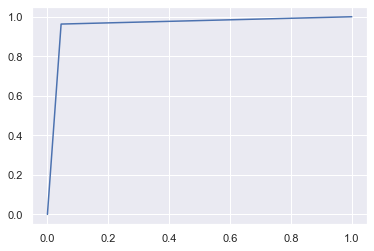

In [23]:
fpr, tpr, thresholds = roc_curve(y_test, predicted)
sns.set()
sns.lineplot(x=fpr, y=tpr)

## Generate hyperplane with relabeled dataset

C:\Users\victo\Google Drive\Mestrado\Redes Neurais\Trabalhos\Artigo_03\code\notebooks\utils.py:45: UserWarning: No contour levels were found within the data range.
  plt.contour(x1, x2, z, levels=[0], colors=('cyan',), linewidths=(2.5,))


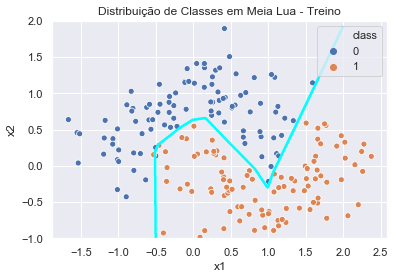

In [24]:
data_train_2 = pd.DataFrame(x_train, columns=['x1', 'x2'])
data_train_2['class'] = y_train_2

sns.set()
sns.scatterplot(x='x1', y='x2', hue='class', data=data_train_2)
plt.title('Distribuição de Classes em Meia Lua - Treino')    
plot_plain_separator(mlp, x_train, save=False, grid_range=(-1, 2))

plt.show()

C:\Users\victo\Google Drive\Mestrado\Redes Neurais\Trabalhos\Artigo_03\code\notebooks\utils.py:45: UserWarning: No contour levels were found within the data range.
  plt.contour(x1, x2, z, levels=[0], colors=('cyan',), linewidths=(2.5,))


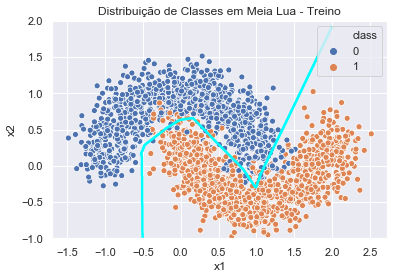

In [25]:
sns.set()
sns.scatterplot(x='x1', y='x2', hue='class', data=data_test)
plt.title('Distribuição de Classes em Meia Lua - Treino')    
plot_plain_separator(mlp, x_train, save=False, grid_range=(-1, 2))

plt.show()